# Load Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/tweet.csv')
display(df.head())

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


In [ ]:
df = df.drop(columns='Unnamed: 0')
df

,sentimen,tweet
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan ...
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,netral,Mari bangun bangsa dgn mendukung perekonomian ...
1813,netral,Bantu majukan perekonomian bangsa bersama Pak ...


In [ ]:
label = df['sentimen']
data = df['tweet']
display(label.value_counts())
display(data.value_counts)

positif    612
netral     607
negatif    596
Name: sentimen, dtype: int64

<bound method IndexOpsMixin.value_counts of 0       Kata @prabowo Indonesia tidak dihargai bangsa ...
1       Batuan Langka, Tasbih Jokowi Hadiah dari Habib...
2       Di era Jokowi, ekonomi Indonesia semakin baik....
3       Bagi Sumatera Selatan, Asian Games berdampak p...
4       Negara kita ngutang buat bngun infrastruktur y...
                              ...                        
1810    Negarawan sejati sll bangga dan mengedepankan ...
1811    1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812    Mari bangun bangsa dgn mendukung perekonomian ...
1813    Bantu majukan perekonomian bangsa bersama Pak ...
1814    Pak @jokowi mengubah cara pandang ekonomi. Kin...
Name: tweet, Length: 1815, dtype: object>

# olah data preprocessing

dalam sentimen analisis, #hashtag punya pengaruh, dan @akun juga. biasnya gerakan yg mendukung/menolak pakai # dan @

paling yg dihapus http dan spesial karakter aja

## Extract data

# Bagian Baru

In [ ]:
# buat jadi list biar gampang diiterasi
data_list = data.tolist()
data_list[726]

'Demokrat digituin. Menjanjikan PKS kursi wagub DKI, digantung. Masih saja bela wowo?  Entah ada daya tarik apa hingga mereka spt tidak punya kedaulatan, tidak punya harga diri.  #bukansalahbapak Prabowo. Yg salah klean yg mau digituin.'

In [ ]:
import re

def hapus_web(tweet):
  # hapus alamat web
  tweet = re.sub(r'http[s]?\://\S+', '', tweet)
  # hapus yg ada .com dan .co.id tapi ga dimulai dari http[s]
  tweet = re.sub(r'\S+.com.*\S+', '', tweet)
  # hapus karakter spesial selain ascii dan angka
  tweet = re. sub(r'[^a-zA-Z0-9\s]', '', tweet)
  # hapus extra spasi
  tweet = re.sub(r'\s+', ' ', tweet)
  # lowering
  tweet = tweet.lower()
  return tweet

In [ ]:
cleaned_text = hapus_web(data_list[3])
cleaned_text

'bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 185 triliun indonesia maju jokowi hebat'

In [ ]:
no_spesial_karakter = []

for index in range(len(data_list)):
  cleaned = hapus_web(data_list[index])
  no_spesial_karakter.append(cleaned)

In [ ]:
no_spesial_karakter[0]

'kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung '

untuk handle kata negasi biar ngiket ke maksud yg ditiadakannya gabungkan dengan '_'

tidak makan = tidak_makan

In [ ]:
no_spesial_karakter[726]

'demokrat digituin menjanjikan pks kursi wagub dki digantung masih saja bela wowo entah ada daya tarik apa hingga mereka spt tidak punya kedaulatan tidak punya harga diri bukansalahbapak prabowo yg salah klean yg mau digituin'

# Text Normalisasi

## Stemming

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
# ambil stemmer dari sastrawi
#from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# buat fungsi stemming_sastrawi
#def stemming_sastrawi(text):
  #stemmer = StemmerFactory().create_stemmer()
  # pakai stemmer
  #cleaned_text = stemmer.stem(text)
  #return cleaned_text

In [ ]:
# pakai for loop untuk stemming semua index no_spesial_karakter

# buat list kosong
#sudah_distemming = []

# buat for loop
#for index in range(len(no_spesial_karakter)):
  #cleaned = stemming_sastrawi(no_spesial_karakter[index])
  #sudah_distemming.append(cleaned)

# cek apakah fungsi remove_stopwords_indonesian_nltk berhasil?
#print('Before'+'\n'+'='*50)
#print(no_spesial_karakter[0])
#print('After'+'\n'+'='*50)
#print(sudah_distemming[0])

# dictionary kata

In [ ]:
# memakai for loop tambahkan ke dict kosong1 untuk semua index data no_spesial_karakter
dict_kosong1 = {}
for i in range(0,61):
  dict_kosong1[i] = []

kumpulan_besar_kata = []
kumpulan_list_kata = []
for x in range(len(no_spesial_karakter)):
  list_kata = no_spesial_karakter[x].split(' ')
  #print(f'{len(list_kata)} -> {list_kata}')
  # menambahkan kata unik ke dictionary sebagai key, dan panjang karakternya sebagai value
  for i in range(len(list_kata)):
    if (list_kata[i] not in dict_kosong1[len(list_kata[i])]):
      dict_kosong1[len(list_kata[i])].append(list_kata[i])
display(dict_kosong1)

  #for kata in range(len(list_kata)):
   # if (kata not in kumpulan_besar_kata):
    #  kumpulan_besar_kata.append(kata)

#print(kumpulan_besar_kata)
  #for i in range(len(kata)):
    #if (kata[i] not in dict_kosong1[len(kata[i])]):
      #dict_kosong1[len(kata[i])].append(kata[i])

{0: [''],
 1: ['5',
  '1',
  '0',
  '4',
  'n',
  'g',
  '9',
  'w',
  '2',
  'b',
  'l',
  'p',
  '3',
  'y',
  'z',
  'i',
  'x',
  '8',
  '7',
  'u',
  'h',
  'm',
  'd',
  'k',
  '6',
  'v',
  'e',
  'a',
  's',
  'f',
  't'],
 2: ['ya',
  'di',
  'pd',
  'yg',
  'cm',
  'dr',
  'tp',
  'aa',
  'ke',
  'bs',
  'sm',
  '01',
  'lu',
  'to',
  'si',
  'aj',
  'dg',
  '16',
  '25',
  'jg',
  '02',
  'ri',
  'no',
  'lg',
  'rp',
  'ga',
  'jk',
  '17',
  'cc',
  'pa',
  'he',
  '71',
  'bg',
  '12',
  'ku',
  'mw',
  '10',
  'et',
  '40',
  'ma',
  'al',
  'sy',
  'kl',
  'ah',
  'ml',
  'jd',
  'ko',
  'mu',
  'tk',
  'dn',
  'gw',
  '13',
  'ny',
  'om',
  'ye',
  'tu',
  'km',
  'gk',
  'pk',
  'wa',
  'ln',
  'mk',
  'eh',
  'sj',
  'xx',
  'bl',
  'cr',
  'kh',
  'ps',
  'do',
  'ur',
  'jl',
  'td',
  'it',
  '14',
  '54',
  '50',
  '60',
  '70',
  'pt',
  'bu',
  'dk',
  'wo',
  '90',
  'at',
  '79',
  'mo',
  'kn',
  'th',
  'wr',
  'k2',
  '26',
  'sd',
  'vs',
  'ae',
  'cs'

In [ ]:
# melihat kata apa saja dan berapa panjangnya
# cek mana kata yg slang (biasanya singkatan) 'yg' 'spt' 'klean'
dict_kosong1 = {}
kata = no_spesial_karakter[726].split(' ')
print(f'{len(kata)} -> {kata}')

# mengubah value tiap key dict menjadi bentuk list. supaya bisa di .append()
for i in range(0,21):
  dict_kosong1[i] = []

# menambahkan kata unik ke dictionary sebagai key, dan panjang karakternya sebagai value
for i in range(len(kata)):
  if (kata[i] not in dict_kosong1[len(kata[i])]):
    dict_kosong1[len(kata[i])].append(kata[i])
display(dict_kosong1)

35 -> ['demokrat', 'digituin', 'menjanjikan', 'pks', 'kursi', 'wagub', 'dki', 'digantung', 'masih', 'saja', 'bela', 'wowo', 'entah', 'ada', 'daya', 'tarik', 'apa', 'hingga', 'mereka', 'spt', 'tidak', 'punya', 'kedaulatan', 'tidak', 'punya', 'harga', 'diri', 'bukansalahbapak', 'prabowo', 'yg', 'salah', 'klean', 'yg', 'mau', 'digituin']


{0: [],
 1: [],
 2: ['yg'],
 3: ['pks', 'dki', 'ada', 'apa', 'spt', 'mau'],
 4: ['saja', 'bela', 'wowo', 'daya', 'diri'],
 5: ['kursi',
  'wagub',
  'masih',
  'entah',
  'tarik',
  'tidak',
  'punya',
  'harga',
  'salah',
  'klean'],
 6: ['hingga', 'mereka'],
 7: ['prabowo'],
 8: ['demokrat', 'digituin'],
 9: ['digantung'],
 10: ['kedaulatan'],
 11: ['menjanjikan'],
 12: [],
 13: [],
 14: [],
 15: ['bukansalahbapak'],
 16: [],
 17: [],
 18: [],
 19: [],
 20: []}

# selesai dictionary kata

In [ ]:
list_kata = []
for x in range(len(no_spesial_karakter)):
  kata = no_spesial_karakter[x].split(' ')
  list_kata.append(kata)
print(kata)

['pak', 'jokowi', 'mengubah', 'cara', 'pandang', 'ekonomi', 'kini', 'semua', 'orang', 'terhubung', 'sehingga', 'indonesia', 'menjadi', 'lebih', 'produktif', 'dan', 'efisien', 'menyatuputihjokowi']


In [ ]:
df['tweet'].tolist()[0].split(' ')

['Kata',
 '@prabowo',
 'Indonesia',
 'tidak',
 'dihargai',
 'bangsa',
 'asing!',
 '',
 '',
 'Berita',
 'ini',
 'ðŸ‘‡',
 'pasti',
 'hoax',
 'buatan',
 'penguasa,',
 'ya',
 'kan',
 '@rockygerung?ðŸ˜œ',
 'https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â\xa0â€¦']

In [ ]:
type(dict_kosong1[len(kata[0])])

list

In [ ]:


kata = no_spesial_karakter[726].split(' ')
display(len(kata))
for i in range(len(kata)):
  print(f'{kata[i]} = {len(kata[i])}')

35

demokrat = 8
digituin = 8
menjanjikan = 11
pks = 3
kursi = 5
wagub = 5
dki = 3
digantung = 9
masih = 5
saja = 4
bela = 4
wowo = 4
entah = 5
ada = 3
daya = 4
tarik = 5
apa = 3
hingga = 6
mereka = 6
spt = 3
tidak = 5
punya = 5
kedaulatan = 10
tidak = 5
punya = 5
harga = 5
diri = 4
bukansalahbapak = 15
prabowo = 7
yg = 2
salah = 5
klean = 5
yg = 2
mau = 3
digituin = 8


#### deteksi kata slang/singkatan
yg, pd, gakm klean

In [ ]:
kalimat = no_spesial_karakter[726]
kata = kalimat.split(' ')
kata
dict_kosong ={}
dict_kosong[len(kata[0])] = kata[0]
display(dict_kosong.keys())
display(dict_kosong)
#for i in range(len(kata)):
if (len(kata[1]) in list(dict_kosong.keys())):
  print('True')
  print(dict_kosong[len(kata[1])])
  list(dict_kosong[len(kata[0])])
  dict_kosong[len(kata[0])].append(kata[1])
display(dict_kosong)

dict_keys([8])

{8: 'demokrat'}

True
demokrat


AttributeError: ignored

In [ ]:
kata

# Remove stopwords tanpa kata negasi dulu

In [ ]:
! pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### membersihkan corpus stopwords dari kata negasi

In [ ]:
stop_words = stopwords.words('indonesian')
kata_negasi = ['tidak','tidaklah','bukan','bukanlah','belum','belumlah','jangan','janganlah']
display(type(stop_words))
display(len(stop_words))

for n in range(len(kata_negasi)):
    for i in range(len(stop_words)):
      if(stop_words[i] == kata_negasi[n]):
        print(f'{stop_words[i]} + {i}')
        #stop_words.pop(i-1)

stop_words = stop_words.append('yg')
display(type(stop_words))
display(stop_words)

list

758

tidak + 725
tidaklah + 727
bukan + 125
bukanlah + 127
belum + 66
belumlah + 67
jangan + 274
janganlah + 276


NoneType

None

In [ ]:
stop_words = stopwords.words('indonesian')
kata_negasi = ['tidak','tidaklah','bukan','bukanlah','belum','belumlah','jangan','janganlah']
display(type(stop_words))
display(len(stop_words))

# loop menghapus kata negasi dari stop_words
for n in range(len(kata_negasi)):
  for i in range(len(stop_words)):
    if(stop_words[i-1] == kata_negasi[n-1]):
      print(f'{i} dan {n} : {stop_words[i-1]} = {kata_negasi[n-1]}')
      #stop_words.pop(i-1)

# tambah kata stopwords yg slang
stop_words = stop_words.append('yg')
display(type(stop_words))

# word_tokenized

In [ ]:
word_tokenized =[['prabowo', 'indonesia', 'tidak', 'harga', 'bangsa', 'asing', 'berita', 'hoax', 'buat', 'kuasa', 'ya', 'rockygerung'], ['batu', 'langka', 'tasbih', 'jokowi', 'hadiah', 'habib', 'luthfi', 'harga', 'mercy'], ['era', 'jokowi', 'ekonomi', 'indonesia'], ['sumatera', 'selatan', 'asi', 'games', 'dampak', 'pd', 'ekonomi', 'langsung', 'prediksi', 'capai', '185', 'triliun', 'indonesia', 'maju', 'jokowi', 'hebat'], ['negara', 'ngutang', 'bngun', 'infrastruktur', 'udah', 'dipake', 'masyarakat', 'masyarakat', 'ngeluh', 'negara', 'ngutang', 'negara', 'ngutang', 'utang', 'bayar', 'kalo', 'negara', 'dapet', 'hasil', 'hasil', 'negara', 'ya', 'pajak'], ['yg', 'bisikin', 'jokowi', 'cm', 'mikirin', 'putar', 'duit', 'golong', 'esports', 'dr', 'sekian', 'tentu', 'tumbuh', 'ekonomi', 'indonesia', 'bukan', 'fundamental', 'yg', 'prabowo', 'dgn', 'bhs', 'yg', 'sederhana', 'tp', 'mrpkan', 'aspek', 'fundamental', 'ekonomi'], ['tenang', 'msih', 'ngoceh', 'ajattp', 'jokowi', 'harga', 'mati'], ['kerjasa', 'ekonomi', 'bilateral', 'multilateral', 'doa', 'tps', 'dengar', 'suara', 'hati'], ['iya', 'bener', 'aa', 'mantap', 'pilih', 'pimpin', 'yg', 'bs', 'solusi', 'jokowi', 'bukan', 'yg', 'salah', 'pimpin', 'sbyudhoyono', 'dismash', 'sm', 'mas', 'bowo', 'koalisi', 'klau', 'mengantam', 'tmn', 'koalisi', 'yg', 'plg', 'pilih', 'pimpin', 'yg', 'rajin', 'ibadah', 'wajib', 'ngaji', 'jumat'], ['prabowosandi', 'sepakat', 'ambil', 'gaji', 'negara', 'susah'], ['pilih', 'pimpin', 'yg', 'udh', 'capai', '5', 'capai', 'ekonomi', 'perintah', 'jokowi', 'coblos', '01', 'yuk', 'kerja'], ['calon', 'presiden', 'jokowi', 'program', 'kartu', 'pra', 'kerja', 'insentif', 'kurun', 'bukan', 'gaji', 'cumacuma', 'masyarakat', 'belum', 'hasil'], ['gak', 'nginti', 'lu', 'to', 'yunartowijaya', 'si', 'atabdillahtoha', 'gak', 'ngacaaa', 'gak', 'ngajarin', 'sandi', 'ekonomi', 'banding', 'jokowi'], ['jokowi', 'perintah', 'upaya', 'jaga', 'imbang', 'harga', 'posisi', 'normal', 'tani', 'produsen', 'senang', 'hasil', 'kerja', 'harga', 'layak'], ['berat', 'nge', 'bahas', 'ekonomi', 'dgn', 'angka2', 'bahas', 'mobil', 'lejen', 'aj'], ['mantulz', 'pakmengisi', 'tenang', 'dg', 'umroh', 'kel', 'cinta', 'istri', 'anak2', 'ahirnya', 'keluarga', 'asset', 'plg', 'harga', 'sehat', 'sll', 'pakdeee'], ['sisi', 'industri', 'kreatif', 'inovatif', 'era', 'industri', 'global', 'jokowi', 'gerak', 'ubah', 'badan', 'ekonomi', 'kreatif', 'bekraf', 'menteri', 'coblos', '01', 'yuk', 'kerja'], ['16', 'pakta', 'integritas', 'prabowo', 'sandi', 'ulama', 'yg', 'libat', 'ijtimak', 'ulama', 'pancasila', 'nkri', 'harga', 'mati', 'tidak', 'khilafah', 'khilafah', 'bual', 'makhluk', 'kolam'], ['dengar', 'mbak', 'vidya', 'curup', 'beli', 'lipstik', 'purbasari', 'harga', '25', 'ribu', 'beli', 'lipstik', 'nyx', 'gak', '25', 'ribu'], ['prabowo', 'tni', 'puluh', 'nggak', 'ambil', 'gaji', 'rupiah', 'sandi', 'wagub', 'jg', 'susah', 'ya', 'cari', 'orang', 'gak', 'ambil', 'gaji', 'hasil', 'kerja', 'negara'], ['assalamualaikum', '1', 'suara', 'sgt', 'harga', 'dlm', 'upaya', 'menang', '02', 'prabowo', 'sandiuno', 'hrs', 'rela', 'suara', 'jkt', 'ktp', 'daerah', 'moga', 'suara', 'yg', 'tdk', 'serta', 'balas', 'dgn', 'doa', 'moga', 'allah', 'swt', 'kabul', 'aamiin', 'ya', 'rabb'], ['pilih', 'prabowosandiaga', 'janji', 'ambil', 'gaji', 'orangorang', 'superkaya', 'mbok', 'ya', 'rendah', 'hati', 'jangan', 'kata2', 'konotasi', 'angkuh'], ['prabowo', 'gak', 'harga', 'rawan', 'yg', 'puasa', 'tirakat', 'munajad', 'malam', 'suntuk', 'doa', 'menang', '02', 'mhn', 'balas', 'tweet', 'kontribusi', 'ngopi', 'rokok', 'dll', 'yg', 'tirakatmujahadah', 'tdk', '02', 'gagalayo', 'tirakat', 'munajadin'], ['prabowo', 'sandi', 'menang', 'otomatis', 'sedekah', 'kaum', 'farkir', 'miskin', 'dhuafa', 'gaji', 'berfua', 'yg', 'tidak', 'ambil', 'sedekah'], ['percaya', 'pd', 'mrk', 'yg', 'alam', 'jokowi', 'milik', 'wakil', 'yg', 'alam', 'bidang', 'ekonomi', 'coblos', 'yuk', '01', 'ya'], ['ummat', 'islam', 'yg', 'waras', 'cerdas', 'senang', 'beramalcoblos', 'prabowo', 'andil', 'dlm', 'amal', 'gaji', 'beliau', 'tdk', 'ambil', 'tp', 'untk', 'amal'], ['hasil', 'tidak', 'bidang', 'infrastruktur', 'jokowi', 'jg', 'hasil', 'baik', 'ekonomi', 'indonesia', 'coblos', 'yuk', '01', 'ya'], ['model', 'ngeles', 'truk', 'ketaker', 'berbusa2', 'depan', 'sandi', 'ngomongin', 'ekonomi', 'makro', 'dg', 'congkak', 'untung', 'sandi', 'nya', 'sabar', 'gak', 'kick', 'pantesan', 'menteri2nya', 'yg', 'pintar2', 'mbodoni', 'lha', 'juragan', 'kyk', 'gin', 'pekk', 'nya', 'prabowo', 'sandiuno'], ['pilih', '02', 'bersodakoh', 'karna', 'prabowo', 'sandi', 'sumbang', 'gaji', 'negarafakir', 'miskin', 'yatim', 'piatu', 'masjid', 'jadi', 'prabowo', 'sandi', 'presiden', 'wakil', 'presiden', 'ri'], ['alhamdulillah', 'capres', '02', 'sedekah', 'gaji', 'rakyat', 'miskin', 'korban2', 'gempa2', 'pasigala', 'butuh', 'bantu', 'prabowo', 'sandiuno', 'karniilyas', 'rockygerung'], ['no', '5', 'donk', 'mang', 'sayah', 'percaya', 'saudara', 'juang', '02', 'ikhlas', 'negeri', 'ubah', 'lebik', 'lg', 'masyarakat', 'damai', 'tenang', 'amankesejahteraan', 'tingkat', 'harga2', 'rendah', 'stabil'], ['divhumaspolri', 'gakan', 'ladenin', 'pulisi', 'karna', 'pulisi', 'gaji', 'jokowi', 'pake', 'duit', 'jokowi', 'buka', 'rakyat', 'lapor', 'nya', 'aja', 'tunggu', 'udah', 'ganti', 'presiden'], ['bagus', 'dukung', 'jokowi', 'tebang', 'pohon', 'bkn', 'dg', 'golokgergaji', 'dg', 'ranting', 'pohon', 'elektabilitas', 'jokowi', 'nyungseb', 'bkn', 'lawan', 'politik', 'dukung', 'tolol', 'pelihara', 'dasar', 'ebong'], ['tidak', 'harga', 'cabai', 'rp', '10000', 'harga', 'bawang', 'rp', '5000', 'petan', 'kasihan', 'jokowi'], ['presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerjasama', 'ekonomi', 'via', 'apahabarcom'], ['02', 'kelar', 'hidup', 'bisa', 'harga', 'mahal', 'turun', 'solusi', '0', 'kubu', 'prabowo', 'bahlull'], ['terima', 'gaji', 'sbg', 'presiden', 'wapres', 'sumbang', 'negara', 'fakir', 'miskinpertama', 'dlm', 'sejarah', 'bangsa', 'indonesia', 'debat', 'pilpres', 'nyata', 'tutup', 'prabowosandiaga', 'uno', 'youtube'], ['infrastructure', 'yg', 'bangun', 'pakai', 'uang', 'pribadi', 'yg', 'ga', 'dukung', 'tidak', 'tp', 'pakai', 'pajak', 'dr', 'warga', 'negara', 'bayar'], ['harga', 'yg', 'anugerah', 'bukti', 'jokowi', 'sosok', 'pimpin', 'yg', 'aku', 'integritas'], ['satu', 'jokowikma', 'capai', 'hasil', 'capai', 'tumbuh', 'ekonomi', 'era', 'perintah', 'jokowi', 'jk', 'tingkat'], ['orang', 'negeri', 'harga', 'prestasi', 'yg', 'jokowi', 'negara', 'yg', 'caci'], ['maaf', 'rakyat', 'tdk', 'butuh', 'peluk', 'rakyat', 'butuh', 'harga', 'sembako', 'murah', 'listrik', 'tarif', 'turun', 'butuh', 'lap', 'kerja', 'bukan', 'janji2'], ['winter'], ['vidiaamanda3', '17', 'april', 'pilih', 'jokowikma', 'tumbuh', 'ekonomi', 'perata', 'zaman', 'jokowi', 'bukan', 'tumbuh', 'ekonomi', 'perata', 'bangun'], ['jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerja', 'ekonomi'], ['surga', 'bahagia', 'bahagia', 'sempurna', 'tanpa', 'gandeng', 'tangan', 'prabowo', 'ustad', 'masuk', 'surga', 'ckckckck', 'salah', 'milih', 'guru', 'ngaji', 'gue'], ['anggota', 'kpuid', 'tdk', 'layak', 'gaji', 'malu', 'utama', 'isi', 'perut', 'gede', 'bacot', 'minim', 'toreh', 'prestasi', 'cc', 'jokowi'], ['gasah', 'ejek', 'program', 'pa', 'jokowi', 'program', 'jg', 'tdk', 'sdh', 'pikir', 'mateng', 'program', 'kis', 'mari', 'harga', 'jgn', 'hujat'], ['monggo', 'silahkanitu', 'hak', 'andahargai', 'yg', 'ubah'], ['harga', 'yg', 'anugerah', 'bukti', 'jokowi', 'sosok', 'pimpin', 'yg', 'aku', 'integritas'], ['he', 'he', 'he', 'sok', 'bijak', 'nih', 'antek', 'orba', 'pikir', 'letjen', 'pecat', 'bilang', 'biang', 'kerok', 'ekonomi', 'indonesia', 'presiden', 'jokowi', 'jenderal', 'sby', 'gimana', 'demokrat', 'ngga', 'alih', 'dukung', 'jokowi', 'coba'], ['presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerja', 'ekonomi', 'via', 'metrobali'], ['gue', 'kasih', 'taubeberapa', 'harga', 'yg', 'anugerah', 'bukti', 'jokowi', 'sosok', 'pimpin', 'yg', 'aku', 'integritas'], ['presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerja', 'ekonomi', 'via', 'bal', 'netizen'], ['jelas', 'kyai', 'khmarufamin', 'cawapres', 'karna', 'jokowi', 'komitmen', 'kait', 'ekonomi', 'umat', 'dgn', 'yg', 'sebut', 'arus', 'ekonomi', 'indonesia', 'bangun', 'ekonomi', 'dri'], ['menteri', 'aja', 'prestasi', 'pimpin', 'era', 'jokowi', 'mana', 'menteri', 'raih', 'harga'], ['4', 'jokowi', 'naik', 'tax', 'ratio', 'drastis', 'guncang', 'ekonomi'], ['capai', 'hasil', 'capai', 'tumbuh', 'ekonomi', 'era', 'perintah', 'jokowi', 'jk', 'tingkat'], ['situ', 'jokowi', 'bahas', 'game', 'online', 'main', 'profesional', 'udah', 'piala', 'presiden', 'mobile', 'legend', 'hadiah', 'saing', 'dunia', 'online', 'game', 'ekonomi'], ['jokowi', 'khmarufamin', '17', 'april', 'pilih', 'jokowikma', 'ngerti', 'kalo', 'jokowi', 'ajar', 'ngaji', 'jabat', 'murni', 'dalam', 'agama', 'unsur', 'citra'], ['from', 'sandiuno', 'repostmediaapp', 'prabowosandi', 'tidak', 'gagal', 'fokus', 'bangun', 'besarbesaran', 'dampak', 'langsung', 'ekonomi', 'sejahtera'], ['alas', 'prabowosandi', 'terima', 'gaji', 'menang', 'negara', 'susah'], ['he', 'he', 'he', 'pikir', 'letjen', 'pecat', 'bilang', 'biang', 'kerok', 'ekonomi', 'presiden2', 'jokowi', 'jenderal', 'sby', 'jenderal', 'soeharto', 'yg', 'bintang', 'nya', 'sampe', 'dungu'], ['jokowi', 'capai', 'tumbuh', 'syukur', 'indonesia', 'tumbuh', 'kondisi', 'ekonomi', 'global', 'gejolak'], ['janji', 'ambil', 'gaji', 'menang', 'pilpres', 'prabowo', 'bukti', 'tulus'], ['suara', 'adil', '1', 'suara', 'kpuid', 'kerja', 'benarjangan', 'makan', 'gaji', 'buta', 'jangan', 'curang'], ['jokowi', 'prabowo', 'sandi', 'pecicilan', 'pesimis', 'jalan', 'ekonomi', 'makro', 'mikro', 'tau'], ['gue', 'kasih', 'taumenterinya', 'aja', 'prestasi', 'pimpin', 'era', 'jokowi', 'mana', 'menteri', 'raih', 'harga'], ['berita', 'baru', 'prabowo', 'naik', 'pajak', '16', 'persen', 'tahun'], ['jokowi', 'bangun', 'revitalisasi', 'pasar', 'rakyat', 'dasar', 'utama', 'bangun', 'ekonomi', 'bas', 'rakyat', 'kuat', 'ekonomi', 'indonesia', 'stabil'], ['gue', 'kasih', 'tauberbagai', 'capai', 'hasil', 'capai', 'tumbuh', 'ekonomi', 'era', 'perintah', 'jokowi', 'jk', 'tingkat'], ['presiden', 'jokowi', 'bangun', 'spbu', 'setelag', '71', 'kabupaten', 'puncak', 'jaya', 'papua', 'harga', '50ribuliter', '6500liter'], ['satu', 'menang', 'jokowi', 'brbagai', 'upaya', 'utk', 'bangun', 'indonesia', 'bebas', 'korupsi', 'dr', 'layan', 'bas', 'elektronik', 'sistem', 'adu', 'masyarakat', 'harga', 'bg', 'masyarakat', 'yg', 'ungkap', 'korupsi'], ['les', 'pakdhe', 'salah', 'aspek', 'faktor', 'ekonomi', 'yg', 'tumbuh', 'stabilitas', 'politik', 'negeri', 'yg', 'dg', 'pasti', 'adil', 'tega', 'hukum', 'pripun', 'kabare', 'pakde', 'jokowi'], ['prabowo', 'didik', 'tentara', 'ayah', 'ekonom', 'legendaris', 'indonesia', 'ya', 'kali', 'deh', 'gak', 'ngerti', 'makro', 'mikro', 'makro', 'mikro', 'ajar', 'semester', '12', 'fakultas', 'ekonomi', 'cmiiw', 'tau', 'jae', 'ajar', 'ekonomi', 'kacaw'], ['jangan', 'bangga', 'jalan', 'ekonomi', 'jatuh', 'nengara', 'menag', 'buka', 'jala', 'yg', 'megah', 'hasil', 'bumi', 'laut', 'yg', 'limpah', 'ruah', 'idonesia', 'maju', 'menang'], ['jokowi', 'bangun', 'spbu', 'setelag', '71', 'kabupaten', 'puncak', 'jaya', 'papua', 'harga', '50ribuliter', '6500liter'], ['jas', 'harga', 'mahal', 'pakai', 'orang2', 'eropa', 'amerika'], ['prabowo', 'janji', 'harga', 'karet', 'kelapa', 'sawit', 'bikin', 'senyum', 'tani'], ['orang', 'harga', 'raja', 'arab', 'saudi', 'pimpin', 'ku'], ['contoh', 'ekonomi', 'china', 'sujud'], ['fyi', 'gaesberbagai', 'capai', 'hasil', 'capai', 'tumbuh', 'ekonomi', 'era', 'perintah', 'jokowi', 'jk', 'tingkat'], ['percaya', 'pd', 'mrk', 'yg', 'alam', 'jokowi', 'milik', 'wakil', 'yg', 'alam', 'bidang', 'ekonomi'], ['sih', 'gaji', 'presiden', 'wakil', 'presiden', 'sih', 'tunjang', 'tdk', 'ambil', 'peser', 'gaji', 'tunjang', 'hebat', 'jual', 'klu', 'gaji', 'nama', 'jual', 'basi'], ['prabowo', 'harap', 'tulus', 'karyawan', 'tidak', 'tuntut', 'gaji'], ['jamu', 'jokowi', 'raja', 'salman', 'saji', 'nasi', 'mandhi', 'warta', 'ekonomi'], ['tumbuh', 'ekonomi', 'perata', 'zaman', 'jokowi', 'bukan', 'tumbuh', 'ekonomi', 'perata', 'bangun'], ['moslem', 'hormat', 'harga', 'umat', 'agama', 'laen', 'cinta', 'damai', 'islam', 'ajar', 'utk', 'buat', 'kpd', 'manusia', 'kecuali', 'kami', 'dukung', '02', 'bhineka', 'tunggal', 'ika'], ['prabowo', 'sandiuno', 'tidak', 'ambil', 'gaji', 'rupiah', 'pilih', 'sbg', 'presiden', 'ri', 'alm', 'gus', 'dur', 'orang', 'yg', 'ihlas', 'utk', 'indonesia', 'prabowo'], ['jokowimaruf', 'bicara', 'alam', 'prabowosandi', 'janji', 'ambil', 'gaji'], ['pilih', 'pimpin', 'yg', 'udh', 'capai', '5', 'capai', 'ekonomi', 'perintah', 'jokowi'], ['gak', 'suudzon', 'samping', 'umroh', 'jokowi', 'bahas', 'kerja', 'bidang', 'ekonomi', 'perintah', 'arab', 'saudi', 'gak', 'nyinyir', 'bro', 'urus', 'tuh', 'junjung', 'yg', 'ziarah', 'kubur', 'moga2', 'aja', 'gak', 'nyembah', 'kubur'], ['perintah', 'jokowi', 'sebut', 'ekonomi', 'indonesia', 'tangan', 'anakanak', 'muda', 'kreatif'], ['hasil', 'tidak', 'bidang', 'infrastruktur', 'jokowi', 'jg', 'hasil', 'baik', 'ekonomi', 'indonesia'], ['jokowimaruf', 'pimpin', 'indonesia', 'harga', 'yg', 'anugerah', 'bukti', 'jokowi', 'sosok', 'pimpin', 'yg', 'aku', 'integritas'], ['mahal', 'banget', 'hasil', '1', 'mw', 'harga', 'mahal', 'power', 'plant', 'produksi', '10', 'mw'], ['jokowi', 'bahas', 'ekonomi', 'makro', 'mikro', 'ya', 'makan', 'sehari2', 'sandiaga', 'sih', 'fatal', 'et', 'keluar', 'ispot', 'jenis', 'revolusi', '40', 'sok', 'futuristik', 'otak', 'antik'], ['prabowosandi', 'sepakat', 'ekonomi', 'indonesia', 'salah', 'arah'], ['prabowosandi', 'sepakat', 'ekonomi', 'indonesia', 'salah', 'arah', 'via', 'kedaipenacom'], ['fyi', 'gaesbeberapa', 'harga', 'yg', 'anugerah', 'bukti', 'jokowi', 'sosok', 'pimpin', 'yg', 'aku', 'integritas'], ['wanita', 'cerewat', 'suami', 'cerewet', 'tukang', 'sayur', 'harga', 'jokowi'], ['emang', 'prabowo', 'enggak', 'prepare', 'persona', 'agam', 'kaya', 'ajar', 'ngaji', 'gtgt', '1000', 'menang', 'ya', 'counter', 'jokowi', 'rekrut', 'ma', 'bikin', 'ga', 'tebak', 'alur', 'wkwkwk', 'asli', 'dah', 'prabowo', 'islami', 'doang', 'asli', 'biar', 'menang'], ['sisi', 'industri', 'kreatif', 'inovatif', 'era', 'industri', 'global', 'jokowi', 'gerak', 'ubah', 'badan', 'ekonomi', 'kreatif', 'bekraf', 'menteri'], ['buka', 'porprov', 'jateng', 'ganjar', 'kepala', 'daerah', 'contoh', 'jokowi', 'harga', 'atlet'], ['mudzakir', 'guru', 'ngaji', 'jokowi', '2001', 'anakanak', 'orang', 'dewasa', 'ajar', 'baca', 'al', 'quran', 'privat'], ['khmarufamin', 'indonesia', 'maju', 'tumbuh', 'ekonomi', 'perata', 'zaman', 'jokowi', 'bukan', 'tumbuh', 'ekonomi', 'perata', 'bangun'], ['jokowi', 'dukung', 'esport', 'indonesia', 'mobile', 'legend', 'pubg', 'free', 'fire', 'dll', 'prabowo', 'duli', 'sandang', 'pangan', 'harga', 'harga', 'turun', 'gua', 'udah', 'pilih', 'skarang'], ['vidiaamanda3', '17', 'april', 'pilih', 'jokowikma', 'pilih', 'pimpin', 'yg', 'udh', 'capai', '5', 'capai', 'ekonomi', 'perintah', 'jokowi'], ['adlh', 'masyarakat', 'yg', 'nyata', 'bayar', 'pajak', 'eksploitasi', 'rampok', 'hak2', 'harta', 'org', 'yg', 'tetap', 'atur', 'raup', 'untung', 'eksploitasi', 'rampok', 'harta', 'negara', 'bangsa', 'hindar', 'pajak'], ['dinikurnia21', '17', 'april', 'coblos', 'jokowimaruf', 'pilih', 'pimpin', 'yg', 'udh', 'capai', '5', 'capai', 'ekonomi', 'perintah', 'jokowi'], ['khmarufamin', '17', 'april', 'pilih', 'jokowikma', 'perintah', 'jokowi', 'sebut', 'ekonomi', 'indonesia', 'tangan', 'anakanak', 'muda', 'kreatif'], ['gak', 'ngaruh', 'jokowi', 'kutub', 'utara', 'rakyat', 'tau', 'barang', 'harga', 'harga', 'murah', 'obat', 'gampang', 'mana', 'aja', 'hutang', 'negara', 'nambah'], ['pilih', 'presidenwapres', 'prabowosandi', 'janji', 'gaji', 'kaum', 'miskin'], ['demokrat', 'prabowo', 'harga', 'kontribusi', 'presiden'], ['jokowikma', 'pimpin', 'optimis', 'harga', 'yg', 'anugerah', 'bukti', 'jokowi', 'sosok', 'pimpin', 'yg', 'aku', 'integritas'], ['madura', 'prabowo', 'harga', 'mati'], ['prabowo', 'harga', 'mati', 'titik'], ['jokowi', 'usaha', 'mebel', 'solo', 'mudzakir', 'guru', 'ngaji', 'bpk', 'jokowi', 'oleholeh', 'murid', 'pulang', 'jerman', 'korek', 'api', 'zippo'], ['capai', 'hasil', 'capai', 'tumbuh', 'ekonomi', 'era', 'perintah', 'jokowi', 'jk', 'tingkat'], ['sy', 'harga', 'sikap', 'bangtp', 'lgsg', 'unfol', 'sy', 'tau', 'mslah', 'sblm', 'aneh', 'jg', 'banglagian', 'yg', 'bikin', 'tweet', 'mention', 'yg', 'brsangkutan', 'jg', 'tuju', 'jg', 'gak', 'kontraproduktif', 'kl', 'lgsg', 'diunfol'], ['ya', 'allah', 'mgkn', 'sosok', 'seorg', 'jokowi', 'berani', 'sprti', 'kl', 'capres', 'sih', 'mgkn', 'jg', 'tlg', 'mardanialisera', 'jgn', 'fitnah', 'presiden', 'sprti', 'kl', 'jokowi', 'jln', 'krn', 'beliau', 'org', 'presiden', 'yg', 'harga', 'ah', 'sy', 'curiga', 'jgn2', 'blg', 'cawapres'], ['tumbuh', 'ekonomi', 'perata', 'tau', 'zaman', 'jokowi', 'bukan', 'tumbuh', 'ekonomi', 'perata', 'bangun'], ['gaji', 'mah', 'ga', 'yg', 'cegah', 'berantas', 'korupsi', 'ga', 'cegah', 'berantas', 'korupsi', 'kolusi', 'nepotisme', 'yg', 'masyarakat', 'jokowi', 'ahok', 'yg', 'percaya', 'masyarakat', 'utk', 'mau', 'berani', 'berantas', 'korupsi', 'kolusi', 'nepotisme'], ['bukan', 'ga', 'ngerti', 'n', 'ga', 'nyambung', 'ttg', 'ml', 'tp', 'emng', 'ml', 'ga', 'nyambung', 'dg', 'tema', 'debat', 'jd', 'ga', 'tuk', 'djawab', 'n', 'dbahas', 'rakyat', 'yg', 'utama', 'no', '1', 'stabil', 'harga', 'pangan', 'n', 'sedia', 'dr', 'tani', 'sndr', 'negara', 'agraris', 'ko', 'sembrang', 'import'], ['mencoblosberamal', 'prabowo', 'sandiuno', 'pilih', 'insyaallah', 'infak', 'gaji', 'kaum', 'dhuafa', 'suara', 'g', 'siasia', 'kawan', 'mari', 'dukung', 'niat'], ['pilih', 'pimpin', 'yg', 'udh', 'capai', '5', 'capai', 'ekonomi', 'perintah', 'jokowi'], ['harga', 'periode', 'jokowi', 'tidak', 'jabat', 'loe', 'pikirin'], ['berita', 'baru', 'naik', 'rasio', 'pajak', 'prabowo', 'kenang', 'orde'], ['gue', 'kasih', 'taujokowi', 'bangun', 'spbu', 'setelag', '71', 'kabupaten', 'puncak', 'jaya', 'papua', 'harga', '50ribuliter', '6500liter'], ['bener', 'sih', 'aja', 'jokowi', 'harga', 'dimana2', 'negeri', 'jangan', 'sampe', 'segitu', 'kalo', 'menang', 'kasihan', 'rakyat'], ['sisi', 'industri', 'kreatif', 'inovatif', 'era', 'industri', 'global', 'jokowi', 'gerak', 'ubah', 'badan', 'ekonomi', 'kreatif', 'bekraf', 'menteri'], ['jokowi', 'bangun', 'spbu', 'setelag', '71', 'kabupaten', 'puncak', 'jaya', 'papua', 'harga', '50ribuliter', '6500liter'], ['satu', 'dukung', 'jokowiamin', 'khmarufamin', 'menteri', 'aja', 'prestasi', 'pimpin', 'era', 'jokowi', 'mana', 'menteri', 'raih', 'harga'], ['kpu', 'perintah', 'rezim', 'yg', 'kuasa', 'skarang', 'yg', 'salah', 'prabowo', 'memang', 'yg', 'gaji', 'kpu', 'presiden', 'prabowo', 'ya'], ['denny', 'hina', 'hadap', 'publik', 'hebat', 'sayang', 'tolol', 'ilc', 'ayam', 'sayur', 'sok', 'nyentil', 'ttg', 'agama', 'sdh', 'otak', 'gak', 'den', 'ajar', 'ngaji', 'sok', 'nyentil', 'uah'], ['presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerja', 'ekonomi'], ['9', 'jokowi', 'naik', 'tax', 'ratio', 'drastis', 'guncang', 'ekonomi'], ['pilih', 'jokowi', 'pingin', 'indonesia', 'maju', 'tidak', 'pilih', 'prabowo', 'krna', 'tdk', 'ikhlas', 'uang', 'pajak', 'thn', 'yg', 'bayar', 'koruptor', 'diksh', 'pensiun'], ['fyi', 'gaesmenterinya', 'aja', 'prestasi', 'pimpin', 'era', 'jokowi', 'mana', 'menteri', 'raih', 'harga'], ['yg', 'kritik', 'infrastruktur', 'biaya', 'china', 'contoh', 'mandiri', 'china', 'yg', 'hasil', 'tdk', 'nyambung', 'ya', 'koalisi', 'dgn', 'demokrat', 'kritik', 'gagal', 'ekonomi', 'salah', 'pimpin'], ['coblos', 'prabowo', 'sandi', 'amal', '5', 'gaji', 'prabowo', 'sandi', 'sumbang', 'dhuafa', 'anak', 'yatim', 'dll'], ['presiden', 'jokowi', 'raja', 'salman', 'bin', 'abdulaziz', 'alsaud', 'temu', 'bilateral', 'sepakat', 'tingkat', 'kerja', 'bidang', 'ekonomi'], ['jokowi', 'bangun', 'spbu', 'setelag', '71', 'kabupaten', 'puncak', 'jaya', 'papua', 'harga', '50ribuliter', '6500liter', 'tanggal', '17', 'april', 'gandeng', 'ulama'], ['fyi', 'gaesjokowi', 'bangun', 'spbu', 'setelag', '71', 'kabupaten', 'puncak', 'jaya', 'papua', 'harga', '50ribuliter', '6500liter'], ['yg', 'fitnah', 'ulama', 'oposisi', 'divhumaspolri', 'ccicpolri', 'diam', 'gaji', 'uang', 'negara', 'coba', 'pro', 'jokowi', 'langsung', 'gaspol', 'tolong', 'prabowo', 'pilih', 'buang', 'petinggi', 'polri', 'era', 'tito', 'dalam', 'ganti', 'yg'], ['debat', 'kemarin', 'dua', 'prabowo', 'sandiuno', 'tidak', 'ambil', 'gaji', 'kelak', 'pilih', 'presiden', 'wakil', 'presiden', 'dasar', 'tidak', 'ambil', 'hak', 'terimakasih'], ['perintah', 'jokowi', 'sebut', 'ekonomi', 'indonesia', 'tangan', 'anakanak', 'muda', 'kreatif'], ['ga', 'laku', 'semu', 'nyata', 'mu', 'mas', 'masyarakat', 'cerdas', 'muak', 'tidak', 'adil', 'tidak', 'pasti', 'hukum', 'ketidakpastian', 'ekonomi', 'orang', 'anti', 'kritik', 'batas', 'bebas', 'dapat', 'moga', 'allah', 'hidayah', 'ubah'], ['penting', 'prabowo', 'sandi', 'komitmen', 'turun', 'harga', 'listrik', '900', 'w', 'udah', 'gitu', 'aja', 'dukung', 'si', 'jae', 'ga', 'tuju', 'dukung', 'prabowo', 'sandi', 'tuju', 'aja', 'moga', 'prabowo', 'pimpin', 'tepat', 'janji', 'kampanye', 'ga', 'kayak', 'si', 'jae'], ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa'], ['skill', 'anak', 'bangsa', 'harga', 'negara', '17', 'april', 'tusuk', 'prabowo', 'sandi'], ['jalan', 'tol', 'trans', 'sumatera', 'bukan', 'lanjut', 'jokowi', 'yg', 'duluan', 'ekonomi', 'kembang', '5', 'tahun', 'saat', 'ekonomi', 'negara', 'tidak', 'kembang', 'minus', 'rupiah', '14300', 'stabil', 'zaman', 'sby', 'inflasi', 'negara'], ['impact', 'negara', 'kek', 'gimana', 'kalo', 'gamers', 'fasilitas', 'bikin', 'negara', 'mandang', 'gamers', 'indo', 'hebat', 'tuh', 'diadain', 'selenggara', 'game', 'internasional', 'indo', 'impact', 'sponsor', 'kunjung', 'wisatawan', 'tingkat', 'ekonomi', 'maju'], ['subsidi', 'yg', 'sasar', 'tuju', 'bicara', 'daya', 'beli', 'masyarakat', 'lemah', 'sau', 'dgn', 'topik', 'ekonomi', 'yg', 'bahas', 'pd', 'tdk', 'tuju'], ['psimis', 'si', 'jd', 'orang', 'dr', 'cinta', 'game', 'lu', 'developer', 'game', 'nyerap', 'tenage', 'kerja', 'iya', 'dr', 'game', 'lu', 'jual', 'printilan2', 'yg', 'dibutuhin', 'diamond', 'mobilegend', 'apa2', 'tuh', 'bangun', 'pelan2', 'dr', 'bukan', 'langsung', 'ngubah', 'ekonomi', 'makro', 'ato', 'gak'], ['kalo', 'lampung', 'aceh', 'makan', '4', '4', 'malam', 'pake', 'jalan', 'pake', 'tol', '1', 'bensin', 'irit', 'barang', 'cepat', 'transport', 'bahan', 'pangan', 'murah', 'harga', 'bahan', 'pokok', 'murah', 'bikin', 'harga', 'bahan', 'pokok', 'mana'], ['dolar', 'udh', 'turun', 'tong', 'kalo', 'ga', 'ngerti', 'ekonomi', 'jgn', 'sok', 'bicara', 'ekonomi', 'ajar', 'ekonomi'], ['dirut', 'pam', 'jakpro', 'isi', 'dgn', 'org2', 'sandi', 'menang', 'tender', 'sedia', 'susu', 'dr', 'usaha', 'prabowo', 'belum', 'lain2', 'belum', 'ungkap', 'apa', 'arti', 'uang', 'receh', 'gaji', 'pokok', 'jabat', 'publik', 'mending', 'citra', 'aja', 'tidak', 'ambil'], ['kalo', 'bayar', 'jalan', 'tetep', 'bayar', 'lho', 'nda', 'langsung', 'pajak', 'kalo', 'gabayar', 'darimana', 'duit', 'awat'], ['emang', 'bukti', 'sandi', 'gubernur', 'gak', 'ambil', 'gaji'], ['temu', 'jokowi', 'menlu', 'thailand', 'dorong', 'libat', 'asean', 'bantu', 'myanmar', 'selesai', 'konflik', 'rohingya', 'khusus', 'jokowi', 'isu', 'kait', 'harga', 'karet', 'dunia'], ['presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerja', 'ekonomi', 'news'], ['presiden', 'jokowi', 'gelar', 'temu', 'raja', 'salman', 'bahas', 'kerja', 'ekonomi'], ['infrastruktur', 'ekonomi', 'pemerataantapi', 'bangun', 'tidak', 'gratissemua', 'bangun', 'hutang', 'bayar', 'pajak', 'rakyatjagalah', 'amanah', 'rakyat', 'pilih', 'jangan', 'menghianati', 'demokrasisehat', 'presiden'], ['litah', 'tk', 'bertulngowo', 'bilng', 'mndiri', 'kaki', 'sndiritpi', 'bljr', 'dri', 'cinapjk', 'hpus', 'yg', 'gji', 'elit', 'dn', 'exsekutif', 'siapaklo', 'omng', 'sembako', 'murhlistrik', 'murhjokowi', 'tpi', 'negara', 'ambrukmurah', 'tahun', '2', 'thun', 'negara', 'nombok', 'trus', 'lgi', 'harga2'], ['ubah', 'segalanyayg', 'utama', 'adil', 'sosial', 'rakyat', 'indonesiakhususnya', 'harga', 'sembako', 'murah'], ['yusuf', 'mansur', 'nilai', 'maruf', 'amin', 'sosok', 'ideal', 'damping', 'jokowi', 'maju', 'pilih', 'presiden', 'pilpres', '2019', 'pasang', 'harap', 'dongkrak', 'ekonomi', 'syariah'], ['gw', 'tanding', 'sampe', 'kalah', 'gubernur', 'indonesia', 'anies', 'b', 'wina', 'lompat', 'pakar', 'ekonomikelola', 'uang', 'tp', 'harga', 'ekonomi', 'masy', 'tingkat', 'trus', 'aja', 'suruh', 'ikat', 'pinggang', 'yg', 'kencang', 'sabar', 'sorry', 'yg', 'biasa', 'jalan', 'kenal', 'sensi'], ['nyata', 'tutup', 'yg', 'gemilang', 'kartu', 'tidak', 'ambil', 'gaji', '13', 'kali', 'tps', 'tusuk', 'prabowo', 'sandi', 'tambah', 'lg', 'prabowo', 'yg', 'dana', 'desa', 'adlh', 'inisiatif', 'beliau', 'jabat', 'sebgai', 'ketua', 'hkti', 'politisasi'], ['sah', 'gundul', 'jokowi', 'rangka', 'kuat', 'hubung', 'ekonomi', 'arab', 'kalo', 'curang', 'ya', 'lapor', 'bawaslu', 'anggota', 'bawaslu', 'pilih', 'seleksi', 'dpr', 'dpr', 'partai', 'partai', 'usung', 'oposisi'], ['jokowi', 'mohmahfudmd', 'sbyudhoyono', 'setkabgoid', 'salam', 'bangsa', 'nkri', 'pancasila', 'harga', 'mati', 'utk', 'sabang', 'maroke', 'bukan', 'org', 'politik', 'tonton', 'politikpendapat', 'sya', 'demokrasi', 'pilih', 'presiden', 'l', 'ngsung', 'rakyat', 'tepattetapi', 'sis'], ['harga', 'harga', 'murah', 'pilih', 'prabowo', 'sandi', 'hrga', 'listrik', 'murah', 'pilih', 'prabowo', 'sandi', 'lowong', 'kerja', 'pilih', 'prabowo', 'sandi', 'henti', 'impor', 'panen', 'pilih', 'prabowo', 'sandi', 'poko', 'prabowo', 'sandiuno', 'yesss', 'yessss'], ['liat', 'video', 'netes', 'air', 'mata', 'doa', 'moga', 'prabowo', 'sandiuno', 'menang', 'nasib', 'ekonomi', 'ojol', 'aaminnnn'], ['digital', 'tp', 'swasembada', 'pangan', 'harga', 'pangan', 'murah', 'butuh', 'masyarakat', 'dasar', 'gak', 'tau', 'prioritas', 'kayak', 'gtu', '2', 'periode'], ['yah', 'ngapain', 'gaji', 'udahhh', 'kayaaa', 'raya', 'congggg', 'ngambil', 'dikit', 'aja', 'gakpapa', 'kalo', 'dikit', 'hehe', 'salam', 'jari', 'prabowo', 'sandi'], ['muslim', 'kaffahnya', 'gaji', 'karyawannya', 'gak', 'bayar', 'jg', 'to', 'ngemplang', 'pajak', 'panama', 'papers', 'jgn', 'lupa', 'indonesia', 'bubar', 'maju', 'jalan', 'jd', 'lucinta', 'luna', 'suka', 'batang', 'yg', 'homo', 'ingaaaat'], ['daulat', 'negara', 'tentu', 'daulat', 'ekonomi', 'sejahtera', 'daulat', 'ekonomi', 'salah', 'kelola', 'rezim', 'orba', 'jokowi', 'benah', 'dasar', 'pondasi', 'ekonomi', 'analisanya'], ['capai', 'hasil', 'capai', 'tumbuh', 'ekonomi', 'era', 'perintah', 'jokowi', 'jk', 'tingkat'], ['capai', 'hasil', 'capai', 'tumbuh', 'ekonomi', 'era', 'perintah', 'jokowi', 'jk', 'tingkat', 'coblos', '01', 'juara'], ['iya', 'isi', 'dompet', 'gue', 'kaya', 'ekonomi', 'indonesia', 'kalo', 'prabowo', 'salah', 'jalan', 'dompet', 'udah', 'gue', 'pasangin', 'kompas', 'belum', 'pake', 'gps', 'ngumpulin', 'modal'], ['prabowo', 'concern', 'benah', 'tata', 'kelola', 'negara', 'tahan', 'negara', 'harga', 'bangsa', 'mata', 'dunia', 'bang', 'sandi', 'fokus', 'garap', 'kuat', 'ekonomi', 'sinergi', 'perintah', 'power', 'rakyat', 'ulama', '212', 'fokus', 'garap', 'iman', 'akidah', 'akhlaq', 'umat'], ['paham', 'tata', 'negara', 'paham', 'atur', 'paham', 'bijak', 'ekonomi', 'paham', 'kursi', 'tri', 'hrs', 'isi', 'org2', 'yg', 'kompeten', 'tidak', '100', 'ketimbang', 'prabowo', 'belum', 'apa2', 'bagi2', 'jatah', 'kursi', 'menteri', 'parpol2', 'dukung'], ['yg', 'serang', 'ekonomi', 'makro', 'woooyyy', 'lu', 'liatpengangkut', 'sembakodulu', 'belum', 'toldia', 'jalan', 'mikir', 'jam', 'sekarangtinggal', 'bayarwaktu', 'ganti', 'gw', 'laku'], ['gileee', 'ratus', 'juta', 'mata', 'tonton', 'saksi', 'aku', 'yg', 'berani', 'jujur', 'bhw', 'bijak', 'ekonomi', 'bkn', 'salah', 'jokowi', 'tp', 'slh', 'orang', 'koalosinya', 'prabowo', 'sandi', 'peluk', 'erat', 'tanda', 'mrk', 'tdk', 'lg', 'utk', 'bericara', 'didpn'], ['udah', 'gagal', '2', 'priode', 'debat', 'bukan', 'fokus', 'ekonomi', 'bahas', 'games', 'mobile', 'legend', 'dll', 'gak', 'faedah', 'yai', 'harta', 'kaya', 'prabowo', 'urus', 'dngan', 'negara', 'gak', 'fokus', 'bangsa', 'lengser'], ['gelar', 'temu', 'bilateral', 'presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'kerja', 'ekonomi', 'tingkat', 'bidang', 'energi', 'pariwisata'], ['njop', 'nyajadi', 'ngeyel', 'harga', 'nya', 'tinggi', 'salah', 'yg'], ['sandi', 'lulus', 'amerika', 'ipk', 'nya', '4', 'jd', 'khatam', 'banget', 'makro', 'mikro', 'kalah', 'sarjana', 'hutan', 'p', 'jokowi', 'jurus', 'ekonomi', 'hutan'], ['prabowo', 'milik', 'jiwa', 'sportif', 'bhw', 'salah', 'bijak', 'ekonomi', 'indonesia', 'puluh', 'sblm', 'jokowi', 'berkuasacuma', 'sayang', 'partai', 'koalisi', 'tdk', 'suka', 'bhk', 'yg', 'emosi', 'dg', 'jujur', 'prabowo', 'ungkap', 'fakta', 'aneh'], ['salah', 'arah', 'bangun', 'ekonomi', 'indonesia', 'lepas', 'andil', 'tidak', 'salah', 'salah', 'salah', 'presidenpresiden'], ['harga', 'tiket', 'pesawat', 'turun', 'paksaya', 'brharap', 'dlm', 'aspek', 'initrlbh', 'dngan', 'mahal', 'ny', 'harga', 'tiket', 'pswt', 'terbang', 'yg', 'tinggimahal', 'tarif', 'biaya', 'expdisi', 'kota', 'lonjak'], ['parah', 'malaysia', 'mba', 'bayang', '2jt', 'org', 'hrs', 'beetumpu', '3', 'tps', 'warga', 'negara', 'tdk', 'blh', 'kritik', 'tdk', 'blh', 'marah', 'kl', 'liat', 'laksana', 'swperti', 'gaji', 'olh', 'uang', 'negara'], ['ya', 'drpd', 'mikirin', 'yg', 'kyk', 'gtu', 'mending', 'mikirin', 'yg', 'dasar', 'dongekonomi', 'dlllha', 'klo', 'tagih', 'game', 'online', 'bikin', 'malas', 'sgl', 'nyadi', 'suruh', 'wirid', 'masjid', 'nongkrong', 'warnetbergayalah', 'sesuai', 'isi', 'kantong'], ['die', 'zaman', 'jokowi', 'ekonomi', 'anjlok', 'gadget', 'belum', 'bayar', 'wifi', 'bilang', 'anjlok', 'n', 'serba', 'mahal'], ['janji', 'ambil', 'gaji', 'pilih', 'prabowosandi', 'ikut', 'jejak', 'presiden', 'kenal'], ['y', 'tp', 'pngetahuan', 'tata', 'kelola', 'ekonomi', 'negara', 'kelas'], ['prabowo', 'buat', 'rakyat', 'gaji', 'karyawannya', 'ajabelum', 'bayar', 'sekarangheheheheee'], ['aku', 'kurang', 'ya', 'aku', 'prabowo', 'kristen', 'mualaf', 'ibu', 'kristen', 'hashim', 'kristen', 'gak', 'sholat', 'wudhu', 'gera', 'salah', 'gak', 'ngaji', 'pecat', 'tni', '1', 'elit', 'bajing'], ['prabowo', 'sandi', 'niat', 'ga', 'ambil', 'gaji', 'kalo', 'jabat', 'gaya', 'donald', 'trump', 'gakmau', 'gaji', 'ya', 'udah', 'tajir', 'gmn'], ['perintah', 'jokowi', 'bangun', 'spbu', 'setelag', '71', 'kabupaten', 'puncak', 'jaya', 'papua', 'harga', '50ribuliter', '6500liter'], ['cc', 'erickthohir', 'kurang', 'dana', 'tidak', 'tau', 'plisssjangan', 'biar', 'dukung', 'jokowiamin', 'tidak', 'peduli', 'harga', 'suara'], ['om', 'prabs', 'kalo', 'bangkit', 'ekonomi', 'lepas', 'hutang', 'dunia', 'lepas', 'cengkraman', 'elite', 'global', 'kunci', 'jangan', 'pakai', 'uang', 'kertas', 'pakai', 'emas', 'perak', 'alat', 'tukar', 'resiko', 'lawan', 'dunia', 'hadap', 'bangsa'], ['gaji', 'karyawan', 'terkatungkatung', 'kabar'], ['jokowi', 'rakyat', 'bilang', 'citra', 'jokowi', 'bilang', 'akting', 'jokowi', 'sholat', 'cela', 'prabowo', 'gak', 'sholat', 'ngaji', 'wudhu', 'salah2', 'gak', 'melek', 'ajesih', 'udeh', 'ketaker', 'sih', 'ye', 'otak', 'tu', 'astaga'], ['presiden', 'jokowi', 'raja', 'salman', 'tingkat', 'kerja', 'ekonomi'], ['sampah', 'kpuid', 'yg', 'gajih', 'km', 'jokowi', 'loe', 'mnang', 'dngn'], ['saiki', 'pns', 'podo', 'turu', 'lemes', 'soale', 'kerjoe', 'bener', 'awas', 'mangkane', 'nang', 'dukung', 'prabowo', 'ben', 'iso', 'turu', 'gaji', 'gede', 'fakkk', 'pahlawan', 'jasa'], ['kembang', 'ekonomi', 'syariah', 'sesuai', 'amanat', 'maruf', 'amin', 'aliansi', 'kiai', 'kampung', 'madura', 'akma', 'menang', 'jokowi'], ['lha', 'ekonomi', 'pakai', '12kg'], ['rakyat', 'kerja', 'kerja', 'impor', 'china', 'rakyat', 'panen', 'padi', 'beras', 'impor', 'rakyat', 'sembako', 'murah', 'suruh', 'tanam', 'tani', 'karet', 'naik', 'harga', 'suruh', 'tanam', 'jengkol', 'jokowi', 'mmg', 'tau', 'mau', 'rakyat', 'ya', 'rabb', 'moga', 'otak', 'sehat'], ['janji', 'ambil', 'gaji', 'prabowosandi', 'persis', 'donald', 'trump'], ['pimpin', 'presiden', 'jokowi', 'indonesia', 'maju', 'ekonomi', 'dunia', 'tidak', 'tentu'], ['berita', 'berita', 'desa', 'milik', 'sawah', 'yg', 'ngga', 'cocok', 'harga', 'sawah2', 'itu', 'jg', 'dilewatin', 'bangun', 'jlnnya', 'termsk', 'sawah', 'kakak', 'stlh', 'titik', 'temu', 'ya', 'sambung', 'jln', 'tol', 'sdhlah', 'allah', 'bicara', 'jujurngga', 'hubnya', 'dng', 'capres'], ['maaf', 'mas', 'gk', 'pake', 'yg', 'subsidisaya', 'pake', 'yg12kgsoal', 'harga', 'udah', 'tera', 'nomor', 'regnya', 'wajib', 'tempel', 'dinding', 'toko', 'biar', 'masyarakat', 'taumangkanya', 'abg', 'knp', 'harga', 'brubahkatanya', 'ubah', 'pk', 'jokowisubsidinya', 'alih'], ['video', 'sudut', 'pandang', 'beda', 'jokowi', 'prabowo', 'video', 'yg', 'bahas', 'real', 'energi', 'sosial', 'lingkung', 'ekonomi', 'politik', 'budaya', 'batubara'], ['aduh', 'bego', 'nya', 'kampret', 'yankayak', 'gin', 'presidem', 'jokowi', 'ya', 'sby', 'aduh', 'kampret', 'otak', 'nya', 'maundi', 'reparasi', 'tetep', 'goublokbbm', 'ngikutin', 'harga', 'pasar', 'jd', 'kalo', 'naek', 'ya', 'naek', 'kalo', 'turun', 'ya', 'turun', 'bbm', 'subsidi', 'nga', 'naek', 'kampret', 'ilmu', 'cetek', 'aja', 'belagu'], ['doa', 'hatiagar', 'prabowo', 'mjd', 'presiden', 'risaat', 'ekonomi', 'buruk', 'paksampai2', 'ponsel', 'sy', 'tutup', 'krn', 'ekonomi', 'masyarakat', 'carut', 'marutdn', 'presiden', 'tolong', 'baik', 'ekonomi', 'masyarakat', 'pakwslm', '02', 'hati'], ['presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerja', 'ekonomi'], ['media', 'asing', 'yg', 'ayo', 'tunjuk', 'yg', 'jgn', 'beranganangan', 'lantas', 'tabur', 'fitnah', 'udah', 'jijik', 'dgn', 'bohong', 'sombong', 'kau', 'fahrihamzah', 'banding', 'jokowi', 'kau', 'tidak', 'apaapanya', 'samasama', 'makan', 'gaji', 'bayar', 'pajak', 'kau', 'tidur'], ['jgn', 'dpt', 'harga', '16rb', 'toko', 'abang'], ['kualitas', 'obama', 'wowo', 'ya', 'kayak', 'langit'], ['harga', '18rb', 'konsumen', 'pakai', 'pribadi', 'dagang', 'jatuh', '16rbtabung'], ['prabowo', 'sandiuno', 'sodaqohkan', 'gaji', 'nya'], ['alam', 'khmarufamin', 'ekonomi', 'malang', 'rintang', 'diri', 'koperasi', 'baitul', 'mal', 'wa', 'tamwil', 'bmt', 'jenis', 'koperasi', 'syariah', 'jokowi'], ['charles', 'honor', 'jokowi', 'bangun', 'indonesia', 'ekonomi', 'kreatif'], ['presiden', 'jokowi', 'raja', 'salman', 'gelar', 'temu', 'bilateral', 'istana', 'pribadi', 'raja', 'alqasr', 'alkhas', 'minggu', '144', 'sore', 'temu', 'lepas', 'jamu', 'santap', 'siang', 'sepakat', 'tingkat', 'kerja', 'bidang', 'ekonomi', 'foto', 'berita', 'bpmi'], ['tp', 'fokus', 'unicorn', 'dll', 'tidak', 'nya', 'dunia', 'digital', 'contoh'], ['prabowosandi', 'tegas', 'tidak', 'ambil', 'gaji', 'pilih'], ['pilih', 'prabowosandiaga', 'janji', 'ambil', 'gaji'], ['kalo', 'listrik', 'turun', 'kalo', 'harga', 'jangkau', 'kalo', 'layan', 'bpjs', 'kalo', 'honorer', 'dll', 'tusuk', 'prabowo', 'sandi', 'tps'], ['tutup', 'debat', 'pamungkas', 'ala', 'prabowosandi', 'mandat', 'seperserpun', 'gaji', 'tidak', 'ambil'], ['utang', 'prabowo', 'bwjibun', 'bukan', 'utng', 'ln', 'lho', 'utang', 'pribadi', 'puluh', 'triltun', 'jd', 'gaji', 'ngk', 'diambilbusyeettt', 'jngn2', 'utang', 'bebas', 'ngk', 'bayar', 'jemarin2', 'sdh', 'pailit', 'biar', 'ngk', 'bayar', 'tp', 'perintah', 'ngk', 'mk', 'bwrambiai', 'umbar', 'janji'], ['jangan', 'harap', 'prabowo', 'paham', 'harga', 'koalisi', 'surat', 'sepakat', 'jadi', 'ahy', 'cawapres', 'ingkar', 'rakyat', 'tidak', 'kawan', 'politik', 'penting'], ['pakai', 'uang', 'pajak', 'atw', 'uang', 'pribadi', 'anak', 'bini', 'ajak'], ['mas', 'samping', 'toko', 'pangkal', 'gas', 'agen', 'kmpung', 'kuota', 'batasinharga', 'udah', 'tera', 'nomor', 'registrasi', 'pangkalanya', '18rb', 'tbg', 'agen', 'gk', 'bsa', 'mainkn', 'harga', 'jal', 'jual', 'lg', 'krn', 'kuota', 'trbatas'], ['janji', 'ngehapusin', 'pajak', 'bikin', 'hutang', 'negara', 'nambah', 'lho', 'mbak', 'pajak', 'negara', 'lho'], ['jokowi', 'raja', 'salman', 'sepakat', 'kerja', 'bidang', 'ekonomi'], ['ijin', 'bang', 'aspirasi', 'teman', 'desa', 'hasil', 'utama', 'asal', 'lada', 'merica', 'semenjak', 'rezim', 'kuasa', 'harga', 'lada', 'murah', 'harap', 'prabowo', 'sandi', 'kuasa', 'mengstabilkan', 'harga'], ['jokowi', 'janji', 'ekonomi', 'roket', 'eh', 'nyungsep', 'link', 'bawah', 'ingat', 'jokowi', 'janji', 'bpk', 'jokowi', 'aku', 'gagal', 'penuh', 'janji', 'cc', 'politiktwit', 'fahrihamzah', 'fadlizon'], ['maksud', 'ya', 'emang', 'ngitung', 'tumbuh', 'ekonomi', 'gmn', 'jokowi'], ['capai', 'hasil', 'capai', 'tumbuh', 'ekonomi', 'era', 'perintah', 'jokowi', 'jk', 'tingkat', 'hyperlink'], ['kompak', 'satu', 'harga', 'hormat', 'lengkap', 'bangsa', 'pikir', 'maju', 'depan', 'jokowi', 'khmarufamin'], [], ['tnya', 'sj', 'pd', 'jg', 'msh', 'sehat', 'jg', 'g', 'harga', 'ga', 'gas', 'lpg', 'aja', 'yg', 'het', 'harga', '1516rbbeli', 'pangkal', 'agen', 'spbu', 'yg', 'sedia', 'lpg', 'bnyk', 'yg', 'antri', 'mlh', 'desa', 'aja', 'masmakane', 'kl', 'pgn', 'duit', 'bnykkerja', 'keras', 'mas'], ['tax', 'ratio', '10', 'xx', 'tax', 'amnesty', 'usaha', 'laku', 'ekonomi', 'sdh', 'berat', 'teriak', '16', 'xx', 'yg', 'jalan', 'perintah', 'jokowi', 'bidang', 'pajak', 'efektif', 'bukti', 'tembus', 'target', 'terima', 'pajak', '100', 'thn', '2018'], ['ngapain', 'holdang', 'holding', 'pake', 'istilah', 'world', 'class', 'duit', 'parkir', 'negeri', 'pengaruh', 'ekonomi', 'ekonomi', 'nasional'], ['ayo', 'kpuid', 'kpuri', 'usut', 'gaji', 'rakyat'], ['kondisi', 'bumn', 'goyah', 'prabowo', 'subianto', 'badan', 'usaha', 'milik', 'negara', 'bumn', 'benteng', 'ekonomi', 'nasional', 'goyah', 'kutip'], ['pikir', 'kembang', 'esport', 'main', 'doang', 'aplikasi', 'yg', 'smartphone', 'byk', 'yg', 'mulai', 'dr', 'main', 'doang', 'jd', 'aplikasi2', 'yg', 'byk', 'manfaat', 'anggur', 'gaji', 'byk', 'baca', 'buka', 'wawas', 'jgn', 'mpermalukan', 'gen', 'z'], ['sehatpangkalan', 'harga', 'udah', 'tentu', 'masanda', 'fkir', 'bodohjustru', 'semenjak', 'jokowi', 'subsidi', 'gas', 'kurang', 'alih', 'dana', 'pkh', 'tadijadi', 'i', 'bolak', 'ajagk', 'org', 'pinter', 'klw', 'mbolak', 'subsidi'], ['apa', 'ygofficialblink', 'harga', 'mati', 'apa', 'jokowiamin', 'nkri', 'kpopzoneid'], ['prabowo', 'sandi', 'jokowi', 'semenjak', 'walikota', 'gaji', 'beliau', 'kasih', 'warga', 'solo', 'butuh'], ['prabowosandi', 'pasang', 'harmonis', 'erti', 'posisi', 'masingmasing', 'bukan', 'pencintraan', 'bukan', 'kepurapuraan', 'harga', 'beda', 'pasang', 'goal', 'getter', 'boneka'], ['loe', 'katrok', 'loetekhnologi', 'digital', 'raih', 'dapat', 'ekonomi', 'diperhatikanprabowo', 'yg', 'orang', 'kunotaunya', 'elus', 'elus', 'ekor', 'kuda'], ['yg', 'ngemplang', 'pajak', 'korupsi', 'maen', 'proyek', 'mafia', 'impor', 'kek', 'udh', 'pd', 'meriang', 'takut', 'prabowo', 'menang'], ['moga', 'yg', 'amanah', 'ikhlas', 'ekonomi', 'pro', 'rakyat', 'peduli', 'tani', 'nelayan', 'buruh', 'dagang', 'yg', 'masyarakat', 'yg', 'adil', 'makmur', 'sejahtera', 'aman', 'insyaallah', 'prabowo', 'subianto', 'sandi', 'aga', 'menang', 'pilpres', 'april', 'amin', 'x', '3', 'yra'], ['16rb', 'kl', 'bl', 'agen', 'langsungmalah', 'dapet', '15rb', 'kl', 'gas', '18rb', 'dr', 'agen', 'konsumen', 'orang', 'jual', 'ya', 'cr', 'untungitu', 'namane', 'putar', 'roda', 'ekonomi'], ['milu', 'miskin', 'yg', 'dukung', 'jokowi', 'bilang', 'ekonomi', 'tingkat', 'ga', 'temu', 'acara', 'jokowi'], ['jokowi', 'tidak', '1', 'minta', 'tolong', 'hapus', 'denda', 'telat', 'bayar', 'listrik', 'air', 'tlp', 'pajak', 'bpjs', 'dll', 'yg', 'butuh', 'inti', 'rakyat', 'denda', 'jujur', 'wlwpun', 'nilai', 'berat'], ['milik', 'pikir', 'cemerlang', 'maju', 'ekonomi', 'indonesia', 'konsep', 'ekonomi', 'umat', 'kh', 'maruf', 'amin', 'cocok', 'damping', 'jokowi', 'maju', 'pilpres', '2019'], ['utk', 'state', 'pakde', 'naik', 'gaji', 'tunjang', 'prabowo', 'janji', 'naik'], ['17', 'april', '2019', 'mari', 'subuh', 'jamaah', 'gaung', 'shalawat', 'doa2', 'moga', 'prabowo', 'sandiuno', 'pilih', 'jd', 'presiden', '8', 'ri', 'moga', 'beliau', 'amanah', 'rakyat', 'kembali', 'daulat', 'indonesia', 'ekonomi', 'moga', 'adil', 'makmur'], ['ps', 'bilang', 'debat', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', 'tp', 'salah', 'pemimpin2', 'jd', 'utk', 'gemar', '02', 'jangan', 'salah', 'jokowi', 'ya', 'krn', 'bos', 'udah', 'bilang', 'bukan', 'salah', 'jokowi', 'mantap', 'pilih', 'jokowi'], ['yuuk', 'amal', 'hadiah', 'coblos', 'prabowosandi', 'presidenwapres', 'gaji', 'gila'], ['prabowo', 'bang', 'sandi', 'ambil', 'gaji', 'pilih', 'gaji', 'serah', 'fakir', 'miskin', 'dhuafa', 'janji', 'sama', 'orang', 'tua', 'juang'], ['jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerja', 'ekonomi', 'via', 'mediaindonesia'], ['tarik', 'program', 'jokowi', 'trans', 'sumatera', 'karna', 'bgt', 'ekonomi', 'sumatera', 'kembang', 'dr'], ['rakyat', 'indonesia', 'bangga', 'jokowi', 'harga', 'raja', 'arab', 'saudi', 'terima', 'kasih'], ['nasionalisme', 'beliau', 'dunia', 'internasional', 'milu', 'beliau', 'kunjung', 'solusi', 'kerja', 'kembang', 'ekonomi', 'indonesia', 'mantab', 'jokowidodo', 'lanjut'], ['7', 'jokowi', 'imbang', 'serang', 'prabosan', 'mikro', 'sengaja', 'seret', 'prabosan', 'visi', 'makro', 'nya', 'bidang', 'ekonomi', 'digital', 'bahas', 'sisi', 'mikro', 'sandi', 'alami', 'salah', 'fatal', 'sebut', 'big', 'data', 'ektp'], ['gas', 'normal', 'aja', '3kg', '18rb', 'bbm', 'aman', 'sajamalah', 'tara', 'harga', 'indonesia', 'ga', 'duluitu', 'adil', 'sosial', 'rakyat', 'indonesia', 'sembako', 'normal', 'ajamas', 'jual', 'makan', 'belanja', 'pasar', 'belanja', 'gabilang', 'mahal', 'ojo', 'dumeh'], ['prabowo', 'ekonomi', 'indonesia', 'salah', 'arah', 'presiden', 'jokowi', 'kader', 'demokrat', 'koalisi'], ['do', 'u', 'want', 'to', 'test', 'ur', 'vice', 'president', 'sir', 'prabowo', 'sandiuno', 'solusi', 'utk', 'indonesia', 'harga', 'bhn', 'pokok', 'jangkau', 'lapang', 'kerja', 'sedia', 'sejahtera', 'status', 'guru', 'lbh', 'tenaga', 'medis', 'pasien', 'baik'], ['presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerjasama', 'ekonomi', 'beritarri'], ['alhamdulillah', 'bangun', 'ekonomi', 'perata', 'adil', 'alami', 'batu', 'aral', 'korban', 'kerja', 'laku', 'percaya', 'anak', 'cucu', 'rasa'], ['udah', 'unggul', 'prabowo', 'menang', 'telak', 'ekonomi', 'jago', 'sandiuno'], ['pilih', 'prabowosandi', 'sumbang', 'gaji', 'anak', 'yatim', 'dhuafa'], ['ekonomi', 'salah', 'bangkit', 'bangsateruskan', 'perjuagan', 'prabowosandikami', 'padang', 'lawassumattra', 'utara', 'rajuddin', 'harahapselalu', '02pak', 'prabowosandi', 'doa', 'dukugan', 'sama2', 'doakanmenjadi', 'presiden', 'wakil', 'presiden', 'thn', '2019amin'], ['presiden', 'jokowi', 'raja', 'salman', 'gelar', 'temu', 'bilateral', 'istana', 'pribadi', 'raja', 'alqasr', 'alkhas', 'minggu', '144', 'sore', 'temu', 'presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerja', 'bidang', 'ekonomi', 'foto', 'berita', 'biro', 'pers', 'setpres'], ['kalo', 'h', 'harga', 'tiket', 'turun'], ['jokowisalman', 'sepakat', 'tingkat', 'kerjasama', 'ekonomi'], ['menang', 'pilpres', '2019', 'prabowosandi', 'komitmen', 'tidak', 'ambil', 'gaji', 'walapun', 'rupiah'], ['wajibpak', 'jokowi', '2', 'periode', 'harga', 'mati'], ['bikin', 'puisi', 'ekonomi', '5', 'persen', 'kayak', 'nya'], ['bukti', 'harga', 'barang', 'turun', 'tol'], ['jokowi', 'salman', 'sepakat', 'tingkat', 'kerja', 'ekonomi', 'news', 'jawa', 'barat'], ['nnti', 'presiden', 'tolong', 'program', 'pertama', 'harga', 'tiket', 'pesawat', 'puasa', 'lebaran', 'diturunin', 'kyk', 'tahun2', 'kmren', 'kasi', 'anak', 'rantau', 'yg', 'rindu', 'rumah', 'puasa', 'lebaran', 'rumah', 'kangen', 'masakan', 'emak', 'cc', 'jokowi', 'sandiuno', 'prabowo'], ['tingkat', 'tax', 'ratio', 'ekonomi', 'guncang', 'ditjenpajakri', 'prabowo', 'sandiuno', 'jga', 'ninu', 'ninu', 'donk'], ['pilih', 'prabowosandi', 'sumbang', 'gaji', 'anak', 'yatim', 'dhuafa', 'suaraislamon'], ['pilih', 'prabowo', 'janji', 'turun', 'harga', 'listrik', '100', 'okezone', 'news'], ['debat', 'pamungkas', 'jokowi', 'visi', 'misi', 'depan', 'jawani', 'debat', 'm', 'amin', 'surprise', 'elemen', 'prabowo', 'usung', 'program', 'pelita', 'orba', 'sandi', 'uno', 'excellent', 'closing', 'kena', 'smash', 'jokowi', 'ekonomi', 'makro', 'nice', 'debat'], ['gaji', 'karyawan', 'bom', 'bayar', 'prabowo', 'bayar', 'pake'], ['analis', 'politik', 'ekonomi', 'jokowi', 'kritik', 'bijak'], ['era', 'jokowi', 'harga', 'bbm', 'papua', 'harga', 'jawa'], ['kalimat', 'tutup', 'debat', 'prabowo', 'sandiuno', 'tidak', 'ambil', 'gaji', 'rupiah', 'diinfaqkan', 'kaum', 'duafa', 'anak', 'yatim'], ['trus', 'bayar', 'pajak', 'udah', 'dipikirin', 'ngga', 'jokowi'], ['40jt', 'guna', 'game', 'online', 'pasar', 'konsumen', 'transaksi', 'puluh', 'developer', 'game', 'diri', 'rubu', 'lapang', 'kerjaada', 'pajak', 'masuk', 'pajak', 'ya', 'subsidi', 'pertalite', 'motor', 'mio', 'lu', 'kjp', 'lu', 'kip', 'lu', 'ngerti', 'lu'], ['masukanharga', 'tol', 'subsidi', 'pakyang', 'ramai', 'nikmat'], ['jl', 'tol', 'utk', 'kalang', 'tengah', 'atas', 'tegah', 'kebwh', 'jgnkan', 'lwt', 'tol', 'motor', 'aja', 'gk', 'warung2', 'pinggir', 'jln', 'yg', 'bkn', 'tol', 'pd', 'tutup', 'krn', 'sbagian', 'bel', 'tol', 'mkn', 'belanja', 'rest', 'area', 'gmn', 'cepat', 'tumbuh', 'ekonomi'], ['pasang', 'nomor', '01', 'juang', 'nilai', 'islam', 'spirit', 'transformasi', 'damai', 'bidang', 'didik', 'dakwah', 'ekonomi', 'sehat'], ['ciwiciwi', 'harga', 'skincare', 'turun', 'tusuk', 'prabowo', 'sandi'], ['ragu', 'pas', '02', 'prabowosandi', 'tegas', 'tidak', 'ambil', 'gaji', 'pilih', 'rmol', 'pasang', 'calon', 'presiden', 'calon', 'wakil', 'presiden'], ['prabowo', 'lanjut', 'kerja', 'ekonomi', 'arab', 'saudi'], ['ah', 'dasar', 'ego', 'aja', 'gak', 'harga', 'wakil', 'lihat', 'prabowo', 'sandi', 'lengkap'], ['bangun', 'infrastruktur', 'bangun', 'masiv', 'tingkat', 'ekonomi', 'bangsa', 'terima', 'kasih', 'pakde', 'jokowi'], ['bandara', 'kertajati', 'selesai', 'tang', 'jokowi', 'gera', 'ekonomi', 'rakyat'], ['negara', 'china', 'sebentar', 'negara', 'adikuasa', 'ekonomi', 'tidak', 'obyek', 'maju', 'ekonomi', 'contoh', 'kiatkiat', 'strategi', 'tempuh'], ['terima', 'kasih', 'kurang', 'bpk', 'jabat', 'insya', 'allah', 'sempurna', 'prabowo', 'bang', 'sandiuno', '20192024', 'krn', 'depan', 'negara', 'fokus', 'baik', 'ekonomi', 'rakyat', 'cicil', 'bayar', 'hutang'], ['mobile', 'legend', 'main', 'game', 'online', 'jokowi', 'rangkul', 'para2', 'gamers', 'moba', 'online', 'bahas', 'kurang', 'duit', 'aja', 'main', 'moba', 'sembako', 'murah', 'harga', 'pangan', 'murah', 'bner', 'yg', 'bg', 'sandi', 'debat', 'td', 'malam'], ['eh', 'bego', 'lu', 'tau', 'ga', 'usaha', 'fintech', 'beli', 'coin', 'diamond', 'dll', 'lu', 'tau', 'ga', 'iklan', 'milih', 'masang', 'aplikasi', 'milenial', 'jaring', 'konsumen', 'lu', 'tau', 'ga', 'dapat', 'negara', 'pajak', 'internet', 'lu', 'lu', 'usaha', 'it', 'lomba', 'bikin', 'games'], ['prioritas', 'ekonomi', 'agraris', 'bukan', 'perintah', 'hambat', 'yg', 'skala', 'prioritas', 'duh', 'gw', 'bolak', 'ngomong', 'susah', 'bener', 'pahamnga', 'ya'], ['coblos', 'prabowo', 'bang', 'sandi', 'bantu', 'beramalkarena', '5tahun', 'beliau', 'gajinnya', 'kaum', 'dhuafaanak', 'yatim', 'dll', 'yg', 'butuh'], ['presiden', 'joko', 'widodo', 'jokowi', 'kendal', 'hargaharga', 'komoditas', 'pangan', 'inti', 'tingkat', 'inflasi'], ['era', 'jokowi', 'kemjuan', 'teknologi', 'manfaat', 'kembang', 'ekonomi', 'kreatif'], ['presiden', 'jokowi', 'raja', 'salman', 'gelar', 'temu', 'bilateral', 'istana', 'pribadi', 'raja', 'minggu', 'sore', '14', 'april', '2019', 'temu', 'lepas', 'jamu', 'santap', 'siang', 'presiden', 'jokowi', 'raja', 'salman', 'sepakat', 'tingkat', 'kerja', 'bidang', 'ekonomi'], ['pilih', 'kiai', 'ttp', 'menghargaiwalau', 'beda', 'kiaibimillaahirraohmaanirrohim', 'ikut', 'hati', 'nurani', 'ttp', 'jokowiyah', 'hati', 'jokowi'], ['sedekah', 'yuk', 'coblos', 'prabowo', 'sandiuno', 'aja', 'amal', 'gaji', 'anak', 'yatim', 'dhuafa', 'sedekah', 'yuk'], ['prabowo', 'ekonomi', 'indonesia', 'era', 'jokowi', 'salah', 'arah'], ['gagal', '5', 'ngapain', 'aja', 'kalo', 'stagnan', '5', 'pas', 'debat', 'bahas', 'mobile', 'legend', 'bukan', 'ekonomi', 'indonesia'], ['langkah', 'perintah', 'presiden', 'jokowi', 'daya', 'ekonomi', 'umat', 'bank', 'wakaf', 'mikro', 'tum', 'arus', 'muslimah', 'munifah', 'syanwani'], ['deret', 'menteri', 'kabinet', 'kerja', 'presiden', 'jokowi', 'wakil', 'presiden', 'jusuf', 'kalla', 'bidang', 'ekonomi', 'raih', 'harga', 'internasional', 'kurun', 'kabinet', 'jalan'], ['jokowi', 'mohon', 'bilang', 'pangeran', 'muhammad', 'bin', 'salman', 'tolong', 'realisasi', 'beli', 'manutd', 'nya', 'biar', 'nggak', 'susah', 'bayar', 'gaji', 'beli2', 'main'], ['hahahaha', 'tema', 'debat', 'ekonomi', 'elo', 'pikir', 'segi', 'tani', 'jual', 'beli', 'sembako', 'nggak', 'hubung', 'kondisi', 'ekonomi', 'negara', 'negara', 'agraris', 'paham', 'nggak', 'maksud', 'cari', 'maksud', 'negara', 'agraris', 'debat', 'dg', 'ya'], ['kalo', 'prabowo', 'pilih', 'ya', 'ekonomi', 'karna', 'infrastruktur', 'udah', 'bangun', 'besar2an', 'jokowi', 'jadi', 'tinggal', 'duduk', 'manis', 'aja'], ['coblos', 'prabowo', 'sandiuno', 'bersodaqoh', '5', 'gaji', 'beliau', 'diinfaqkan', 'duafa', 'anak', 'yatim', 'dll', 'insyaallah'], ['salah', 'hasil', 'jokowi', 'bbm', 'harga', '25', 'titik', 'wilayah', 'target', '54', 'titik', 'wilayah', 'indonesia'], ['harga', 'yg', 'anugerah', 'bukti', 'jokowi', 'sosok', 'pimpin', 'yg', 'aku', 'integritas'], ['50', 'dilantikprabowo', 'sandi', 'hapus', 'pajak', '60', 'prabowo', 'sandi', 'layan', 'sehat', 'didik', 'gratis', '70', 'prabowo', 'sandi', 'turun', 'hargaharga'], ['saksi', 'sandiwara', 'jokowi', 'harga', 'tokoh', 'perata', 'bangun'], ['sekali2', 'bahas', 'jg', 'ekonomi', 'jgn', 'detik', 'infrastuktur', 'boring', 'nich'], ['jalan', 'debat', 'jokowi', 'sandiaga', 'uno', 'ibuibu', 'keluh', 'hargaharga'], ['pilih', 'prabowosandi', 'tak', 'ambil', 'gaji', 'negara', 'gin', 'gaji', 'presiden', 'wapres', 'tribunmanado'], ['anti', 'china', 'gandeng', 'cina', 'devisit', 'neraca', 'dagang', 'dipengatuhi', 'dr', 'ekonomi', 'dunia', 'judilnya', 'gara2', 'jokowi', 'dasar', 'kampret'], ['prabowosandi', 'paslon', '02', 'papar', 'visi', 'misi', 'nya', 'pro', 'rakyat', 'hubung', '2', 'nyapun', 'harmonis', 'dwi', 'tunggal', '2', 'nya', 'sumbang', 'gaji', 'maklum', '2', 'nya', 'sama2', 'tajir'], ['nyata', 'prabowo', 'sandiuno', 'tdk', 'ambil', 'gaji', 'berita'], ['ngajarin', 'ekonomi', 'mikro', 'makro', 'usaha', 'top', 'kaya', 'prabowo', 'bang', 'sandi', 'ngajarin', 'ikan', 'renang', 'udah', 'jago'], ['bukan', 'maksud', 'sy', 'sombong', 'sy', 'hidup', 'keluarga', 'kartu2', 'pabowosandi', 'lanjut', 'ya', 'tidak', 'janji', 'sy', 'pilih', 'jokowi', 'bukan', 'sy', 'krn', 'sy', 'saudara2', 'sy', 'yg', 'ekonomi', 'untung', 'bantu', 'dg', 'kartu2'], ['yg', 'suka', 'bilang', 'sebentar', 'ekonomi', 'roket', 'jokowi', 'sih', 'capres', '2014'], ['tuju', 'macro', 'ekonomi', 'jokowi', 'jago', 'bgt', 'rancang', 'yg', 'tulis', 'sm', 'ahli', 'ahli', 'yg', 'rancang', 'bangun', 'indonesia', 'ya', 'jokowi', 'paham', 'dg'], ['belum', 'bagus', 'belum', 'harga', 'jokowi'], ['infrastruktur', 'bagus', 'kalo', 'roda', 'ekonomi', 'yg', 'jalan', 'cuman', 'nguntungin', 'asing', 'ama', 'aseng', 'pilih', 'pimpin', 'yg', 'pro', 'rakyat', 'pribumi', 'aja', 'deh', 'yaaa'], ['ngakunya', 'ya', 'ngakunya', 'prabowo', 'perhati', 'rakyat', 'hoax', 'karyawannya', 'pt', 'kiani', 'kertas', 'nusantara', 'terkatungkatung', 'gaji', 'thr', 'selesai', 'masalah', 'bowok', 'selesai', 'rakyat'], ['amin', 'ajar', 'harga', 'fitnah', 'kejam', 'sepwrti', 'hrs', 'mudah', 'rezim', 'acak2', 'ulama', 'umat', 'islam', 'laku', 'laku', 'tdk', 'wereng', 'coklat', 'paksa', 'jagal', 'talangsari'], ['trans', 'sumatra', 'tunjang', 'tumbuh', 'ekonomi', 'sumatera', 'bantu', 'perata', 'sosial', 'sumatera', 'logistik', 'bahan', 'bakar', 'perlu', 'mudah', 'kirim', 'jalur', 'pada', 'jokowi', 'wujud', 'maju', 'pulau', 'sumatera', 'trans', 'sumatra'], ['debat', 'capres', 'prabowo', 'ekonomi', 'ri', 'salah', 'arah'], ['jokowi', 'udahdeh', 'lawak', 'aja', 'peratiin', 'kayak', 'cocok', 'ngurusin', 'negara', 'gaji', 'lawak', 'gede', 'gaji', 'presiden', 'looo'], ['hahahaha', 'negara', 'milik', 'skala', 'prioritas', 'bang', 'yg', 'nila', 'ekonomi', 'makro', 'yg', 'nano', 'piko', 'gantung', 'impor', 'bahan', 'baku', 'pangan', 'elektronik', 'yg', 'kejar', 'pertumbujan', 'ekonomi', 'stagnan'], ['debat', 'ya', 'allah', 'pamungkas', 'bangett', 'yaprabowo', 'sandi', 'bilang', 'klo', 'pilih', 'presiden', 'wakil', 'presiden', 'sumbang', 'gaji', 'tuk', 'rakyat', 'yg', 'tidak', 'mampumasya', 'allah', 'mulia', 'banget', 'prabowo', 'bang', 'sandi'], ['moga', 'tol', 'trans', 'sumatra', 'ekonomi', 'indonesia', 'lancar', 'maju'], ['prabowo', 'gak', 'terima', 'gaji', 'exit', 'plan', 'tidak', 'gaji', 'karyawan', 'pt', 'kiani', 'kertas', '4', 'tidak', 'terima', 'gaji', 'perhati', 'rakyat', 'karyawannya', 'tidak', 'gaji', 'munafikun'], ['tidak', 'butuh', 'jl', 'tol', 'yg', 'butuh', 'hasil', 'tani', 'harga', 'jual', 'tingkat'], ['consol', 'games', 'tu', 'hardware', 'esport', 'manfaat', 'nggak', 'dampak', 'ekonomi', 'masif', 'jokowi', 'bangga', 'banget', 'esport', 'neh', 'dampak', 'esports'], ['gaji', 'bayar', 'tusuk', 'prabowo', 'sandi', 'verpool', 'juara', 'liga', 'tusuk', 'prabowo', 'sandi'], ['ekonomi', '7', 'target', 'idola', 'elo', 'bicara', '2', 'digit', 'gimana', 'bukti', 'ane', 'bilang', 'ya'], ['mahal', 'harga', 'gabisa', 'diturunin', 'ya', 'si', 'missqueen', 'ken', 'jalan', 'tol', 'pake', 'mobil', 'pribadi', 'jangan', 'bilang', 'kerja', 'biar', 'ga', 'missqueen', 'nyari', 'kerja', 'kaya', 'nyari', 'jodoh', 'ga', 'gampang', 'tcoy'], ['jokowi', 'ri', 'masuk', '4', 'kuat', 'ekonomi', '2045'], ['prabowo', 'sandi', 'usaha', 'tdk', 'gaji', 'gaji'], ['tolong', 'lihat', 'dampak', 'buruk', 'bing', 'yg', 'manfaat', 'yg', 'mudharatnya', 'paham', 'jangan', 'benar', 'segi', 'ekonomi'], ['ucap', 'prabowo', 'bang', 'sandiuno', 'sumbang', 'gaji', 'pilih', 'mantap', 'tentu', 'pilih', 'kpd'], ['prabowosandi', 'ambil', 'gaji', 'peser', 'pilih'], ['mkin', 'yg', 'd', 'maksud', 'kiani', 'kertas', 'ga', 'bayar', 'gaji', 'buruhz', 'kaliato', 'kiani', 'kertas', 'g', 'produksi', 'kertas', 'tp', 'produksi', 'utang', 'k', 'karyawabx'], ['capres', 'kaleng2', 'hoax', 'harga2', 'lambung', 'fakta', 'harga', 'stabil', 'inflasi', 'normal', 'grafik', 'turun', 'kelola', 'oke', 'oce', 'gagal', 'ngomongin', 'ekonomi', 'makro', 'libas', 'lu', 'ma', 'jokowi', 'sikaleng2', 'bilang', 'nasrrudi'], ['eh', 'tolong', 'beda', 'startup', 'monetizing', 'hobi', 'yg', 'monetize', 'startup', 'nilai', 'ekonomi', 'yg', 'hobi', 'gelintir', 'orang', 'yg', 'laku', 'bukan', 'butuh', 'ya', 'allah', 'seh', 'beda', 'lebar'], ['mas', 'ari', 'narang', 'prabowo', 'sandi', 'horang', 'kayah', 'setor', 'pajak', 'ratus', 'juta', 'emang', 'junjung', 'situ', 'pinternya', 'ngambil', 'duit', 'haji', 'saking', 'banyak', 'utang'], ['kader', 'pd', 'yg', 'gak', 'terima', 'tp', 'sisi', 'prabowo', 'bilang', 'ekonomi', 'indo', 'rusak', 'krn', 'presiden', 'tp', 'bilang', 'ciri', 'koalisi', 'kelas', 'kayak', 'lg', 'hibur'], ['bangun', 'jalan', 'negara', 'jalan', 'tol', 'sadar', 'indonesia', 'kalah', 'malaysia', 'bangun', 'besar2an', 'lanjut', 'lebih', 'malaysia', 'potensi', 'indonesia', 'kalo', 'hasil', 'raksasa', 'ekonomi', 'dunia'], ['klo', 'yg', 'percya', 'gaji', 'prabowo', 'sandiuno', 'akn', 'dsumbangkan', 'jd', 'presiden', 'bearti', 'fix', 'orang', 'dungu'], ['maju', 'sumatra', 'moga', 'dgn', 'jalan', 'tol', 'tumbuh', 'ekonomi', 'banyakkkkk', 'aamiinn'], ['bentar', 'narasi', 'elo', 'bangun', 'tol', 'lari', 'bahas', 'ekonomi', 'temennya', 'ayo', 'ajar', 'konsisten', 'tema', 'yg', 'elo', 'singgung', 'wkwkwkwk'], ['tol', 'cmn', 'lanjut', 'jd', 'bukan', 'prestasi', 'ekonomi', 'gimana', 'rupiah', 'devisa', 'inflasi', 'proyek', 'platform', 'bandara', 'kertajati', 'sepi', 'uang', 'bakar'], ['tuju', 'ga', 'harga', 'partai', 'demokrat', 'jangan', 'pikir', 'bu', 'mega', 'sisi', 'jokowi', 'sbyudhoyono', 'hidup', 'bangsa', 'emosi'], ['tidak', 'nitijen', 'paham', 'ekonomi', 'makro', 'ken', 'yg', 'instan', 'yg', 'langsung', 'rasa', 'tiap2', 'individu', 'betapa', 'berat', 'presiden', 'indonesia', 'mbangun', 'mikir', 'hujat', 'ganti', 'presiden', 'tidak', 'nitijen', 'emang', 'ngehujat'], ['bangsa', 'yg', 'bangsa', 'yg', 'harga', 'budaya', 'indonesianusantara', 'ku'], ['dampak', 'ekonomi', 'gimana', '7', 'otak', 'otak', 'plonga', 'plongo', 'doang', 'si'], ['yaa', 'krn', 'mata', 'prabowo', 'sbyudhoyono', 'gak', 'anggap', 'harga', 'ayoo', 'tempeleng', 'donkk'], ['kali', 'indonesia', 'era', 'pimpin', 'jokowi', 'harga', 'bbm', 'rata', 'indonesia'], ['coblos', 'probowo', 'sandi', 'amal', '5', 'gaji', 'prabowo', 'sandi', 'sumbang', 'fakir', 'miskinkaum', 'duafadll'], ['bijak', 'jokowi', 'bbm', 'harga', 'bentuk', 'nyata', 'adil', 'sosial', 'rakyat', 'indonesia'], ['dewi', 'dedi', 'andal', 'perata', 'ekonomi', 'jokowi', 'depan'], ['komitmen', 'prabowosandi', 'ambil', 'gaji', 'rupiah', 'pilih'], ['yg', 'coba', 'tarik', 'simpati', 'dgn', 'korban', 'hacker', 'kasihan', 'dukung', 'menduking', 'jokowi', 'yg', 'hasil', 'kerja', 'nyata', 'nya', 'sdh', 'bukti', 'bukan', 'janji', 'murah', 'murah', 'gak', 'ambil', 'gaji', '2019', 'bukan', 'jaman', 'orba'], ['garagara', 'timpang', 'ekonomi', 'prabowo', 'salah', 'presiden', 'jokowi', 'jkfc23456789', 'paltiwest', 'alvinolulu', 'katerinakwari'], ['10', 'jokowi', 'naik', 'tax', 'ratio', 'drastis', 'guncang', 'ekonomi'], ['yg', 'ahli', 'ekonomi', 'klrg', 'ya', 'cc', 'tvonenews', 'kompastv', 'trans7'], ['jokowi', 'ekonomi', 'digital', 'alhamdullilah', 'prabowo', 'mantap'], ['ekonomi', 'prabowo', 'salah', 'jalan'], ['bloon', 'jebak', 'ekonomi', 'digital', 'mobile', 'legend', 'alhamdullilah', 'prabowo', 'nggak', 'jebak'], ['sodaqoh', 'ikhlas', 'pilih', 'prabowo', 'sandiuno', 'gaji', 'pakai', 'utk', 'santun', 'anak', 'yatim', 'faqir', 'miskin', 'sodaqoh', 'vote', 'nila', 'sodaqoh'], ['moga', 'yg', 'contoh', 'ustadz', 'abdul', 'shomad', 'yg', 'dk', 'undang', 'istana', 'tdk', 'jabat', 'apa', 'jk', 'prabowosandi', 'mjd', 'presiden', 'prabowosandi', 'tdk', 'ambil', 'gaji', 'nya', 'muncul', 'orang2', 'ikhlas', 'yg', 'juang', 'utk', 'indonesia', 'adil', 'makmur'], ['uang', 'bangun', 'sekolah', 'bangun', 'rumah', 'sakit', 'tingkat', 'kesejahteraaan', 'rakyat', 'program', 'ekonomi', 'produktif', 'lindung', 'sosial', 'bangun', 'infrastruktur', 'jokowi'], ['pecat', 'gak', 'ngerti', 'ekonomi', 'ngerti', 'nya', 'sawer', 'lu', 'wo'], ['gak', 'butuh', 'gajidisawer', 'diterimagaji', 'tingkat', 'kerja', 'tanggung'], ['simpati', 'pd', 'paslon', 'ps', 'blm', 'bcr', 'pjg', 'jk', 'ketemu', 'jujur', 'sj', 'yg', 'sgt', 'sy', 'khawatir', 'adlh', 'jk', 'beliau', 'lanjut', 'sistem', 'ekonomi', 'kolonial', 'yg', 'eksploitasi', 'rakyat', 'kaya', 'bangsa', 'anak', 'cucu', 'krn', 'blm', 'paham', 'dg', 'ekonomi', 'adil', 'pancasila'], ['ora', 'sudi', 'pilih', 'jokowi', 'kapok', 'neg', '2014', 'pilih', 'harap', 'janji', 'janji', 'sesuai', 'omong', 'realitanya', 'bikin', 'kacau', 'balau', 'ekonomi', 'negeri', '2019', 'keluarga', 'sepakat', 'pilih', '02', 'prabowo', 'sandi', 'ubah', 'hilang', 'kedholiman', 'ketidakadilan'], ['asn', 'dr', 'zaman', 'soeharto', 'jiwa', 'uang', 'urus', 'lancar', 'dr', 'rekrut', 'asn', 'salah', 'yg', 'benah', 'jokowi', 'bkn', 'naik', 'gaji', 'angkat', 'honorer', 'sprti', 'jnji', 'prabowo', 'ektp', 'mbak', 'cepat'], ['titip', 'amanah', 'kepada', 'bang', 'tetap', 'juang', 'ekonomi', 'rakyat'], ['jessnolimit', 'negarawan', 'urus', 'game', 'dgn', 'sejahtera', 'rakyat', 'yg', 'tema', 'ekonomi', 'dasar', 'ekonomi', 'negara', 'yg', 'urus', 'penting', 'penting', 'pokok', 'masyarakat', 'bukan', 'games'], ['pasca', 'lantik', 'presiden', 'joko', 'widodo', 'jokowi', 'tidak', 'buang', 'agenda', 'utama', 'reformasi', 'ekonomi', 'konektivitas', 'wilayah', 'produktivitas'], ['capres', 'jokowi', 'nasabah', 'usaha', 'mikro', 'pesantren', '90', 'persen', 'wanita', 'program', 'mandiri', 'ekonomi', 'keluarga'], ['mahal', 'kelassss', 'masyaallah', 'pilih', 'prabowosandi', 'janji', 'ambil', 'gaji'], ['prabowo', 'laku', 'rangka', 'kembang', 'ekonomi', 'digital', 'kembang', 'esport', 'mobile', 'legend'], ['aneh', 'bingung', 'letjen', 'pecat', 'yg', 'seumur2', 'militer', 'tdk', 'menteri', 'berkali2', 'ekonomi', 'salah', 'arah', 'tanya', 'salah', 'arah', 'mana', 'solusi', 'betul2', 'ngawur'], ['perintah', 'jokowi', 'semangat', 'jalan', 'bangkit', 'listrik', 'pasok', 'alir', 'listrik', 'rumah', 'tangga', 'industri', 'ekonomi', 'indonesia'], ['tampang', 'anggur', 'gitu', 'mental', 'ogah', 'org', 'dungu', 'kaya', 'gitu', 'gampang', 'bodohin', 'dijanjiin', 'hidup', 'senang', 'prabowo', 'menang', 'udh', 'harga', 'mati', 'emang', 'wowo', 'menang', 'hidup', 'enak', 'ngimpi'], ['3', 'kartu', 'jokowi', 'jurus', 'jitu', 'program', 'sejahtera', 'tingkat', 'ekonomi', 'indonesia'], ['buanyak', 'beeng', 'yg', 'nyinyirin', 'ttg', 'janji', 'prabowo', 'bang', 'sandiuno', 'gak', 'ambil', 'gaji', 'miris', 'liat', 'laku', 'orang2', 'yg', 'jempol', 'loncer', 'kek', 'gin', 'gak', 'tau', 'ya', 'nyinyirin', 'orang', 'shodaqoh', 'ciri2', 'munafiqun', 'lihat', 'at', 'tawbah', '79'], ['laku', 'jongos2nya', 'si', 'jokowi', 'tebar', 'benci', 'mayoritas', 'rakyat', 'dmn2', 'ganti', 'presiden', 'harga', 'mati', 'mo', 'curang', 'silah', 'siap2', 'guling'], ['rizal', 'ramli', 'ekonomi', 'indonesia', 'tumbuh', '8', 'persen', 'prabowo', 'pilih'], ['insyaallah', 'paham', 'mbah', 'maksud', 'timbang', 'ulang', 'nkri', 'yg', 'orang', 'label', 'harga', 'mati', 'yg', 'sejati', 'perkosa', 'kali', 'kali', 'output', 'harga', 'mati', 'bir', 'landas', 'fundamental', 'negara'], ['tuju', 'tp', 'tweet', 'ga', 'dgn', 'kata', 'salah', 'bs', 'kena', 'tuntut', 'menghargaisebaiknya', 'pakai', 'sopan', 'santun', 'dlm', 'bicara'], ['ari', 'percaya', 'prabowo', 'sandiaga', 'ga', 'ngambil', 'gaji', 'gaji', 'cuman', '70', 'juta', 'rupiah', 'notabene', 'cuman', 'receh', 'diimingimingi', 'aja', 'ga', 'bikin', 'goyah', 'ubah', 'haluan', 'kubu', '02'], ['otak', 'gak', 'nalar', 'sehat', 'ya', 'omong', 'ngawur', 'emang', 'timpang', 'ekonomi', 'akibat', 'yg', 'timbul', '5'], ['asn', 'yg', 'dinaikin', 'prabowo', 'gaji', 'nya', 'honorer', 'yg', 'dijadiin', 'asnserius', 'gak', 'sakit', 'hati', 'ma', 'janji', 'prabowo', 'gitu'], ['utk', 'prabowo', 'bang', 'sandiuno', 'tdk', 'ambil', 'gaji'], ['lanjut', '2', 'periode', 'pakor', 'yg', 'gk', 'suka', 'dgn', 'pmbngunan', 'infrastruktur', 'gak', 'paham', 'variabel', 'tumbuh', 'ekonomi'], ['tetep', 'koalisi', 'prabowo', 'gak', 'harga'], ['baris', 'sakit', 'hati', 'jokowi', 'rapat', 'prabowo', 'amat', 'tampik', 'tumbuh', 'ekonomi', 'ri', 'stagnan'], ['cek', 'fakta', 'jokowi', 'bangun', 'ekonomi', 'ri', 'indonesiasentris'], ['nikmat', 'proses', 'mahal', 'murahitu', 'wajar', 'inflasi', 'jaga', 'ga', 'aja', 'harga', 'sembako', 'turunudh', 'dr', 'bs', 'main', 'medsositu', 'bs', 'beli', 'paket', 'data', 'to', 'mahal', 'murah', 'msh', 'bs', 'kebel'], ['klo', 'gak', 'paham', 'ilmu', 'ekonomi', 'variabel', 'tumbuh', 'ekonomi', 'mending', 'mingkem', 'cuk'], ['udah', 'manusia', 'per', 'lu', 'ga', 'ngerti', 'mobile', 'legend', 'jgn', 'sok', 'sok', 'ngomong', 'gituan', 'ntar', 'tol', 'langit', 'lu', 'sangka', 'jalan', 'yol', 'langit', 'akum', 'sampah', 'jgn', 'ngomong', 'yg', 'nga', 'paham', 'ati', 'main', 'goa', 'trus', 'gaji', 'buzer', 'ya', 'mna', 'ngerti', 'bahasa', 'lu'], ['wowo', 'salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'salah', 'presidenpresiden', 'jokowi', 'ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'aja', 'tuhmalah', 'ngehoaks', 'salah', 'presiden'], ['luarbiasa', 'bangun', 'infrastruktur', 'era', 'moga', 'infrastruktur', 'bangun', 'tunjang', 'tumbuh', 'ekonomi', 'perata', 'sosial', 'republik', 'indonesia', 'semangat'], ['aduhhhh', 'ekonomi', 'diposting', 'tuan', 'nilai', 'tukar', 'rupiah', 'neraca', 'dagang', 'indonesia', 'forum', 'internasional'], ['jaman', 'sby', 'harga', 'pupuk', 'murah', 'jaman', 'bpk', 'pupuk', 'mahal', 'langka', 'kn', 'pk'], ['nonton', 'debat', 'g', 'smalm', 'prabowo', 'dgn', 'trpuruknya', 'ekonomi', 'indonesia', 'bkn', 'slh', 'presiden', 'sblmy'], ['moga', 'president', 'pilih', 'turun', 'harga', 'tiket', 'pesawat', 'jokowi', 'prabowo'], ['prabowo', 'fokus', 'swasembada', 'pangan', 'harga', 'sembako', 'murah', 'cipta', 'lapang', 'kerja', 'target', 'market', 'sasar', 'cenderung', 'kaum', 'emakemak', 'yg', 'sulit', 'kerja', 'keyword', 'kaya', 'negara', 'bocor', 'negara'], ['pilih', 'prabowo', 'sandi', 'amal', '5', 'th', 'gaji', 'sumbang', 'kaum', 'dhuafa', 'anak', 'yatim', 'aamiin'], ['ohh', 'prabowo', 'ikut', '1400', 'karyawannya', 'yg', 'tidak', 'ambil', 'gaji'], ['jokowi', '2', 'periode', 'harga', 'mati'], ['hadeh', 'susah', 'sih', 'kalo', 'otak', 'tinggal', 'jaman', 'batu', 'jokowi', 'melek', 'digital', 'bukan', 'yg', 'onlen', 'onlen', 'ya', 'tp', 'sih', 'bayar', 'gaji', 'pegawai', 'ngurus', 'usaha', 'aja', 'gak', 'gmb', 'ngurus', 'negara', 'wkwkwk'], ['presiden', 'yg', '6', 'tdk', 'terima', 'gajiprabowo', 'sandi', 'limpah', 'yatim', 'piatu', 'dhuafa', 'subhanallah'], ['logistik', 'lancar', 'arus', 'barang', 'lancar', 'aman', 'ga', 'preman', 'jalan', 'bagus', 'bikin', 'kendara', 'awet', 'harga', 'murah', 'duduk', 'sumatra', 'menang'], ['klo', 'laksana', 'prabowo', 'dgn', 'besar', 'hati', 'sys', 'belum', 'ngaji', 'klu', 'satu', 'barangkali', 'iya', 'sandiwara', 'hikshikshiks'], ['paguyuban', 'suamisuami', 'gaji', 'paspasan', 'ga', 'nuntut', 'beliin', 'tas', 'hermes', 'jokowi'], ['mantap', 'moga', 'roda', 'ekonomi', 'papua', 'jalan', 'efektif', 'efisien', 'terimakasih', 'jokowi'], ['ambil', 'gaji', 'ituapa', 'yg', 'makan', 'hasil', 'gaji', 'makan', 'tubuh'], ['ketuakuini', 'bukan', 'harga', 'partai', 'kerja', 'jokowi', 'nikmat', 'hasil', 'maslahat', 'ummat', 'garis', 'juang', 'ketua', 'pihak', 'masyarakat', 'yg', 'lemah', 'jokowi', 'bantu', 'masyarakat', 'desa2'], ['sedih', 'ya', 'bromudah2an', 'periode', '2', 'perintah', 'jokowi', 'harga', 'kampret', 'naikminimal', '250', 'ribu'], ['mamfaat', 'oleh', 'laksana', 'asi', 'games', '2018', 'tidak', 'batas', 'bidang', 'bina', 'olahraga', 'nasional', 'sisi', 'bangun', 'infrastruktur', 'pariwisata', 'ekonomi', 'luas', 'indonesia', 'maju', 'jokowi', 'hebat'], ['mesti', 'liat', 'yg', 'kesana', 'org2', 'muka', 'cling', 'fasionable', 'happy', 'gak', 'org', 'yg', 'susah', 'kalo', 'mrk', 'ekonomi', 'sederhanamrk', 'dtg', 'dgn', 'bahagia', 'bangga', 'jd', 'gak', 'yg', 'bayarkrn', 'cebong', 'org', 'yg', 'makmur', 'lahir', 'bathin'], ['oohh', 'baik', 'pemirsah', 'beda', 'judul', 'aja', 'ya', 'ambil', 'cash', 'transfer', 'judulnyaaaaasaya', 'gaji'], ['janji', 'tumbuh', 'ekonomi', '7', 'roket', 'kata', 'janji', 'stop', 'import', 'janji', 'stop', 'utang', 'janji', 'kalo', 'nggak', 'ya', 'lambai', 'tangan', 'biar', 'prabowo', 'sandiuno', 'jangan', 'banyak', 'ngeles'], ['korsel', 'yg', 'main', 'game', 'starcraft', 'sampe', 'bener2', 'pro', 'bener', 'main', 'negara', 'maju', 'militer', 'kuat', 'ekonomi', 'kuat'], ['langsung', 'tingkat', 'ekonomi', 'sehat', 'didik', 'sejahtera', 'sosial', 'indonesia', 'jokowi', 'terap', 'ideide', 'dngan', 'harap', 'faktor', 'indonesia', 'tingkat', 'iring', 'jalan', 'masa', 'pmerintahannya'], ['g', 'sandi', 'bahas', 'salah', 'mas', 'poin', 'bukti', 'jokowi', 'g', 'bagus', 'emang', 'prabowo', 'yg', 'g', 'tau', 'ekonomi', 'makro', 'ekonomi', 'skala', 'nasional'], ['prabowo', 'janji', 'tumbuh', 'ekonomi', '8', 'rizal', 'ramli'], ['sandiuno', 'prabowo', 'mardanialisera', 'fadlizon', 'prabowo', 'salah', 'arah', 'bangun', 'ekonomi', 'indonesia', 'lepas', 'andil', 'presiden', 'jokowi', 'anjay'], ['khusus', 'presiden', 'jokowi', 'bangun', 'manusia', 'tantang', 'global', 'tuntut', 'kuat', 'sumber', 'daya', 'manusia', 'sdm', 'topang', 'ekonomi'], ['bukti', 'perata', 'bangun', 'jokowi', 'harap', 'koneksi', 'warga', 'papua', 'efisien', 'titik', 'ekonomi', 'cipta'], ['tumbuh', 'ekonomi', 'imbang', 'perata', 'cegah', 'timpang', 'wujud', 'adil', 'rakyat', 'indonesia', 'jokowi'], ['gimana', 'nih', 'pa', 'gaji', 'ga', 'jokowi', 'prabowo'], ['celotehprabu', 'assalammuaalaikum', 'wr', 'wbmaaf', 'bpk', 'prabowo', 'sandijng', 'guru', 'honor', 'k2', 'yg', 'perhati', 'guru2', 'honorhonorer', 'sekolah2', 'swasta', 'yg', 'fikiran', 'hidup', 'tdk', 'layak', 'dng', 'gaji', 'enak', 'yayasan', 'umr', 'sang'], ['yaa', 'allah', 'blm', 'bagi', 'utk', 'hati', 'dgn', 'pilih', 'prabowo', 'sandi', 'sbg', 'presiden', 'mana', 'beliau', 'gaji', 'utk', 'anak', 'yatim', 'kaum', 'dhuafa', 'yaa', 'allah', 'ilah', 'amanah', 'kpd', 'beliau', 'dua'], ['2004', 'sy', 'pilih', 'sby', 'jk', '10th', 'tdk', 'harga', 'prabowo', 'sy', 'agusyudhoyono', 'capres', '2024', 'sy', 'pilih', 'jokowi', 'krn', 'kalo', 'prabowo', 'menang', '2', 'periode', 'demokrat', 'aman', '5', 'milu', 'dennyjaworld'], ['codot', 'harga', '200rb', 'murah', 'harga', '50rb', '200rb', 'gua', 'bayar', '20jt', 'kampanye', 'prabowo', 'aja', 'ogah'], ['dampak', 'second', 'round', 'effect', 'momen', 'asi', 'games', '2018', 'efek', 'ganda', 'ekonomi', 'sebab', 'cipta', 'lapang', 'kerja', 'tumbuh', 'ekonomi', 'tambah', 'dapat', 'masyarakat', 'jokowi', 'hebat'], ['prabowo', 'sandi', 'menang', 'janji', 'tidak', 'ambil', 'gaji'], ['harga', 'bbm', 'papua', 'nila', 'rp', '100000liter', 'sungguh', 'drastik', 'era', 'jokowi', 'tekan', 'harga', 'premium', 'harga', 'rp6450liter', 'tara', 'harga', 'bbm', 'antero', 'nusantara'], ['hahaha', 'takdelah', 'maaruf', 'amin', 'calon', 'naib', 'presiden', 'jokowi', 'tu', 'pimpin', 'majelis', 'ulama', 'indonesia', 'pilih', 'prabowo', 'jokowi', 'ekonomi', 'presiden'], ['terpipilh', 'prabowosandi', 'gaji', 'fakir', 'miskin'], ['salah', 'wacana', 'manfaat', 'teknologi', 'esport', 'patut', 'acung', 'jempol', 'wadah', 'regulasi', 'yg', 'angin', 'segar', 'putar', 'ekonomi', 'pajak', 'sektor', 'kawal', 'anak', 'muda', 'giat', 'positif', 'negara', 'wadah', 'misi'], ['saham', 'sdh', 'dijualaset', 'kurang', 'tidak', 'terima', 'gajihmmmmm', 'korupsi', 'yg', 'g'], ['terima', 'pajak', 'bahasa', 'keren', 'tax', 'ratio', 'tax', 'ratio', 'sumber', 'terima', 'pajak', 'tambah', 'sumber', 'bukan', 'tarif', 'contoh', 'cukong2', 'konglomerat', 'gak', 'bayar', 'pajak', 'paksa', 'bayar', 'bilang', 'kontradiksi', 'tau', 'gak', 'paham'], ['bu', 'ning', 'dr', 'tengar', 'keluh', 'harga', 'kacang', 'yg', 'slalu', 'jepit', 'harga', 'susu', 'yg', 'kian', 'tonjol', 'harga', 'kolor', 'yg', 'turun', 'jokowi'], ['hahahaha', 'sumbang', 'bukan', 'gaji', 'om', 'dana', 'operasional', 'presiden', 'wapres', 'berani', 'gak', 'kagak', 'krn', 'dana', 'operasional', 'besarmknya', 'knp', 'jokowi', 'beli', 'sabun', '2mbagi', 'sepedabagi', 'sembakoitulah', 'dana', 'operasionalyg', 'utk', 'rakyat'], ['yg', 'otak', 'pikir', 'mobile', 'legend', 'sisi', 'orang', 'cerdas', 'pikir', 'ekonomi', 'rakyat'], ['poko', 'ekonomi', 'roket', 'hidup', 'mobile', 'legend'], ['lihat', 'total', 'program', 'kualitas', 'bahas', 'respon', 'wacana', 'putar', 'ekonomi', 'dunia', 'game', 'esport', 'jadi', 'ekonomi', 'angkat', 'kenal', 'mia', 'ga', 'yg', 'tegal'], ['gaji', 'buta', 'mending', 'lapor', 'prabowo', 'izin', 'allah', 'beliau', 'presiden', 'gantiin'], ['kerja', 'jokowi', 'bbm', 'listrik', 'bpjs', 'defisit', 'hutang', 'bengkak', 'harga', 'sawit', 'anjlok', 'harga', 'karet', 'anjolk', 'tani', 'garam', 'jerit', 'susah', 'ganti', 'presiden'], ['data', 'lu', 'aja', 'liat', 'zaman', 'jokowi', '26', 'infrastruktur', 'nambah', 'dimana2dana', 'desa', 'triliun', 'desa', 'gerak', 'ekonominyagila', 'keren', 'emang', 'indonesia', 'zaman', 'jokowilebih', 'keren', 'pasti', 'periode', '2'], ['jangan', 'pilih', 'merekaentar', 'kaya', 'alam', 'nusantaraemasmigastanah', 'uang', 'kas', 'negara', 'habis', 'masuk', 'bank2', 'negerimereka', 'rencana', 'tidak', 'terima', 'gaji', 'presidenterlalu', 'prabowo', 'sandiuno', 'kelas', 'kakapikan', 'teri', 'utk', 'bawahan2', 'aja'], ['jangan', 'tumbuh', 'ekonomi', 'rezim', 'sby', '6', 'jokowi', '5', 'coba', 'liat', 'tren', '2004', 'sd', '2014', 'grafik', 'turun', 'balik', 'jokowi', 'th', '2016', 'cek', 'inflasi', 'sby', 'vs', 'jokowi'], ['pimpin', 'baik', 'ekonomi', 'gak', 'sesuai', 'goal', 'jangan'], ['coba', 'lu', 'ngmng', 'gin', 'jaman', 'lulung', 'mtopik', 'btw', 'fungsi', 'dprd', 'mitra', 'dlm', 'bidang', 'legislatif', 'tp', 'jg', 'bs', 'jd', 'awas', 'gubernur', 'dlm', 'jalan', 'anggar', 'gw', 'sbg', 'bayar', 'pajak', 'lbh', 'neng', 'anggota', 'dprd', 'yg', 'garang'], ['presiden', 'harga', 'istri', 'kiyaimarufamin', 'jokowi', 'addiems'], ['moga', 'jokowers', 'yg', 'baca', 'hidayah', 'allah', 'swt', 'pilih', 'prabowosandiaga', 'janji', 'ambil', 'gaji'], ['beli', 'lalap', 'abang', 'lalap', 'kalo', 'yg', 'presiden', 'jokowi', 'lalap', 'ngga', 'kalo', 'presiden', 'prabowo', 'harga', 'dalem', 'hati', 'frontal', 'gin', 'v', 'gapapa', 'orang', 'hak', 'pesta', 'demokrasi', 'negeri', 'amat', 'ae', 'wes', 'v'], ['total', 'dampak', 'asi', 'games', '2018', 'kontribusi', 'langsung', 'produk', 'domestik', 'bruto', 'pdb', 'negara', 'tumbuh', 'ekonomi', 'indonesia', 'jokowi', 'hebat', 'indonesia', 'maju'], ['nilai', 'ekonomi', 'tingkat', 'pariwisata', 'tingkat', 'sempat', 'kerja', 'tingkat', 'sempat', 'usaha', 'promosi', 'kota', 'selenggara', 'cipta', 'nilai', 'ekonomi', 'raih', 'negara', 'bagi', 'selenggara', 'asi', 'games', '2018', 'jokowi', 'hebat', 'jokowi'], ['paguyuban', 'suamisuami', 'gaji', 'paspasan', 'belum', 'ada', 'ga', 'nuntut', 'beliin', 'tas', 'hermes', 'jokowi'], ['dampak', 'ekonomi', 'tdk', 'langsung', 'asi', 'games', '2018', 'liput', 'tahap', 'konstruksi', 'operasional', 'selenggara', 'datang', 'unjung', 'kontribusi', 'pd', 'tumbuh', 'pdb', 'nilai', 'ekonomi', 'tingkat', 'output', 'sektor', 'serap', 'tenaga', 'kerja', 'tingkat', 'dapat', 'riil', 'jokowi', 'hebat'], ['ga', 'gaji', 'aja', 'yg', 'd', 'terimamungkin', 'insentif', 'laen', 'giat', 'jokowi', 'udah', 'd', 'klarifikasi', 'kpkjadi', 'ga', 'sistem', 'uji', 'lhkpn', 'yg', 'd', 'laku', 'kpk'], ['pakde', 'juarakkk', 'presiden', 'aja', 'harga', 'driverlahh', 'trus', 'cs', 'rese', 'yg', 'bukan', 'sapa2', 'knp', 'suka', 'meremehkann', 'driver', 'ga', 'smua', 'jg', 'cs', 'bgtu'], ['topik', 'debat', 'ekonomi', 'sejahtera', 'sosial', 'uang', 'investasi', 'dagang', 'industri', 'trs', 'pk', 'jokowi', 'bahas', 'e', 'sports', 'game', 'sprt', 'mobile', 'legend', 'dota', '2', 'pubg', 'game', 'yg', 'anak2', 'lena'], ['kasihan', 'ya', 'gin', 'bicara', 'harga2'], ['tgb', 'nilai', 'jokowi', 'debat', 'kemarin', 'jokowi', 'kuasa', 'bagaimama', 'bangun', 'ekonomi', 'kreatif', 'alvinolulu', 'barnabyo', 'katerinakwari'], ['kritik', 'prabowo', 'ahy', 'harga', 'pimpin', 'dahulu'], ['debat', 'prabowo', 'ajar', 'ekonomi', 'tiongkok', 'lupa', 'kampret', 'benci', 'china'], ['orang2', 'yg', 'faham', 'ekonomi', 'yg', 'bantu', 'prabowo'], ['gimana', 'main', 'mobile', 'legend', 'kalo', 'paket', 'aja', 'nggak', 'kebel', 'krn', 'ekonomi', 'lemah', 'prabowo', 'cerdas', 'kena', 'jantung', 'masalahkalo', 'jae', 'kasih', 'biar', 'anggap', 'manusia', 'millenial', 'dungu', 'nggak', 'ketulunganhehhehee'], ['goblog', 'aje', 'ampe', 'yg', 'mempermasalahin', 'moba', 'pubg', 'jokowi', 'cmn', 'ngikutin', 'trend', 'utk', 'milenial', 'utk', 'lbih', 'dipahamin', 'kalo', 'liat', 'full', 'video', 'lg', 'bahas', 'ekonomi', 'digital', 'esport', 'salah', 'satu', 'pubg', 'ama', 'moba', 'tuh', 'dri', 'esport', 'wakkaakaka'], ['nyerocos', 'profesor', 'sumitro', 'joyohadikusumo', 'ekonomi', 'benteng', 'orde', 'orde', 'karier', 'militer', 'prabowo', 'beliau', 'menantu', 'harto', 'macam', 'tetangga', 'kamar', 'kaget', 'bilang', 'sumitro', 'turun', 'tionghoa', 'nonmuslim'], ['senanggembira', 'lihat', 'laut', 'manusia', 'kemarin', 'tepat', 'tgl', '13', 'april', '2019pintar', 'cinta', 'damai', 'bukan', 'provokator', 'tdk', 'muda', 'percaya', 'hoax', 'dukung', 'jokowi', 'jgn', 'golputpancasilatoleransinkri', 'harga', 'mati'], ['anjing', 'aja', 'harga', 'kalia', 'projo45', 'yg', 'rela', 'nyurimaling', 'cm', 'rame', 'jokowi', 'yg', 'instruksi', 'spy', 'menghalalka'], ['tdk', 'bijak', 'ekonomi', 'nasional', 'dasar', '1', '2', 'orang', 'yg', 'keluh', 'harga2', 'mahal', 'bawa', 'ekonomi', 'negara'], ['kadang', 'bingung', 'mereka2', 'yg', 'syukur', 'infrastruktur', 'jembatan', 'mudah', 'giat', 'ekonomi', 'timur', 'indonesia', 'preaiden', 'kalo', 'menang', 'bangun', 'aja', 'jawa', 'selesai', 'dpt', 'dukung', 'jokowi', 'jalan', 'bangun', 'adil', 'rakyat'], ['liat', 'jokowi', 'prabowo', 'chillipari', 'sandiuno', 'kaesangp', 'luhutbinsar', 'tolong', 'gajih', 'team', 'yg', 'bikin', 'film', 'dokumenter', 'keren', 'bikin', 'nang', 'ngerasa', 'salah', 'banget', 'lupa', 'cabut', 'cas', 'matiin', 'lampu'], ['anak', 'ahli', 'ekonomi', 'fenomena', 'ransel', 'prabowo', 'wajar', 'yunus', 'prabowo', 'sandiuno'], ['tutup', 'debat', 'kemaren', 'prabowo', 'sandi', 'sepenuh', 'gaji', 'sbg', 'presiden', 'n', 'wakil', 'presiden', 'bantu', 'rakyat', 'miskin', 'tp', 'debat', 'dukung', 'padi', 'sih', 'udah', 'pd', 'tau', 'ya', 'ga', 'ya', 'ga'], ['masak', 'bijak', 'ekonomi', 'nasional', 'dasar', 'keluh', '1', '2', 'orang', 'harga', 'mahal', 'bawa', 'mana', 'ekonomi', 'negara'], ['beneran', 'kocak', 'kemarenditambah', 'pas', 'uno', 'diajarin', 'ekonomi', 'makro', 'ama', 'jokowianjaaay', 'lulus', 'summa', 'cum', 'laude', 'diajarin', 'tamat', 'dah', 'pasang', '02'], ['jokowi', 'cepat', 'merespon', 'ubah', 'tuntut', 'jaman', 'rangkul', 'kalang', 'hasil', 'kerja', 'nyata', 'sentuh', 'jokowi', 'angkat', 'harga', 'bangsa', 'mata', 'dunia', 'pilih', 'jokowi', 'lawan', 'khilafah', 'preman', 'brjubah', 'yg', 'jual', 'agama', 'u', 'takut2i', 'rakyat'], ['ketemu', 'ya', 'nomor', 'whatsapp', 'ente', 'bayur', 'bekas', 'tani', 'bayur', 'ga', 'harga', 'fluktuatif', 'normal', 'kisar', '4200', '4800', 'kilo', 'gabah', 'kering'], ['jumlh', 'buku', 'sale', 'brap', 'harganyafaldomaldiniprabowo', 'tolong'], ['omm', 'wowo', 'ga', 'mahir', 'ekonomi', 'sandi', 'usaha', 'ga', 'tw', 'begitu', 'mw', 'bawa', 'mana', 'rakyat', 'hny', 'diteriakin', 'dg', 'ilusi'], ['sandi', 'uno', 'bicara', 'ekonomi', 'global', 'yg', 'contoh', 'sample', 'murjiah', 'paijem', 'tegal', 'hahahhahaha'], ['dibukuny', 'konsep', 'prabowo', 'tidak', 'impor', 'hutang', 'negeri', 'yg', 'jor2an', 'tingkat', 'rasio', 'pajak', 'tutup', 'kran2', 'bocor', 'apbn', 'industrialisasi', 'meningkatkn', 'gaji', 'pns', 'tegak', 'hukum', 'utk', 'kurang', 'korupsi', 'kuat', 'kpk', 'dsb'], ['prabowo', 'bilang', 'lu', 'presiden', '45', 'ngapain', 'aje', 'gitu', 'lo', 'mbak', 'polos', 'banget', 'pertmbuhan', 'ekonomi', 'roket', '7', '5', 'hebat', 'ga', 'tuh'], ['prabowo', 'malam', 'puji', 'saran', 'indo', 'tiru', 'tiongkok', 'ekonomi', 'berantas', 'miskin'], ['jokowi', 'ikut', 'wakaf', 'negara', 'heleh', 'wakaf', 'tuh', 'gak', 'ambil', 'gaji', 'jangan', 'gak', 'ambil', 'gaji', 'kampanye', 'aja', 'gaji', 'negara'], ['best', 'quote', 'of', 'the', 'day', 'coblos', 'prabowo', 'sandi', 'berinfaq', '5', 'gaji', 'sumbang', 'kaum', 'dhuafa', 'anak', 'yatim'], ['18m', '1m', '8m', 'hhhhhh', 'oke', 'deh', 'gin', 'prestasi', 'sandi', 'bangkit', 'ekonomi', 'signifikan', 'solusi', 'prabowo', 'entas', 'didik', 'orang', 'orang', 'bodoh', 'perintah', 'buruksistem', 'ubah', 'aja', 'solusi'], ['tidak', 'impor', 'mudah', 'imbas', 'harga', 'sembako', 'ente', 'kaing2', 'harga', 'mahal', 'produksi', 'harga', 'jual', 'murah', 'rugi', 'tani', 'bukan', 'yg', 'genjot', 'link', 'beli', 'yg', 'baik', 'melek', 'teknologi'], ['kayak', 'tentara', 'mbak', 'zaman', 'firaun', 'tentara', 'ndak', 'gaji', 'kasih', 'kuasa', 'utk', 'kelola', 'perang', 'pakai', 'budak', 'pasu', 'berani', 'mati', 'profesi', 'prabowo', 'kerja', 'budak', 'dunia', 'kembang'], ['ngga', 'ya', 'jangan', 'janji', 'masyg', 'ngomong', 'bikin', 'rencana', 'sendiriekonomi', 'tumbuh', '7', 'ko', 'rong', 'rong', 'ngga', 'tercapaikalah', 'malay', 'thailand'], ['wajar', 'jokowi', 'iriana', 'berkat', 'istri', 'yg', 'tidak', 'pungamsoksokan', 'beliau', 'fokus', 'baik', 'ekonomi', 'yg', 'salah', 'arah', 'puluh', 'prabowo', 'loh', 'hasil', 'nyata'], ['bnyk', 'beramaljgn', 'salah', 'presiden', 'otak', 'gak', 'jeniusmasaknnya', 'bs', 'jdi', 'enak', 'n', 'harga', 'jual', 'mahal', 'sepi', 'beli'], ['skrg', 'lesu', 'krn', 'daya', 'beli', 'kurang', 'biaya', 'hidup', 'mahal', 'tdl', 'bbm', 'tol', 'mahal', 'pajak', 'mahal', 'imbas', 'biaya', 'produksi', 'transportasi', 'harga', 'hrs', 'harga', 'konsumen', 'turun', 'dapat', 'turun'], ['mas', 'sesekalia', 'jalan2', 'karawang', 'tani', 'jerit', 'semenjak', 'jokowi', 'harga', 'gabah', 'turun', 'drasti', 'impor', 'panen', 'raya'], ['bego', 'luitu', 'drama', 'hoax', 'kubu', 'mas', 'wowo', 'partai', 'demokrat', 'leceh', 'aja', 'msh', 'aja', 'koarga', 'harga', 'lu'], ['tolol', 'yng', 'kembang', 'digital', 'jangan', 'yg', 'busung', 'lapar', 'emang', 'manusia', 'indonesia', 'pakai', 'dekat', 'ekonomi', 'makro', 'bukan', 'pakai', 'duit', 'putar', 'hasil', 'industri', 'a', 'putar', 'baik', 'busung', 'lapar', 'paham', 'gak', 'ente'], ['ahy', 'prabowo', 'harga', 'jasa', 'presiden'], ['sandiuno', 'tdk', 'paham', 'apa', 'kelola', 'negaratermasuk', 'org', 'sekitar', 'yg', 'masuk', 'ekonomi', 'kpd', 'cawapres', 'nya'], ['edunnn', 'kelas', 'menteri', 'jokowi', 'kelas', 'jabat', 'cakiminow', 'dpppkb', 'bisa2nya', 'nyebar', 'hoax', 'kemkominfo', 'rudiantaraid', 'gaji', 'rakyat', 'ngapain', 'aja', 'klo', 'temen', 'nyebar', 'hoax', 'biar'], ['perintah', 'era', 'jokowi', 'dukung', 'kembang', 'ekonomi', 'digital'], ['wanita', 'cerewat', 'suami', 'belum', 'tau', 'sekarnag', 'mana', 'cerewet', 'tukang', 'sayur', 'harga', 'jokowi'], ['prabowo', 'tau', 'ambil', 'gaji', 'anggota', 'info', 'bpk2', 'purna', 'beda', 'orang', 'beda', 'dgr', 'ttg', 'prabowo', 'jujur'], ['yg', 'bilang', 'trans', 'papua', 'mrt', 'karya', 'jokowiheboh', '1', 'indonesia', 'protes', 'nyata', 'orang', 'yg', 'bilang', 'bangun', 'ekonomi', 'salah', 'arah', 'bkn', 'salah', 'jokowi', 'tp', 'salah', 'presiden', 'diam', 'indonesia', 'krik', 'krik', 'krik', 'org', 'sungguh', 'sakti'], ['overheard', 'ehmm', 'jokowi', 'bagus', 'sih', 'segi', 'bangun', 'iyaa', 'ekonomi', 'jg', 'maju', 'ya', 'gue', 'males', 'sih', 'milih', 'bangun', 'ga', 'gua', 'rasain', 'bikin', 'jalan', 'tol', 'gua', 'kemana2', 'motor', 'awas', 'aja', 'lu', 'mudik', 'tol', 'ya', 'bu'], ['amal', '5', 'pilih', 'prabowo', 'sandiuno', 'gaji', 'ri1', '2', '5', 'sedekah', 'allah', 'mahakaya', 'pilih', 'bagi', 'berkah', 'gak'], ['bicara', 'pajak', 'naik', 'pajak', 'serba', 'pajak', 'pajak', 'belum', 'bayar', 'sok', 'sok', 'naikin', 'pajak', 'sehat', 'prabowo'], ['rasa', 'peluh', 'keringat', 'yg', 'jg', 'rasa', 'dukung', 'yg', 'sdh', 'kumpul', 'pagiitulah', 'harga', 'tinggi', 'utk', 'rakyat'], ['jokowi', 'tidak', 'paham', 'ekonomi', 'makro', 'mikro', 'romlah'], ['dear', 'jokowi', 'prabowo', 'butuh', 'kartu', 'skincare', 'unlimited', 'kartu', 'potong', 'harga', 'kalo', 'beli', 'gincu'], ['hahaha', 'peluang', 'lapang', 'kerja', 'elo', 'hitung', 'warga', 'negara', 'indonesia', 'yg', 'main', 'esport', 'yg', 'hasil', 'esport', 'nggak', 'ujung', 'kuku', 'sia', 'sia', 'prioritas', 'lapang', 'kerja', 'ekonomi', 'mikro', 'swasembada', 'pangan', 'negara', 'kembang', 'bukan', 'maju'], ['yg', 'nya', 'klo', 'gak', 'milih', 'jokowi', 'gak', 'bleh', 'tol', 'pas', 'lebaran', 'lupa', 'lwt', 'tol', 'bayar', 'bangun', 'tol', 'pajak', 'rakyat', 'hasil', 'ngutang', 'jga', 'yg', 'bayar', 'rakyat', 'emang', 'jokowi', 'doang', 'yg', 'bayar', 'mikir', '1', 'lgi', 'gw', 'cma', 'ken', 'jelas', 'maksud', 'klian', 'bkn', 'serang'], ['jokowi', '5', 'ekonomi', 'indonesia', 'kuat'], ['ga', 'yg', 'gestur', 'prabowo', 'bang', 'sandiuno', 'alami', 'no', 'citra', 'no', 'nyontekan', 'tanda', 'pa', 'ps', 'harga', 'rakyat', 'yg', 'amanah', 'percaya', 'kpd', 'mrk', 'sandi', 'ajak', 'org', 'yg', 'blm', 'pilih', 'tdk', 'ragu', 'utk', 'coblos', 'no02'], ['gaji', 'sumbang', 'rakyat', 'wkwk', 'jaman', 'purba'], ['bahas', 'ekonomi', 'yg', 'gagas', 'prabowo', 'sandi', 'turun', 'tarif2', 'harga', 'yg', 'kian', 'roket', 'stabil', 'yg', 'tunggu'], ['bisnis', 'hardware', 'bukan', 'esport', 'ekspor', 'hardware', 'gw', 'dukung', 'user', 'pengaruh', 'ekonomi', 'nggak', 'ujung', 'jari'], ['ambil', 'gaji', 'menang', 'pilpres', 'prabowosandi', 'ikut', 'deret', 'presiden', 'kenal'], ['emg', 'ya', 'saksi', 'halang', 'cmn', 'ngejelasin', 'aja', 'yg', 'tentu', 'tidak', 'panitia', 'gmn', 'shi', 'pikir', 'panitia', 'gaji', 'prabowo', 'ya', 'bukan', 'gaji', 'jokowi'], ['bowo', 'sdh', 'semlm', 'debatini', 'salah', 'kelola', 'ekonomi', 'presiden2', 'sebelumnyabukan', 'salah', 'jokowi', 'bowo'], ['arah', 'ekonomi', 'indonesia', 'salah', 'prabowo', 'warta', 'ekonomi'], ['ga', 'ya', 'yg', 'terheran2', 'coba', 'lihat', 'video', 'closing', 'statement', 'tusuk', 'prabowo', 'sandi', 'ngomongnya', 'enak', 'bener', 'pgn', 'harga', 'sembako', 'murah', 'tusuk', 'ps', 'tdk', 'pgn', 'impor2', 'tusuk', 'ps', 'kaya', 'sorga', 'bgt', 'dah', 'haha', 'takut', 'aja', 'ntar', 'kaya', 'venezuela'], ['bhkan', 'kalah', 'cina', 'ekonomisama', 'dgan', 'korut', 'persenjataanarttinya', 'lae', 'hebat', 'pimpin', 'negara', 'iniorang', 'miskin', 'tidak', 'hilang'], ['prabowo', 'bilang', 'contoh', 'cina', 'buruh', 'kerja', '12', 'jam', 'hari', 'libur', 'minggu', 'trus', 'gaji', 'buruh', 'ga', 'bayar', 'nasib', '1400', 'buruh', 'yg', 'gaji', 'terkatungkatung', 'bertahuntahun'], ['debat', 'jebak', 'unicorn', 'jebak', 'prabowo', 'dgn', 'mobile', 'legendplease', 'gak', 'lg', 'putar', 'ekonomi', 'kerakyatanhobi', 'banget', 'nih', 'orang', 'main', 'jebak', 'jebakanjadi', 'gak', 'respect', 'gw'], ['pastitps', 'tusuk', 'prabowo', 'sandi', 'nkri', 'harga', 'mati'], ['ganti', 'pimpin', 'butuh', 'ubah', '5', 'jokowi', 'bangun', 'sdm', 'turun', 'ekonomi', 'dapat', 'perkavita', 'rakyat', 'jelata', 'ganti', 'pimpin', 'ubah'], ['alhamdulillah', 'bang', 'sandi', 'moga', 'pimpin', 'negeri', 'prabowo', 'dukung', 'bijak', 'prabowo', 'bang', 'sandi', 'baik', 'ekonomi', 'yg', 'puruk', '4', 'salam', 'agung', 's', 'anfaunnas', 'surabaya'], ['jokowi', 'sepakbola', 'indonesia', 'tuju', 'indonesia', 'harga', 'negara'], ['moga', 'prabowo', 'presiden', 'ekonomi', 'maju', 'dunia', 'awat'], ['nyata', 'prabowo', 'subianto', 'debat', 'capres', 'malam', 'tangan', 'ekonomi', 'salah', 'presiden', 'jadi', 'bumerang', 'tkn', 'jokowimaruf'], ['jokowi', 'rakyat', 'indonesia', 'makmur', 'ekonomi', '5', 'prestasi', 'alias', 'roket', 'yg', 'bikin', 'bingung', 'mesti', 'kartu', 'kartu'], ['gaji', 'transfer', 'aja', 'hemat', 'ongkos'], ['bahas', 'harga', 'pisang', 'turun'], ['tidak', 'beda', 'uang', 'rakyat', 'gaji', 'makan', 'anak', 'istri', 'syahwat', 'kuasa', 'itu'], ['cabut', 'subsidi', 'tu', 'kmana', 'lari', 'bangun', 'infrastruktur', 'hasil', 'ngutangekonomi', 'yg', 'ktanya', 'roket', 'macetyg', 'dipake', 'korupsi', 'partai', 'dukung', 'pdipsalut', 'loe', 'yg', 'g', 'subsiditapi', 'rakyat', 'indonesia', 'tara', 'loe', 'ekonomi'], ['jokowi', 'sederhana', 'mata', 'mata', 'sepatu', 'jokowi', 'harga', '100', 'juta', 'mata', 'jokowi', 'sederhana', 'pake', 'baju', 'hugo', 'boss', 'mata', 'jokowi'], ['jokowi', 'erti', 'tetangga', 'ekonomi', 'negara', 'uno'], ['teropong', 'kondisi', 'makro', 'ekonomi', 'indonesia', 'era', 'jokowi'], ['tim', 'nya', 'jokowidikasih', 'duit', 'katanyakarena', 'paham', 'betapa', 'gembel', 'nya', 'hidup', 'kampretmakanya', 'rela', 'harga', 'tukar', 'uang', 'yg', 'beli', 'bensin', 'mobil', 'aja', 'kagak'], ['bukan', 'milenial', 'ga', 'paham', 'potensi', 'bisnis', 'dunia', 'digitalisasi', 'ekonomi', 'kreatif', 'era', 'industri', '40', 'nothing', 'perintah', 'jokowi', 'infrastruktur', 'arah'], ['aja', 'sih', 'ngikutin', 'tp', 'komunis', 'sistem', 'ekonomi', 'komunis'], ['si', 'jae', 'pdnya', 'ngajarin', 'prabowosandi', 'ekonomi', 'makro', 'bukan', 'pintar', 'plongaplongonya', 'si', 'jaesi', 'jae', 'laut', 'garam', 'tuman'], ['nyata', 'prabowo', 'demokrat', 'marah', 'warta', 'ekonomi'], ['refolusi', 'mental', 'tuh', 'apaaaa', 'tolong', 'jelasinnnnnnn', 'sekolah', 'hasil'], ['loh', 'gusdur', 'yah', 'dukung', 'prabowo', 'karna', 'fatwah', 'gusdur', 'prabowo', 'presiden', 'yg', 'paking', 'ikhlas', 'insya', 'allah', 'terbikti', 'beliau', 'kalah', 'kali', 'beliau', 'ikhlas', 'melanjutkn', 'perjuangantdi', 'mlm', 'sya', 'dengar', 'sandiuno', 'tdk', 'terima', 'gaji'], ['prabowo', 'sandiuno', 'mandat', 'rakyat', 'gak', 'ambil', 'gaji', 'gak', 'jiplak', 'tah', 'dennysiregar7'], ['sepakat', 'kubu', '02', 'alih', 'dgn', 'serang', 'pribadi', 'pimpin', 'jokowi', 'mngkin', 'lupa', 'infraekonomi', 'yg', 'meerrka', 'nikmat', 'ad', 'hasil', 'kerja', 'jokowi', 'mentri2nya', 'indonesia', 'timur', 'mas', 'jokowi'], ['aku', 'ekonomi', 'indonesia', 'salah', 'arahtoh', 'prabowo', 'tdk', 'salah', 'tawar', 'solusi', 'utk', 'uud', '1945', 'psl', '33', 'jangan', 'sok', 'simpati', 'utk', 'adu', 'domba', 'rakyat', 'butuh', 'solusi', 'bukan', 'citra'], ['presiden', 'jokowi', 'kunker', 'keliling', 'indonesia', 'bagi2', 'buku', 'sembako', 'sepeda', 'dll', 'dana', 'taktis', 'presiden', 'nila', '2m', 'presiden', 'gembar', 'gembor', 'sumbang', 'gaji', 'udah', 'sumbang', 'nilai', 'gaji', 'yg', '60jt'], ['koalisi', 'diseranghhh', 'anehhh', 'nggak', 'ambil', 'gaji', 'usaha', 'yg', 'otak', 'untung'], ['17', 'april', 'coblos', 'prabowo', 'sandiuno', 'amal', '5', 'gaji', 'prabowo', 'sandiuno', 'sumbang', 'dhuafa', 'yatim', 'inshaa', 'allah'], ['presiden', 'prabowo', 'wakil', 'presiden', 'sandiaga', 'uno', 'mengiklash', 'gaji', 'negara', 'rakyat', 'best', 'of', 'the', 'best'], ['rakyat', 'titip', 'harap', 'bpk', 'prabowo', 'sandiagaperubahan', 'ekonomikeadilan', 'hukumpolihkan', 'rukun', 'ber', 'bangsa', 'bernegarabertetangga', 'sukudan', 'agamaitu'], ['krna', 'jokowi', 'presiden', 'skrg', 'apa', 'rusuh', 'negara', 'yg', 'bertanggungjawab', 'presiden', 'yg', 'pilih', 'rakyat', 'dgn', 'anggar', 'milu', 'puluh', 'triliyun', 'gaji', 'rakyat', 'utk', 'selesai', 'apa', 'problem', 'yg', 'rakyat', 'shame', 'on', 'you', 'jokowi'], ['6', 'prabowo', 'ekonomi', 'indonesia', 'salah', 'arah', 'ekonomi', 'makro', 'salah', 'arah', 'dampak', 'pd', 'ekonomi', 'mikro', 'yg', 'rasa', 'dampak', 'emak2', 'dn', 'masyarakat', 'kls', 'tengah', 'bawah', 'pandang', 'yg', 'indonesia', 'dukung', 'pikiranpikiran', 'argumentasi', 'kuat'], ['menang', 'pilpres', '2019', 'prabowo', 'subianto', 'sandi', 'uno', 'janji', 'tidak', 'ambil', 'gaji'], ['prabowo', 'nilai', 'ekonomi', 'ri', 'salah', 'arah', 'presiden', 'jokowi'], ['unk', 'makan', 'gaji', 'laetapi', 'tidak', 'sirat', 'benak', 'ku', 'makan', 'gaji', 'selamanyaaku', 'bos', 'kerja', 'nantinyadan', 'gaji', 'orangbukan', 'gaji'], ['pilih', 'prabowosandi', 'gaji', 'fakir', 'miskin'], ['tetanggakuh', 'janji', 'prabowo', 'presiden', 'turun', 'harga', 'pangan', 'tani', 'klo', 'harga2', 'hasil', 'panen', 'murah', 'rugi', 'jelaslahmending', 'milih', 'jokowi', 'tetangga', 'aja', 'yg', 'gk', 'lulus', 'smp', 'mikirnya', 'lumayan'], ['salah', 'jokowi', 'gak', 'turun', 'gak', 'stabil', 'harga', 'toge', 'kalo', 'blm', 'ya', 'senggak', 'nya', 'bikin', 'bijak', 'jual', 'toge', 'eslen', 'yg', 'ngomel', 'pas', 'dikomplen', 'harga', 'mahal', 'kena', 'sanksi', 'pidana'], ['prabowo', 'sandi', 'komitmen', 'tuk', 'tidak', 'ambil', 'gaji', 'kepala', 'negara', 'pilih', 'pilpres', '2019'], ['ngakak', 'guling', 'guling', 'liat', 'jokowi', 'ngajarin', 'ekonomi', 'makro', 'mikro', 'bangsandiaga', 'uno'], ['prabowo', 'bilang', '2030', 'indonesia', 'bubar', 'tumbuh', 'ekonomi', '5', '5', 'ndasmu', 'tanggap', 'thearieair', 'theopieter', 'fadjroel'], ['kalo', 'hidup', 'susah', 'jam', 'harga2', 'nail', 'listrik', 'bbm'], ['prabowosandi', 'tolak', 'terima', 'gaji', 'pilih', 'sih', 'besar', 'gaji'], ['alhamdulillah', 'ekonomi', 'maju', 'jokowi'], ['ahy', 'geram', 'prabowo', 'garagara', 'warta', 'ekonomi'], ['berita', 'salah', 'sby', 'salah', 'buat', 'salah', 'ekonomi', 'indonesia', 'tidak', 'prabowo', 'muka', 'publik', 'salah', 'konyol'], ['wowo', 'salah', 'arah', 'ekonomi', 'yg', 'akibat', 'deindustrialisasi', 'salah', 'presiden', 'indonesia', 'era', 'jokowi'], ['allah', 'swt', 'sdh', 'kpd', 'terima', 'kasih', 'pd', 'indonesia', 'yg', 'kpd', 'komitmen', 'tdk', 'ambil', 'gaji', 'rupiah', 'dpt', 'amanah', 'sandiaga', 'bukti', 'tulus', 'kpd', 'negara', 'bangsa', 'prabowo'], ['ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'aja', 'tuh', 'ngehoaks', 'salah', 'presiden'], ['jokowi', 'dorong', 'ekonomi', 'kreatif', 'yg', 'jangka', 'baik', 'ekonomi', 'tidak', 'gampang', 'sih', 'nalar'], ['dorong', 'ekonomi', 'kreatif', 'digital', 'masyarakat', 'booming', 'ga', 'jokowi', 'ngomong', 'gitu', 'gada', 'maksud', 'yg', 'pikir', 'sudut', 'pandang', 'kubu', 'belah', 'aja', 'yg', 'mohon', 'maaf', 'buka'], ['pilih', 'coblos', 'no', '2', 'prabowo', 'sandiuno', 'infaq', '5th', 'karna', 'gaji', 'prabowosandi', 'infaqkan', 'kaum', 'dhuafa', 'anak', 'yatim', 'in', 'ah', 'indonesia'], ['kerja', 'makan', 'gajitapi', 'tidak', 'orang', 'sayabanyak', 'anak2', 'muda', 'yg', 'talenta', 'bakat', 'dunia', 'gamedan', 'apresiasi', 'dukungitu', 'maksd', 'nyata', 'jkw'], ['pilih', 'prabowo', 'sandi', 'bersodaqoh', '5', 'gaji', 'prabowo', 'sandi', 'sedekah', 'fakir', 'miskinmantapkan', 'sebar', 'jackvardan'], ['kampret', 'mah', 'ga', 'gaji'], ['harap', 'pemiluterus', 'jokowi', 'nyalon', 'lumayan', 'bawa', '200300', 'orang', 'dapetnya', '2x', 'gaji', 'umr', 'jakarta', 'wkwk'], ['kalo', 'jalan', 'bagus', 'kmna', 'gampang', 'ekonomi', 'smakin', 'baik', 'bilang', 'infrastuktur', 'gak', 'nya', 'gilir', 'jalan', 'jelek', 'aja', 'komen'], ['fadli', 'zon', 'prabowo', 'ingat', 'ekonomi', 'indonesia', 'pijak', 'pasal', '33', 'uud', '45'], ['komentar', 'bagus', 'alangkah', 'indshnya', 'bilang', 'jokowi', 'lawan', 'sang', 'tantang', 'gosip', 'warung', 'aspirasi', 'masyarakat', 'indah', 'harga'], ['harga', 'beda', 'rakyat', 'satu', 'sama', 'must', 'bawah', 'pimpin', 'jokowi', 'aaamiin'], ['beda', 'belah', 'prabowo', 'sandi', 'tidak', 'ambil', 'gaji', 'presiden', 'fakir', 'miskin'], ['wkwkwkk', 'uang', 'gaji', 'ln', 'habis', 'indonesia'], ['preseden', 'fenomenal', 'ahok', 'keras', 'tajam', 'keluarga', 'miskin', 'jakartamereka', 'gusur', 'cerabut', 'sosial', 'ekonomi', 'tinggal', 'modal', 'podmoro', 'behave', 'nya', 'lembut', 'penuh', 'kasih', 'sayangujung2nya', 'si', 'dirut', 'kembang', 'masuk', 'buiahok', 'nya', 'tumbang'], ['utara', 'jokowi', 'kemaren', 'esports', 'belum', 'kontribusi', 'ekonomi', 'indonesia', 'gamenya', 'bukan', 'produksi', 'gamedev', 'lokal', 'tinggi', 'antusiasme', 'potensi', 'bina', 'perintah', 'olahraga'], ['sby', 'singapur', 'yah', 'video', 'yg', 'nyebar', 'video', 'lawas', 'apa', 'prabowo', 'salah', 'perintah', 'akam', 'coba', 'baik', 'gaji', 'sumbang', 'tunjangan2', 'no', 'problem', 'yg', 'niat', 'nya', 'dl', 'sapa', 'tunjang', 'jg', 'sumbang'], ['jokowi', 'kampanye', 'akbar', 'gbk', 'pancasila', 'nkri', 'bhinneka', 'tunggal', 'ika', 'uud', '1945', 'final', 'harga', 'mati', 'sehingg', 'tidak', 'ganggu', 'gugat'], ['kadang', 'pengin', 'nyumbang', 'kaum', 'dhuafa', 'tp', 'anggar', 'bln', 'sllu', 'mepet', 'pilih', 'prabowo', 'sandi', 'sedekah', 'gaji', 'utk', 'kaum', 'dhuafa'], ['dgn', 'hormat', 'sgt', 'harga', 'apresiasi', 'pilih', 'mas', 'ulil', 'moga', 'dg', 'labuh', 'mas', 'ulil', 'abshar', 'abdalla', 'kubu', 'jokowi', 'amin', 'insa', 'allah', 'tarik', 'gerbong', 'milenial', 'yg', 'ragu', 'bimbang', 'dlm', 'tentu', 'pilih', 'amin'], ['tax', 'amnesty', 'kemarin', 'prabowo', 'sandiaga', 'uno', 'bayar', 'pajak', 'gak', 'ya', 'nama', 'paradise', 'papers'], ['prabowosandi', 'ambil', 'gaji', 'peser', 'pilih', 'orang', 'dunia', 'tinggal', 'fokus', 'panggil', 'pertiwi', 'sbg', 'sikap', 'patriotik', 'nasionalis', 'keren', 'salah', 'alas', 'gw'], ['ga', 'malu', 'aku', 'gagal', 'mmg', 'janjijanji', 'realisasi', 'rakyat', 'pilih', 'krn', 'janji', 'stop', 'impor', 'cabut', 'subsidi', 'buka', 'lapang', 'kerja', 'ekonomi', '7', 'persen', 'mobil', 'esemka', 'dll', 'tp', 'hasil', 'nol', 'wajar', 'rakyat', 'pimpin'], ['erwin', 'aksa', 'harap', 'prabowo', 'solusi', 'ekonomi'], ['jokowi', 'maruf', 'belum', 'selesai', 'urus', 'materi', 'prabowosandi', 'ambil', 'gaji', 'peser', 'pilih'], ['tau', 'heran', 'deh', 'pdhl', 'perintah', 'sblmnya', 'bbm', 'hrga', 'pangan', 'tbtb', 'skrg', 'stabil', 'kisruh', 'emng', 'susah', 'mb', 'kl', 'udh', 'cinta', 'mati', 'sm', 'yg', 'dukung', 'wlpn', 'wowo', 'ngelakuin', 'salah', 'kg', 'tetep', 'bela', 'mati', 'pdhl', 'jokowi', 'harga', 'mati', 'wkwk', 'nabila44459818'], ['dukung', 'jokowi', 'dahlan', 'iskan', 'kubu', 'prabowo', 'dukung', 'jokowi', 'krn', 'milik', 'harap', 'tumbuh', 'ekonomi', 'tp', 'tdk', 'laksana'], ['komitmen', 'prabowosandi', 'gaji', 'kaum', 'dhuafa', 'alhamdulillah', 'subhanallah', 'sejarah', 'presiden', 'wapres', 'indonesia', 'cc', 'gunromli', 'dennysiregar7', 'permadiaktivis'], ['prabowosandi', 'ambil', 'gaji', 'pilih', 'pilpres', '2019'], ['semalem', 'pakde', 'jokowi', 'nyinggung', 'mobile', 'legend', 'gw', 'akuin', 'anak', 'muda', 'yg', 'doyan', 'ngegame', 'adek', 'gw', 'yg', 'cowok', 'ga', 'kuliah', 'hari', 'ngegame', 'profesi', 'hasil', 'gede', 'ngalahin', 'gaji', 'gw'], ['mgkin', 'tipe', 'orang', 'dokrin', 'nya', 'unk', 'hasil', 'uang', 'pekerjamakan', 'gajidan', 'aku', 'pola', 'pikir', 'mayoritasnyaitu', 'yg', 'jdi', 'babu', 'kerja', 'asing'], ['dampak', 'ekonomi', 'tdk', 'langsung', 'asi', 'games', '2018', 'liput', 'tahap', 'konstruksi', 'operasional', 'selenggara', 'datang', 'unjung', 'kontribusi', 'pd', 'tumbuh', 'pdb', 'nilai', 'ekonomi', 'tingkat', 'output', 'sektor', 'serap', 'tenaga', 'kerja', 'tingkat', 'dapat', 'riil', 'jokowi', 'hebat'], ['pres', 'dr', 'jokowi', 'tgl', '17', 'april', 'libur', 'nasional', 'tolong', 'lindung', 'hak', 'coblos', 'pakdi', 'kerja', 'suruh', 'masuk', 'krj', '17', 'aprilkalau', 'tdk', 'masuk', 'krj', 'd', 'potong', 'gaji', 'kamitindak', 'usaha', 'yg', 'taat', 'pres', 'nya', 'jokowi'], ['prabowo', 'sandi', 'karna', 'gaji', '5', 'thn', 'sumbang', 'kaum', 'duafa', 'fakir', 'miskin'], ['kaderkader', 'partai', 'demokrat', 'walkout', 'prabowo', 'salah', 'presidenpresiden', 'jokowi', 'tanggung', 'salah', 'bijak', 'ekonomi'], ['gak', 'ambil', 'gaji', 'perusahaanya', 'menguadai', 'proyek2', 'kepadasobat2', 'jangan', 'golput', 'ya', 'tps', 'pilih', 'jokowi', 'selamat', 'bangsa'], ['sandi', 'pikir', 'ekonomi', 'orang', 'yg', 'keluh', 'kunjung', 'jokowi', 'pikir', 'ekonomi', 'nusantara'], ['jokowi', 'maju', 'indonesia', 'inflasi', 'jaga', 'perban', 'sehat', 'ekonomi', 'saing', 'dunia'], ['jokowi', '45', 'perintah', 'kerja', 'keras', 'laku', '3', 'dukung', 'ekonomi', 'digital'], ['jokowi', 'yg', 'terhormat17', 'april', 'libur', 'nasional', 'pres', 'nya', 'begitutp', 'd', 'kerja', 'masuk', 'kerjakalau', 'gak', 'masuk', 'kerja', '17', 'april', 'potong', 'gaji', 'kitatolonglah', 'tindak', 'usaha', 'usaha', 'yg', 'tdk', 'taat', 'kepresdan', 'tolong', 'lindung', 'hak'], ['maaf', 'baoak', 'target', 'tumbahtumbuh', 'tumbuh', 'ekonomi', '7', 'janji', 'jokowi', 'wujud', '2017'], ['gaji', 'rakyat', 'bukan', 'nya', 'kerja', 'bener', 'timses'], ['syok', 'ekonomi', 'tax', 'ratio', 'kilat', 'ala', 'prabowo', 'keliru'], ['video', 'janji', 'prabowosandi', 'ambil', 'gaji', 'menang'], ['3', 'dermawan', 'yg', 'ente', 'tujukin', 'tiga', 'cina', 'aseng', 'jg', 'yg', 'bangga', 'bukan', 'anti', 'aseng', 'usaha', 'sukses', 'tdk', 'kredit', 'macet', 'beda', 'dgn', 'yg', 'prabowo', 'sandi', 'jd', 'presiden', 'gaji', 'yg', 'derma'], ['gaji', 'nggak', 'ambil', 'tunjang', 'ambil', 'walah', 'walah'], ['tkn', 'wo', 'demokrat', 'prabowo', 'inti', 'orba', 'rusak', 'cnn', 'indonesia', 'tkn', 'tanggap', 'nyata', 'prabowo', 'salah', 'presiden', 'jokowi', 'ekonomi', 'indonesia', 'nyata', 'ujung', 'walk', 'out', 'petinggi', 'demokrat'], ['loh', 'coba', 'ulang', 'debat', 'jokowi', 'tau', 'gmn', 'pandang', 'prabowo', 'kembang', 'ekonomi', 'digital', 'dlm', 'ya', 'esport', 'emang', 'bilang', 'prioritas', 'yg', 'engga'], ['janji', 'ambil', 'gaji', 'pilih', 'prabowosandi', 'ikut', 'jejak', 'presiden', 'kenal', 'via', 'repelitaonline'], ['boss', 'ga', 'ngomong', 'yg', 'ente', 'ga', 'kuasain', 'sori', 'bahasa', 'ente', 'bloon', 'bumn', 'data', 'anggur', 'ekonomi', 'politik', 'pasal', 'karet', 'aja', 'lo', 'ga', 'ngerti', 'yg', 'diterapin', 'gak', 'kalo', 'uu', 'delik', 'adu', 'uu', 'jalan', 'ehh', 'lo', 'bilang', 'otoriter', 'dongok'], ['gw', 'rakit', 'kompi', 'gw', 'gw', 'programmer', 'gaji', '2', 'digit', 'gw', 'main', 'game', 'gw', 'gaptek', 'dimnanya', 'gw', 'keluarga', 'sibuk', 'bilangin', 'ponakan', 'gw', 'yg', 'main', 'game', 'stop', 'presiden', 'ngasih', 'alas', 'main', 'game', 'presiden'], ['tenang', 'milu', 'debat', 'buka', 'jokowi', 'prabowo', 'larang', 'siar', 'warta', 'ekonomi'], ['debat', 'tutup', 'sandiuno', 'prabowo', 'komitemen', 'tidak', 'ambil', 'gaji', 'rupiah', 'amanah'], ['dg', 'bangga', 'bangkit', 'usaha', 'ekonomi', 'rakyat', 'dialog', 'wirausaha', 'bang', 'indrauno', 'mak', 'swullll', 'tum', 'gerak', 'pepes', 'okoce', 'kampung', 'islam', 'kepaon', 'titik', '5', 'pepesofficial', 'prabowo', 'sandiuno', 'nurasiauno'], ['pilih', 'pimpin', 'korban', 'wakaf', 'harta', 'bangsa', 'indonesia', 'gaji', 'infak', 'kaum', 'duafa', 'miskin', 'jangan', 'cari', 'jual', 'beli', 'jabat', 'jangan', 'cari', 'hobby', 'serang', 'fajar'], ['prabowo', 'harta', 'jiwa', 'raga', 'sandiaga', 'gaji', 'sedekah', 'kali', 'sejarah', 'nkri'], ['menang', 'pilpres', '2019', 'prabowo', 'sandi', 'janji', 'tidak', 'ambil', 'gaji'], ['1', 'capres', 'jokowi', 'tegas', 'pancasila', 'harga', 'mati'], ['coblos', 'prabowo', 'sandi', 'pahala', '5', 'gaji', 'prabowo', 'sandi', 'sumbang', 'yatim', 'org', 'miskin', 'tusuk', 'pahala', 'alir', '5'], ['buka', 'mata', 'yg', 'beli', 'saham', 'indosat', 'yg', 'rugi', 'trilliuanan', 'hny', 'jmn', 'jokowi', 'infrastruktur', 'bbm', '1', 'harga', 'indonesia', 'yg', 'lu', 'banggain', 'wowo', 'cerai', 'pecat', 'gaji', 'karyawan', 'sndri', 'ga', 'dbyr', 'hina', 'rakyat', 'tp', 'ujung2nya', 'sumbang', 'raja', 'hoax', 'dll'], ['dg', 'bangga', 'bangkit', 'usaha', 'ekonomi', 'rakyat', 'dialog', 'wirausaha', 'bang', 'indrauno', 'mak', 'swulllll', 'tum', 'gerak', 'pepes', 'okoce', 'lokasi', 'muding', 'denpasar', 'titik', '4', 'pepesofficial', 'bfjakarta', 'prabowo', 'sandiuno'], ['horang', 'kaya', 'mah', 'bebas', 'ya', 'prabowo', 'sandiuno', 'gak', 'butuh', 'gaji', 'butuh', 'bagi2', 'lahan', 'jabat', 'ganti'], ['jokowi', 'sdh', 'perintah', '45', 'thn', 'harga', 'stabil', 'terjangkauanda', 'dgn', 'janji', 'prabowosandi', 'taruh', 'mu', 'kku', 'janji', 'jd', 'nyata'], ['jokowi', 'pancasila', 'harga', 'mati'], ['salah', 'jokowi', 'gue', 'simple', 'umr', 'jakarta', 'ya', 'kerja', 'jakarta', 'gede', 'ya', 'cari', 'yg', 'gede', 'emang', 'gaji', '78jt', 'resin', 'rumah', 'kagak', 'temen', 'gue', 'aja', 'pns', 'golong', 'gitu', 'gaji', '2jt'], ['byk', 'senjata', 'yg', 'pakai', 'menskak', 'mat', '02', 'apalg', 'urus', 'pajak', 'tp', 'p', 'jokowi', 'usaha', 'tetep', 'didlm', 'jalur', 'gemes', 'lihat'], ['apa', 'hasil', '17', 'april', '2019', 'mari', 'harga', 'putus', 'jokowi', 'jabat', 'prabowo', 'presiden', 'ri', 'yg', 'jaga', 'damai', 'nkri'], ['kaya', 'negri', 'juta', 'budaya', 'negara', 'iri', 'agam', 'budaya', 'indonesia', 'jokowi', 'salah', 'orang', 'harga', 'budaya', 'melestarikanya', 'jadi', 'destinasi', 'wisata', 'daeraah'], ['beda', 'indonesia', 'harga', 'laku', 'de', 'jokowi'], ['pancasila', 'nkri', 'harga', 'mati', 'tidak', 'ganggu', 'gugat'], ['tp', 'ekonomi', 'digital', 'prabowo', 'tdk', 'erti'], ['amat', 'tumbuh', 'jokowi', 'laksana', 'perata', 'adil', 'ekonomi'], ['sontoloyo', 'aplud', 'jainudin', 'eps', 'biar', 'ngaciro', 'hahaha', 'jainudin', 'ngaciro', 'sang', 'raja', 'bohong', 'sih', 'yaa', 'no', 'pilih', 'mobil', 'bayar', 'pajak', 'pakai', 'jalan', 'bayar', 'mahal', 'bilang', 'infrastruktur', 'rakyat', 'kerja', 'kerja', 'kerja', 'ya', 'ngerjain', 'rakyat'], ['kyai', 'terpana', 'pesona', 'chemistry', 'prabowo', 'sandiuno', 'lekat', 'babang', 'sandi', 'muda', 'harga', 'kma', 'yg', 'sepuh', 'ngak', 'diuwongke', 'nggak', 'tadim', 'dgn', 'ulama', 'siang', 'beliau', 'panggung'], ['uno', 'prabowo', 'komitmen', 'gaji', 'gak', 'ambil', 'hak', 'moga', 'amanah', 'jangan', 'lupa', 'salam', '2', 'jari', 'salam', 'jak', 'mania', 'hahaha'], ['bukan', 'ekonomi', 'aja', 'paknamun', 'hidup', 'buruh', 'tunggu', 'realisasi', 'janji', 'tgl', '13', 'februari', '2019', 'hadap', 'wakil', 'istanakami', 'harap'], ['jokowi', 'prabowo', 'turun', 'harga', 'aqua', 'cgv', '10rb', 'hmmmmmmmmm'], ['bajing', 'tengik', 'yg', 'disembah2', 'lengser', 'jokowi', 'org', 'dableg', 'fokus', 'kpd', 'ekonomi', 'tahan', 'indonesia', 'bukan', 'mobile', 'legend'], ['bukan', 'pilih', 'usaha', 'tingkat', 'ekonomi', 'sia2', 'pondasi', 'ekonomi', 'bangsa', 'carut', 'marut', 'arah', 'bijak', 'bukan', 'utk', 'rakyat', 'pbh', 'untung', 'kapitalis'], ['tidak', 'ragu', 'bijak', 'infrastruktur', 'ekonomi', 'didik', 'lai', 'tidak', 'ragu', 'pilih', 'mohon', 'adakan', 'program', 'jodoh', 'nggak', 'nikah', 'trans', 'dimensi'], ['yg', 'hak', 'penuh', 'jabat', 'ya', 'gaji', 'boss', 'tunjang', 'untuk', 'ga', 'pakai', 'sembarang'], ['prabowosandi', 'ambil', 'gaji', 'peser', 'pilih', 'bismillah'], ['singapore', 'ci', 'pas', 'w', 'yurop', 'aja', 'asal', 'kite', 'from', 'indonesia', 'responnya', 'langsung', 'oohhh', 'jokowi', 'jokowi', 'jokowi', 'kenal', 'harga', 'ln'], ['bpn', 'prabowosandi', 'bangun', '15', 'juta', 'rumah', 'pulih', 'ekonomi'], ['era', 'presiden', 'jokowi', 'ekonomi', 'indonesia', 'maju'], ['langsung', 'kubu', 'oposisi', 'bang', 'krn', 'yg', 'aq', 'tau', 'presiden', 'jokowi', 'dalm', 'pemerintahanya', 'kebijakan2', 'yg', 'ambil', 'pihak', 'rakyat', 'bbm', 'harga'], ['jam', 'tangan', 'harga', '90rb', 'ganti', 'tali', 'doang', '50rb', 'gimana', 'sih', 'jokowi'], ['bangun', 'revitalisasi', 'pasar', 'rakyat', 'jaga', 'stabilitas', 'harga', 'sedia', 'stok', 'bahan', 'pokok', 'serap', 'produksi', 'negeri', 'tingkat', 'ekspor', 'mandat', 'presiden', 'jokowi'], ['capai', 'ekonomi', 'indonesia', 'banding', 'negara', 'kembang', 'pasal', 'tumbuh', 'ekonomi', 'indonesia', 'era', 'perintah', 'jokowijusuf', 'kalla', 'nilai'], ['jokowi', 'fokus', 'bangun', 'infrastruktur', 'kunci', 'perata', 'ekonomi'], ['klo', 'udah', 'gagal', 'naekin', 'ekonomi', 'bilang', 'aja', 'gagal', 'maaf', 'jangan', 'alesan', 'ngalor', 'ngidul', 'contoh', 'prabowo', 'klo', 'salah', 'bikin', 'gaduh', 'maaf', 'susah', 'nyebut', '13', 'huruf', 'maaf', 'ekonomi', '5', 'bawah', 'zaman', 'sby', '7'], ['komitmen', 'ambil', 'gaji', 'pilih', 'mana', 'gaji', 'prabowosandi'], ['prabowo', 'sandiaga', 'janji', 'ambil', 'gaji', 'presiden', 'wapres'], ['ga', 'suuzon', 'mba', 'hehe', 'harga', 'hasil', 'kerja', 'jokowi', 'yg', 'sdh', 'bangun', 'negri', 'benci', 'emang', 'susah', 'ya', 'harga', 'kerja', 'keras', 'orang'], ['gw', 'penasaran', 'yg', 'angkat', 'isu', 'esport', 'jokowi', 'orang', 'kejam', 'banget', 'isu', 'coba', 'pikir', 'dampak', 'ekonomi', 'emak2', 'kesejahteraangak', 'zero', 'let', 'me', 'said', 'to', 'those', 'whistleblower', 'youre', 'fakiiingggg', 'idiot', 'bruh'], ['ya', 'udah', 'lu', 'urusin', 'aja', 'esprot', 'sm', 'jkw', 'biar', 'prabowo', 'yg', 'ngurusin', 'tahan', 'pangan', 'rakyat', 'indonesia', 'sejarah', 'catat', 'presiden', 'ri', 'dgn', 'duduk', '250juta', 'mikirin', 'mobile', 'legend', 'ketimbang', 'harga2', 'sembako', 'yg', 'mahal', 'bahan2', 'pangan', 'yg', 'import', 'negara', 'kaya', 'maritim'], ['gkgkgkkk', 'prabowo', 'gk', 'dpt', 'gaji', 'santai', 'ajja', 'dy', 'lahh', 'ambisi', 'hidup', 'lg', 'usaha', 'kroni'], ['orang', 'bilang', 'suara', 'harga', 'demokrasi', 'suara', 'ingat', 'janji2', 'jokowi', '2014', 'suara', 'pilpres', '2019', 'suara', 'warga', 'negara', 'bukan', 'sedekah', 'suara', 'warga', 'negara', 'sepakat', 'politik', 'bukan', 'dar', 'nyoblos'], ['gaji', 'tunjang', 'struktur', 'gaji', 'jabat', 'indonesia', 'ajaib', 'minim', 'banget', 'tp', 'tunggang', 'fasilitas', 'bejibun', 'gmn', 'prabowo', 'sandiuno', 'wan', 'gabener', 'aniesbaswedan', 'berani', 'ngga', 'lepas', 'tunjang', 'rakyat'], ['prabowo', 'bang', 'sandi', 'janji', 'ga', 'ambil', 'gaji', 'yuk', 'hitung', 'gambar', 'bawah', 'tinggal', 'kali', '5', 'm', 'tuh'], ['jokowi', 'prediksi', '2045', 'indonesia', 'negara', 'ekonomi', 'kuat', 'nomor', '4', 'dunia', 'me', 'prediksi', 'indonesia', 'negara', 'tebar', 'berita', 'hoax', 'nomor', '1', 'dunia'], ['yg', 'coblos', '02', 'prabowo', 'sandi', 'pahala', 'sedekah', '5', 'tahunkarena', 'gaji', 'prabowo', 'sandi', 'biberikan', 'kwpada', 'anak', 'yatim', 'dhuafa'], ['gagal', 'wujud', 'tumbuh', 'ekonomi', '7bapak', 'aku', 'ya', 'ceo', 'target', 'tumbuh', '7', 'persen', 'capai', '5ya', 'maaf', 'dongbukan', 'periode'], ['jokowi', 'tolong', 'kondisi', 'harga', 'pringles', 'original', 'ga', 'turun2', 'sedih'], ['teman', 'sejati', 'amal', 'yg', 'mas', 'bilang', 'pilih', 'prabowo', 'sandi', 'amal', 'krna', 'gaji', 'beliau', 'amal'], ['kalo', 'pa', 'prabowo', 'harga', 'pangan', 'murah', 'umr', 'sesal', 'pilih'], ['balik', 'prabowo', 'yg', 'kasi', 'ga', 'paham', 'ekonomi'], ['menang', 'pilpres', 'prabowosandi', 'janji', 'tidak', 'ambil', 'gaji'], ['poin', 'jokowi', 'bukan', 'penghianat', 'bangsa', 'yg', 'nimbun', 'harta', 'hindar', 'pajak', 'bicara', 'podium', 'yg', 'ekonomi', 'makro', 'mikro', 'aja', 'gak', 'ngeh', 'gebrak2', 'teriak', 'bajing', '1', 'elit', 'bajing', 'pasang', '1', 'mandi', 'udah', 'ya', 'mbulet'], ['harga', 'beda', 'dn', 'insyaallah', 'seyakin2ny', 'pilih', 'no', 'urut', '01bpk', 'presiden', 'jokowi', 'dodo', 'kh', 'maruf', 'amin', 'amin', 'ya', 'robalalamin'], ['capres', 'jokowi', 'tegas', 'pancasila', 'harga', 'mati'], ['arah', 'bangun', 'ekonomi', 'salah', 'prabowosandi', 'referendum', 'ekonomi'], ['pa', 'sandi', 'pa', 'prabowo', 'bisnis', 'bro', 'gaji', 'presiden', 'ga', 'ambil', 'bisnis', 'fanatik', 'tidak', 'fitnah', 'orang', 'kalo', 'ga', 'percaya', 'search', 'google', 'harta', 'pa', 'prabowo', 'pa', 'sandi'], ['when', 'prabowo', 'said', 'ekonomi', 'salah', 'arah', 'tp', 'bukan', 'salah', 'jokowi', 'salah', 'presiden2', 'sebelumnyaa', 'kalimat', 'milih', 'indonesia', '5', 'depan'], ['prabowo', 'sandi', 'tidak', 'ambil', 'gaji', 'sumbang', 'yatim', 'duafa', 'niat', 'sejahtera', 'rakyat', 'moga', 'allah', 'mudah', 'langkah', 'presiden', 'wakil', 'presiden', 'ri', 'berkah', 'allah', 'aamiin'], ['sby', 'sdah', 'modern', 'prabowo', 'zaman', 'tritura', '1', 'isu', '2', 'goreng', 'isu', '3', 'turun', 'harga'], ['pd', 'sadar', 'rapat', 'jokowi', 'cerita', 'sby', 'pasang', 'harga', 'ahy', 'wapres', 'tawar', 'rasa', 'pas'], ['ga', 'langsung', 'om', 'wowo', 'udah', 'apresiasi', 'kalo', 'ekonomi', 'negara', 'bawah', 'pimpin', 'pakde', 'jokowi', 'terima', 'kasih', 'yah', 'om', 'jokowi'], ['om', 'wowo', 'bukan', 'salah', 'pakde', 'jokowi', 'salah', 'pemimpinpemimpin', 'kelola', 'ekonomi', 'negara', 'alhamdulillah', 'pakde'], ['gaya', 'khas', 'piyantun', 'solo', 'garis', 'lurus', 'asli', 'jokowisopan', 'santun', 'lembah', 'manah', 'yg', 'tdk', 'buat2original', 'pimpin', 'yg', 'rakyat', 'mnghargai'], ['ehhh', 'buseh', 'bkn', 'anak', 'lulus', 'ekonomi', 'paham', 'kl', 'bilang', 'tp', 'fakta'], ['gaji', 'ga', 'seberapatunjangan', 'masuk', 'kantong', 'prabowo', 'sandiuno', 'heheee'], ['cagar', 'alam', 'kamojang', 'turun', 'status', 'ekonomi', 'presiden', 'biar', 'tahan', 'hmmm'], ['jokowi', 'fokus', 'unicorn', 'mobile', 'legend', 'dampak', 'buruk', 'generasi', 'muda', 'prabowo', 'fokus', 'd', 'ekonomi'], ['prabowosandi', 'ambil', 'gaji', 'netizen', 'subhanallah', 'pimpin', 'sejati', 'via', 'repelitaonline'], ['prabowosandi', 'ambil', 'gaji', 'netizen', 'subhanallah', 'pimpin', 'sejati'], ['tumbuh', 'ekonomi', 'konsisten', 'ga', 'alas', 'ga', 'pilih', 'jokowi'], ['demokrat', 'digituin', 'janji', 'pks', 'kursi', 'wagub', 'dki', 'gantung', 'bela', 'wowo', 'daya', 'tarik', 'spt', 'tidak', 'daulat', 'tidak', 'harga', 'prabowo', 'yg', 'salah', 'klean', 'yg', 'digituin'], ['prabowo', 'nilai', 'ekonomi', 'ri', 'salah', 'arah', 'presiden', 'jokowi', 'via', 'batlaxcom'], ['tenang', 'sandiaga', 'tanah', 'suci', 'prabowo', 'laku', 'warta', 'ekonomi'], ['kisah2', 'heroik', 'yg', 'cerita', 'orang2', 'yg', '1', 'tim', 'dgn', 'nya', 'barangkali', 'bukti', 'pujian2', 'yg', 'lekat', 'publik', 'tanah', 'air', 'bincang', 'sang', 'begawan', 'ekonomi', 'indonesia', 'prabowo', 'sandiuno'], ['bgmn', 'bs', 'pimpin', 'negara', 'klu', 'bicara', 'ekonomi', 'mikro', 'fikir', 'usaha', 'produksi', 'jual', 'hahaha', 'tong', 'kosong', 'nyaring', 'bunyi', 'ok', 'oc', 'gagal', 'jakarta', 'nasional', 'jokowi', 'keluar', 'kartu', 'kerja', 'domplrng', 'dgn', 'rumah', 'kerja', 'haha'], ['wowo', 'salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'salah', 'presidenpresiden', 'jokowi', 'ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'aja', 'tuh', 'ngehoaks', 'salah', 'presiden'], ['prabowo', 'pulau', 'sumatra', 'uban', '5', 'harga', 'karet', 'turun', 'drastis', 'harga', 'sawit', 'tinggal', '500rp', 'yg', 'nya', 'perintah', 'capai', '1500rp'], ['debat', 'final', 'pilpres', 'analis', 'politik', 'ekonomi', 'jokowi', 'kritik', 'bijak'], ['prabowo', 'harta', 'trilliunan', 'tp', 'gaji', 'karyawan', 'blm', 'lunas'], ['lucu', 'sandi', 'prabowo', 'diajarin', 'ekonomi', 'makro', 'mukidi', 'ngajari', 'ikan', 'renang'], ['jokowi', 'waris', 'ekonomi', 'yg', 'bobrok', 'sdh', 'lumayan', '45', 'thn', 'skrng'], ['keluh', 'sandiaga', 'kalo', 'sampe', 'skrg', 'belum', 'dapet', 'cashback', 'ovo', 'tokped', 'jg', 'jarang', 'gratis', 'ongkir', 'tlg', 'jokowi', 'bukti', 'ekonomi', 'sulit', 'nama', 'bobby', 'domisili', 'gresikmalang'], ['ya', 'semenjak', 'perintah', 'jokowi', 'harga', 'karet', 'yg', 'kisar', '918', 'ribukg', '37', 'ribukg', 'kebon', 'karet', 'ortu', 'ubah', 'kebon', 'kakao', 'kolam', 'ikan', 'tidak', 'salah', 'perintah'], ['kpn', 'bahas', 'smule', 'tik', 'tok', 'bs', 'ekonomi', 'rakyat', 'lbh', 'game', 'mobile', 'legend', 'gtu'], ['jokowi', 'tegas', 'pancasila', 'nkri', 'bhinneka', 'tunggal', 'ika', 'uud', '1945', 'final', 'harga', 'mati', 'tali', 'berita'], ['rakyat', 'butuh', 'pasti', 'harga2', 'jangkau', 'cari', 'kerja', 'gampang', 'bukan', 'php', 'dgn', 'kartu', 'kartu', 'prabowo', 'sandi', 'solusi', 'bangsa'], ['ngebet', 'presiden', 'prabowo', 'utang', 'rp', '76', 'triliun', 'tidak', 'bayar', 'pajak'], ['ga', 'atas', 'cad', 'ga', 'bangun', 'industri', 'nasional', 'yg', 'murni', '100', 'milik', 'entrepreneur', 'indonesia', 'ga', 'bangun', 'daulat', 'pangan', 'energi', 'ekonomi', 'dll'], ['harga', 'tas', 'harga', 'motor', 'mahal', 'tas', 'jokowi', 'sih'], ['kondisi', 'ekonomi', 'global', 'perintah', 'antisipasi', 'serius', 'jokowi', 'bangun', 'ekonomi', 'domestik', 'kuat', 'pondasi', 'dasar', 'nasional', 'duduk', 'indonesia', '263', 'juta', 'orang', 'potensi', 'kuat', 'ekonomi', 'indonesia'], ['syamsuddin', 'jokowi', 'capai', 'ekonomi', 'ukur', 'contoh', 'sandiaga', 'nurjanah'], ['fokus', 'prabowo', 'tani', 'tumbuh', 'ekonomi', 'harga', 'harga', 'yg', 'jangkau', 'fokus', 'jokowi', 'rakyat', 'maen', 'game', 'mobile', 'legend'], ['bismillah', 'rabu', '17', 'april', '2019', 'coblos', 'prabowo', 'sandi', 'samahalnya', 'amal', '5', 'gaji', 'beliau', 'sumbang', 'dhuafa', 'dll'], ['kalo', 'urus', 'ekonomi', 'orang', 'warga', 'daerah', 'mending', 'camat', 'aja', 'bupati'], ['atlet', 'indonesia', 'prestasi', 'pikir', 'perintah', 'harga', 'jamin', 'tua', 'atlet', 'prestasi', 'jokowi', 'hebat', 'indonesia', 'maju'], ['prabowo', 'nilai', 'erti', 'sejarah', 'ekonomi', 'bangsa'], ['yg', 'nyakitin', 'asa', 'demokrat', 'ttg', 'jatah', 'menteri', 'adik', 'prabowo', 'yg', 'nuduh', 'presiden', 'nya', 'salah', 'kelola', 'ekonomi', 'prabowo', 'yg', 'salah', 'tuduh', 'adu', 'domba', 'cebong', 'waras'], ['nanya', 'serius', 'ya', 'liat', 'debat', 'malam', 'presiden', 'jokowi', 'ngga', 'ngerti', 'ekonomi', 'presiden', 'sih'], ['yg', 'silah', 'pilih', 'prabowo', 'sandi', 'ambil', 'gaji', 'peser', 'pilih'], ['sistem', 'ekonomi', 'baik', 'sistem', 'ekonomi', 'syariah'], ['tolong', 'tindak', 'tugas', 'arogan', 'bicara', 'kasar', 'tuduh', 'preman', 'milik', 'suara', 'tidak', 'coblos', 'gaji', 'pajak', 'rakyat', 'jokowi', 'kpuid', 'bawasluri', 'kemluri', 'menluri'], ['tuju', 'mba', 'nalfah', 'jujur', 'kagum', 'uah', 'ilmu', 'hargain', 'pilih', 'beliau', 'hak', 'tp', 'kalo', 'masuk', 'surga', 'beda', 'ya', 'beliau', 'ngingetin', 'bukan', 'siapasiapa', 'gada', 'jamin', 'langsung', 'masuk', 'surga', 'gimana', 'gituh'], ['prabowo', 'buta', 'terima', 'negara', 'militer', 'beliau', 'buta', 'prabowo', 'informasi', 'sesat', 'tim', 'ekonomi', 'prabowo', 'wayang', 'alat'], ['jokowi', 'ekonomi', 'makro', 'tampar', 'keras', 'sandiuno', 'laku', 'usaha'], ['jokowi', 'temu', 'raja', 'salman', 'ya', 'warta', 'ekonomi'], ['tuju', 'gus', 'ngehack', 'akun', 'bukan', 'gaya', 'dukung', 'jokowi', 'yg', 'damai', 'penuh', 'kasih', 'benci', 'hoax', 'harga', 'hormat', 'uas', 'beda', 'pilih', 'kaum', 'jahat', 'buruk', 'adu', 'domba', 'dngn', 'hack', 'akun', 'tenar', 'hoax', 'tidak', 'hasil'], ['berani', 'ganti', 'bidang', 'ekonomi', 'hukum', '3', 'srek', 'mohmahfudmd', 'tidak', 'cawapres', 'kurang', 'cepat', 'perintah', '4', 'tetep', 'optimis', 'jokowi', 'dgn'], ['jokowi', 'ban', 'bangun', 'infrastruktur', 'tidak', 'rencana', 'matang', 'turut', 'bangun', 'infastruktur', 'tahap', 'bangun', 'ekonomi', 'makro'], ['pengeloalan', 'ekonomi', 'makro', 'agregat', 'produksi', 'sektor', 'primer', 'tani', 'tambang', 'kebun', 'kelola', 'ekonomi', 'makro', 'mudah', 'balik', 'tangan', 'jokowi', 'hotel', 'sultan', 'jakarta', 'minggu', '1342019'], ['jokowi', 'ekonomi', 'perhati', 'kelola', 'ekonomi', 'mikro', 'ekonomi', 'makro'], ['pribadi', 'tidak', 'percaya', 'prabowo', 'sandi', 'tidak', 'ambil', 'gaji', 'prabowo', 'beli', 'tanah', 'berhektarhektar', 'sandi', 'usaha', 'inti', 'beliau', 'dua', 'manusia', 'bukan', 'malaikat', 'sandiuno', 'prabowo'], ['prabowo', 'emang', 'prestasi', 'wkwkwkworg', 'pake', 'logika', 'kalo', 'mikirbeda', 'ma', 'dukung', '02', 'dr', 'walkot', 'solo', 'dah', 'dp', 'harga', 'duniamasuk', '100', 'org', 'tookoh', 'muslim', 'pengaruh', 'duniawowo', 'wkwk'], ['kaya', 'jokowi', 'salah', 'satu', 'asset', 'tanah', 'property', 'harga'], ['calon', 'presiden', 'capres', 'nomor', 'urut', '1', 'joko', 'widodo', 'dapat', 'calon', 'presiden', 'nomor', 'urut', '2', 'prabowo', 'kelola', 'ekonomi', 'indonesia', 'salah', 'arah'], ['loe', 'yg', 'goblok', 'game2', 'bnyk', 'main', 'anak2', 'pengaruh', 'ekonomi', 'yg', 'adasecara', 'tidak', 'langsung', 'anak2', 'skrg', 'sukamain', 'game', 'hilang', 'niat', 'kreatifitas', 'aktifiktasyg', 'ujung2nya', 'sdm', 'periode', '2', 'depan', 'jokowi', 'fokus', 'sdm'], ['coba', 'ae', 'cucu', 'jokowi', 'ajarin', '12', 'jam', 'main', 'gamentar', 'mas', 'anak', 'cucumuayo', 'ngegame', 'masuk', 'ajar', 'sekolah', 'potensi', 'ekonomi'], ['cuaca', 'cerah', 'sambut', 'datang', 'presiden', 'jokowi', 'iriana', 'bandara', 'internasional', 'king', 'khalid', 'riyadh', 'arab', 'saudi', 'minggu', '14', 'april', '2019', '0850', 'ws', 'alhamdulillah', 'org', 'yg', 'hujat', 'tp', 'beliau', 'harga', 'dunia'], ['jokowi', 'negarawan', 'sejati', 'malam', 'jokowi', 'sepenuh', 'hati', 'usaha', 'tidak', 'rendah', 'oposisi', 'paham', 'masalah', 'ekonomi', 'institusi', 'negara', 'pandang', 'oposisi', 'kekanakkanakan'], ['probowo', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi'], ['jokowi', 'mantabkan', 'ekonomi', 'prabowo', 'salah'], ['paradoks', 'tuduh', 'prabowo', 'pro', 'radikal', 'tuduh', 'prabowo', 'gak', 'harga', 'ijtimak', 'ulama', 'hadewww'], ['subhanallah', 'kali', 'dlm', 'sejarah', 'bangsa', 'presiden', 'wakil', 'tidak', 'ambil', 'hak', 'gaji', 'rakyat', 'tau', 'nihh', 'jgn', 'lupa', 'kawal', 'milu', '2019', 'dg', 'baik2'], ['keliling', 'pasar', 'cek', 'harga', 'beli', 'petai', 'tasbih', 'ulama', 'umrah', 'jelang', 'pilpres', 'kayak', 'yg', 'ngikuuuuuuuut', 'bang', 'sandiuno', 'nih'], ['klo', 'ekonomi', 'g', 'bgmn', 'masyarakat', 'tumbuh', 'aplgi', 'rata', 'krn', 'presiden', 'hutang', 'tingkat', 'rakyat', 'indonesia', 'bayar', 'rata', 'rakyat', 'kartu', 'pra', 'kerja', 'tka', 'china', 'yg', 'kerja', 'please', 'muak', 'dgn'], ['se7jokowi', 'kelas', 'mentok', 'sbenernya', 'gubernur', 'itu', 'belum', 'uji', 'bs', 'bener', 'gak', 'urus', 'kota', 'jkt', 'yg', 'ngaco', 'dukung', 'jokowi', 'yg', 'ngotot', '2periode', '45th', 'kerja', 'yg', 'bener', 'infrastruktur', 'itupunekonomi', 'gk', 'melulu', 'insfrastruktur', 'ad', 'instrumen', 'yg'], ['memang', 'jokowi', 'ambil', 'dr', 'walikota', 'solo', 'jokowi', 'nggak', 'ambil', 'gajih', 'tp', 'sumbang'], ['gaji', 'prabowo', 'sabdi', 'serah', 'negara', 'kaum', 'duafa', 'pimpin', 'mulia'], ['sabang', 'meraukebhineka', 'tunggal', 'ikaberagam', 'tp', 'indonesiankri', 'jaga', 'idiologi', 'pancasila', 'tidak', 'dirubahharga', 'mati'], ['lo', 'pilih', 'jokowi', 'sih', 'lo', 'dibego2in', 'ga', 'liat', 'harga', 'pd', 'iya', 'harga', 'pd', 'tp', 'gaji', 'gw', 'gaji', 'lo', 'ga', 'karna', 'kerja', 'lo', 'ngabisin', 'kopi', 'pantry', 'kantor', 'ga', 'heran'], ['lo', 'klo', 'ga', 'suka', 'jokowi', 'ga', 'gtu2', 'jg', 'donk', 'bajar', 'harga', 'prestasi', 'karya', 'proses', 'pimpin', 'ajar', 'tweet', 'politik', 'tp', 'susah', 'jg', 'ya', 'nama', 'ga', 'suka', 'diapain', 'jg', 'ga', 'suka'], ['mahar', 'sederhana', 'jokowi', 'iriana', 'meni', '24', 'desember', '1986', 'solo', 'mahar', 'nikah', 'jokowi', 'iriana', 'sederhana', 'mahar', 'alat', 'salat', 'alquran', 'cincin', 'kawin', 'harga', 'cincin', 'kawin', 'rp', '24', 'ribu'], ['nampaknya', 'sandiuno', 'ditungguin', 'jokowi', 'tipe', 'debat', '1', 'sebut', 'contoh', 'ekonomi', 'dg', 'nama', 'ibu2', 'debat', 'sandi', 'layang', 'bola', 'langsung', 'smesh', 'jokowigame', 'over', 'skak', 'matt', 'mantul', 'eko'], ['gaji', 'prbwo', 'sandi', '65jt', 'kaum', 'duafa', 'uang', 'tilep', 'ratus', 'milyar', 'masuk', 'kantong', 'pribadi', 'ya', 'hadeh', 'miris'], ['prabowo', 'ga', 'langsung', 'biar', 'cawapres', 'yg', 'jawabkarena', 'ga', 'fundamental', 'ekonomitapi', 'hubung', 'si', 'jae', 'ngotot', 'ya', 'sesi', 'prabowo', 'ga', 'yg', 'sejahtera', 'rakyat', 'tani'], ['dampak', 'ekonomi', 'tidak', 'langsung', 'asi', 'games', '2018', 'liput', 'tahap', 'konstruksi', 'operasional', 'selenggara', 'datang', 'unjung', 'kontribusi', 'pd', 'tumbuh', 'pdb', 'nilai', 'ekonomi', 'tingkat', 'output', 'sektor', 'serap', 'tenaga', 'kerja', 'tingkat', 'dapat', 'riil', 'jokowi', 'hebat'], ['gw', 'dukung', 'jokowi', 'umur', 'hidup', 'jd', 'presiden', '7', 'turun', 'gw', 'pilih', 'jd', 'gamers', 'berantas', 'anggur', 'indonesia', 'yg', 'gak', 'kerja', 'cm', 'tidur2an', 'pegang', 'hp', 'gaji'], ['trimakasih', 'kemenpu', 'trimakasih', 'tniad', 'trimakasih', 'jokowi', 'prjuangan', 'yg', 'pelan', 'tp', 'alhmdllh', 'masy', 'ujung', 'ind', 'bs', 'rasa', 'manfaat', 'infrastruktur', 'senang', 'kalo', 'pajak', 'yg', 'kt', 'bayar', 'negara', 'pakai', 'utk', 'hal2', 'spt'], ['rt', 'mosyantax', 'demokrat', 'prabowo', 'harga', 'kontribusi', 'presiden', 'enam', 'sby'], ['ekonomi', 'tidak', 'dar', 'tumbuh', 'iyaatapi', 'tambah'], ['prabowo', 'salah', 'presiden', 'jokowi', 'ahy', 'harga', 'kontribusi', 'sby'], ['belum', 'pimpin', 'negara', 'presiden', 'wakil', 'serah', 'gaji', 'rakyat', 'perlu', 'rakyat', 'prabowo'], ['hasil', 'jokowi', 'bisnis', 'meubelnya', 'gaji', 'presiden', 'lu', 'bodoh', 'kaum', 'kampret'], ['dampak', 'ekonomi', 'tidak', 'langsung', 'asi', 'games', '2018', 'liput', 'tahap', 'konstruksi', 'operasional', 'selenggara', 'datang', 'unjung', 'kontribusi', 'pd', 'tumbuh', 'pdb', 'nilai', 'ekonomi', 'tingkat', 'output', 'sektor', 'serap', 'tenaga', 'kerja', 'tingkat', 'dapat', 'riil', 'jokowi', 'hebat'], ['kalo', 'janji', 'gaji', 'ga', 'ambil', 'yg', 'bgawal', 'ulama', 'bener', 'coba', 'tps', 'tusuk', 'prabowo', 'sandi'], ['demokrat', 'prabowo', 'harga', 'kontribusi', 'presiden', 'enam', 'sby'], ['jokowi', 'laku', 'kembang', 'esport', 'mobile', 'legend', 'depan', 'prabowo', 'tingkat', 'produksi', 'tani', 'tingkat', 'kualitas', 'buruh', 'turun', 'harga', 'fokus', 'gw'], ['bumn', 'benteng', 'ekonomi', 'negara'], ['jokowi', 'tegas', 'nkri', 'bhineka', 'tunggal', 'ika', 'harga', 'mati'], ['sahabat', 'asykar', 'moesa', 'prabowo', 'subianto', 'sandiaga', 'salahuddin', 'uno', 'pilih', 'presiden', 'wakil', 'presiden', 'sumbang', 'gaji', 'kaum', 'dhuafa', 'tidak', 'terima', 'peser', 'komitmen', 'dua'], ['tenang', 'prabowo', 'didoain', 'ulama', 'warta', 'ekonomi'], ['aamiin', 'ya', 'allah', 'ilah', 'sempat', 'prabowo', 'bang', 'sandiuno', 'pimpin', 'indonesia', 'ilah', 'sempat', 'ramlirizal', 'bantu', 'baik', 'ekonomi', 'indonesia', 'aamiin'], ['sandi', 'sandi', 'ga', 'bs', 'bdain', 'ekonomi', 'makro', 'dgn', 'mikro'], ['sekarng', 'aja', 'timpang45', 'tidur', 'kali', 'ya', 'rakyat', 'pecah', 'belamau', '2', 'priode', 'jaman', 'sby', 'rakyat', 'adem', 'ademekonomi', 'jalan'], ['jujur', 'aku', 'ngga', 'tau', 'beda', 'ekonomi', 'makro', 'ekonomi', 'mikro', 'sekua', 'orang', 'debat', 'salah', 'sandiaga', 'uno', 'sanggah', 'jokowi', 'lho', 'diem', 'ga', 'mudeng'], ['kalo', 'ngnggur', 'aja', 'gajih', 'ngapain', 'musti', 'capek2', 'kerja'], ['klo', 'org', 'korea', 'singapore', 'australia', 'jokowi', 'silah', 'ambil', 'fakta', 'jaman', 'beliau', 'tumbuh', 'ekonomi', 'lambat', 'laju', 'turun', 'masy', 'miskin', 'lambat', 'rekor', 'buruk', 'defisit', 'neraca', 'dagang'], ['bocor2', 'si', 'sandi', 'oke', 'oce', 'yg', 'bankrut', 'keluh', '1', '2', 'orang', 'jadi', 'referensi', 'ekonomi', 'yg', '265', 'juta', 'orang', 'akal', 'sehat', 'hilang'], ['debat', 'jokowi', 'nasehat', 'paslon', '02', 'kelola', 'ekonomi', 'makro', 'bukti', 'jokowi', 'kuasa', 'ekonomi', 'marthinlase4', 'totosudarmongi', 'alvinolulu'], ['tumbuh', 'ekonomi', 'gaji', 'aja', 'kagak'], ['goblok', 'pelihara', 'jaman', 'industri', 'kreatif', 'bro', 'lo', 'tau', 'nggak', 'omzet', 'milik', 'komik', 'si', 'juki', 'nyampe', 'ratus', 'juta', 'bulan', 'woii', 'elo', 'gaji', 'brp', 'lo', 'anggur', 'ya', 'kasi', 'komik', 'si', 'juki', 'layak', 'apresiasi', 'presiden', 'jokowi'], ['70', 'merdeka', 'harga', 'bbm', 'papua', 'yg', 'bikin', 'ya', 'jokowi', 'lawan', 'mafia', 'ku', 'yg', 'jokowi', 'nyinyir', 'pade'], ['antek', 'asing', 'pki', 'ekonomi', 'amburadul', 'harga2', 'raja', 'hutang', 'plongaplongo', 'sekolamblablabla', 'berisik', 'lu', 'prabowo', 'bilang', 'bukan', 'salah', 'jokowi', 'klean', 'prabowo', 'prabowo'], ['maap', 'tidak', 'penuh', 'janji', '2014', 'tumbuh', 'ekonomi', 'indonesia', 'jangan', 'pakai', 'ngeles', 'alas', 'maaf', 'terimakasih'], ['mobile', 'legend', 'dr', 'esport', 'game', 'online', 'klo', 'angkat', 'debat', 'capres', 'dlm', 'scope', 'ekonomi', 'kreatif', 'ada', 'platform', 'internet', 'perintah', 'it', 'makes', 'sense', 'jokowi', 'visioner'], ['banding', 'zaman', 'soeharto', 'timpang', 'ekonomi', 'ga', 'sad'], ['akibat', 'jokowi', 'hutang', 'import', 'amburadul', 'ekonomi', 'gak', 'tumbuh', 'rakyat', 'gak', 'duit', 'makan', 'jajan', 'rakyat', 'suruh', 'main', 'mobile', 'legend', 'aja'], ['ekonomi', 'salah', 'arah', 'yg', 'disalahkn', 'wowo', 'presiden', 'byk', 'presiden', 'seblm', 'jokowi', 'kira2', 'yg', 'sy', 'pribadi', 'sbyudhoyono', 'bukti', '2009', '2014', 'wowo', 'sdh', 'menyalahkn', 'sby', 'rachlannashidik', 'agusyudhoyono'], ['maksimal', 'rakyat', 'yg', 'bayar', 'pajak', 'harga', 'rendah', 'coba', 'pikir', '2', 'kali'], ['ucap', 'nyata', 'bowo', 'salah', 'orientasi', 'ekonomi', 'negeri', 'yg', 'presiden', 'jokowi', 'sungguh', 'luka', 'sendiri', 'demokrat'], ['prabowo', 'teladan', 'karyawan', 'ptkiani', 'konon', 'uda', 'gak', 'ambil', 'gaji'], ['menang', 'pilpres', 'prabowo', 'sandiaga', 'pasti', 'ambil', 'gaji'], ['yg', 'gak', 'harga', 'bukan', 'jokowi', 'bang', 'andi'], ['bowo', 'debat', 'orientasi', 'ekonomi', 'indonesia', 'tidak', 'jalur', 'tidak', 'salah', 'jokowi', 'pimpin', 'jokowi'], ['nyo', 'buka', 'youtube', 'dngerin', 'lg', 'yg', 'ditanyain', 'jokowi', 'yg', 'jd', 'bahas', 'bkn', 'e', 'sport', 'pokok', 'utama', 'adl', 'ekonomi', 'digital', 'mobile', 'legend', 'cm', 'salah', 'contoh'], ['bowo', 'sebut', 'salah', 'arah', 'ekonomi', 'indonesia', 'tidak', 'salah', 'jokowi', 'presidenpresiden'], ['sandiuno', 'prabowo', 'mardanialisera', 'fadlizon', 'prabowo', 'bang', 'sandiuno', 'turun', 'harga', 'listrik', 'butuh', 'yg', 'jangkau', 'keluar', 'kartu', 'kartu'], ['perut', 'rakyat', 'tidak', 'isi', 'kartu', 'ekonomi', 'tidak', 'dar', 'roket', 'ape', 'tekor'], ['jokowi', 'harga', 'mati', 'seprti', 'nkri'], ['wahhh', 'niru', 'capressnya', 'nih', 'gak', 'harga', 'presiden', 'jokowi', 'jejer', 'artis', 'lainnnya', 'gak', 'oom', 'kasihan', 'all', 'out'], ['prabowosandi', 'ambil', 'gaji', 'peser', 'pilih', 'presiden'], ['1', 'interest', 'prabowo', 'pd', 'sejahtera', 'rakyat', 'technologi', 'alat', 'capai', '2', 'jokowi', 'coba', 'tonjol', 'tahu', 'ttg', 'makro', 'ekonomi', 'yg', 'tdk', 'lengkap', 'tampal', 'tahu', '3', 'utk', 'jokowi', 'digitech', 'tuju'], ['coba', 'cek', 'ktp', 'tulis', 'status', 'ekonomi', 'ngga', 'kaya', 'miskin', 'trus', 'status', 'kerja', 'anggur', 'alamat', 'rumah', 'asli', 'kontra', 'butuh', 'kartu2', 'e', 'ktp', 'sempurna', 'koq', 'gampang', 'tipu', 'sih', 'polos', 'bego'], ['ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', '3', 'kali', 'nyata'], ['sandiuno', 'mantaappppp', 'bilang', 'turun', 'harga', 'listrik', 'tidak', 'impor', 'panen', 'teriak', 'kencang', 'mantap', 'faktor', 'banyak', 'rakyak', 'kecewa', 'dg', 'jokowi'], ['fakta', 'tumbuh', 'ya', 'efek', 'ekonomi', 'negeri', '2014', 'tumbuh', 'ekonomi', 'jargon', 'kampanye', 'halah', 'halahhhh', 'moga', 'lekas', 'ganti', 'main', 'deh'], ['ngomong', 'mudah', 'janji', 'ekonomi', 'tumbuh', 'atas', '7', 'eh', 'omongane', 'sehat', 'jok'], ['anda', 'prabowo', 'presiden', 'amit', 'amit', 'janjijanjinya', 'gak', 'wujud', 'ekonomi', 'makan', 'merosot', 'nyalahin', 'perintah', 'jo', 'sby'], ['skali', 'kwalitas', '02', 'yg', 'cerdas', 'wawas', 'luas', 'debat', 'malam', '02', 'menang', 'mutlak', '02', 'layak', 'pimpin', 'bangsa', 'gaji', 'rela', 'fakir', 'miskin', 'kaum', 'dhuafa'], ['jokowi', 'tumbuh', 'ekonomi', '5', 'syukur', 'jangan', 'kufur', 'nikmat'], ['sah', '01', 'suara', '17', 'april', '2019', 'jokowiamin', 'harga', 'mati', 'nkri', 'maju'], ['capres', '02', 'bilang', 'debat', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', 'salah', 'pemimpin2', 'jd', 'utk', 'gemar', '02', 'jangan', 'salah', 'jokowi', 'ya', 'krn', 'bos', 'udah', 'bilang', 'bukan', 'salah', 'jokowi'], ['jokowi', 'ekonomi', 'sehat', 'didik', 'baik2', 'knp', 'kartu', 'serius', 'nanya'], ['lu', 'bloon', 'ya', 'jakarta', 'suram', 'pimpin', 'jokowi', 'tumbuh', 'ekonomi', 'jakarta', 'rendah'], ['harga', 'tiket', 'pesawat', 'gila', 'jokowi', 'budikaryas', 'tolong', 'rakyat'], ['rakyat', 'jelatarakyat', 'dr', 'kalang', 'bwhhanya', 'harga', 'sembako', 'bs', 'kuasa', 'pemerintahbukan', 'kuasa', 'mafiosodan', 'yg', 'bs', 'kuasa', 'nya', 'hargamhn', 'trm', 'ksh'], ['lo', 'dungu', 'ambil', 'sampel', 'game', 'yg', 'populer', 'indonesia', 'coc', 'gak', 'main', 'coc', 'yg', 'hasil', 'uang', 'dr', 'main', 'game', 'akun', 'jual', 'yg', 'beli', 'anak', 'smp', 'yg', 'make', 'duit', 'bapak', 'yg', 'udah', 'pusing', 'bayar', 'kredit', 'pajak', 'yg', 'nguras', 'gaji', 'yg'], ['bayar', 'presiden', 'tinggal', 'potong', 'pajak', 'aja', 'beres'], ['haru', 'baca', 'reply', 'nya', 'betapa', 'harga', 'apresiasi', 'jokowi', 'orang'], ['yg', 'prabowo', 'dgn', 'bangun', 'ekonomi', 'salah', 'arah', 'sistem', 'ekonomi', 'mudahmudahan', 'prabowo', 'tidak', 'sistem', 'ekonomi', 'tutup', 'ya', 'chavez', 'cerita', 'hebat', 'tp', 'venezuela', 'derita'], ['moga', 'jokowi', 'kabinet', 'nya', 'panggil', 'tugas', 'bangun', 'ekonomi', 'orang', 'sayang', 'tuhan'], ['bilang', 'optimisme', 'klo', 'tumbuh', 'ekonomi', '8', 'bukan', 'yg', 'sulit', 'gagalekonomi', 'mentok', '5', 'optimisme', 'bukan', 'dar', 'jargon'], ['om', 'wowo', 'sebut', 'salah', 'arah', 'ekonomi', 'indonesia', 'tidak', 'salah', 'jokowi', 'presidenpresiden', 'hyperlink'], ['rt', 'harianjogja', 'kecewa', 'demokrat', 'prabowo', 'harga', 'kontribusi', 'sby'], ['mia', 'debat', 'ekonomi', 'makro', 'sandiaga', 'semprot', 'jokowi'], ['nama', 'jaman', 'modern', 'gaji', 'ya', 'transfer', 'bukan', 'ambil', 'pilih', 'prabowosandi', 'ambil', 'gaji'], ['basicnya', 'usaha', 'hnya', 'cakup', 'usaha', 'si', 'uno', 'paham', 'ekonomi', 'makro', 'ttg', 'kelola', 'negara', 'kasih', 'contoh', 'susah', 'ibu2ngakak', 'gue', 'dengernya'], ['17', 'april', 'coblos', 'jokowimaruf', 'hambat', 'dagang', 'jokowi', 'kembali', 'tres', 'positif', 'dagang', 'janji', 'kerjasama', 'ekonomi', 'dgn', 'turki', 'dagang', 'indonesia', 'tingkat', 'era', 'jokowi'], ['perata', 'jokowi', 'dorong', 'ekonomi', 'daerah', 'contoh', 'barang', 'produksi', 'masyarakat'], ['uda', 'otak', 'lo', 'udah', 'bodoh', 'usaha', 'game', 'mrk', 'yg', 'untung', 'bukan', 'indonesia', 'gamers', 'bkn', 'kerja', 'game', 'cm', 'dar', 'hibur', 'hasil', 'ekonomis', 'dr', 'game', 'presiden', 'bodoh', 'yg', 'bilang', 'game', 'tambah', 'dapat', 'negara'], ['pancasila', 'harga', 'mati', 'bravo', 'presiden', 'jokowi'], ['kecewa', 'demokrat', 'prabowo', 'harga', 'kontribusi', 'sby'], ['basicnya', 'usaha', 'blum', 'tangan', 'ekonomi', 'makro', 'jabawan', 'dr', 'si', 'uno', 'begitu2', 'sampe', 'jokowi', 'kesal'], ['ekonomi', 'indonesia', 'merosot', 'prabowo'], ['nyata', 'tutup', 'jokowimaruf', 'jangan', 'kufur', 'nikmat', 'prabowosandi', 'ambil', 'gaji'], ['ekonomi', 'indonesia', 'amburadul', 'prabowo'], ['moga', 'gaji', 'guru', 'madrasah', 'tersejahtrakansemoga', 'prabowosandi', 'presiden', 'wakil', 'presiden', 'republik', 'indonesia', 'iniaammiin'], ['akutuh', 'kasihan', 'ngelihat', 'jokowi', 'udah', 'umur', 'ttp', 'trsnyum', 'saat', 'org2', 'ngebenci', 'luar', 'capres', 'ak', 'ttp', 'ngehargai', 'usaha', 'bapa', 'jd', 'presiden', 'bapa', 'org', 'yg', 'kuat', 'yg', 'tabah', 'yg', 'sabar', 'hinaan2', 'rakyat', 'kdg', 'suka', 'nang', 'deh', 'klo', 'ngeliat', 'bapa'], ['prabowo', 'gak', 'esport', 'ekonomi', 'indonesia'], ['yg', 'bahas', 'ekonomi', 'makroekonomi', 'negara', 'sprti', 'bumn', 'tambang', 'export', 'import'], ['bagi', 'sempat', 'bicara', 'jokowi', 'maaruf', 'amin', 'pas', 'bilang', 'yg', 'sdh', 'asai', 'ekonomi', 'mikro', 'makro', 'birokrasi', 'perintah', 'budaya', 'perempuan', 'perban', 'syarih', 'eko', 'syariah', 'dll', 'tdk', 'asbun'], ['kawasan', 'industri', 'kawasan', 'ekonomi', 'khusus', 'kawasan', 'ekonomi', 'khusus', 'pariwisata', 'efek', 'barang', 'rajin', 'desa', 'juang', 'mandiri', 'ekonomi', 'desa', 'papar', 'jokowi'], ['makasih', 'ya', 'allah', 'skenario', 'mu', 'agung', 'engkau', 'hadir', 'jaman', 'cebong', 'utk', 'tunjuk', 'khianat', 'munafik', 'bangsa', 'saat', 'yg', 'engkau', 'obat', 'nya', 'prabowo', 'sandi', 'kali', 'dlm', 'sejarah', 'asia', 'tenggara', 'presiden', 'sedekah', 'gaji', 'nya'], ['new', 'post', 'amat', 'tanggap', 'positif', 'tumbuh', 'ekonomi', 'era', 'jokowi', 'capai', 'target'], ['prabowo', 'lupa', 'ekonomi', 'indonesia', 'hancur', 'suharto', 'jajah', 'indonesia', '32', 'th', 'lengser', 'rakyat', 'prabowo', 'menantu', 'suharto'], ['tuju', 'prabowo', 'rusa', 'ekonomi', 'indonesia', 'presiden2', 'sby', 'agusyudhoyono'], ['prabowo', 'sby', 'bikin', 'ekonomi', 'indonesia', 'salah', 'arah', 'ya', 'paham'], ['lo', 'dengar', 'debat', 'presiden', 'ri', 'malam', 'gak', 'sebut', 'mobile', 'legend', 'game', 'tsb', 'upgrade', 'level', 'gak', 'lo', 'tau', 'tuju', 'debat', 'utk', 'bahas', 'bangsa', 'ekonomi', 'kait', 'uang', 'nilai', 'ekonomis', 'negara', 'bukan', 'utk', 'buat', 'aplikasi', 'game'], ['prabowosandi', 'bumn', 'sangga', 'ekonomi', 'rakyat'], ['45', 'th', 'dgn', 'jk', 'usaha', 'keras', 'juang', 'keras', 'dlm', 'rangka', 'kembali', 'watak', 'asli', 'bangun', 'negara', 'indonesia', 'tdk', 'tumpu', 'd', 'prtmbuhan', 'ekonomi', 'sjtp', 'tumpu', 'perata', 'krna', 'prtmbuhan', 'ekonomi', 'jokowi', 'papar', 'visimisi', 'pd', 'debat', 'ke5'], ['prabowo', 'kejar', 'hindar', 'pajak', 'tkn', 'pimpin', 'contoh'], ['infrstruktur', 'sukses', 'sluruh', 'daerah', 'rasa', 'adil', 'sejahtera', 'ekonomi', 'bagus', 'aman', 'mantep', 'dana', 'desa', 'top', 'bget', 'sindikat', 'curi', 'ikan', 'tiarap', 'amnesti', 'pajak', 'berhasilprestasi', 'jokowi', 'hrs', 'lanjut'], ['prabowo', 'bumn', 'benteng', 'ekonomi', 'indonesia'], ['argumen', 'jokowi', 'make', 'sense', 'drpd', 'yg', 'debat', 'si', 'a', 'daerah', 'si', 'b', 'daerah', 'tau', 'yg', 'tdk', 'paham', 'ekonomi', 'negara', 'skrg', 'rakyat', 'milih', 'yg', 'paham', 'ekonomi', 'batas', 'usaha', 'jgn', 'membodoi', 'warga', 'dgn', 'kata2'], ['remeh', 'temeh', 'ditanyakanrakyat', 'tidak', 'butuh', 'iturakyat', 'butuh', 'sejahtera', 'pasti', 'hukumekonomi', 'stabilbukan', 'game', 'sdh', 'gambar', 'kualitas', 'seseorangsungguh', 'naif', 'malu'], ['dr', 'aja', 'dah', 'ambil', 'simpul', 'klo', 'ulama', 'jg', 'ustad', 'y', 'bayar', 'dn', 'mulut', 'y', 'sogok', 'smua', 'prabowo', 'jg', 'hrus', 'byr', 'gaji', 'karyawan', 'yjgn', 'hny', 'krn', 'jd', 'ri', '1', 'suap', 'orang', 'smntara', 'bkas', 'karyawan', 'y', 'lapar', 'dgn', 'anak', 'istri', 'y', 'tul', 'g', 'fahrihamzah', 'fadlizon'], ['jd', 'jabat', 'gaji', 'rakyat', 'amanah', 'rakyat', 'jd', 'jgn', 'nakut2in', 'beramai2', 'teriak', 'nunjukin', 'pangkat', 'kacak', 'pinggang', 'angkuh', 'gilir', 'yg', 'ganggu', 'milu', 'diem', 'teriak', 'kumis', 'tebal'], ['prabowo', 'ama', 'sandi', 'dr', 'udah', 'kaya', 'sih', 'gaji', 'ama', 'tunjang', 'nya', 'tahun', 'ga', 'apa2nya', 'banding', 'hasil', 'dr', 'usaha2', 'yg', 'punyateko', 'klo', 'tuang', 'ngeluarin', 'isi', 'dalam', 'klo', 'pikir', 'lo', 'negatif', 'ya', 'yg', 'negatif', 'ky', 'gin'], ['skak', 'mat', 'prabowo', 'sandi', 'amburadul', 'ekonomi', 'macro', 'micro', 'memang', 'nkri', 'huni', 'gelintir', 'orang'], ['demokrat', 'prabowo', 'harga', 'kontribusi', 'presiden', 'sby'], ['ekonom', 'csis', 'fajar', 'b', 'hirawan', 'faktor', 'eksternal', 'sebab', 'tumbuh', 'ekonomi', '65', 'jangka', '5', 'sulit', 'capai'], ['capres', 'joko', 'widodo', 'jokowi', 'tekan', 'perata', 'bangun', 'wilayah', 'indonesia', 'perata', 'bangun', 'infrastruktur', 'tumbuh', 'ekonomi', 'tingkat', 'wilayah'], ['cina', 'butuh', '40', 'bangun', 'ekonomi', 'jokowi', '45', 'dah', 'geser', 'hiks'], ['ekonomi', 'salah', 'arah', 'om', 'wowo', 'salah', 'presidenpresiden', 'jokowi'], ['om', 'wowo', 'bilang', 'ekonomi', 'salah', 'jalan', 'salah', 'presidenpresiden', 'jokowi'], ['debat', 'tema', 'ekonomi', 'sejahtera', 'sosial', 'uang', 'investasi', 'dagang', 'industri', 'wujud', 'jokowi', 'aku', 'bangun', 'infrastruktur', 'tidak', 'pulau', 'jawa'], ['tumbuh', 'ekonomi', 'salah', 'indikator', 'hasil', 'perintah', 'jangan', 'krn', 'tdk', 'capai', 'trs', 'abai', 'coba', 'kalu', 'skrg', 'tumbuh', 'ek', '10', 'bpk', 'jual', 'kampanye'], ['tumbuh', 'ekonomi', 'perata', 'timpang', 'jokowi'], ['jokowi', 'vs', 'sandi', 'debat', 'ekonomi', 'makro', 'mikro', 'paham'], ['jokowi', 'sebut', 'bangun', 'tidak', 'tumpu', 'tumbuh', 'ekonomi', 'perata', 'wujud', 'adil'], ['jokowi', 'kritik', 'tumbuh', 'ekonomi', '5', 'pamer', 'akuisisi', 'freeport'], ['prabowo', 'ekonomi', 'ri', 'salah', 'arah', 'salah', 'presidenpresiden', 'jokowi', 'via', 'metrobali'], ['giat', 'selenggara', 'utk', 'yg', '2', 'kali', 'luncur', 'presiden', 'jokowi', '4', 'april', '2018', 'selenggara', 'tema', 'implementasi', 'making', 'indonesia', '40', 'indonesia', 'negara', '10', 'ekonomi', 'dunia', '0'], ['debat', 'buka', 'sandi', 'nilai', 'kuasa', 'ekonomi', 'jokowi', 'paksa', 'bicara', 'digital'], ['jujur', 'w', 'tuju', 'sih', 'gimana', 'ya', 'debat', 'kemarin', 'debat', 'capres', 'w', 'tonton', 'turut', 'jokowi', 'ngomongnya', 'e', 'e', 'gitu', 'tp', 'tuh', 'ngerti', 'teori', 'ekonomi', 'mikro', 'makro', 'gmn', 'tangan', 'dsb', 'bangga'], ['detikdetik', 'prabowo', 'cingak', 'celinguk', 'tidak', 'paham', 'ekonomi', 'makro', 'mikro', 'simak'], ['wowo', 'debat', 'orientasi', 'ekonomi', 'indonesia', 'tidak', 'jalur', 'yg', 'akibat', 'ulah', 'presiden2', 'jokowi'], ['jokowi', 'harga', 'presiden2', 'berkat', 'muncul', 'presiden', 'yg', 'nggak', 'bicara', 'bekerjasama', 'dg', 'ahli', 'kabinet', 'ahli', 'yg', 'sumbang', 'ide', 'maju', 'indonesia', 'ajak', 'kerja', 'kerja', 'kerja'], ['ps', 'bolakbalik', 'singgung', 'deindustrialisasi', 'aneh', 'salah', 'jokowi', 'salah', 'arah', 'bangun', 'ekonomi', 'indonesia', 'lepas', 'dr', 'andil', 'presiden', 'jokowi'], ['niat', 'tulus', 'rawan', 'daerah', 'menang', 'jokowi', 'jadi', 'moment', 'tragedi', 'harga', 'bangsa', 'negara'], ['emakemak', 'standar', 'kondisi', 'ekonomi', 'sandi', 'kepret', 'jokowi'], ['masuk', 'akal', 'prabowo', 'sandi', 'sandiaga', 'uno', 'ga', 'ambil', 'gaji', 'wakil', 'gubernur'], ['rt', 'gesuriid', 'era', 'perintah', 'jokowi', 'perata', 'ekonomi'], ['rt', 'trans7', 'prabowo', 'digitaldigital', 'bagus', 'rakyat', 'swasembada', 'pangan', 'harga', 'jangkau', 'turun', 'harga'], ['paslon', '01', 'bahas', 'ekonomi', 'makro', 'global', 'paslon', '02', 'anak', 'bayi', 'nggak', 'ngerti', 'apa2', 'lihat', 'ajar', 'utk', 'paham', 'nyata', 'mantap', 'pilih', 'jokowi'], ['mantap', 'pilih', 'jokowi', 'paslon', '01', 'bahas', 'ekonomi', 'makro', 'global', 'paslon', '02', 'anak', 'bayi', 'nggak', 'ngerti', 'apa2', 'lihat', 'ajar', 'utk', 'paham', 'nyata'], ['kabar', 'tarik', 'pek', 'ya', 'jokowi', 'kena', 'hoaks', 'main', 'harga', 'tiket', 'pesawat', '4', 'kabar'], ['iya', 'neh', 'bpk', 'sprtnya', 'sehat', 'dr', 'raut', 'wajah', 'gubernur', 'masak', 'sampe', 'biarin', 'anak', 'kagak', 'makan', 'kerja', 'nye', 'ape', 'tuh', 'citra', 'mlulu', 'bayar', 'rakyat', 'neh', 'jgn', 'makan', 'gaji', 'buta'], ['obrol', 'ngalor', 'ngidul', 'gak', 'blas', 'urus', 'mobile', 'legends', 'ekonomi', 'nasional', 'ada', 'jauh', 'banget', 'bicara', 'industri', 'kreatif', 'kreasi', 'nilai', 'ekonomi', 'ekspor', 'yg', 'jual', 'jokowi', 'semalem'], ['nahdlatululama', 'heran', 'prabowo', 'bilang', 'tingkat', 'terima', 'pajak', 'sandi', 'bilang', 'hapus', 'pajak', 'dr', 'usaha', 'tolak', 'bijak', 'nya', 'coba', 'deh', 'dengar', 'ulang', 'debat', 'nya', 'pajak'], ['presidenwapres', 'gaji', 'prabowosandi', 'negara'], ['yup', 'kalo', 'gin', 'diskusi', 'enak', 'ya', 'tambah', 'dr', 'sy', 'tidak', 'ukur', 'ttp', 'kualitas', 'tingkat', 'prioritas', 'target', 'perata', 'bangun', 'd', 'pulau', 'jawa', 'mgkn', 'mjd', 'prior', 'krn', 'perintah', 'tumbuh', 'bibit2', 'tumbuh', 'ekonomi', 'yg'], ['wowo', 'suka', 'asbun', 'yaistilah', 'jowowaton', 'njeplak', 'kalo', 'ngomong', '16', 'paket', 'bijak', 'ekonomi', 'era', 'jokowi', 'wowo', 'ambil', 'rujuk', 'orde', 'sih', 'presiden', 'sby', 'dll', 'anggap', 'salah', 'urus', 'negara', 'juaasal', 'main', 'serang', 'ajahariadhi', 'wangdendo'], ['mertua', 'guru', 'honorer', 'abdi', 'dr', 'smp', 'sma', '8', 'gaji', '450rb', 'ikhlas', 'saking', 'suka', 'profesi', 'anak', 'bungsu', 'nya', 'rela', 'momong', 'tetangga', 'moga', 'setlh', 'prabowo', 'jd', 'presiden', 'lbh', 'santun', 'guru', 'honorer'], ['infrastruktur', 'bukan', 'makan', 'daulat', 'pangan', 'mikir', 'tuju', 'bangun', 'infrastruktur', 'jalan', 'tol', 'labuh', 'bandara', 'konektivitas', 'masyarakat', 'cepat', 'roda', 'ekonomi'], ['prabowo', 'sandiuno', 'pilih', 'presiden', 'ri', 'gaji', 'nya', 'tidak', 'ambil', 'serah', 'penting', 'rakyat', 'masya', 'allah'], ['logika', 'pikir', 'andre', 'jeblok', 'krn', 'caleg', 'dki', 'lantas', 'gak', 'lapang', 'mikirnya', 'cm', 'selang', 'ekonomi', 'dunia', 'yg', 'serba', 'sulit', 'msh', 'ngotot', 'harga', 'pupuk', 'murah', 'sj', 'bunuh', 'pabrikan', 'subsidi', 'mikir', 'gak', 'klo', 'uang', 'negara', 'tidak'], ['program', 'jokowi', 'pro', 'rakyat', 'karto', 'sembako', 'beli', 'harga', 'murah', 'tingkat', 'sejahtera', 'keluarga'], ['selfy', 'motret', 'analis', 'politik', 'ekonomi', 'jokowi', 'kritik', 'bijak'], ['komitmen', 'yg', 'takut', 'si', 'jae', 'prabowosandi', 'komitmen', 'pilih', 'kepala', 'negara', 'tidak', 'ambil', 'gaji'], ['jokowi', 'fokus', 'apbn', 'apbd', 'fokus', 'belanja2', 'produktif', 'dorong', 'ekonomi', 'rakyat'], ['tidak', 'ambil', 'gaji', 'makan', 'uang', 'rakyat', 'yah', 'bong', 'jual', 'beli', 'jabat'], ['tidak', 'cek', 'harga', 'jokowi', 'baik', 'pasar', 'a'], ['perata', 'bangun', 'jokowi', 'bukti', 'jokowi', 'maju', 'kawasan', 'ekonomu', 'sus', 'industri', 'pariwisata', 'barang', 'rajin', 'juang', 'ekonomi', 'indonesia'], ['segmen', 'debat', 'ekonomi', 'syariah', 'kemarin', 'tidak', 'bobot', 'jokowi', 'bikin', 'halal', 'park', 'gbk', 'uno', 'singgung', 'indonesia', 'salah', 'impor', 'produk', 'halal', 'besar', 'hello', 'produk', 'halal', 'dasar', 'ya', 'produk', 'tidak', 'haram'], ['sandiuno', 'prabowo', 'mardanialisera', 'fadlizon', 'prabowo', 'balik', 'jokowi', 'singgung', 'sektor', 'ekonomi', 'lapang', 'kerja', 'fokus', 'dunia', 'digital', 'hype', 'jaman', 'dasar', 'negeri', 'har'], ['prabowo', 'garuda', 'sulit', 'untung', 'tkn', 'pengaruh', 'harga', 'avtur'], ['lugas', 'jokowi', 'visi', 'misi', 'debat', 'jokowi', 'tegas', 'kembali', 'watak', 'asli', 'indonesia', 'tidak', 'tumpu', 'ekonomi', 'perata', 'bangun'], ['prabowosandi', 'janji', 'ambil', 'gaji', 'pilih'], ['huahahaskak', 'mat', 'prabowo', 'sandiuno', 'halal', 'rebut', 'kuas', 'udah', 'gitu', 'rengek', 'rengek', 'spy', 'dpt', 'kuas', 'dng', 'dalih', 'gak', 'ambil', 'gaji', 'tp', 'ambil', 'tunjang', 'ayaniulva', 'iwanpiliang7', 'musniumar', 'hnurwahid', 'sayapgaruda08', 'rizalkuddah'], ['tuding', 'sby', 'balik', 'salah', 'ekonomi', 'indonesia', 'jokowi', '95teguh'], ['tumbuh', 'ekonomi', 'imbang', 'perata', 'jokowi'], ['prabowosandi', 'komitmen', 'pilih', 'kepala', 'negara', 'tidak', 'ambil', 'gaji'], ['2', 'pimpin', 'negara', 'yg', 'tidak', 'gaji', 'paus', 'fransiskus', 'dr', 'vatikan', 'donald', 'trump', 'usa', '17', 'april', 'yg', 'tiga', 'prabowosandi', 'satu2nya', 'asia'], ['emg', 'yg', 'nyuruh', 'makan', 'aspal', 'trus', 'sby', 'gaji', 'guru', 'honorer', 'd', 'naik', 'prabowo', 'pdhal', 'peran', 'tani', 'tani', 'buruh', 'tani', 'guru', 'nyediain', 'beras', 'bahan', 'makan', 'yg', 'tani', 'klw', 'tani', 'ga', 'sejahtera', 'trs', 'ngambek', 'gmw', 'nanam', 'gmna', 'km', 'ta'], ['70', 'merdeka', 'harga', 'bbm', 'papua', 'yg', 'bikin', 'ya', 'jokowi', 'lawan', 'mafia', 'ku', 'yg', 'jokowi'], ['bicara', 'tumbuh', 'ekonomi', 'capres', 'nomor', 'urut', '01', 'jokowi', 'kait', 'perata', 'fokus', 'infrastruktur', 'pulau', 'jawa', 'simak', 'sesuai', 'nyata'], ['kartu2', 'yg', 'tawar', 'jokowi', 'rakyat', 'tidak', 'nasib', 'karyawan', 'yg', 'gaji', 'umr', 'atas', 'umr', 'dikit', 'anggap', 'masyarakat', 'tdk', 'bantu', 'duduk', 'yg', 'produktif', 'sandiuno', 'dahnilanzar', 'fahrihamzah'], ['jokowi', 'unggul', 'bidang', 'ekonomi', 'kalo', 'hukum', 'payah'], ['teori', 'mabok', 'prabowo', 'sandi', 'pangan', 'murah', 'tani', 'makmur', 'gmn', 'kalo', 'murah', 'harga', 'beli', 'tani', 'murah', 'gmn', 'tani', 'makmur', 'makmur', 'ala', 'gerombol', 'ngibul'], ['debat', 'final', 'pilpres', 'jokowi', 'ulas', 'perata', 'ekonomi'], ['debat', 'pilpres', '2019', 'pilih', 'prabowo', 'sandi', 'ambil', 'gaji'], ['mari', 'harga', 'raya', 'pesta', 'demokrasi', 'penuh', 'suka', 'cita', 'prabowo', 'menang', 'ya', 'alhamdulillah', 'jokowi', 'kalah', 'alhamdulillah'], ['jokowi', 'harga', 'matipantas', 'rakyak', 'nya', 'suka', 'andakarna', 'orang', 'n', 'pilih', 'yg', 'n', 'mna', 'yg', 'buruk', 'dsto', 'orang', 'nya', 'yg', 'bawa', 'depan', 'dngan', 'negara', 'salam', '2', 'periodedri', 'zaenal', 'arip88'], ['harga', 'pangan', 'murah', 'catering', 'murah', 'tusuk', 'prabowo', 'sandi', 'haha'], ['apaaaaa', 'gaji', 'rakyat', 'mata', 'kwi', 'gaji', 'karyawan', 'kiani', 'kertas', 'aja', 'yg', 'tanjung', 'redeb', 'rau', 'gak'], ['mmng', 'dukung', '02', 'presiden', 'ri', 'kl', 'dlm', 'negeri', 'hina', 'sdngkan', 'orng', 'negeri', 'aja', 'bnr', 'bs', 'harga', 'presiden', 'jokowi'], ['bijak', 'ekonomi', 'salah', 'arah', 'prabowo', 'protes', 'gencar', 'bangun', 'infrastruktur'], ['menayalahkan', 'bowo', 'sebut', 'kondisi', 'ekonomi', 'indonesia', 'salah', 'arah', 'salah', 'presidenpresiden', 'jokowi', 'jokowi', 'riofebriant2'], ['prabowo', 'naik', 'tax', 'ratio', '16', 'jokowi', 'shock', 'ekonomi'], ['prabowo', 'bang', 'sandiuno', 'niat', 'gak', 'ambil', 'gaji', 'kalo', 'pilih', 'yg', 'nyinyir', 'langsung', 'nararongol', 'gaji', 'mah', 'tunjang', 'gede', 'sedekah', 'dipamerin', 'kampanye', 'bawa2', 'agama', 'amal', 'gak', 'terima', 'kalo', 'pamer', 'duh', 'gusti', 'gin', 'hatred', 'nya', 'yak'], ['closing', 'statement', 'yg', 'mantap', 'prabowo', 'subiantosandiaga', 'uno', 'sumbang', 'gaji', 'utk', 'maslahat', 'rakyat', 'kaum', 'dhuafa', 'masyaa', 'allah', 'hati', 'mulia', 'presiden', 'wakil', 'presiden', 'bukan', 'utk', 'cari', 'dunia', 'ya', 'allah', 'ridhoilah', 'dua'], ['pilih', 'prabowo', 'sandi', 'ambil', 'gaji', 'insya', 'allah', 'prabowo', 'sandi', 'tepat', 'janji'], ['iya', 'ga', 'ambil', 'gaji', 'yg', 'menang', 'jokowi'], ['lantik', 'prabowosandi', 'macan', 'asia', 'tidak', 'pimpin', 'asia', 'yg', 'tidak', 'gaji'], ['klo', 'jokowi', 'butuh', 'gaji', 'utk', 'nafkah', 'kluarga', 'jokowi', 'haram', 'utak', 'atik', 'apbn', 'gratif', 'dlsb', 'beda', 'dgn', 'bosan', 'ktnya', 'ga', 'gaji', 'yg', 'sdikit', 'lantas', 'ngeruk', 'darimana', 'kpk', 'hrs', 'kerja', 'keras', 'klo', 'gitu', 'aja', 'deh'], ['terimakasih', 'jokowi', '45thn', 'ekonomi', 'indonesia', 'roket', 'langit', 'ke7', 'sekrg', 'roket', 'gk'], ['jokowi', 'menwarkan', 'program', 'bina', 'ekonomi', 'keluarga', 'sejahtera', 'mekaar', 'bina', 'modal', 'nasional', 'madani', 'pnm', 'luncur', 'naik', 'sejahtera', 'warga', 'ibuibu', 'rumah', 'tangga', 'tingkat'], ['indonesia', '2045', 'negara', 'ekonomi', 'kuat', 'empat', 'dunia', 'langkah', 'hadap', 'rintang', 'jokowi', 'gelora', 'karno', 'gbk', 'jakarta', 'sabtu', '1342019'], ['tumbuh', 'ekonomi', 'jokowi', 'angka', '5', 'belum', 'saing', 'sby', 'prabowo', 'impor', 'ekspor'], ['bukan', 'jokowi', 'prabowo', 'ekonomi', 'salah', 'arah', 'presidenpresiden'], ['kait', 'nyata', 'prabowo', 'ahy', 'harga', 'pimpin'], ['khmarufamin', 'jokowi', 'kembang', 'ekonomi', 'desadesa', 'cipta', 'program', 'dewidewi', 'desa', 'wisata', 'dedidedi', 'desa', 'digital'], ['kl', 'bicara', 'jujur', 'prabowo', 'wajib', 'lbh', 'detailkl', 'arah', 'ekonomipembangunan', 'nkri', 'sdh', 'salah', 'dr', 'rezim', 'soehartopeliharapengusaha', 'china', 'dgn', 'membunuhpengusaha', 'pribumih', 'ningmarkamkarkamdarporahmantamindllkrn', 'percayabisikancsis'], ['pimpin', 'jokowi', 'rakyat', 'rasa', 'manfaat', 'bangun', 'infrastruktur', 'bangun', 'jalan', 'labuh', 'bandara', 'bendung', 'buka', 'daerah', 'isolasi', 'gera', 'ekonomi', 'nasional'], ['kartu', 'sembako', 'murah', 'tidak', 'langsung', 'rezim', 'jokowi', 'benar', 'hargaharga', 'bahan', 'pokok', 'mahal', 'fix', 'jokowi', 'gagal', '2', 'periode'], ['tenang', 'sebar', 'hoax', 'mas', 'sby', 'tumbuh', 'ekonomi', '502', 'persen', 'bikin', 'anjlok', 'jd', '4', 'persen', '2015', 'jokowi'], ['udah', 'ekonomi', 'tidak', 'tumbuh', 'perata', 'eeeee', 'timpang', 'piye', 'iki', 'boss', 'bacot', 'doang'], ['jokowi', 'rubah', 'kembang', 'bukan', 'mudah', 'tahapantahapan', 'ubah', 'ekonomi', 'negri'], ['komitmen', 'prabowosandi', 'ambil', 'gaji', 'rupiah', 'pilih', 'youtube'], ['yernyata', 'gin', 'otak', 'presiden', 'ri', 'pantesan', 'kagak', 'harga', 'bahas', 'mobil', 'legend', 'dasar', 'goblock', 'lo', 'dennysiregar7'], ['anak', 'muda', 'kecimpung', 'dunia', 'digital', 'jokowi', 'baik', 'sistem', 'ekonomi', 'digital'], ['ka', 'prabowo', 'bilang', 'rakyat', 'indonesia', 'miskin', 'ko', 'ngasih', 'sumbang', 'udh', 'tau', 'rakyat', 'miskin', 'terima', 'smbngannya', 'lol', 'duku', 'bilang', 'ekonomi', 'susah', 'nyumbang', 'gede', 'ngga', 'sinkron'], ['mantan', 'mertua', 'ga', 'bela', 'mbak', 'tabiat', 'susah', 'prabowo', 'ya', 'penting', 'kuasa', 'legacy', 'presiden', 'persepsi', 'prabowo', 'tidak', 'harga'], ['balada', 'kisah', 'mobile', 'legend', 'makmur', 'rakyat', 'prabowo', 'digital2', 'bagus', 'rakyat', 'butuh', 'swasembada', 'pangan', 'pangan', 'harga', 'jangkau', 'kembang', 'mobile', 'legend', 'gokill'], ['bpk', 'presiden', 'harga', 'perbedaan2', 'salut'], ['jokowi', 'paslon', 'jokowi', 'prabowo', 'sandiuno', 'adu', 'gagas', 'jamin', 'partisipasi', 'peremuan', 'giat', 'ekonomi', 'masingmasing', 'angkat', 'ide', 'dewidedi', '7', 'langkah', 'pas'], ['harga', 'tulus', 'suami', 'istri', 'cinta', 'salah', 'alas', 'utama', 'sy', 'pilih', 'jokowi', 'pilpres', '2014', 'pilih', '17', 'april', '2019', 'besok'], ['ngomongin', 'esports', 'jokowi', 'sadar', 'harga', 'build', 'pc', 'mahal', 'ampun', 'turunin', 'dollar', 'coba', 'biar', 'anak2', 'indo', 'gampang', 'pc', 'bagus'], ['tim', 'prabowo', 'sandi', 'tlg', 'turun', 'harga', 'listrik', 'gas', 'lpg', 'bbm', 'air', 'pdam', 'pajak', 'motor', 'pupuk', 'bibit', 'unggul', 'bangun', 'baik', 'jalan', 'jalan', 'daerah', 'daerah', 'rusak', 'indonesia'], ['trus', 'kalo', 'ga', 'gaji', 'indonesia', 'sjahtera', 'gtu', 'lucu', 'ya', 'lucu'], ['dukung', 'jokowi', 'pasrah', 'ekonomi', 'rendah', 'karna', 'untung', 'pndukung', 'fanatisme', 'jokowi', 'bukan', 'untung', 'rakyat'], ['janji', 'kampanye', 'jokowi', 'gua', 'fatal', 'kartu', 'sembako', 'murah', 'nyata', 'jokowi', 'bilang', 'duludulu', 'harga', 'sembako', 'murah', 'bukti', 'impor', 'klaim', 'tingkat', 'konsumsi', 'masyarakat', 'gak', 'ganggu', 'like', 'f', 'bikin', 'kartu'], ['kecwa', 'sbgai', 'milenial', 'prabowo', 'lemah', 'bicara', 'digital', 'esport', 'pasar', 'ekonomi', 'it', 'berfikir', 'nya', 'konservatif', 'dunia', 'it', 'looo'], ['kalo', 'yg', 'hasil', '30', 'ribu', 'hari', 'perhati', 'perintah', 'yg', 'gaji', 'udh', 'koar', 'koar', 'bantu', 'tetangga', 'yg', 'miskin', 'gak', 'mikir'], ['ayo', 'yg', 'smart', 'bantu', 'koreksi', 'baik', 'yg', 'jalan', 'jangan', 'olok', 'olok', 'infrastruktur', 'pada', 'depan', 'industrialisasi', 'cipta', 'smp', 'indo', 'sy', 'ekonomi', 'indonesia', 'maju', 'pesat', 'dampak', 'indonesia', 'jokowi'], ['patahana', 'oposisi', 'data', 'suka', 'salah', 'nyebut', 'data', 'rakyat', 'simpati', '0', 'suka', 'presiden', 'gak', 'bahas', 'esport', 'ekonomi', 'makro', 'dampak', 'mikro', 'prabowo', 'sandi', 'hadir', 'baik'], ['pantes', 'ente', 'kampret', 'orang', 'ente', 'goblok', 'coba', 'ente', 'ajar', 'pakar', 'pakar', 'ekonomi', 'kasih', 'papar', 'yg', 'biar', 'ente', 'tau', 'gimana', 'bisnis'], ['moga', 'periode', 'perintah', 'jokowi', 'marufaminnu', 'bijak', 'utk', 'subsidi', 'harga', 'obat2x', 'an', 'kualitas', 'paten', 'rakyat', 'yg', 'sakit', 'lekas', 'sembuh', 'lagigo', '01'], ['gua', 'aku', 'janjijanji', 'prabowo', 'ya', 'gak', 'spesifik', 'janji', 'harga', 'sembako', 'murah', 'mekanisme', 'gimana', 'kasih', 'tau', 'gak', 'masyarakat', 'ya', 'utk', 'masyarakat', 'oportunis', 'mikirnyalah', 'kagak', 'nyentuh', 'hidup', 'gua', 'langsung'], ['menang', 'indonesia', 'menang', 'prabowo', 'sandy', 'indonesia', 'makmur', 'daulat', 'ekonomi', 'pangan', 'dg', 'tps', 'daulat', 'negara', 'dg', 'tps'], ['ada', 'tulis', 'media', 'apa', 'media', 'yg', 'netral', 'ya', 'bukan', 'media', 'pro', 'kuat', 'lemah', 'perintah', 'jokowi', 'bidang', 'ekonomi'], ['isu', 'murah', 'salah', 'contoh', 'yg', 'minim', 'kreativitas', 'kubu', '01', 'hoax', 'fitnah', 'pecahbelah', 'mudah', 'mentah', 'sayang', 'sy', 'harga', 'partai', 'sosmed', 'pd', 'komitmen', '02', 'clean', 'n', 'clear'], ['how', 'to', 'repair', 'that', 'shit', 'dudemisal', 'prabowo', 'turun', 'harga', 'sembako', 'program', 'nya', 'gak', 'disampaikantapi', 'liat', 'program', 'jokowi', 'turun', 'harga', 'sembako', 'kartu', 'sembako', 'murahso', 'program', 'yg', 'konkret'], ['sy', 'keluh', 'abdillah', 'presiden', 'jokowi', 'pacar', 'sy', 'tua', 'aja', 'tampil', 'bijak', 'jokowi', 'tdk', 'pihak', 'yg', 'pacar', 'mudah', 'ok', 'ngoceh', 'nya', 'sandi', 'atas', 'tua', 'pacar', 'syharga', 'kosmetik', 'mahal'], ['nanya', 'lihat', 'prabowo', 'ahli', 'militer', 'sandi', 'ahli', 'ekonomi', 'ga', 'cucuk', 'dua02nya'], ['beda', 'nya', 'bijak', 'sby', 'tinggal', 'catat', 'histori', 'jokowi', 'legacy', 'ekonomi', 'bangun', 'generasi2'], ['2', 'pemimpn', 'aktif', 'yg', 'tidak', 'gaji', 'paus', 'fransiskus', 'donald', 'trump', 'inshaa', 'allah', 'prabowosandi', 'susul'], ['saudara', 'saudara', 'bangsa', 'tanah', 'air', 'bangga', 'indonesia', 'negeri', 'indah', 'permai', 'kaya', 'ragam', 'budaya', 'adat', 'istiadat', 'yg', 'kagum', 'dunia', 'harta', 'nilai', 'harga', 'nilai', 'gunung', 'emas'], ['trus', 'elo', 'nudih2', 'yg', 'fitnah2', 'pqk', 'jokowi', 'yaawoiigak', 'mikir', 'ente', 'hidup', 'kasih', 'mkn', 'anak', 'bini', 'fan', 'hidup', 'kluarga2', 'ente', 'gaji', 'uang', 'rakyatkrja', 'ente', 'teriak2', 'bain', 'si', 'bos', 'tnpa', 'mikir', 'reputasi', 'hasil', 'kerja', 'halal', 'haram', 'ente', 'embat'], ['haha', 'dungu', 'lu', 'prabowo', 'mah', 'ikhlas', 'gaji', 'aja', 'negara', 'pilih'], ['prabowo', 'janji', 'tumbuh', 'ekonomi', '8', 'rizal', 'ramli', 'tirtoid', 'cc', 'ramlirizal'], ['jokowi', 'jg', 'sejarah', 'yg', 'gk', 'bs', 'd', 'hapus', 'contoh', 'naikin', 'listrik', 'sembako', 'bbm', 'gaji', 'pns', 'cm', '5', 'pilpres', '4x', 'ga', 'dtg', 'k', 'acara', 'pbb', 'sm', 'menteri', 'presiden', 'grusak', 'grusuk', 'janji', 'membebaskn', 'abubakar', 'baasyir', 'gajd90', 'asn', 'jual', 'beli', 'jabat', 'novel', 'dll'], ['presiden', 'jokowi', 'bijak', 'anggar', 'kue', 'bangun', 'ekonomi', 'rata', 'beliau', 'kurang', 'subsidi', 'penting', 'ekonomi', 'yg', 'fundamental', 'infrastruktur'], ['dukung', 'prabowo', 'dahlan', 'iskan', 'jokowi', 'gagal', 'penuh', 'janji', 'bidang', 'ekonomi', 'cc', 'ramlirizal'], ['lihat', 'perintah', 'sby', '2005', 'tumbuh', 'ekonomi', 'alami', 'yangenggembirakan', '57', 'jokowi', 'janji', '7', 'simpul', 'janji', 'tidak', 'capai', 'alas', 'ekonomi', 'makro'], ['prabowo', 'ekonomi', 'ri', 'salah', 'arah', 'salah', 'presidenpresiden', 'jokowi'], ['debat', 'jokowi', 'kuasa', 'jalan', 'debat', 'mana', 'beliau', 'tegas', 'lawa', 'ekonomi', 'makro', 'mikro'], ['presiden', 'anggap', 'main', 'bocah', 'solusi', 'ekonomi', 'nasional', 'habis', 'jokowi'], ['prabowosandiaga', 'janji', 'ambil', 'gaji', 'ekonomi'], ['jokowi', 'pasu', 'digital', 'ekonomi', 'anak', 'anak', 'muda', 'kembang', 'teknologi', 'gabung', 'hasil', 'tani', 'tani', 'ikan', 'luas', 'jual', 'konsumen'], ['terima', 'kasih', 'jokowi', 'pimpin', 'periode', 'indonesia', 'bartambah', 'maju', 'cinta', 'indonesia', 'nkri', 'pancasila', 'harga', 'mati'], ['ngajarin', 'ekonomi', 'mikro', 'makro', 'raja', 'bisnis', 'lupa', 'prabowo', 'bang', 'sandi', 'usaha', 'top'], ['prabowo', 'nilai', 'kondisi', 'bukan', 'salah', 'jokowi', 'presiden', 'salah', 'presidenpresiden', 'debat', 'capres', 'prabowo', 'salah', 'presiden', 'jokowi', 'kait', 'kondisi', 'ekonomi', 'serujinews'], ['jokowi', 'baik', 'ekonomi', 'indonesia', 'raya', 'si', 'sandi', 'gelut', 'ekonomi', 'bu', 'mia', 'beda', 'kelas', 'bangaatt'], ['ogah', 'ambil', 'gaji', 'presiden', 'intip', 'harta', 'kaya', 'prabowosandiaga', 'besar', 'hasil', 'ri', '1'], ['prabowosandi', 'janji', 'ambil', 'gaji', 'menang', 'pilpres', '2019'], ['esport', 'lg', 'buming', 'sdh', 'jd', 'hobi', 'tanding', 'banyak', 'negara', 'asi', 'games', 'asean', 'games', 'yg', 'millenial', 'banget', 'lu', 'bicara', 'perata', 'sejahtera', 'calon', '02', 'dr', '1', 'elite', 'yg', 'gaji', 'karyawannya', 'terkatung2', 'jokowi', 'sdh', 'praktek', '02'], ['garis', 'jokowi', 'ekonomi', 'digital', 'yg', 'dalam', 'bisnis', 'games', 'buat', 'game', 'main', 'game', 'klo', 'lbh', 'simplenya', 'buka', 'playstore', 'ekonomi', 'digital', 'jokowi', 'hnya', 'mnyebut', 'salah', 'satu'], ['santun', 'kalo', 'tumbuh', 'ekonomi', '5'], ['gak', 'lapar', 'yg', 'perintah', 'jamin', 'harga', 'bahan', 'baku', 'dippasaran'], ['gaji', 'peser', 'ambil', 'ambil', 'utk', 'modal', 'bayar', 'hutang', 'prabowo', '69', 't', 'ya', 'keuntungam', 'sekian', 't', 'wooooii', 'lelembut', 'rakyat', 'indonesia', 'tidak', 'bodoh', 'dukung', 'yg', '7', 'juta', 'umat'], ['debat', '5', 'prabowo', 'ajar', 'ekonomi', 'tiongkok', 'lupa', 'kampret', 'benci', 'china', 'author', 'mora', 'sifudan', 'debat', 'caprescawapres', 'malam', 'prabowo', 'usul', 'indonesia'], ['harga', 'bahan', 'pokok', 'jangkau', 'tenaga', 'medis', 'pasien', 'baik', 'sejahtera', 'guru', 'honorer', 'mudah', 'lapang', 'kerja', 'tusuk', 'prabowo', 'sandiuno', 'its', 'time', 'we', 'have', 'a', 'president', 'who', 'is', 'proud', 'to', 'stand', 'up', 'for', 'people'], [], ['bukan', 'bukan', 'ekonomi', 'makro', 'bos', 'jangan', 'jadi', 'alas', 'tumbuh', 'ekonomi', '5', 'rendah', 'ya', 'ekonomi', 'makro', 'jokowi', 'gagal', 'nih', 'kelola', 'ekonomi', 'makro', 'ya', 'nya', 'ganti'], ['debat', 'malam', 'capres', 'nomor', 'urut', '02', 'prabowo', 'ekonomi', 'indonesia', 'salah', 'arah', 'tanda', 'alir', 'kaya', 'negeri', 'temu', 'sesuai', 'nyata'], ['nama', 'aja', 'wowo', 'tuding', 'sby', 'balik', 'salah', 'ekonomi', 'indonesia', 'jokowi', '95teguh', 'jangan', 'dengerlah', 'si', 'wowo'], ['rakyat', 'butuh', 'fundamental', 'ekonomiyaitu', 'pangan', 'sandang', 'papanbukan', 'digital', 'model', 'mobile', 'legendtimeout', 'for', 'citra'], ['esports', 'jokowi', 'prabowo', 'sandiaga', 'idn', 'times', 'jokowi', 'ekonomi', 'digital', 'esport', 'prabowo'], ['adegan', 'iconik', 'debat', '5', 'prabowo', 'ekonomi', 'puruk', '1', 'elite', 'kuasa', 'nikmat', 'kaya', 'bangsa', 'kyai', 'ma', 'bpk', '1', 'prabowo', 'ya', 'yg', '1', 'oalahselama', 'prabowo', 'ngomongin', 'hehehe'], ['percaya', 'krn', 'prabowo', 'sandiuno', 'tlh', 'trbukti', 'mrk', 'hidup', 'mapan', 'hormat', 'sangkin', 'mapan', 'trhormatnya', 'khidupn', 'mrka', 'gaji', 'brniat', 'mrka', 'ambil', 'mrk', 'jd', 'capres', 'bkn', 'utk', 'mncari', 'kaya', 'tp', 'msyarakt', 'indonesia', 'mapan', 'hasil', 'sprti', 'mrk'], ['yg', 'gak', 'nyambung', 'jokowi', 'gak', 'nyimak', 'game', 'online', 'udah', 'sandiaga', 'uno', 'sambung', 'prabowo', 'game', 'online', 'cm', 'yg', 'lapang', 'kerja', 'tingkat', 'sejahtera', 'tani', 'turun', 'harga2', 'lo', 'tonton', 'lg', 'rekamany'], ['jangan', 'main', 'fitnah', 'gtu', 'donggausah', 'tangan', 'kaki', 'dungu', 'getar', 'takut', 'dengar', 'pilih', 'guru', 'pilih', 'prabowo', 'dukung', 'ratus', 'org', 'yg', 'pengaruh', 'indonesiamengapa', 'takut', 'guru', 'ngaji'], ['janji', 'manis', 'pilpres', 'pks', 'menang', 'bebas', 'pajak', 'kendara', 'prabowo', 'sandi', 'menang', 'gaji', 'kerja', 'rakyat', 'miskin', 'jokowi', 'menang', 'anggur', 'gaji', 'menang'], ['industri', 'apa', 'topang', 'ekonomitidak', 'bengkalai', 'tp', 'industri', 'blum', 'saing', 'karna', 'infrastruktur', 'yg', 'tinggal', 'jauhmakanya', 'adaa', 'prioritas', 'dlm', 'bangun', 'tdk', 'sekaligussemua', 'tahap', 'n', 'hasil'], ['sayang', 'jokowi', 'tidak', 'bahas', 'ekonomi', 'digital', 'guna', 'multifungi', 'ektp'], ['adegan', 'iconik', 'debat', '5', 'prabowo', 'ekonomi', 'puruk', '1', 'elite', 'kuasa', 'nikmat', 'kaya', 'bangsa', 'kyai', 'ma', '1', 'prabowo', 'ya', 'yg', '1', 'oalahselama', 'prabowo', 'ngomongin', 'hehehe'], ['prabowo', 'harga', 'tani', 'harga', 'konsumen', 'murah', 'tutup', 'rugi', 'negara', 'uang', 'darimana', 'masak', 'iya', 'prinsip', 'dagang', 'beli', 'mahal', 'jual', 'murah', 'aja', 'hoaks', 'wkwk', 'gaada', 'nama', 'dagang', 'beli', 'mahal', 'jual', 'murah', 'hehe'], ['manfaat', 'utk', 'negara', 'ndakurusan', 'yg', 'dpt', 'kerja', 'bagus', 'gaji', 'gede', 'happy', 'duit', 'hati', 'happy', 'pikir', 'buka', 'utk', 'invest', 'tuh', 'duit', 'usaha', 'padat', 'karya', 'buka', 'lap', 'kerja', 'sedekah', 'kaum', 'marjinal', 'selamat', 'juang'], ['bukti', 'ikhlas', 'abdi', 'rakyat', 'bangsa', 'n', 'negara', 'rela', 'wakaf', 'jiwa', 'raga', 'harta', 'pikir', 'pamrih', 'jgnkan', 'yg', 'lain2rela', 'tdk', 'terima', 'gaji', 'sbg', 'presiden', 'n', 'wapres', 'masyaaallahinilah', 'pimpin', 'yg', 'ditunggu2', 'slm', 'insyaaallah', 'berkahaamiin', 'prabowo', 'sandiuno'], ['kalo', 'wowo', 'jokowi', 'gak', 'salah', 'salah', 'tu', 'sby', 'bikin', 'arah', 'ekonomi', 'jd', 'salah'], ['jokowi', 'pinter', 'ngeles', 'gagal', 'bangun', 'ekonomi', 'pake', 'alas', 'ekonomi', 'makro', 'bro', 'nya', 'tumbuh', 'ekonomi', 'rendah', 'stuck', '5', 'pake', 'alas', 'ekonomi', 'makro', 'emang', 'jaman', 'presiden', 'nya', 'bukan', 'ekonomi', 'makro'], ['menang', 'prabowosandi', 'ambil', 'gaji'], ['strategi', 'cebong', 'gampang', 'riak', 'orang', 'hoax', 'bilang', 'orang', 'pesimis', 'prabowo', 'sandi', 'optimis', 'ngeles', 'ekonomi', 'makro', 'zaman', 'sby', 'bukan', 'ekonomi', 'makro', 'ya', 'listrik', 'murah', 'harga2', 'sembako', 'murah', 'bangun'], ['prabowo', 'aja', 'bilang', 'hancur', 'ekonomi', 'gara2', 'pimpin', 'ya', 'hitung', 'aja', 'proporsional', 'masing2', 'pimpin', 'kuasa', '80', 'ya', 'orde', 'lu', 'order', 'yg', 'mimpin', 'sehat', 'kaw', 'bambanggg'], ['udah', 'miskin', 'mentalmiskin', 'hartamiskin', 'harga', 'dirimiskin', 'ilmu', 'mati', 'aja', 'kampret', 'tuh', 'wkwk'], ['nama', 'aja', 'wowo', 'salah', 'bowo', 'bangun', 'ekonomi', 'indonesia', 'salah', 'arah', 'lepas', 'andil', 'presidenpresiden', 'jokowi', 'jokowi', 'tasyashee', 'jangan', 'dengerlah', 'si', 'wowo'], ['yg', 'dutarakan', 'sandi', 'drasakan', 'masyarakat', 'tp', 'jkw', 'ngeles', 'bijak', 'beliau', 'perintah', 'ekonomi', 'mikro', 'makro', 'utara', 'sandi', 'jkw', 'nya', 'yg', 'tidak', 'nangkep'], ['capres', 'nomor', 'urut', '02', 'prabowo', 'subianto', 'sebut', 'salah', 'ekonomi', 'indonesia', 'bukan', 'salah', 'calon', 'presiden', 'tahana', 'jokowi', 'salah', 'presidenpresiden'], ['dasar', 'negara', 'ideologi', 'pancasaila', 'nkri', 'bhineka', 'tunggal', 'ika', 'uud', '1945', 'final', 'harga', 'mati', 'tidak', 'ganggu', 'gugat', 'jokowi'], ['anak2', 'suruh', 'main', 'calon', 'kerja', 'kasih', 'kartu', 'anggur', 'kasih', 'gaji', 'tka', 'kasih', 'kerja', 'mantull'], ['nama', 'aja', 'wowo', 'salah', 'tidak', 'langsung', 'bowo', 'tuding', 'perintah', 'era', 'sby', '10', 'dosa', 'kondisi', 'ekonomi', 'jokowi', 'fearlessdiva83', 'jangan', 'dengerlah', 'si', 'wowo'], ['pengaruh', 'gblk', 'game', 'peluang', 'bisnis', 'cipta', 'lapang', 'kerja', 'jepang', 'game', 'salah', 'gerak', 'ekonomi', 'negara', 'ambil', 'pajak', 'yg', 'lumayan'], ['jokowi', 'serang', 'sandiaga', 'ekonomi', 'makro', 'gak', 'dasar', 'keluh'], ['tolol', 'lap', 'nih', 'si', 'miraprojoekonomi', 'bangsa', 'lari', 'gamehancur', 'generasi', 'klok', 'model', 'kayak', 'ginipantas', 'indonesia', 'ekonomi', 'berkutet', '5'], ['jujur', 'aja', 'ya', 'prabowo', 'koar2', 'skrg', 'krn', 'nyapres', 'gak', 'ngambil', 'gaji', '1', 'rupiah', 'gw', 'dah', 'kerja', '10', 'loh', 'gak', 'gw', 'ambil', 'gaji', '1', 'rupiah', 'jokowi', 'baik'], ['bahas', 'ekonomi', 'kelas', '02', 'wakil', 'gak', 'faham', 'ekonomi', 'mikro', 'yg', 'temu', 'sandi', 'sdh', 'pandang', 'politik', 'nya', 'sdh', 'pandang', 'nya', 'kalo', 'bicara', 'uang', '100', 'ribu', 'dapet', 'aja', 'udah', 'nipu', 'tdl', 'rakyat', 'miskin', '450', 'watt', 'tdk', 'sandi', 'bohong'], ['ayo', 'k', 'tps', 'tusuk', 'prabowo', 'sandi', '02', 'kinclong', 'd', 'hati', 'rakyat', 'trus', 'capres', 'n', 'cawapresx', 'tdk', 'ambil', 'gajinyaaaa', 'lho', 'd', 'serahkn', 'k', 'fakir', 'miskin', 'kaum', 'duafa', 'dll', 'd', 'tps', 'tusuk02', 'yaaaaadebat', 'pamugkas', 'd', 'kan', 'paslon', '02', 'prabowo', 'sandi'], ['rossi', 'cepat', 'negara', 'miskin', 'harga', 'pangan', 'mahal', 'listrik', 'mahal', 'nyari', 'kerja', 'susah', 'aman', 'hancur', 'presiden', 'italia', 'prabowo', 'musolini'], ['tang', 'pilpres', '2019', 'prabowosandi', 'ambil', 'gaji'], ['janji', 'utk', 'byr', 'pajak', 'tunjuk', 'warga', 'negara', 'yg', 'taat', 'hukum'], ['berkat', 'jokowi', 'rakyat', 'dalam', 'akses', 'ekonomi', 'yg', 'mudah'], ['the', 'great', 'closing', 'statement', 'from', 'the', 'next', 'indonesian', 'leaders', 'prabowo', 'sandiuno', 'komitmen', 'dua', 'tidak', 'ambil', 'gaji', 'rupiah', 'amanah'], ['kartu', 'jokowi', 'bukti', 'jokowi', 'gagal', 'gagal', 'stabil', 'harga', 'cenderung', 'mahal', 'kartu', 'sembako', 'murah', 'gagal', 'sedia', 'lapang', 'kerja', 'kartu', 'prakerja', 'gagal', 'sedia', 'didik', 'jangkau', 'muncul', 'kartu', 'pintar', '17april'], ['prabowosandi', 'pangkas', 'pajak', 'kerja', 'tax', 'ratio', 'prabowo', 'sandiuno'], ['1', 'rupiah', 'gaji', 'tidak', 'ambil', 'negara', 'rakyat', 'miskin', 'n', 'dhuafa', 'jangan', 'ragu'], ['jokowi', 'optimis', 'jokowi', 'rakyat', 'kait', 'ekonomi', 'sejahtera'], ['prabowo', 'bijak', 'ekonomi', 'salah', 'presiden', 'ahy', 'objektif'], ['pilih', 'prabowosandi', 'ambil', 'gaji'], ['pilih', 'prabowosandi', 'sumbang', 'gaji', 'fakir', 'miskin'], ['uang', 'pajak', 'rakyat', 'dihambur2kan', '500', 'artis', 'bayar', 'pake', 'uang', 'rakyat', 'buat', 'curang', 'malaysia', 'rezim', 'takut', 'kalah'], ['bahas', 'ekonomi', 'lap', 'kerja', 'mosok', 'kelas', 'preaident', 'amatir', 'gtu', 'jngan', 'jangan', 'emang', 'gag', 'ngerti', 'gag', 'kelas'], ['narasi', 'nya', 'ngaco', 'referensi', 'atta', 'halilintar', 'jess', 'no', 'limit', 'himbauan', 'kumpulin', 'kalajengking', 'harga', 'liter', 'capai', 'milyaran', 'pikir', 'anak', 'sekolah', 'kalo', 'anak', 'anak', 'arah', 'atta', 'jess', 'yg', 'tanam', 'padi'], ['prabowo', 'naik', 'tax', 'ratio', '16', 'jokowi', 'ekonomi', 'shock'], ['bodoh', 'kebelet', 'bat', 'pen', 'presiden', 'ge', 'santay', 'ae', 'kali', 'pa', 'janji', 'ambil', 'gaji', 'menang', 'pilpres', 'prabowo', 'bukti', 'tulus'], ['prabowosandi', 'komitmen', 'ambil', 'gaji', 'pilih', 'sandiaga', 'allah', 'swt', 'prabowo', 'sandiuno'], ['prabowosandi', 'komitmen', 'ambil', 'gaji', 'rupiah', 'pilih', 'mana', 'gaji', 'mobile', 'prabowo', 'sandiuno'], ['beda', 'pimpin', 'bukan', 'pimpin', 'pimpin', 'pecah', 'makro', 'rakyat', 'pimpin', 'kw', 'pecah', 'dasar', 'keluh', 'orang', 'hasil', 'tgupp', 'dki', 'gaji', 'senang', 'bukan', 'pecah', 'dki', 'banjir', 'macet'], ['jokowi', 'ayah', '2', 'orang', 'anak', '1', 'orang', 'isteri', 'numpang', 'curhat', 'harga', 'tiket', 'belum', 'turunturun', 'ya', 'domisili', 'makassar', 'keluarga', 'jakarta', 'mohon', 'bantu', 'sebentar', 'raya'], ['menang', 'pilpres', '2019', 'prabowosandi', 'janji', 'ambil', 'gaji', 'bisnis', 'prabowo', 'sandiuno'], ['pa', 'prabowo', 'bang', 'sandi', 'kampanye', 'masyarakat', 'antusias', 'sumbang', 'uang', 'lainlainmakanya', 'jasa', 'masyarakat', 'balas', 'ole', 'pa', 'prabowo', 'bang', 'sandi', 'tidak', 'terima', 'gaji', 'sumbang', 'masayarakat'], ['trump', 'prabowosandi', 'janji', 'ambil', 'gaji', 'prabowo', 'sandiuno'], ['yg', 'tilil', 'capres', 'lu', 'zer', 'presiden', 'ngomongnya', 'game2', 'khayal', 'pantes', 'tumbuh', 'ekonomi', 'menghayal'], ['garagara', 'jokowi', 'neraca', 'dagang', 'indonesia', 'defisit', 'warta', 'ekonomi'], ['bhimayudhistira', 'syok', 'ekonomi', 'tax', 'ratio', 'kilat', 'ala', 'prabowo', 'keliru'], ['tuju', 'bats', 'bilng', 'malu', 'gak', 'ngerti2', 'ekonomi', 'digital', 'game', 'interaktif', 'kek', 'dota', 'nama', 'ngambil', 'peluang', 'ekonomi', 'jkw', 'ambil', 'peluang', 'maju', 'game', 'bego', 'yg', 'bilang', 'gak', 'faedah'], ['baca', 'sejarah', 'mas', 'darah', 'darah', 'ekonomi', 'china', 'bangun', 'infrastruktur', 'mudah', 'asing', 'investasi', 'kawasan', 'industri', 'lihat', 'bgmn', 'mrk', 'ngaco', 'luar', 'perintah', 'hadeeeuh'], ['tuju', 'kang', 'perintah', 'kasih', 'bermacam2', 'mudah', 'kita', 'gag', 'usaha', 'kreatif', 'ya', 'usaha', 'beras', 'organik', 'lokal', 'harga', 'mahal', 'beras', 'ya', 'lancar2', 'aja', 'tuh'], ['prabowo', 'sandi', 'ekonomi', 'rakyat'], ['jokowi', 'bangun', 'ekonomi', 'perintah', 'sektor', 'maritim', 'nelayan', 'dukung', 'penuh', 'bank', 'mikro', 'tuan', 'rumah', 'negara', '17', 'april', 'coblos', 'jokowikma'], ['ambil', 'gaji', 'tpi', 'ambil', 'uang', 'fee', 'proyek', 'kkn', 'korupsi', 'sok', 'ga', 'uang', 'tpi', 'karyawan', 'blm', 'gajan', 'usaha', 'rugi', 'ambil', 'gaji'], ['arah', 'ekonomi', 'indonesia', 'salah', 'presiden', 'sebelum2nya', 'jokowi'], ['salah', 'presiden', 'rusak', 'arah', 'ekonomi', 'indonesia', 'hebat', 'jokowi', 'baik'], ['partai', 'nya', 'aja', 'yg', 'gak', 'tangkap', 'tandatanda', 'langit', 'udh', 'digituin', 'kali', 'kali', 'ngejogrog', 'situ', 'segilintir', 'orang', 'yg', 'benci', 'jokowi', 'rendah', 'harga'], ['gaji', 'bukan', 'tuju', 'utama', 'capres', 'duit2', 'koruptor', 'lho'], ['dwi', 'tunggal', 'perintah', 'prabowo', 'strategi', 'tahan', 'aman', 'sandiuno', 'ekonomi', 'sejahtera'], ['hahahah', 'goblok', 'ni', 'adi', 'lihat', 'subtansi', 'arah', 'ekonomi', 'salah', '45', 'ga', 'baik', 'nyungsep', 'salah', 'arah', 'salah'], ['uang', 'boshutang', 'tidak', 'listrik', 'subsidi', 'bahan', 'bakar', 'subsidi', 'pangan', 'subsidi', 'gaji', 'asn', 'naik', 'pajak', 'musti', 'nunggu', 'prabowo', 'presiden', 'jawab', 'gelar', 'profesor', 'mana'], ['gak', 'ambil', 'gaji', 'yg', 'juta', 'bijak', 'alir', 'untung', 'trilyunan', 'rupiah', 'perusahaann', 'pribadi', 'nya', 'dki', 'janji', 'basi', 'prabowo', 'sandiuno'], ['si', 'jae', 'ngajarain', 'ekonomi', 'prabowo', 'sandi', 'yg', 'kenyang', 'ilmu', 'puluh', '02', 'mesem2', 'moment', 'satire', 'faisalbasri', 'smi', 'dkk', 'ga', 'mengigil', 'liat'], ['daftar', 'presiden', 'jokowi', 'urai', 'singkat', 'kerja', 'ekonomi'], ['gua', 'dukung', 'jokowi', 'enak', 'banget', 'nganggur', 'gajih', 'suruh', 'main', 'mobile', 'legend'], ['hahaha', 'coba', 'lihat', 'jokowi', 'gagap', 'ga', 'digembar', 'gembor', 'bicara', 'makro', 'ekonomi', 'selaras', 'dg', 'mikro', 'ekonomi', 'fokus', 'sdhlah', 'ngaku', 'alam', 'nmn', 'tata', 'kelola', 'negara', 'bikin', 'utang', 'bengkak', '2x', 'lipat', 'perintah', 'normatif', 'orang'], ['mantaps', 'presiden', 'ri', 'periode', '2019', '2024', 'prabowosandi', 'ambil', 'gaji', 'peser', 'pilih'], ['anak', 'kuliah', 'mahal2', 'bikin', 'game', 'animasi', 'profesi', 'yg', 'janji', 'topang', 'jangan', 'lembek', 'gitu', 'ah', 'anak', 'dikuliahin', 'ujung2nya', 'nuntut', 'pns', 'biar', 'gaji'], ['perintah', 'jokowi', 'laju', 'naik', 'harga', 'relatif', 'jaga', 'tingkat', 'sejahtera', 'rakyat'], ['nyata', 'prabowosandi', 'tidak', 'ambil', 'gaji', 'contoh', 'kecil', 'sandi', 'jabat', 'dki', 'tidak', 'ambil', 'gaji', 'persen', 'bukan', 'balik', 'nya', 'jual', 'beli', 'jabat', 'yg', 'jarak', 'nya', '1', 'cm', 'yg', 'tangkap', 'karna', 'niat', 'salah'], ['pantesnya', 'kubu', 'sono', 'rt', 'max', 'rw', 'aja', '200jt', 'duduk', 'indonesia', 'beda', 'beda', 'mending', 'bicara', 'ekonomi', 'makro', 'aja', 'perata', 'kebersamaanamin', '2', 'periode', 'dhe'], ['prabowo', 'kilah', 'maksud', 'bukan', 'jokowi', 'ekonomi', 'indonesia', 'salah', 'arah', 'pimpin', 'sby'], ['fyi', 'digital', 'ekonomi', 'papar', 'cawapres', '02', 'laku', 'era', 'perintah', 'jokowi', 'solusi', 'yg', 'tawar', 'paslon', '02', 'jalan', '02', 'papar', 'debat', 'final', 'mala'], ['jebak', 'kapabilitas', 'jokowi', 'kepala', 'lepas', 'kaki', 'diikattrlihat', 'bhw', 'bijak', 'ekonomi', 'makro', 'yg', 'salah', 'fokus', 'pd', 'cari', 'utang', 'bayar', 'angsur', 'shg', 'ekonomi', 'ril', 'mati', 'parlente', 'munculah', 'mobile', 'legendesupport', 'bappenasri', 'bpkpgoid', 'iai'], ['jangan', 'salah', 'pilih', 'ya', 'ayo', 'tps', 'tgl', '17', 'april', '2019', 'prabowo', 'sandi', 'presiden', 'pks', 'partai', '02', 'president', '08', 'partai', 'pks', 'pks', 'pks', '1', 'lindung', 'ulama', '2', 'sim', 'umur', 'hidup', '3', 'pajak', 'motor', 'hapus', '4', 'pajak', 'pph', '21', 'hasil', 'bawah', '8', 'jt', 'hapus'], ['gaji', 'prabowosandi', 'tidak', 'ambil', 'sepeserpunmembuktikan', 'beliau', 'mmg', 'juang', 'utk', 'penting', 'rakyat', 'bangsa', 'negara'], ['prabowo', 'ekonomi', 'ri', 'simpang', 'citacita', 'diri', 'bangsa', 'calon', 'presiden', 'wakil', 'presiden', 'prabowo', 'nomor', 'urut', '02', 'prabowosandi', 'kondisi', 'ekonomi', 'indonesia', 'jalan', 'arah'], ['salah', 'perintah', 'yg', 'hukum', 'ga', 'ketat', 'gw', 'udh', 'contohin', 'td', 'kaya', 'd', 'singapore', 'knp', 'krn', 'perintah', 'd', 'gaji', 'utk', 'tugas', 'perintah', 'tanggung', 'yg', 'pd', 'rakyat', 'kl', 'ga', 'sanggup', 'jgn', 'jd', 'pimpin', 'lu', 'paham', 'ga', 'makna', 'pimpin'], ['pikir', 'prabowo', 'sandi', 'ga', 'butuh', 'gaji', 'jd', 'presiden', 'bisnis', 'aja', 'udah', 'mahal', 'kalo', 'jd', 'presiden'], ['prabowo', 'sandi', 'keren', 'gaminta', 'gaji', 'yg', 'bayar', 'allah', 'aja', 'yah', 'moga', 'hari', 'senang'], ['prabowosandi', 'ambil', 'gaji', 'persen', 'pilih', 'gaji', 'terima', 'kaum', 'yatim', 'dhuafa', 'sungguh', 'mulia', 'hati', 'pimpin', 'allahu', 'akbar'], ['pilih', 'prabowosandi', 'ambil', 'gaji', 'peser'], ['kasi', 'tdk', 'sadar', 'dgn', 'indonesia', 'kalai', 'tau', 'tidk', 'jokowi', 'boneka', 'yg', 'pajang', 'dtmbah', 'jokowi', 'yg', 'belum', 'pimpin', 'bukti', 'hancur', 'ekonomi', 'indonesia'], ['ken', 'bngt', 'program', 'pakde', 'jokowi', 'yg', 'pengguran', 'gaji', 'pen', 'bats', 'nganggur', 'tu', 'adek', 'lelah', 'bang'], ['goblok', 'nya', 'kau', 'emang', 'banget', 'dennysiregar7', 'otak', 'pakai', 'mikir', 'yg', 'manfaat', 'bukan', 'otak', 'pantat', 'kelas', 'tahana', 'mikirin', 'e', 'sport', 'sdg', 'ekonomi', 'aja', 'carut', 'marut', 'banyak', 'makan', 'tai', 'kau', 'ya'], ['yg', 'd', 'utama', 'ekonomi', 'tega', 'hukum', 'prabowo', 'fokus', 'hal2', 'bukan', 'tidak', 'peduli', 'esport', 'fokus', 'utama', 'sma', 'jokowi', 'yg', 'pemerintahanya', 'fokus', 'infrastruktur'], ['hidup', 'jokowi', 'lemah', 'ilmu', 'ekonomi', 'biuktinya', 'ya', 'nilai', 'rupiah', 'menjunamexpor', 'merosot', 'harga', 'sandang', 'pangan', 'monopoli', 'turun', 'tionghoa'], ['tumbuh', 'ekonomi', 'indonesia', 'ratarata', '5', 'pimpin', 'jokowi', 'prabowo', 'sandiuno'], ['itu2', 'lg', 'ulangjls', 'beda', 'ekonomi', 'mikro', 'dgn', 'ekonomi', 'makro'], ['prabowo', 'debat', 'sebut', 'ekonomi', 'deindustrialisasi', 'timpa', 'indonesia', 'khusus', 'prabowo', 'sebut', 'salah', 'presidenpresiden', 'jokowi'], ['lihat', 'cuplik', 'debat', 'malam', 'tau', 'perata', 'ekonomi', 'bagi2', 'susu', 'makan', 'anak', 'sd', 'sd', 'sma', 'pagi', 'salut', 'prabowo'], ['simpul', 'kembang', 'ekonomi', 'agraria', 'maritim', 'fokus', 'utama', 'pas', 'bukan', 'tidak', 'peduli', 'esport', 'yg', 'd', 'utama', 'hal', 'jokowi', 'yg', 'nomor', 'satu', 'infrastruktur'], ['allah', 'swt', 'pd', 'prabowo', 'sandi', 'yg', 'luas', 'kpd', 'komitmen', 'tdk', 'ambil', 'gaji', 'rupiah', 'pd', 'negara', 'kaum', 'yatim', 'dhuafa'], ['ahy', 'demokrat', 'koalisi', 'dukung', 'oposisi', 'salah', 'nyata', 'prabowo', 'debat', 'pilpres', 'anggap', 'salah', 'sby', 'kait', 'kondisi', 'ekonomi', 'indonesia'], ['iye', 'gaji', 'gak', 'ambil', 'proyek', 'dikuasain', 'kronitrus', 'kroni', 'njamin', 'butuh', 'hidup', 'situ', 'keluarga', 'cuman', 'maen', 'kata2', 'doang', 'milu', 'rakyat', 'planga', 'plongo', 'dijadiin', 'senjata'], ['era', 'perintah', 'jokowi', 'perata', 'ekonomi'], ['jokowi', 'gaji', 'plus', 'tunjang', 'dibeliin', 'sembako', 'bwt', 'kaum', 'dhuafa'], ['mas', 'daniel', 'tangkap', 'prabowo', 'salah', 'langkah', 'baik', 'ekonomi', 'nasional', 'yg', 'salah', 'arah'], ['namnya', 'aja', 'alapalap', 'otak', 'lalap', 'berisik', 'sih', 'susah', 'aku', 'harga', 'kerja', 'jokowi', 'kerja', 'fakta', 'nyata', 'belum', 'aku', 'benci', 'dalam', 'gadang', 'otak', 'lhooo', 'pindah', 'jalur', 'jalur', 'waras'], ['nyatnaya', 'pemerinta', 'era', 'jokowi', 'dukung', 'kembang', 'ekonomi', 'digital'], ['cadasss', 'bgt', 'deh', 'bang', 'gak', 'ambil', 'gaji', 'fokus', 'utk', 'sejahtera', 'rakyat', 'salut', 'bang', 'allah', 'swt', 'senantiasa', 'rahmat', 'bang', 'remah2', 'asn'], ['harga', 'dahulu', 'mu', 'doa', 'terus', 'mu', 'the', 'best', 'president', 'ri', 'ever', 'cc', 'karno', 'harto', 'habibie', 'gusdur', 'mega', 'jokowi', 'prabowo'], ['om', 'bowo', 'debat', 'orientasi', 'ekonomi', 'indonesia', 'tidak', 'jalur', 'tidak', 'salah', 'jokowi', 'pimpin', 'jokowi'], ['gagas', 'jokowi', 'smlm', 'debat', 'ekonomi', 'digital', 'krn', 'bikin', 'ekonomi', 'real', 'jd', 'bikin', 'game', 'aja', 'mobil', 'legenda', 'return', 'of', 'esemka'], ['keluh', 'ekonomi', 'deindustrialisasi', 'jokowi', 'yudisaputra333'], ['prabowo', 'arah', 'ekonomi', 'salah', 'orde', 'amien', 'rais'], ['asosiasi', 'usaha', 'bumiputera', 'nusantara', 'indonesia', 'asprindo', 'anggota', '5000', 'umkm', 'dukung', 'capres', '02', 'prabowo', 'sandi', 'program', 'bebas', 'pajak', 'usaha', 'untung', '3m', 'prabowo', 'sandiuno'], ['jngn', 'bahas', 'yg', 'prabowo', 'salah', 'kt', 'slh', '1', 'sumberdaya', 'ekonomi', 'tanah', 'air', 'udaratermasuk', 'frekwensi', 'sesuai', 'uud', '1945', 'yg', 'aslidikelola', 'negara', 'luas', 'rakyat'], ['presiden', 'jokowi', 'rendah', 'hati', 'rendah', 'nilai', 'kepemiminannya', 'wibawa', 'batas', 'citra', 'belaka', 'ekonomi', 'tingkat', 'dukung', 'bukan', 'rakyat'], ['keluh', 'ekonomi', 'deindustrialisasi', 'jokowi', 'wowo', 'hobi', 'nyalahin', 'orang'], ['masyarakat', 'pelosok', 'bilang', 'prabowo', 'president', 'indonesia', 'perang', 'segitunya', 'fitnah', 'sebar', 'hancur', 'ekonomi', 'makro', '17', 'april', '2019', 'tps', 'tusuk', 'prabowo', 'sandi'], ['dhe', 'jokowi', 'beda', 'ragam', 'kebhinekaan', 'indonesia', 'jaga', 'rawat', 'bersamadasar', 'negara', 'pancasila', 'nkri', 'bhinneka', 'tunggal', 'ika', 'uud', '1945', 'final', 'harga', 'mati', 'tidak', 'ganggu', 'gugat'], ['prabowo', 'ga', 'paham', 'konsep', 'ekonomi'], ['wowow', 'debat', 'orientasi', 'ekonomi', 'indonesia', 'tidak', 'jalur', 'tidak', 'salah', 'jokowi', 'pimpin', 'jokowi'], ['brooo', 'narasi', 'jaga', 'baper', 'tpi', 'prabowo', 'subtansinya', 'ekonomi', 'salah', 'arah', '45', 'th', 'si', 'jaee', 'ngerusak', 'arah', 'nya', 'ga', 'karuan', 'carut', 'marut', 'eknoomi'], ['silah', 'pilih', 'yg', 'gakbmau', 'gaji', 'yg', 'harap', 'gaji', 'pilih', 'prabowosandi', 'ambil', 'gaji'], ['kait', 'ekonomi', 'makro', 'jokowi', 'ngomong', 'ayo', 'besok', 'data', 'lihat', 'data'], ['maju', 'bangsa', 'adab', 'busuk', 'ditumpuk2', 'lagu', 'jadi', 'reference', 'perintah', 'kemudi', 'koruptor', 'pensiun', 'tdk', 'ambil', 'gaji'], ['salah', 'ekonomi', 'arah', 'salah', 'presiden', 'jokowi', 'presiden', 'california', 'kali', 'ya'], ['ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', '3', 'kali', 'nyata'], ['wowo', 'salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'adlah', 'salah', 'presidenpresiden', 'jokowi', 'ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'aja', 'tuh', 'ngehoaks', 'salah', 'presiden'], ['pilih', 'prabowosandi', 'ambil', 'gaji', 'yatim', 'kaum', 'dhuafa'], ['02', 'insya', 'allahakan', 'sumbang', 'gaji', 'kaum', 'duafakarna', 'prabowo', 'sandiaga', 'kaya'], ['debat', 'pamungkas', 'capres', 'cawapres', 'milu', '2019', 'bahas', 'ekonomi', 'sejahtera', 'sosial', 'kpuri', 'bawasluri', 'jokowi', 'khmarufamin', 'prabowo', 'sandiuno', 'tknjokowiamin01'], ['kau', 'dungumakanya', 'otak', 'dipakehal', 'dasar', 'yg', 'dismpaikan', 'prabowottng', 'ekonomi', 'nyungsepsembako', 'mahalpetanikesusahanlpngan', 'kerja', 'sulittrlalu', 'bxk', 'yg', 'diperdebatkanngapain', 'bahas', 'game', 'mobile', 'legend', 'pmbawah', 'mudorat', 'anak', 'bangsatolol'], ['the', 'great', 'closing', 'statement', 'from', 'the', 'next', 'indonesian', 'leaders', 'prabowo', 'sandiuno', 'komitmen', 'dua', 'tidak', 'ambil', 'gaji', 'rupiah', 'amanah'], ['jokowi', 'e', 'sport', 'meubel', 'lejen', 'udah', 'd', 'sandi', 'prabowo', 'fokus', 'swasembada', 'pangan', 'drpd', 'ekonomi', 'digital'], ['hahaha', 'skrng', 'beril', 'argumen', 'paham', 'hubung', 'ml', 'dgn', 'ekonomi', 'daya', 'beli', 'persis', 'junjung', 'thanks', 'hibur', 'argumen', 'yg', 'tanggap', 'hahaha'], ['duuuh', 'ko', 'sebut', 'kondisi', 'ekonomi', 'indonesia', 'salah', 'arah', 'salah', 'presidenpresiden', 'jokowi', 'jokowi', 'riofebriant2'], ['knks', 'kemban', 'jokowi', 'kembang', 'ekonomi', 'jadi', 'indonesia', 'islamic', 'finance', 'dunia'], ['kalo', 'wowo', 'jokowi', 'gak', 'salah', 'salah', 'tu', 'sby', 'bikin', 'arah', 'ekonomi', 'jd', 'salah'], ['masalah', 'kait', 'masalah', 'ekonomi', 'hadap', 'indonesia', 'bowo', 'debat', 'capres', 'jokow', 'widodo', 'jokowi', 'demokrat', 'out', 'kubu', '12'], ['tidak', 'orang', 'jadi', 'parameter', 'menggeneralisir', 'tidak', 'hasil', 'ekonomi', 'adil', 'kesehahteraan', 'masyarakat', 'indonesiasungguh', 'naif'], ['jokowi', 'kuliah', 'ekonomi', 'prabowosandi'], ['now', 'its', 'please', 'say', 'to', 'them', 'that', 'prabowo', 'sandi', 'tidak', 'ambil', 'gaji', 'presiden', 'wapres', 'gaji', 'sumbang', 'kaum', 'dhuafakerennn', 'bukti', 'beliau2', 'wakaf', 'harta', 'jiwa', 'utk', 'nkri'], ['10', 'bpk', 'sbyudhoyono', 'juang', 'stabil', 'ekonomi', 'indonesia', 'ditengah2', 'gempur', 'krisis', 'global', 'mjd', 'pondasi', 'ekonomi', 'yg', 'kuat', 'utk', 'pakdhe', 'jokowi', 'bangun', 'infrastruktur', 'pelosok', 'indonesia', 'terimakasih', 'sbyudhoyono'], ['komunitas', 'olahraga', 'deklarasi', 'dukung', 'jokowimaruf', 'hadir', 'puluh', 'atlet', 'cabang', 'olahraga', 'ratus', 'simpatisan', 'harga', 'kerja', 'hebat', 'jokowi', 'olahraga', 'indonesia'], ['ngak', 'ambil', 'gaji', 'bukan', 'layak', 'presiden', 'bukan', 'layak', 'pimpin', 'indonesia', 'karna', 'indikator', 'pimpin', 'bukan'], ['masalah', 'kait', 'masalah', 'ekonomi', 'yg', 'hadap', 'indonesia', 'wowo', 'debat', 'dgn', 'capres', 'jokow', 'widodo', 'jokowi', 'setyawanarifb'], ['adil', 'makmur', 'gak', 'korupsi', 'gak', 'ambil', 'gaji', 'prabowo', 'sandiuno'], ['wowo', 'salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'salah', 'presiden2', 'jokowi', 'ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'aja', 'tuh', 'ngehoaks', 'salah', 'presiden'], ['tidak', 'menggambil', 'gaji', 'upah', 'bentuk', 'ikhlas', 'bawa', 'indonesia', 'arah', 'yg', 'saudarasaudari', 'percaya', 'allah', 'baik', 'indonesia', 'salam', 'tenang', 'prabowo', 'sandiuno'], ['debat', 'esport', 'jokowi', 'harga', 'sembako', 'wowo'], ['masyaallah', 'niat', 'tulus', 'eksekusi', 'insyaallah', 'balas', 'pahala', 'limpah', 'allah', 'kali', 'pimpin', 'yg', 'tidak', 'gaji', 'salute', 'for', 'you', 'mister', 'prabowo', 'and', 'sandiuno', 'its'], ['sandi', 'bulak', 'megkeritik', 'harga', 'harga', 'mahal', 'jelas', 'jokowi', 'yg'], ['pilpres', 'pilih', 'prabowo', 'alas', 'prabowo', 'piara', 'kucing', 'ndak', 'peduli', 'nyata', 'ttg', 'ekonomi', 'kesejahreraan', 'unicorn', 'isu', 'isu', 'agama', 'jokowi', 'piara', 'kucing', 'ndak', 'sih', 'kalo', 'iya', 'nyoblos', '2', '2', 'nya'], ['jokowi', 'habis', 'kuliah', 'ekonomi', 'makro', 'bu', 'sm', 'yakk', 'ekonomi', '3', 'sektor', 'rt', 'usaha', 'perintah'], ['hmmm', 'v', 'ps', 'bilang', 'debat', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', 'tp', 'salah', 'pemimpin2', 'jd', 'utk', 'gemar', '02', 'jgn', 'salah', 'jokowi', 'ya', 'krn', 'bos', 'udh', 'bilang', 'bukan', 'salah', 'jokowi', 'mantap', 'pilih', 'jokowi'], ['heuu', 'pdhl', 'bahas', 'sblmnya', 'jokowi', 'sdh', 'bijak', 'ttg', 'infrastuktur', 'desa', 'kalo', 'bkn', 'ngangkat', 'sektor', 'tani', 'dana', 'desa', 'etc2', 'gilir', 'bahas', 'ekonomi', 'kreatif', 'knapa', 'lari', 'pwrtanian', 'majunyaa', 'bambaang'], ['tolong', 'pa', 'prabowo', 'pilih', 'presiden', 'bangun', 'infrastruktur', 'jaring', 'rakyat', 'butuh', 'harga', 'murah', 'ikut', 'gera', 'dunia', 'jujur', 'takut', 'kaya', 'korut'], ['hahaha', 'komentar', 'tidak', 'hubung', 'ml', 'ekonomi', 'daya', 'beli', 'silah', 'bantah', 'tdk', 'dapat', 'bantah', 'dgn', 'argumen', 'yg', 'layak', 'orang', 'beril', 'tahu', 'bukan', 'dar', 'koarkoar', 'gak', 'hahaha'], ['coba', 'gin', 'aja', 'main', 'ml', 'indo', 'download', 'ml', 'playstore', 'banding', 'orang', 'hasil', 'ngasilin', 'duit', 'ml', 'pro', 'player', 'youtuber', 'jess', 'no', 'limit', 'michael', 'souw', 'gw', 'milih', 'prabowo', 'benerin', 'ekonomi', 'n', 'daya', 'beli', 'rasa', 'bgt', 'bro'], ['sbg', 'dr', 'bangsa', 'yg', 'milik', 'lebih', 'dlm', 'ikan', 'laut', 'teknologi', 'ekonomi', 'sy', 'alami', 'sulit', 'masuk', 'ide', 'baik', 'kpd', 'jadi', 'jalan', 'cepat', 'utk', 'wujud', 'masyarakat', 'adil', 'makmur'], ['ragu', 'prabowo', 'sandi', 'solusi', 'semrawut', 'ekonomi'], ['nge', 'hack', 'profesor', 'saididu', 'bayar', 'jokowi', 'ya', 'tuju', 'sih', 'ilmu', 'yg', 'positif', 'harga', 'akun', 'orang', 'gak', 'kau', 'handle', 'jokowi', 'jokowiamin', 'jokowicentre', 'kerja', 'ya', 'nama', 'fitnah', 'hoax'], ['bom', 'move', 'on', 'acara', 'kemaren', 'gbk', 'harga', 'ramai', 'nya', 'dukung', 'jokowi', 'kumpul', 'gbk', 'acara', 'keren', 'susah', 'lupa'], ['hmmm', 'mantap', 'pilih', 'jokowi', 'paslon', '01', 'bahas', 'ekonomi', 'makro', 'global', 'paslon', '02', 'anak', 'bayi', 'nggak', 'ngerti', 'apa2', 'lihat', 'ajar', 'utk', 'paham', 'nyata'], ['hidup', 'tara', 'profesi', 'aman', 'yg', 'driver', 'aja', 'gak', 'susah', 'harga', 'mahal', 'wajar', 'wajar', 'profesi', 'wajar', 'konsumsi', 'maju', 'jokowi'], ['jokowi', 'main', 'pawang', 'hujan', '2', 'periode', 'ekonomi', '5', 'tanda', 'gagal', 'mas', 'jok'], ['jokowi', 'ajar', 'ekonomi', 'makro', 'prabowo', 'sandiaga', 'bisnis', 'kelas', 'nasional', 'situ'], ['takdir', 'dpt', 'presiden', 'yg', 'males', 'baca', 'ekonomi', 'ahli', 'ekonomi', 'keliling', 'moga', 'prabowo', 'sandiaga', 'uno', 'wujud', 'ekonomi', 'adil', 'makmur', 'allahu', 'akbar'], ['prabowo', 'paham', 'hitung', 'pajakkalo', 'ngomong', 'naik', 'naik', 'naik', 'pajaksaya', 'bisatapi', 'dah', 'ngitung', 'dampak', 'nya', 'masyarakatitu', 'yg', 'gak', 'pikir', 'sekalingomong', 'dulumikir'], ['udah', 'lae', 'jangan', 'diladenin', 'sdh', 'siap', 'militan', 'harga', 'utk', 'bicara', 'blok', 'silent', 'senang', 'pecah', 'beda', 'pilih', 'bukan', 'jaga', 'pancasila', 'tau', 'aja'], ['ps', 'bolakbalik', 'singgung', 'deindustrialisasi', 'salah', 'jokowi', 'salah', 'arah', 'bangun', 'ekonomi', 'indonesia', 'lepas', 'dr', 'andil', 'presiden', 'jokowi'], ['pimp', 'era', 'soeharto', 'main', 'bahan', 'pokok', 'murah', 'bbm', 'listrik', 'murah', 'duit', 'hutang', 'jg', 'skrg', 'era', 'jokowi', 'kurang', 'subsidi', 'u', 'bangun', 'infrastruktur', 'pemb', 'dampak', 'ekonomi', 'jg'], ['keluar', 'kartu', 'sembako', 'murah', 'perintah', 'belum', 'baik', 'ekonomi', 'indonesia'], ['bukti', 'tulus', 'negara', 'bukan', 'tdk', 'terima', 'gaji', 'hak', 'hasil', 'kerja', 'yg', 'hrus', 'terima', 'tulus', 'dgn', 'indonesia', 'serah', 'perintah', 'jokowi', 'biar', 'indonesia', 'lbh', 'maju', 'go', 'international'], ['prabowo', 'janji', 'presiden', 'gak', 'ambil', 'gaji', 'contoh', 'akhlak', '1400', 'karyawannya', 'pt', 'kiani', 'bertahuntahun', 'gak', 'ambil', 'gaji', 'hikmah', 'ajar', 'karyawannya'], ['jikaterpilih', 'prabowo', 'sandi', 'ambil', 'gaji'], ['sidimpuan', 'male', 'ham', 'lapar', 'karna', 'beras', 'mahal', 'pakharga', 'karet', 'd', 'kampung', 'cm', '5rb', 'pakterpaksa', 'makan', 'gadung', 'alias', 'ubi'], ['coba', 'putar', 'ulang', 'debat', 'jokowi', 'spesifik', 'esport', 'mobile', 'legend', 'ga', 'bilang', 'industri', '40', 'developer', 'dll', 'tanggap', 'baru', 'singgung', 'bang', 'sandi', 'dukung', 'ekonomi', 'digital', 'ributin', 'mobile', 'legend', 'nya'], ['rangkum', 'malam', 'seru', 'jokowi', 'lelah', 'orasi', 'sore', 'kyai', 'afk', 'prabowo', 'ga', 'ubah', 'bang', 'sandi', 'gile', 'menggebugebu', 'dgn', 'ilmu', 'ekonomi', 'nya', 'nice', 'fight', 'from', 'both', 'sides'], ['rezim', 'jokowi', 'mandataris', 'world', 'bank', 'hapus', 'subsidi', 'listrik', 'wajib', 'pln', 'beli', 'listrik', 'swasta', 'harga', 'hapus', 'subsidi', 'bbm', 'industri', 'hilir', 'migas', 'asing', 'masuk', 'sistem', 'distribusi', 'bahan', 'bakar', 'rezim', 'jokowi', 'ga', 'peduli', 'pertamina'], ['prabowo', 'janji', 'tdk', 'ambil', 'gaji', 'contoh', 'karyawan', 'kiani', 'yg', 'bertahun2', 'tdk', 'ambil', 'gaji', 'keren'], ['prabowo', 'sandi', 'kepiawian', 'sega', 'presiden', 'negri', 'inibeliau', 'perhati', 'pangan', 'ekonomi', 'rakyat', 'bawa', 'indonesia', 'daulat', 'kancah', 'international', 'giring', 'indonesia', 'adil', 'makmur'], ['gitu', 'sih', 'salah', 'bowo', 'bangun', 'ekonomi', 'indonesia', 'salah', 'arah', 'lepas', 'andil', 'presidenpresiden', 'jokowi', 'jokowi', 'tasyashee', 'enak', 'jidat'], ['judul', 'fitnah', 'kaset', 'klo', 'pilpres', 'doang', 'prabowo', 'utang', 'prabowo', 'culik', 'prabowo', 'langgar', 'ham', 'prabowo', 'ngak', 'kasih', 'gajih', 'hahaha', 'basi', 'cong', 'basi', 'yg', 'percaya', 'berita', 'ini', 'gelintir', 'pendkung', '01', 'ajah'], ['gaji', 'gk', 'bayar', 'kiani', 'kertas', 'pilih', 'prabowo', 'sandi'], ['wowo', 'salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'salah', 'pihaktermasuk', 'presidenpresiden', 'jokowilah', 'ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'aja', 'tuh', 'ngehoaks', 'salah', 'presiden'], ['prabowo', 'sandi', 'kalo', 'presiden', 'janji', 'gk', 'make', 'gajinyagk', 'kyk', 'jokowaw', 'kampanye', 'aja', 'pake', 'fasilitas', 'negara', 'wkakwka'], ['prabowo', 'pernak', 'tum', 'hkti', 'hasil', 'ngak', 'pandai', 'ngomong', 'bilang', 'ngaku', 'baik', 'nyalahkan', 'mantan2', 'pimpin', 'rekam', 'jejak', 'mimpin', 'usah', 'hancur', 'gaji', 'thr', 'karyawan', 'yg', 'gak', 'beres'], ['ayo', 'dukung', 'prabowo', 'biar', 'negara', 'tdk', 'keluar', 'krn', 'prabowo', 'menang', 'gaji', 'sy', 'tunggu', 'janji', 'sy', 'pilih', 'km', 'tpi', 'janji', 'yg', 'tdk', 'kau', 'realisasi', 'sy', 'org'], ['ekonomi', 'deindustrialisasi', 'prabowo', 'salah', 'khusus', 'prabowo', 'sebut', 'salah', 'presidenpresiden', 'jokowi'], ['kalo', 'sy', 'sih', 'sederhana', 'mas', 'sp', 'tau', 'yg', 'cerita', 'bukan', 'full', 'story', 'yg', 'bayar', 'listrik', 'jd', 'juta', 'krna', 'pasang', 'ac', 'mesin', 'produksi', 'rumah', 'ya', 'tagih', 'bukan', 'salah', 'ekonomi', 'tp', 'tingkat', 'tau', 'gt'], ['sayang', 'jokowi', 'kyai', 'maruf', 'debat', 'dg', 'dirut', 'komisaris', 'yg', 'msh', 'tahan', 'posisi', 'debat', 'tdk', 'imbang', 'krn', 'dirut', 'komisaris', 'msh', 'orientasi', 'kelola', 'persh', 'bukan', 'ekonomi', 'sbh', 'negara'], ['gitu', 'sih', 'salah', 'tidak', 'langsung', 'bowo', 'tuding', 'perintah', 'era', 'sby', '10', 'dosa', 'kondisi', 'ekonomi', 'jokowi', 'fearlessdiva83', 'enak', 'jidat'], ['simple', 'aja', 'sih', 'harga', 'tiket', 'pesawat', 'indonesia', 'timur', 'tidak', 'turun', 'anak', 'buah', 'jokowi', 'ngomong', 'turun', 'harga', 'tiket', 'pesawat', 'kali', 'lipat', 'korban', 'tidak', 'pilih', 'bohong'], ['rabu', '17', 'april', '2019', 'prediksi', 'jokowi', 'kalah', 'in', 'syaa', 'allah', 'sebab', 'utama', 'kalah', 'tumbuh', 'ekonomi', '51', 'hutang', 'banget', 'rp', '5300', 'trilyun', 'janji'], ['kasih', 'yg', 'mudah2', 'aja', 'dulunaikin', 'level', 'ekonomi', '5', '7', 'banyak', 'ekspor', 'barang2', 'lokal', 'bpjs', 'tidak', 'defisit', 'harga', 'bahan', 'pokok', 'murah', 'pupuk', 'murah', 'aja'], ['gitu', 'sih', 'salah', 'adi', 'prayitno', 'nilai', 'calon', 'presiden', 'nomor', 'urut', '02', 'blunder', 'kritik', 'buruk', 'performa', 'ekonomi', 'indonesia', 'jokowi', 'wetliar86', 'enak', 'jidat'], ['kalo', 'sih', 'liat', 'jokowi', 'gak', 'malu', 'gaya', 'neng', 'blusukan', 'dengar', 'keluh', 'kesah', 'rakyat', 'bijak', 'ekonomi', 'dengar', 'via', 'data', 'bisik', 'orang'], ['kocak', 'dah', 'ekonomi', 'deindustrialisasi', 'prabowo', 'mngtkn', 'mrpkn', 'salah', 'khusus', 'prabowo', 'sebut', 'sbg', 'salah', 'presiden2', 'sblm', 'jokowi', 'bocahsosmed', 'sukangetweet', 'saaebunglon'], ['fadli', 'zon', 'bantah', 'nyata', 'prabowo', 'subianto', 'serang', 'sby', 'ekonomi', 'negara', 'via', 'newsplusbahasa'], ['sayang', 'malam', 'jokowi', 'kyai', 'maruf', 'debat', 'dg', 'dirut', 'komisaris', 'yg', 'msh', 'tahan', 'posisi', 'debat', 'tdk', 'imbang', 'krn', 'lawan', 'debat', 'tahana', 'msh', 'orientasi', 'kelola', 'persh', 'bukan', 'ekonomi', 'sbh', 'negara'], ['subsidi', 'listrik', 'cabut', 'asing', 'masuk', 'industri', 'bangkit', 'listrik', 'pln', 'wajib', 'beli', 'listrik', 'harga', 'ga', 'ekonomis', 'beban', 'pln', 'rezim', 'jokowi', 'mandataris', 'world', 'bank', 'anti', 'ekonomi', 'rakyat', 'rakyat', 'tanggung', 'naik', 'listrik', '300', 'era', 'presiden', 'boneka'], ['hahaha', 'jdi', 'ragu', 'ama', 'joko', 'tntang', 'paham', 'ekonomi', 'mikro', 'makro'], ['asiknya', 'jokowi', 'kerja', 'nilai', 'nilai', 'sudut', 'pandang', 'serah', 'nilai', 'dr', 'sudut', 'pandang', 'tp', 'harga', 'pilih', 'orang', 'tidak', 'diskriminasi', 'pilih', 'org', 'tsb'], ['prabowo', 'jokowiprogram', 'ekonomi', 'salah', 'arah'], ['presidentapi', 'bilah', 'kasih', 'amanat', 'kali', 'tingkat', 'sejahtera', 'pelautkarna', 'tampa', 'laut', 'tumbuh', 'ekonomi', 'tidak', 'maju'], ['ardy', 'merespon', 'capres', 'nomor', 'urut', '02', 'debat', 'kondisi', 'ekonomi', 'indonesia', 'nila', 'salah', 'jalan', 'bowo', 'aku', 'tidak', 'salah', 'jokowi', 'salah', 'salah', 'presiden', 'jokowi'], ['yg', 'tdk', 'masuk', 'logika', 'cebongprabowo', 'sandi', 'bicara', 'mslh', 'lap', 'kerja', 'harga2', 'bkn', 'krna', 'mrka', 'miskinmrka', 'kayatpi', 'mrka', 'peduli', 'nasib', 'rakyat', 'yg', 'krja', 'tahan', 'seadanyabgtu', 'jgalah', 'sysy', 'peduli', 'nasib', 'sajabiar', 'hidup', 'tdk', 'skedar', 'ngejar', 'nasi', 'bngkus'], ['sandiuno', 'prabowo', 'gaji', 'kirim', 'sj'], ['watch', 'nyata', 'tutup', 'prabowosandi', 'komitmen', 'tidak', 'ambil', 'gaji', 'amanah', 'on', 'youtube'], ['hmmm', 'ps', 'bilang', 'debat', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', 'tp', 'salah', 'pemimpin2', 'jd', 'utk', 'gemar', '02', 'jangan', 'salah', 'jokowi', 'ya', 'krn', 'bos', 'udah', 'bilang', 'bukan', 'salah', 'jokowi', 'mantap', 'pilih', 'jokowi'], ['keliru', 'ekonomi', 'deindustrialisasi', 'wowo', 'salah', 'jokowi', 'ariekakiailatu'], ['pimpin', 'selesai', 'kaya', 'materi', 'gaji', 'tidak', 'ambil', 'prabowo', 'sandiuno'], ['presiden', 'jokowi', 'bangun', 'indonesia', 'lini', 'kecil', 'mari', 'harga', 'prestasi', 'pimpin', 'bawa', 'nama', 'indonesia', 'kancah', 'internasional'], ['ambil', 'gaji', 'aja', 'bangsaya', 'pribadi', 'gak', 'tega', 'kalo', 'prabowo', 'sandi', 'gak', 'ambil', 'gajiikhlas', 'bang', 'rakyat', 'abang', 'ambil', 'hak', 'nya', 'bismilah'], ['ekonomi', 'makro', 'versi', 'jokowi', 'ketemu', 'mobil', 'legend', 'stand'], ['hmmm', 'paslon', '01', 'bahas', 'ekonomi', 'makro', 'global', 'paslon', '02', 'anak', 'bayi', 'nggak', 'ngerti', 'apa2', 'lihat', 'ajar', 'utk', 'paham', 'nyata', 'mantap', 'pilih', 'jokowi'], ['gaji', 'pokok', 'yg', 'ambil', 'fasilitas', 'negara', 'ambil', 'gaji', 'pokok', 'ja', 'bulan', 'sandiuno', 'tidak', 'ambil', 'aku', 'hebat'], ['prabowo', 'yg', 'nama', 'ekonomi', 'digital', 'game', 'yg', 'sesuai', 'dgn'], ['janganjangan', 'tim', 'nasehat', 'ekonomi', 'bpk', 'yg', 'ngefans', 'sm', 'jokowi', 'prabowo', 'salah', 'presiden', 'jokowi', 'ekonomi', 'negara'], ['prabowo', 'sebab', 'mahal', 'hargaharga', 'bahan', 'pokok', 'bijak', 'ekonomi', 'indonesia', 'salah', 'arah', 'ujung', 'nyalahin', 'sby'], ['heran', 'cnn', 'massive', 'serang', 'parbowo', 'sandi', 'cari', 'salah', 'prabowo', 'debat', 'malam', 'sya', 'bela', 'komentar', 'junjung', 'elu', 'bahas', 'maju', 'game', 'online', 'kala', 'sistem', 'ekonomi', 'indonesia', 'urgent'], ['pantesan', 'ekonomi', 'nyungsepngurusi', 'mobile', 'legend', 'yg', 'gk', 'pnting', 'bnget'], ['sesal', 'jokowi', 'kyai', 'maruf', 'debat', 'dg', 'dirut', 'komisaris', 'yg', 'msh', 'tahan', 'posisi', 'debat', 'tdk', 'imbang', 'krn', 'dirut', 'komisaris', 'msh', 'orientasi', 'kelola', 'persh', 'bukan', 'ekonomi', 'sbh', 'negara'], ['prabowo', 'sandi', 'kuasa', 'solusi', 'nkri', 'harga', 'mati', 'anak', 'cucu'], ['pilih', 'prabowosandi', 'nyata', 'tidak', 'ambil', 'gaji'], ['ps', 'bolakbalik', 'singgung', 'deindustrialisasi', 'salah', 'jokowi', 'kondisi', 'salah', 'arah', 'bangun', 'ekonomi', 'lepas', 'dr', 'andil', 'presiden', 'jokowi'], ['program', 'turun', 'harga', 'sembako', 'tani', 'makan', 'sandy'], ['wowo', 'kilah', 'maksud', 'bukan', 'jokowi', 'ekonomi', 'indonesia', 'salah', 'arah', 'pimpin', 'sby'], ['ardy', 'merespon', 'prnyataan', 'yg', 'dilontarkn', 'capres', 'no', 'urut', '02', 'debat', 'kondisi', 'ekonomi', 'indonesia', 'yg', 'nila', 'salah', 'jalan', 'bowo', 'aku', 'tdk', 'salah', 'jokowi', 'salah', 'trmsuk', 'salah', 'presiden', 'jokowi'], ['oh', 'iya', 'lupa', 'gaissss', 'prabowo', 'janji', 'gak', 'nerima', 'gaji', 'ya', 'haha', 'tunggu', 'janjinyaaaaa', 'happy', 'weekend', 'payung', 'teduhhhh'], ['harga', 'sbyudhoyono', 'kagum', 'beliau', 'karna', 'kharismatik', 'kerja', 'nya', 'utk', 'bangsa', 'indonesia', 'banding', 'prabowo', 'yg', 'belum', 'megang', 'perintah', 'udah', 'berani', 'salah', 'perintah'], ['bisaterbukti', 'impor', 'jagung', 'turun', 'impor', 'beras', 'turun', 'impor', 'garam', 'khusus', 'garam', 'industri', 'ketat', 'impor', 'rupiah', 'stabil', 'ekspor', 'bayar', 'dgn', 'lc', 'ikut', 'kembang', 'ekonomi', 'jgn', 'hujat', 'harga', 'presiden', 'yg', 'sdg', 'letak', 'pondasi'], ['nyata', 'debat', 'malam', 'prabowo', 'timbul', 'kontroversisaya', 'tidak', 'teri', 'gaji', 'jabat', 'presiden', 'terpilihgaji', 'rakyatsaya', 'takut', 'uang', 'rakyat', 'ganti', 'milyaran', 'ambil'], ['sesal', 'jokowi', 'kyai', 'maruf', 'debat', 'dg', 'dirut', 'komisaris', 'yg', 'msh', 'tahan', 'posisi', 'debat', 'tdk', 'imbang', 'krn', 'tantang', 'msh', 'orientasi', 'kelola', 'persh', 'bukan', 'ekonomi', 'sbh', 'negara'], ['trik', 'turun', 'harga', 'pangan', 'u', 'ambil', 'hati', 'rakyat', 'aja', 'jg', 'pakai', 'model', 'subsidi', 'era', 'presiden', 'anggar', 'subsidi', 'hutang', 'jg', 'era', 'jokowi', 'kurang', 'subsidi', 'u', 'membagun', 'infrastruktur', 'pemb', 'jg', 'gerak', 'ekonomi'], ['prabowo', 'kilah', 'maksud', 'bukan', 'jokowi', 'ekonomi', 'indonesia', 'salah', 'arah', 'pimpin', 'sby'], ['uang', 'gaji', 'prabowo', 'sandiuno', 'tdk', 'ambilkami', 'sumbang', 'anak', 'yatim', 'kaum', 'dhuafameleleh', 'air', 'mata', 'dengar'], ['ucap', 'nyata', 'bowo', 'salah', 'orientasi', 'ekonomi', 'negeri', 'presiden', 'jokowi', 'sungguh', 'luka', 'sendiri', 'demokrat'], ['the', 'great', 'closing', 'statement', 'from', 'the', 'next', 'indonesian', 'leaders', 'prabowo', 'sandiuno', 'komitmen', 'dua', 'tidak', 'ambil', 'gaji', 'rupiah'], ['orang', 'nganggur', 'khan', 'gaji', 'jokowi', 'lamar', 'gamer'], ['guna', 'listrik', '900', 'va', 'bukan', 'orang', 'kaya', 'harga', 'kali', 'lipat', 'jokowi', 'gak', 'ingkar', 'nyata', 'listrik', 'mahal', 'pasang', 'gak', 'sedia', '450', 'va'], ['sy', 'pikir', 'indonesia', 'tdk', 'perkara', 'senjang', 'ekonomi', 'infrastruktur', 'yg', 'lbh', 'sederhana', 'kumpul', 'semangat', 'dr', 'magnet', 'alami', 'kasur', 'minggu', 'mandi', 'kemageran', 'problem', 'bangsa', 'jokowi'], ['debat', 'capres', 'ke5', 'rakyat', 'insyaallah', 'pilih', '02', 'prabowo', 'ekonomi', 'indonesia', 'salah', 'arah', 'rakyat', 'iya', 'hati', 'belum', 'sejahtera', 'bukti', 'rakyat'], ['prabowo', 'subianto', 'sandiaga', 'uno', 'gaji', 'gaji', 'presiden'], ['harta', 'nasib', 'karyawan', 'yg', 'tidak', 'gaji'], ['beda', 'jokowi', 'gk', 'harga', 'sby', 'sby', 'dukung', 'prabowo', 'tidak', 'harga', 'capai', 'presiden', 'klaim', 'sembunyi', 'fakta', 'yg', 'tamak', 'serakah', 'rezim', 'jokowi'], ['prabowosandi', '23', 'giat', 'ekonomi', 'keluarga', 'topang', 'perempuan'], ['yg', 'prabowo', 'tanggung', 'ulang', 'prabowo', 'tidak', 'salah', 'jokowi', 'prabowo', 'berani', 'stategi', 'ekonomi', 'arah', 'berpuluh2'], ['mari', 'putih', 'gbksebagai', 'bentuk', 'setia', 'jokowi', 'aminnkri', 'harga', 'mati'], ['5', 'kepala', 'negara', 'yg', 'tidak', 'gaji', 'prabowosandi', 'ke6', 'satu2nya', 'asia', 'tenggara'], ['prabowo', 'sandiuno', 'tunggu', 'ria', 'suara', 'hati', 'salamana', 'dagang', 'daging', 'ayam', 'keliling', 'yg', 'maret', 'kena', 'wajib', 'pajak'], ['kl', 'sy', 'gk', 'turun', 'harga', 'fasilitas', 'peluang2', 'yg', 'sedia', 'skrg', 'utk', 'tutup', 'kenaikan2', 'yg', 'tk', 'bhkan', 'alhamdulillah', 'tabung', 'jg', 'lumayan', 'terima', 'kasih', 'pk', 'jokowi', 'tim'], ['mantap', 'pilih', 'jokowi', 'ps', 'bilang', 'debat', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', 'tp', 'salah', 'pemimpin2', 'jd', 'utk', 'gemar', '02', 'jangan', 'salah', 'jokowi', 'ya', 'krn', 'bos', 'udah', 'bilang', 'bukan', 'salah', 'jokowi'], ['masalah', 'pure', 'salah', 'pusat', 'perintah', 'jamin', 'sosial', 'msy', 'yg', 'sebagian2', 'sosiolog', 'bisajadi', 'jawab', 'krn', 'faktor', 'individu', 'tsb', 'sebab', 'miskin', 'tdk', 'faktor', 'ekonomi'], ['fadli', 'zon', 'bantah', 'nyata', 'prabowo', 'subianto', 'serang', 'sby', 'ekonomi', 'negara', 'tribunjateng'], ['ya', 'bro', 'ekonomi', 'digital', 'infrastruktur', 'digital', 'tuk', 'kejar', 'bas', 'triliun', 'investasi', 'tegak', 'daulat', 'data', 'datang', 'ratus', 'triliun', 'investasi', 'infrastruktur', 'digital', 'tahun', 'dbs', 'sg', 'researched'], ['kalo', 'jd', 'sby', 'udah', 'dr', 'dr', 'koalisi', 'prabowo', 'ngapain', 'koalisi', 'tp', 'anggap', 'kyk', 'ngga', 'harga'], ['optimis', 'gw', 'kalo', 'ganti', 'presiden', 'kalo', 'msh', 'yg', 'ono', 'sih', 'optimis', 'gimane', 'org', 'ngomongin', 'ekonomi', 'ngomongin', 'mobile', 'legend', 'tolol'], ['jiahhhh', 'udeh', 'dikerjain', 'jokowi', 'kaliiiidan', 'kaya', 'pinter', 'jokowi', 'ttg', 'ekonomi', 'digitalboss', 'mau', 'yg', 'jadul'], ['ngomongin', 'ekonomi', 'digital', 'sama', 'promosi', 'kartu2', 'hil', 'mustahal', 'ala', 'bola', 'salju', 'api'], ['tidak', 'capai', 'tidak', 'mampu', 'yg', 'butuh', 'ekonomi', 'indonesia', '7', 'prabowosandi', 'lihat', 'latar', 'didik', 'alam', 'bidang', 'ekonomi', 'data', 'yg', 'engkau', 'dusta'], ['tol', 'sepi', 'bossdan', 'yg', 'tol', 'bosya', 'yg', 'milik', 'mobil', 'pribadikalau', 'tidak', 'mobil', 'pribadi', 'tol', 'pakai', 'bosekonomi', 'masyarakat', 'baik', 'bosbaru', 'infrastruktur'], ['prabowo', 'sandi', 'tidak', 'paham', 'ekonomi', 'ratio', 'bareng', 'jg', 'dgn', 'tumbuh', 'ekonomi', 'pdb', 'banding', 'pdb', 'era', 'orba', 'yg', 'kuasa', 'slm', '32', 'thn', 'msh', 'kalah', 'dgn', 'pdb'], ['dosa', 'jokowi', 'bkn', 'urus', 'sy', 'soal', 'p', 's', 'tipu', 'rakyat', 'dgn', 'tdk', 'terima', 'gaji', 'sy', 'harga', 'u', 'rakyat', 'yg', 'mrk', 'anggap', 'bodoh'], ['jelma', 'donald', 'trump', 'omong', 'kosong', 'terima', 'gaji'], ['bukan', 'hitung', 'prabowosandi', 'macan', 'asia', 'tenggara', 'satu2nya', 'kepala', 'negara', 'yg', 'tidak', 'gaji'], ['sandiaga', 'gaji', 'terima', 'prabowo', 'sumbang', 'gaji', 'negara', 'kaum', 'yatim', 'kaum', 'duafa', 'sandiaga'], ['nih', 'presiden', 'panglima', 'tinggi', 'yg', 'harga', 'dahulu', 'sbyudhoyono', 'prabowo'], ['hmmm', 'capres', '02', 'bilang', 'debat', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', 'salah', 'pemimpin2', 'jd', 'utk', 'gemar', '02', 'jangan', 'salah', 'jokowi', 'ya', 'krn', 'bos', 'udah', 'bilang', 'bukan', 'salah', 'jokowi'], ['om', 'wowo', 'debat', 'orientasi', 'ekonomi', 'indonesia', 'tidak', 'jalur', 'yg', 'akibat', 'ulah', 'presiden2', 'jokowi'], ['sampe', 'situ', 'modal', 'debat', 'prabowo', 'shg', 'blunderapresiasi', 'jokowi', 'salah', 'presiden', 'sbelumnyanaikkan', 'harga', 'petaninelayanturunkan', 'harga', 'konsumen'], ['prabowo', 'sandi', 'tumbuh', 'ekonomi', 'pangan', 'maju', 'daulat', 'kancah', 'international', 'antar', 'indonesia', 'adil', 'makmur'], ['100', 'gaji', 'presiden', 'wapres', 'sedekah', 'ayo', 'tps', 'tusuk', 'prabowo', 'sandi'], ['prabowo', 'ngerti', 'waris', 'cara2', 'rezim', 'soeharto', 'tumbuh', 'ekonomi', 'tumbuh', 'uang', 'kantong', 'perata', 'bodo', '72', 'indonesia', 'bangun', 'msh', 'timpang', 'tumbuh', 'ekonomi', 'ala', 'orba'], ['emang', 'jokowi', 'gk', 'ngambil', 'tunjang', 'yah', 'gajih', 'yah', 'ngutang', 'abrek', 'proyek', 'tol', 'gak', 'hasil', 'uang', 'saku', 'yah', 'kampanye', 'bagi2', 'duit', 'darimana', 'kerja', 'nyata', 'emang', 'duit', 'jokowi', 'presiden', 'gw', 'ngebangun', 'mana2', 'uang'], ['bener', 'kampanye', 'rakyat', 'bantu', 'sukarela', 'dg', 'sumbang', 'dana', 'juang', 'prabowo', 'sandi', 'insyaallah', 'ganti', 'gaji', 'sumbang', 'utk', 'rakyat', 'potong', 'pajak'], ['jelek', 'bongaku', 'menghargaiyapi', 'hujat', 'yg', 'beda', 'pklihansemoga', 'kalo', 'lapar', 'ngga', 'suruh', 'presiden', 'makan', 'mobile', 'legend'], ['prabowo', 'ga', 'ngomong', 'presiden', 'jaman', 'soekarno', 'sby', 'jasa', 'negara', 'iniharus', 'harga', 'jasa2', 'beliau'], ['jokowi', 'prabowo', 'paksiapapun', 'yg', 'presidengaji', 'nya', 'ambil', 'hak', 'njenengan', 'kerja', 'njenengan', 'pas', 'presiden'], ['yg', 'bayar', 'gaji', 'presiden', '2019', '2024'], ['pdip', 'karisma', 'sendiri', 'lindung', 'ayom', 'tegak', 'adil', 'berantas', 'korupsi', 'utama', 'penting', 'memjunjung', 'idiologipancasila', 'uud45', 'nkri', 'harga', 'mati', 'bangun', 'demokrasi', 'rata', 'adil', 'adil', 'dukung', 'sepenuh', 'bpk', 'jokowi', 'amin'], ['salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'salah', 'presidenpresiden', 'jokowi', 'ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'aja', 'tuh', 'ngehoaks', 'salah', 'presiden'], ['game', 'bagus', 'ekonomi', 'gak', 'bagus', 'kejiawaan'], ['jokowi', 'kuliah', 'ugm', 'ajar', 'ekonomi', 'pernyungsepan', 'terap', 'presiden', 'bukti', 'nyungsepnya'], ['esport', 'emang', 'bisnis', 'lo', 'perhatiin', 'negara', 'developer', 'game', 'esport', 'rata2', 'pondasi', 'ekonomi', 'rakyat', 'negara', 'udah', 'bagusdan', 'banyak', 'nggak', 'butuh', 'dukung', 'perintah', 'besar', 'contoh', 'prc', 'taiwan', 'singapore', 'dll'], ['wkwk', 'kasi', 'banget', 'si', 'loe', 'biar', 'pilih', 'janjiin', 'dlu', 'kaga', 'gaji', 'maksain', 'banget', 'prabowo', 'sandiuno'], ['indah', 'nya', 'venue', 'gandeng', 'tangan', 'harga', 'yg', 'sepuh', 'sayang', 'nya', 'maju', 'sedih', 'tiang', 'sepuh', 'begitu'], ['pikir', 'batas', 'micro', 'belum', 'pikir', 'yg', 'macro', 'anjak', 'macro', 'dy', 'jual', 'saham', 'nya', 'habis', 'saham', 'om', 'sandi', 'kelas', 'micro', 'aja', 'belum', 'tanding', 'ilmu', 'ekonomi', 'nya', 'jokowi'], ['harga', 'pangan', 'turun', 'harga', '02petaninelayanpeternak', 'bangkrutkrn', 'biaya', 'produksi', 'lbh', 'drpd', 'harga', 'jualayo', 'petanipeternaknelayan', 'dllpilih', '01', 'jokowi', 'amin', 'harga2', 'stabil', 'terjangkaureal', 'price'], ['prabowo', 'janji', 'presiden', 'gak', 'ambil', 'gaji', 'contoh', 'akhlak', '1400', 'karyawannya', 'pt', 'kiani', 'bertahuntahun', 'gak', 'ambil', 'gaji'], ['kartu', 'pra', 'kerja', 'scr', 'tdk', 'lgsg', 'jokowi', 'aku', 'loker', 'emang', 'sulit', 'kartu', 'sembako', 'murah', 'krn', 'jokowi', 'sadar', 'harga', 'pangan', 'pd', 'ngoahahaha'], ['insyaallah', 'depan', 'tani', 'sejahtera', 'jokowi', 'sedia', 'infastruktur', 'irigasi', 'embong', 'seluruh', 'tanah', 'air', 'tekan', 'import', 'beras', 'era', 'jokowi', 'harga', 'beras', 'stabil', 'harga', '8000', 'harga', '13000', 'belum', 'sejarah', 'bangsa'], ['probowo', 'tidak', 'ekonomi', 'sejahtera', 'anggap', 'pihak', 'rakyat', 'mesti', 'bangga', 'pilih', 'prabowo'], ['prabowo', 'contoh', 'negara', 'china', 'dukung', 'goreng', 'isu', 'anti', 'aseng', 'sandiwarauno', 'pandang', 'ekonomi', 'makro', 'spt', 'ekonomi', 'siska', 'cicih', 'dedeh', 'hrs', 'stresss', 'kak', 'emma'], ['beda', 'visi', 'misi', 'ekonomi', 'jokowimaruf', 'prabowosandi'], ['harga', 'kampret', 'batas', 'kaos', 'rela', 'panas2an', 'macet2an', 'hadir', 'foto', 'kampanye', 'jokowi', 'gak', 'liat', 'cebong', 'hadir', 'foto', 'kampanye', 'wowo', 'never'], ['mantab', 'butuh', 'pimpin', 'yg', 'selesai', 'dgn', 'dua', 'mapan', 'tajir', 'mlintir', 'tdk', 'butuh', 'gaji'], ['jangan', 'percaya', 'dgn', 'janji', 'calon', 'pimpin', 'yg', 'tidak', 'ambil', 'gajikrn', 'gaji', 'tdk', 'diambiltp', 'dgn', 'transfer', 'rekeningayo', 'pilih', 'yg', 'menang', '01', 'jokowi', 'amin'], ['daftar', 'janji', 'prabowosandi', 'gaji', 'pns', 'diri', 'kpk', 'daerah'], ['bpn', 'prabowosandi', 'bangun', '15', 'juta', 'rumah', 'pulih', 'ekonomi', 'news'], ['jokowi', 'usaha', 'ekonomi', 'maju', 'rakyat', 'sejahtera', 'dana', 'desa', 'probowo', 'sandi', 'teori', 'belum', 'terjun', 'langsung', 'lapang', 'capres', 'cawapres', '1', 'partai', 'partai', 'dukung', 'mana'], ['tolong', 'sim', 'stnk', 'umur', 'hidup', 'pajak', 'hasil', 'negara', 'oleh', 'ya', 'prabowo'], ['niat', 'tulus', 'rawan', 'daerah', 'menang', 'jokowiamin', 'jadi', 'moment', 'tragedi', 'harga', 'bangsa', 'negara'], ['prabowo', 'sandiaga', 'presiden', 'wakil', 'presiden', 'gaji', 'kpd', 'kaum', 'dhuafa', 'gaji', 'gabung', 'bulan', 'sedekah', '300', 'juta', 'bulan', '36', 'miliar', 'tahun', 'dhuafa', 'yg', 'bantu'], ['dengar', 'keluh', 'kesah', 'supardi', 'cilebut', 'beliau', 'keluh', 'harga', 'tiket', 'jkt48', 'yg', 'mahal', 'bukan', 'salah', 'jokowi', 'salah', 'presidenpresiden'], ['bang', '5', 'dr', 'gdp', 'yg', 'hitung', 'jokowi', 'ttg', 'terima', 'pajak', '750', 't'], ['mbak', 'ekonomi', 'topik', 'jokowi', 'pas', 'ekonomi', 'makro', 'yg', 'bahas', 'udah', 'derivatif', 'tiga', 'udh', 'rata2', 'laju', 'inflasi', 'uang', 'bukan', 'dar', 'rakyat', 'beli', 'spp', 'ato', 'gk', 'klw', 'mikirnya', 'sandang', 'pangan', 'papan', 'indonesia', 'maju'], ['tp', 'prabowo', 'salah', 'ekonomi', 'bukan', 'jokowi', 'tp', 'salah', 'presiden', 'ssbelum', 'jokowi', 'ya', 'presiden', 'jokowi', 'yg', 'd', 'maksud', 'prabowo', 'mikir', 'keras'], ['direktur', 'riset', 'smrc', 'den', 'irvani', 'hasil', 'survei', 'temu', 'faktor', 'yg', 'pengaruh', 'elektabilitas', 'jokowi', 'kerja', 'jokowi', 'kualitas', 'personal', 'jokowi', 'kondisi', 'ekonomi', 'aman'], ['prabowo', 'sandi', 'abdi', 'pd', 'rakyat', 'bukti', 'beliau', 'tidak', 'terima', 'gaji', 'rupiah'], ['susun', 'sendi', 'ekonomi', 'yg', 'mikro', 'jgn', 'bicara', 'makro', 'bangun', 'jorjoran', 'infastuktur', 'peduli', 'usaha', 'mikro', 'aja', 'bohong', 'ujung2', 'nya', 'import', 'yg', 'tidak', 'jokowi', '45'], ['jokowi', 'berani', 'naikin', 'anggar', 'infra', 'besar2an', 'anggar', 'subsidi', 'energi', 'turun', 'besar2an', 'harga', 'minyak', 'dunia', 'turun', 'jokowi', 'pimpin', 'yg', 'gak', 'manjain', 'rakyat', 'anggar', 'subsidi', 'energi', 'yg', 'turun', 'jokowi', 'mustahil', 'naikin', 'anggar', 'infra'], ['prabowo', 'ngaku', 'nasionalis', 'salah', 'kaprah', 'ngomong', 'gede', 'mo', 'korban', 'jiwa', 'raga', 'diam', 'rumah', 'mewah', 'kudakuda', 'mahal', 'karyawan', 'gaji', 'gak', 'dibayar2', 'patriot', 'ndasmulah'], ['sandi', 'tps', 'tusuk', 'prabowo', 'sandi', 'tidak', 'ambil', 'gaji', 'serupiahpundi', 'dunia', '5', 'kepala', 'negara', 'yg', 'tidak', 'gajiprabowosandi', 'yg', 'ke6', 'satu2nya', 'asia', 'tenggara'], ['pks', 'bebasin', 'pajak', 'kendara', 'capres', 'nya', 'ken', 'naikin', 'tax', 'ratio', 'pajak', 'yg', 'korban', 'nutupin', 'bebas', 'pajak', 'kendara'], ['mebeeel', 'piyeeee', 'paak', 'sepiii', 'raaa', 'prabowo', 'menang', 'mebel', 'mebel', 'kabeh', 'dagang', 'mebeel', 'rameee', 'dagangane', 'ekonomine', 'apik', 'do', 'tukuu', 'penak', 'dodol', 'mebel', 'jaman', 'jokowii', 'ngeluu', 'siraah', 'jaman', 'sby', 'jooss', 'gandooss'], ['sandi', 'janji', 'ambil', 'gaji', 'prabowo', 'abdi'], ['menang', 'pilpres', '2019', 'prabowosandi', 'janji', 'ambil', 'gaji'], ['prabowo', 'bahas', 'ekonomi', 'negara', 'ehh', 'si', 'jae', 'bahas', 'mobel', 'lejen', 'suka', 'sedih', 'akutu'], ['exactly', 'the', 'same', 'keluarga', 'bilang', 'gaji', 'gak', 'naikin', 'pns', 'kalo', 'jokowi', 'sungguh', 'pikir', 'hidup', 'pikir', 'indonesia', 'bukan', 'pns', 'pakai', 'rakyat', 'indonesia'], ['ekonomi', 'hancur', 'gara2', 'presiden2', 'bukan', 'salah', 'jokowi'], ['negara', 'pimpin', 'orang', 'yg', 'ahli', 'strategi', 'tahan', 'militer', 'sanding', 'ahli', 'ekonomi', 'insya', 'allahakan', 'wujud', 'negara', 'daulat', 'adil', 'makmur'], ['pantesan', 'bilang', 'gamau', 'ambil', 'gaji', 'lunasin', 'toe', 'ma', 'amang', 'bagak', 'do', 'hatamiasa', 'unang', 'sakit', 'rakyat', 'na', 'mamillit', 'ho', 'salam', 'waras', 'ma', 'sian', 'au', 'jokowi', '2', 'periode'], ['minblgin', 'pakde', 'mu', 'makany', 'baca', 'buku', 'yg', 'bermanfaatjgn', 'main', 'game', 'mobile', 'legend', 'aja', 'ga', 'geli', 'lu', 'smalam', 'denger', 'ngasih', 'kuliah', 'ekonomi', 'makro', 'ngasal'], ['45', 'jokowi', 'persiden', 'tdk', 'tekan', 'yg', 'keras', 'me', 'menteri2', 'ekonomi', 'sri', 'mulianimestinya', 'menteri2', 'bnyk', 'bangun', 'infrastruktur', 'triliun', 'uang', 'dibenamkantapi', 'tumbuh', '5'], ['anak', 'candu', 'game', 'yg', 'disalahin', 'perintah', 'yg', 'salah', 'hrsny', 'hayoo', 'konteks', 'jokowi', 'bukan', 'candu', 'game', 'majuin', 'ekonomi', 'skr', 'buanyaakk', 'banget', 'alternatif', 'bidang', 'usaha', 'udah', 'emak2', 'paham', 'konteks', 'n', 'wawas', 'tetep', 'jaga', 'ya', 'bu'], ['dunia', '5', 'yg', 'tidak', 'gaji', 'kepala', 'negara', 'yg', '6', 'prabowosandi'], ['ekonomi', 'makro', 'mikro', 'jokowi'], ['prabowo', 'ekonomi', 'indonesia', 'salah', 'arah', 'salah', 'presiden'], ['kait', 'nyata', 'prabowo', 'yg', 'bilang', 'indonesia', 'contoh', 'ekonomi', 'china', 'analisis', 'underwhat', 'conditionnya', 'empirical', 'mechanismnya', 'temporal', 'location', 'bagaiamanamohon', 'ya', 'tau', 'pas', 'uas', 'wkwkwk'], ['iya', 'tuh', 'tp', 'yg', 'lucu', 'cerita', 'ekonomi', 'makro', 'mikro', 'eh', 'prabowo', 'gk', 'ngertu', 'blas', 'bang', 'sandi', 'ngerti', 'tp', 'yg', 'contohin', 'tetep', 'emak2'], ['prabowosandi', 'pilih', 'gaji', 'tidak', 'ambil', 'sumbang', 'kaum', 'duafa'], ['main', 'mobile', 'legend', 'pubg', 'indonesia', 'dukung', 'penuh', 'jokowi', 'presiden', 'esport', 'peduli', 'nasib', 'mudahmudahan', 'harga', 'diamond', 'uc', 'murah', 'jangkau'], ['om', 'wowo', 'sebut', 'salah', 'arah', 'ekonomi', 'indonesia', 'tidak', 'salah', 'jokowi', 'presidenpresiden', 'kacau', 'bocahsosmed', 'sukangetweet', 'saaebunglon'], ['the', 'real', 'duo', 'plonga', 'plongo', 'ngurus', 'negara', 'pake', 'ekonomi', 'mikro', 'kelas', 'rumah', 'tangga', 'mandala', 'airlines', 'bangkrut', 'pabrik', 'kertas', 'rau', 'bangkrut'], ['jokowi', 'optimis', 'indonesia', 'masuk', 'ekonomi', 'dunia', '2045'], ['jokowi', 'capres', '02', 'papar', 'uang', 'investasi', 'bahaya', 'nalar', 'akibat', 'shock', 'ekonomi', 'tidak'], ['wowo', 'debat', 'orientasi', 'ekonomi', 'indonesia', 'tidak', 'jalur', 'yg', 'akibat', 'ulah', 'presiden2', 'jokowi', 'jokowi', 'tidak', 'salah', 'jokowi', 'tidak', 'salah'], ['debat', 'om', 'wowo', 'nilai', 'gagal', 'ekonomi', 'bukan', 'tanggung', 'capres', 'tahana', 'jokowi', 'kacau', 'bocahsosmed', 'sukangetweet', 'saaebunglon'], ['harga', 'tiket', 'pesawat', 'tinggitelah', 'urung', 'niat', 'orang', 'coblos', 'mana', 'daftar', 'pemilihartinya', 'hak', 'suara', 'hilang', 'tidak', 'beli', 'tiket', 'pesawatsementara', 'tidak', 'jalan', 'daratjokowi', 'budikaryas', 'kemenhub151'], ['wowo', 'salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'salah', 'presiden', 'jokowi', 'ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'aja', 'tuh', 'ngehoaks', 'salah', 'presiden'], ['sumantri', 'senayan', 'curhat', 'jaman', 'jokowi', 'presiden', 'harga', 'pajama', 'drive', '50', 'ribu', '80', 'ribu'], ['sandi', 'mohon', 'catat', 'keluh', 'ponidibiar', 'beso2', 'pidato', 'mana2', 'keluh', 'rejim', 'harga', 'rolex', 'dian', 'utk', 'type2', 'kosong', 'trus', 'dengar', 'keluh', 'ponidi', 'temen2', 'indonesia'], ['lemah', 'prabowo', 'sandi', 'sangka', 'warta', 'ekonomi'], ['ferdinandhaean', 'iba', 'sby', 'tidak', 'harga', 'prabowokami', 'rakyat', 'harga', 'beliau', 'krn', 'pimpin', 'bangsa', '10', 'yg', 'sdh', 'laku', 'bangsa', 'initak', 'anak', 'buah', 'yg', 'tidak', 'marah', 'bosny'], ['usaha', 'puji', 'kerja', 'ekonomi', 'era', 'jokowi'], ['wowo', 'debat', 'orientasi', 'ekonomi', 'indonesia', 'tidak', 'jalur', 'akibat', 'ulah', 'presiden2', 'jokowi'], ['gaji', 'gadiambil', 'tp', 'tunjang', 'milyaranbln', 'ambil', 'munafik', 'jd', 'pres', 'kkn', 'monopoli', 'markup', 'u', 'lunasin', 'utng', 'petusahaan', 'wo', 'rugi', '14t', 'uno', 'saratoga', 'rugi', '6t', 'urus', 'usaha', 'sj', 'rugi', 'ntar', 'urus', 'neg', 'punah'], ['bukti', 'wagub', 'dki', 'gaji', 'gak', 'ambil', 'emang', 'debat', 'jual', 'bakso', 'anak', 'angkat', 'saham', 'games', 'angkat', 'emang', 'rakyat', 'kenyang', 'main', 'games', 'kocak', 'kelas', 'presiden'], ['jdi', 'rachlannashidik', 'ekonomi', 'indonesia', 'hancur', 'ulah', 'sby', 'ya', 'bkn', 'jokowi', 'sby', 'periode', 'tdk', 'mmbuat', 'rakyat', 'sejahtera', 'ekonomi', 'bobrokitu', 'pk', 'prabowo', 'yg', 'dismpaiknnya', 'penuh', 'semgat'], ['ketua', 'tkn', 'jokowi', 'khmarufamin', 'erick', 'thohir', 'sayang', 'nyata', 'calon', 'oposisi', 'om', 'wowo', 'salah', 'presiden', 'jokowi', 'ekonomi', 'negara', 'kacau', 'bocahsosmed', 'sukangetweet', 'saaebunglon'], ['gaji', 'prabowo', 'sandi', 'sumbang', 'pimpin'], ['petinggi', 'partai', 'demokrat', 'terima', 'nyata', 'hina', 'prabowo', 'sby', 'tanda', 'sby', 'sdh', 'tidak', 'harga', 'kader', 'marwah', 'partai', 'demokrat', 'jatuh', 'sungkur', 'cedera', 'juang', 'demokrat'], ['jokowiprabowo', 'takut', 'blunder', 'ekonomi', 'kupas'], ['sy', 'paham', 'maksuf', 'prabowo', 'tdk', 'serang', 'sbyudhoyono', 'hny', 'bhw', 'strategi', 'ekonomi', 'hrs', 'rubah', 'dr', 'sistem', 'sby', 'tumbuh', 'bagus', 'lbh', 'diaebabkan', 'sby', 'py', 'posisi', 'kuat', 'politik', 'keepmimpinannya', 'efektif', 'n', 'stabil'], ['pilih', 'prabowosandi', 'tidak', 'ambil', 'gaji', 'via', 'idntimes'], ['dengar', 'lae', 'poltak', 'kuping', 'potong', 'uups', 'janji', 'palsu', 'debat', 'malam', 'bukti', 'cerdas', 'ikhlas', 'negara', 'prabowo', 'sandi', 'pilih', 'gaji', 'rakyat'], ['naik', 'gaji', 'rapel', 'besok', '5', 'itu', '45', 'rezim', 'dungu', 'kuasa', 'akumulasi', 'inflasi', '45', '13', 'naik', 'gaji', 'tekor', '134585', 'info', 'jeng', 'sri'], ['ahaha', 'dikuliahin', 'pakde', 'ekonomi', 'makro'], ['sdh', 'duluan', 'ya', 'putus', 'pilih', 'jokowi', 'dgn', 'yg', 'ekonomi', 'indonesia'], ['im', 'just', 'gon', 'na', 'express', 'my', 'confussion', 'sige', 'why', 'is', 'jokowi', 'kekeuh', 'that', 'prabowo', 'and', 'sandi', 'gak', 'ngerti', 'macro', 'micro', 'economy', 'when', 'sandi', 'udh', 'kecimpung', 'dunia', 'ekonomi', 'all', 'his', 'life', 'bingung', 'banget'], ['menang', 'pilpres', 'prabowosandi', 'janji', 'tidak', 'ambil', 'gaji', 'via', 'bal', 'netizen'], ['video', 'jokowi', 'nilai', 'ekonomi', 'gamers', 'capai', 'bas', 'triliun'], ['menang', 'pilpres', 'prabowosandi', 'janji', 'tidak', 'ambil', 'gaji', 'via', 'metrobali'], ['bumn', 'kuat', 'benteng', 'ekonomi', 'tusuk', 'prabowo', 'sandi'], ['yg', 'senjata', 'dukung', 'paslon', '02', 'serang', 'nawacita', 'presiden', 'jokowi', 'framing', 'beliau', 'ingkar', 'janji', 'abai', 'obyektivitas', 'berat', 'tekan', 'ekonomi', 'dunia', 'yg', 'tdk', 'kondusif'], ['aneh', 'kelas', 'fadlin', 'zon', 'kaya', 'emak', 'yg', 'ga', 'gawean', 'mulut', 'nya', 'leeemeess', 'dukung', 'pilih', 'aza', 'gak', 'segitunya', 'kali'], ['prabowo', 'sandiuno', 'ya', 'gaji', 'donasi', 'nerusin', 'sekolah'], ['pokok', 'jokowi', 'industri', 'ekonomi', 'digital', 'esport', 'mobile', 'legend', 'contoh', 'industri', 'ekonomi', 'digital'], ['kreatip', 'nian', 'tani', 'bpk', 'prabowo', 'sandi', 'jangan', 'turun', 'harga', 'sembako', 'tingkat', 'dapat', 'tani', 'sbg', 'produsen', 'bpk', 'rumus', 'tani', 'memdukung', 'swasembada', 'pangan'], ['nyata', 'capres', 'prabowo', 'bhwa', 'salah', 'ekonomi', 'indonesia', 'bukan', 'salah', 'calon', 'presiden', 'tahana', 'jokowi', 'tp', 'salah', 'presiden2', 'orang', 'kejut', 'krn', 'seolah2'], ['dimasalahin', 'kampret', 'neh', 'tp', 'nggak', 'tau', 'neh', 'wkwkwkwk', 'prabowo', 'tumbuh', 'ekonomi', '2', 'digit', 'fadli', 'zon', 'sulit'], ['prabowo', 'pilih', 'presiden', 'laku', 'audit', 'twitterid', 'wajib', 'indonesia', 'wajib', 'paja'], ['malam', 'jae', 'omong', 'ttg', 'ekonomi', 'prabowo', 'sandi', 'senyum', 'simpulitu', 'tanda', 'om'], ['dlm', 'sejarah', 'indonesia', 'presiden', 'wakil', 'presiden', 'tidak', 'ambil', 'gaji', 'serah', 'pd', 'negara', 'yg', 'dunia', 'yg', 'tidak', 'ambil', 'gaji', 'barokallah', 'prabowo', 'sandiuno', 'moga', 'amanah', 'negara'], ['sandiuno', 'prabowo', 'yth', 'prabowo', 'sandy', 'hati', 'komitmen', 'tidak', 'ambil', 'gaji', 'pilih', 'moga', 'allah', 'jadi', 'dua', 'pimpin', 'umat', 'pimpin', 'bangsa', 'yg', 'amanah', 'amiin'], ['niat', 'maju', 'kembang', 'lokal', 'bagus', 'dana', 'riset', 'kembang', 'game', 'dr', 'game2', 'android', 'kembang', 'ekonomi', 'digital', 'happynes', 'dgn', 'dreadout', 'touchten', 'game2', 'androidnya', 'game2', 'bkan', 'game2', 'e', 'sport'], ['allah', 'swt', 'sdh', 'kpd', 'prabowo', 'sandi', 'msyarakat', 'indonesia', 'ruang', 'luas', 'luasna', 'brkomitmen', 'brdua', 'utk', 'tdk', 'ambil', 'gaji', 'rupiah', 'mendptkan', 'amanah', 'mberikannya', 'kpd', 'negara', 'kaum', 'yatim', 'kaum', 'duafa'], ['jokowi', 'nanya', 'ekonomi', 'digital', 'ga', 'wadooowwwwww'], ['pakta', 'integritas', 'wo', 'pulang', 'nb', 'brizik', 'jd', 'menag', 'kilafah', 'bebas', 'ulama', 'kriminal', 'hpl', 'psl', '33', 'tp', 'gaji', 'gadiambil', 'tp', 'tunjang', 'milyaranbln', 'ambil', 'munafik'], ['banding', 'balik', 'fakta', 'wowo', 'sandi', 'terima', 'sumbang', 'rakyat', 'kampanye', 'ga', 'malu', 'komment', 'yg', 'ga', 'terima', 'gaji', 'kampanye', 'aja', 'harap', 'sumbang', 'rakyat'], ['cm', 'jelas', 'gaji', 'mreka', '4thn', 'trkhr', 'prabowokarna', 'milik', 'usaha', 'skrngklo', 'usaha', 'trsbt', 'milik', 'asingg', 'dah', 'pecat', 'smua', 'tu', 'buruh', 'ganti', 'tkalebih', 'parah', 'nantinyaamakanyaa', 'prabowo', 'nyelametin', 'usaha', 'trsbt', 'demi', 'indonesiaaaa'], ['cebong', 'cebong', 'pidato', 'prabowo', 'salah', 'arah', 'ekonomi', 'goreng', 'koalisi', 'adil', 'makmur', 'negarawan', 'pola', 'pikir', 'maju', 'klw', 'yg', 'salah', 'ya', 'baik', 'bukan', 'terus'], ['tutup', 'debat', 'prabowo', 'sindir', 'jokowi', 'dana', 'desa', 'sandiaga', 'janji', 'ambil', 'gaji'], ['denger', 'tuh', 'jaenanti', 'gaji', 'prabowo', 'sandiaga', 'gak', 'ambil', 'serah', 'fakir', 'miskin', 'orang', 'tidak', 'gak', 'kayak', 'ente', 'kaya', 'nya', 'nambah'], ['prabowosandi', 'komit', 'tidak', 'ambil', 'gaji', 'allah', 'swt', 'prabowosandi', 'indonesia', 'luas', 'komit', 'tidak', 'ambil', 'gaji', 'setor', 'negara', 'sandiuno'], ['jokowi', 'jago', 'kawasan', 'khusus', 'ekonomi', 'pariwisata'], ['jokowi', 'memantabkan', 'ekonomi', 'prabowo', 'salah'], ['beneran', 'gk', 'ambil', 'gaji', 'sumpah', 'pocong', 'sblm', 'janji', 'gmn'], ['ga', 'masuk', 'otak', 'lu', 'jokowi', 'nanya', 'ekonomi', 'digital', 'bidang', 'e', 'sport', 'putar', 'uang', 'hadiah', 'e', 'sport', '1m', 'perintah', 'mungut', 'pajak', 'situ', 'kalo', 'nonton', 'debat', 'perhatiin', 'bos'], ['tema', 'debat', 'malam', 'ekonomi', 'paslon01', 'lenceng', 'nanyain', 'rakyat', 'butuh', 'bukan', 'main', 'game', 'main', 'game', 'gratis', 'prabowo', 'sandiuno'], ['siap2', 'inflasi', 'ekonomi', 'kalo', 'bahan', 'dimurahin', 'bahan2', 'dimurahin', 'yg'], ['gaji', 'ga', 'ambil', 'tp', 'usaha', 'pribadi', 'untungny', 'berkali2', 'lipat', 'bikin', 'ap', 'mudahin', 'ala2', 'orba', 'kali', 'yah', 'keluarga', 'kaya', 'melintir'], ['erizeli', 'jely', 'bandaro', 'admin', '9', 'hrs', 'beda', 'sikap', 'debat', 'kaji', 'debat', 'capres', 'jokowi', 'istilah', 'makro', 'makro', 'bijak', 'ekonomi', 'makro', 'makroekonomi', 'liat'], ['debat', 'jokowi', 'salah', 'fatal', 'jokowi', 'bilang', 'harga', 'listrik', 'indonesia', 'salah', 'yg', 'murah', 'dunia', 'yg', 'nonton', 'acara', 'debat', 'rakyat', 'yg', 'wawas', 'simpati', 'sandi'], ['junjung', 'ekonomi', 'makro', 'main', 'mobile', 'legend', 'deh'], ['gaji', 'gk', 'ambil', 'tp', 'yg', 'ambil', 'uang', 'negara', 'masyarakat'], ['info', 'nih', 'ps', 'bilang', 'debat', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', 'tp', 'salah', 'pemimpin2', 'jd', 'utk', 'gemar', '02', 'jgn', 'salah', 'jokowi', 'ya', 'sukangetweet', 'bocahsosmed', 'saaebunglon'], ['pulang', 'dr', 'lihat', 'tampil', 'bp', 'prabowo', 'sandiuno', 'aduh', 'senang', 'banget', 'ndak', 'ambil', 'gaji', 'gitu', 'masyaalloh'], ['kritik', 'prabowo', 'ekonomi', 'jokowi', 'debat'], ['bu', 'salahin', 'ibu2', 'yg', 'pd', 'males', 'ngurus', 'anak', 'ya', 'bukan', 'gak', 'ekonomi', 'salah', 'persepsi', 'nih', 'anies', 'prabowo'], ['closing', 'cetar', 'bahana', 'cari', 'kerja', 'gampang', 'perintah', 'bersih', 'hargaharga', 'bahan', 'pokok', 'jangkau', 'harga', 'listrik', 'turun', 'bpjs', 'baik', 'ayok', 'tps', 'tusuk', 'prabowo', 'sandi', 'prabowo', 'sandiuno'], ['prabowo', 'sandi', 'pasang', 'militer', 'ekonomi', 'sesuai', 'butuh', 'bangsa', 'utk', 'depan'], ['info', 'nih', 'mantap', 'pilih', 'jokowi', 'paslon', '01', 'bahas', 'ekonomi', 'makro', 'global', 'paslon', '02', 'anak', 'bayi', 'nggak', 'ngerti', 'apa2', 'sukangetweet', 'bocahsosmed', 'saaebunglon'], ['mksd', 'p', 'jkw', 'bgs', 'kembang', 'ekonomi', 'digital', 'game', 'maksud', 'p', 'prbwo', 'jg', 'bgs', 'mngembngkn', 'e', 'sport', 'fokus', 'p', 'prbowo', 'prbaiki', 'dlu', 'mndasar', 'sperti', 'pangan', 'utk', 'rakyat', 'trmsuk', 'gamers', 'yg', 'nikmat', 'game', 'hnya', 'sglntir', 'tp', 'pangan', 'utk', 'smua', 'rakyat'], ['capres', '02', 'bilang', 'debat', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', 'salah', 'pemimpin2', 'jd', 'utk', 'gemar', '02', 'jangan', 'salah', 'jokowi', 'ya', 'krn', 'bos', 'udah', 'bilang', 'bukan', 'salah', 'jokowi'], ['ngapain', 'gaji', 'yg', 'juta', 'tp', 'kl', 'tunjang', 'jabat', 'yg', 'beratus2', 'juta', 'ambil', 'yaaakan'], ['prabowosandi', 'janji', 'ambil', 'gaji', 'pilih'], ['clossing', 'statement', 'prabowosandi', 'subhanallah', 'tidak', 'ambil', 'gaji', 'rupiah', 'gaji', 'kpd', 'kaum', 'dhuafa', 'yatim', 'piatu', 'subhanallah', 'laksana', 'pakta', 'integritas', 'hasil', 'itjima', 'ulama', 'masya', 'allah', 'allahu', 'akbar'], ['yes', 'pilih', 'capres', 'cawapres', 'nggak', 'ambil', 'gaji', 'rupiah', '17', 'april', 'tps', 'kuy', 'tusuk', 'prabowo', 'sandi'], ['iya', 'ga', 'ambil', 'gajiyg', 'ambilin', 'ajudan', 'nyawkwkm'], ['ekonomi', 'salah', 'arah', 'prabowo', 'salah', 'presidenpresiden', 'jokowi'], ['alhamdulillahsmoga', 'laksana', 'cita2', 'aamiin', 'janji', 'ambil', 'gaji', 'menang', 'pilpresprabowobukti', 'tulus'], ['pilih', 'prabowosandiaga', 'janji', 'ambil', 'gaji', 'gak', 'yg', 'kek', 'tetangga', 'belah', 'mantul', 'bang'], ['tuju', 'jokowi', 'nomer', 'satu', 'bangsa', 'urus', 'presiden', 'nomer', 'nkri', 'harga', 'mati', 'merdeka'], ['tuju', 'bang', 'sandi', 'emg', 'paham', 'ekonomi', 'prabowo', 'paham', 'tahan', 'aman', 'pas', 'pokok'], ['jokowi', 'malam', 'esport', 'arah', 'kembang', 'investasi', 'ekonomi', 'digital', 'butuh', 'pangan'], ['kalo', 'jokowi', 'pilih', 'alangkah', 'baik', 'menajdikan', 'paslon', '2', 'menteri', 'ekonomi', 'indonesia', 'maju', 'tos', 'gw', 'dah', 'cocok', 'jd', 'presiden', 'blm'], ['nggak', 'terima', 'gaji', 'ngeruk', 'yg'], ['hebat', 'seorg', 'wowo', 'tim', 'ekonomi', 'yg', 'pikir', 'mundur', 'belakang', 'dgn', 'p', 'jokowi', 'tim', 'ekonomi', 'yg', 'pikir', 'kedpn', 'dpn', 'generasi', 'yg', 'akn', 'dtg', 'tim', 'ekonom', 'wowo', 'pikir', 'senang', 'rakyat', 'dgn', 'subsidi', 'yg', 'sifat'], ['isu', 'sdg', 'bahas', 'pk', 'jokowi', 'tumbuh', 'ekonomi', 'tdk', 'timpang', 'tdk', 'perhati'], ['sumber', 'uang', '50', 'milyar', 'banding', 'wowo', 'genderuwo', 'yg', '19', 'trilyun', 'mana', 'prajurit', 'yg', 'makan', 'gaji', 'negara', 'ngumpulin', 'duit', 'segitu'], ['pajak'], ['insinyur', 'hutan', 'ngajari', 'usaha', 'yg', 'doktor', 'mba', 'ttg', 'ekonomi', 'makro', 'waras', 'sopo', 'tgl174', 'datang', 'tps', 'tusuk', 'prabowo', 'sandi'], ['blm', 'capres', 'cawapres', 'janji', 'tdk', 'terima', 'gaji', 'jabat', 'yg', 'sdh', 'hd', 'presiden', 'blm', 'dengar', 'cek', 'akal', 'sehat', 'prabowosandi', 'gaji', 'gaji', 'presiden'], ['insinyur', 'hutan', 'bener', 'gak', 'sih', 'ngajari', 'usaha', 'yg', 'doktor', 'mba', 'ttg', 'ekonomi', 'makro', 'waras', 'sopo', 'tgl174', 'datang', 'tps', 'tusuk', 'prabowo', 'sandi'], ['pilih', 'pimpin', 'abdi', 'bukan', 'jokowi', 'ngemis', 'gaji'], ['pesawat', 'sewa', 'hotel', 'ekonomi', 'indonesia', 'darurat'], ['bpk', 'menangsayang', 'menang', 'bpk', 'shg', 'orang2', 'bpksehingga', 'anak', 'bangsa', 'pecah', 'benci', 'luka', 'sulit', 'sembuhspt', 'aremania', 'vs', 'bonekhargailah', 'org', 'yg', 'maju', 'utk', 'calon', 'cawapres'], ['even', 'umur', 'hidup', 'tidak', 'terima', 'ambil', 'gaji', 'negara', 'krn', 'tidak', 'cicip', 'jdi', 'presiden', 'nkri', 'dasar', 'uu', 'capres', 'abadi', 'tidak', 'gaji', 'negara'], ['cek', 'fakta', 'prabowo', 'aset', 'wni', 'negeri', 'data', 'ditjen', 'pajak'], ['ttg', 'esport', 'ttg', 'tani', 'ekonomi', 'prabowo', 'kuliah', 'universitas', 'sih', 'ama', 'gk', 'nyambung', 'amatklenger', 'keblinger'], ['tendang', 'pinalti', 'prabowo', 'pokok', 'fokus', 'pd', 'pangangizi', 'murahharga2', 'jangkau', 'tani', 'sbg', 'produk', 'unggul', 'negara', 'bhs', 'millenialegp', 'e', 'support', 'jk', 'hny', 'sok2an', 'esupport', 'hrus', 'afiliasi', 'dg', 'produk', 'unggul', 'bukan', 'cetakcetek', 'gadget', 'kpuid', 'bappenasri'], ['klo', 'prinsip', 'turun', 'harga', 'naik', 'dapat', 'ekonomi', 'equilibrium', 'imbang', 'tidak', 'mudah', 'pake', 'logika', 'pikir', 'damai'], ['ekonomi', 'gk', 'tumbuh', 'gagal', 'ekonomi', 'perata', 'ekonomi', 'impact', 'nya', 'tumbuh', 'ekonomi', 'perata', 'ekonomi', 'tidak', 'berimpact', 'tumbuh', 'ekonomi', 'ya', 'gagal', 'nama'], ['emang', 'gue', 'pikirin', 'gue', 'mikir', 'jd', 'presiden', 'kerja', 'sih', 'ga', 'rakyat', 'ind', 'sih', 'diem', 'mbok', 'sby', 'ajah', 'tidur', 'mulu', '10', 'thn', 'lha', 'pa', 'jokowi', 'kerja', 'keras', 'ga', 'harga', 'mending', 'bobo', 'deh', 'wowo', 'ga', 'pilih', 'tau'], ['ml', 'pubg', 'dota', 'maju', 'ekonomi', 'tingkat', 'sejahtera', 'rakyat', 'ya', 'jokowi'], ['nalar', 'jg', 'yg', 'bahas', 'ttg', 'ekonomi', 'makro', 'tp', 'ngomongin', 'mikro', 'ibu2', 'ngeluh', 'harga2', 'pd', 'ra', 'nyambung', 'geblek', 'motong', 'rumput', 'mesti', 'pake', 'cengkrong', 'pake', 'gunting', 'kuku'], ['prabowo', 'strategi', 'ekonomi', 'indonesia', 'salah', 'arah'], ['yg', 'ekonomi', 'maju', 'bangun', 'industri', 'game', 'bukan', 'bangun', 'esport', 'ampun', 'dah', 'jokowi', 'yg', 'buka', 'lapang', 'kerja', 'bnyk', 'jdi', 'atlet', 'bulutangkis', 'bikin', 'pabrik', 'alat', 'olahraga'], ['01', 'emang', 'lebay', 'sok', 'milenial', '02', 'sayang', 'goblok', 'ban', 'jelasin', 'dgn', 'bukti2', 'yg', 'game', 'ol', 'gak', 'pengaruh', 'pd', 'ekonomi', 'indonesia'], ['gaji', 'gak', 'ambil', 'kaya', 'napa', 'kmrn', 'sumbang', 'dana', 'kampanye'], ['terimakasih', 'prabowo', 'subianto', 'bang', 'sandiaga', 'uno', 'salahuddin', 'unogaji', 'bpk', 'tdk', 'ambil', 'penting', 'masyarakat', 'indonesia', 'terimakasih', 'terimakasih', 'rakyat', 'indonesia', 'presiden', 'indonesia', 'yg', 'adil', 'makmur', 'dr', 'sabang', 'merauke'], ['aku', 'yg', 'jujur', 'sembako', 'mahal', 'kartu', 'minta', 'kartu', 'tingkat', 'sesuai', 'hukum', 'supply', 'demand', 'harga', 'kartu', 'cipta', 'kartu'], ['1', 'dr', '3', 'anak', 'ibukota', 'tidak', 'sarap', 'probabilitas', '1', 'kelg', 'nya', 'tidak', 'tradisi', 'sarap', '2', 'kelg', 'tggjwb', 'gub', 'dki', '3', 'ekonomi', 'bangsa', '4'], ['tuh', 'data', 'coba', 'pake', 'analisis', 'ilmu', 'ekonomi', 'gitu', 'maaf', 'ya', 'debat', 'jokowi', 'mah', 'data', 'bedain', 'makan', 'hoax', 'sma', 'based', 'on', 'data', 'jgn2', 'lo', 'data', 'hoax', 'hoax', 'data', 'haha', 'tarik'], ['bu', 'regina', 'kudhu', 'pilih', 'jokowi', 'nih', 'uda', 'dibantuin', 'jelasin', 'makroekonomi'], ['ardy', 'merespon', 'nyata', 'lontar', 'capres', '02', 'debat', 'kondisi', 'ekonomi', 'indonesia', 'nila', 'slah', 'bowo', 'aku', 'tdk', 'salah', 'jokowiini', 'salah', 'salah', 'presiden', 'jokowi'], ['doyan', 'bang', 'sandi', 'bodoh', 'org', 'gak', 'simpati', 'bukti', 'kerja', 'nyata', 'jokowi', 'favorit', 'gak', 'gak', 'ambil', 'gaji', 'potensi', 'bocor', 'tangan'], ['gaji', 'pres', 'unt', 'beli', 'tusuk', 'gigi', 'prabowo'], ['pa', 'prabowo', 'autokritik', 'bapak', 'tri', 'ekonomi', 'sby', 'presiden'], ['info', 'nih', 'ps', 'bilang', 'debat', 'ekonomi', 'indonesia', 'bukan', 'salah', 'jokowi', 'tp', 'salah', 'pemimpin2', 'jd', 'utk', 'gemar', '02', 'jangan', 'salah', 'jokowi', 'ya', 'sukangetweet', 'bocahsosmed', 'saaebunglon'], ['harap', 'karyawan', 'tiru', 'prabowo', 'sandi', 'tdk', 'ambil', 'gaji', 'peser'], ['sindir', 'prabowo', 'tahana', 'tidak', 'baik', 'ekonomi', 'negeri'], ['wowo', 'salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'adlh', 'salah', 'presidenpresiden', 'jokowi', 'ekonomi', 'indonesia', 'jokowi', 'baikbaik', 'aja', 'tuh', 'ngehoaks', 'salah', 'presiden'], ['pilih', 'presidenwapres', 'prabowosandi', 'janji', 'gaji', 'kaum', 'miskin', 'yatim', 'dhuafa'], ['info', 'nih', 'paslon', '01', 'bahas', 'ekonomi', 'makro', 'scr', 'global', 'paslon', '02', 'sprti', 'anak', 'bayi', 'yg', 'nggak', 'ngerti', 'apa2', 'lihat', 'tp', 'ajar', 'utk', 'paham', 'nyata', 'jokowisukangetweet', 'bocahsosmed', 'saaebunglon'], ['yg', 'butuh', 'harga', 'sembako', 'yg', 'terjangkaubukam', 'game', 'mobile', 'legend', 'yg', 'anak2', 'malas', 'beljar'], ['tanda2', 'tolol', 'jokowi', 'nampak', 'wkwkwk', 'debat', 'serius', 'urus', 'ekonomi', 'rakyat', 'bangsa', 'pake', 'maen2', 'bawa', 'game', 'bocah', 'wkwkk', 'tolol', 'dipeliara', 'jdnya', 'dungu', 'planga', 'plongo', 'bikin', 'malu', 'bangsa'], ['tutup', 'sandi', 'ambil', 'gaji', 'prabowo', 'sindir', 'freeport'], ['tolong', 'bilang', 'jokowi', 'gak', 'ngerti', 'ekonomi', 'tonton', 'video', 'bener2', 'ngerti', 'ekonomi', 'bantah', 'tu', 'si', 'ahli', 'ekonom'], ['jokowi', 'esport', 'mobile', 'legends', 'prabowosandi', '02', 'turun', 'harga', 'rakyat', 'susah', 'tribun', 'timur'], ['gaji', 'hak', 'bp', 'ambil', 'ga', 'ambil', 'hak', 'bp', 'prabowo', 'pa', 'sandiaga', 'ambil', 'aja', 'ya', 'pakami', 'ikhlas', 'gaji', 'hak', 'bapa'], ['sandiuno', 'jokowi', 'bangun', 'bendungan2', 'ctk', 'sawah', 'tali', 'air', 'utk', 'tingkat', 'produk', 'beras', 'bkn', 'gagah2an', 'kerja', 'hrs', 'tahap', 'bangun', 'ekonomi', 'nikmat', 'rakyat', 'enak', 'aja', 'spt', 'tekapak', 'tangan', 'memang', 'lampu', 'aladin'], ['debat', 'capres', 'sandiaga', 'referendum', 'ekonomi', 'jokowi', 'tidak', 'langsung', 'balik', 'tangan'], ['gaji', 'prabowosandi', 'kaum', 'yatim', 'dhuafa', 'suda', 'mantups', 'w', 'tps', 'd'], ['capres', 'cawapres', 'nomor', 'urut', '02', 'kritik', 'bijak', 'makro', 'ekonomi', 'terap', 'perintah', 'indonesia', 'kritik', 'perintah', 'kpuri', 'kpuid', 'bawasluri', 'jokowi', 'jokowiamin', 'prabowo', 'prabowo08', 'sandiuno'], ['prabowo', 'gak', 'tega', 'nyalahin', 'jokoeikrn', 'rezim', 'jkw', 'tdk', 'kreatifhanya', 'terus', 'yg', 'kt', 'ekonomekonomi', 'kl', '5', 'gak', 'perintah'], ['jokowi', 'indonesia', 'negara', 'ekonomi', 'kuat', 'ke4'], ['bohong', 'sandiuno', 'prabowo', 'tidak', 'ambil', 'gaji', 'ambisi', 'politik'], ['debat', 'ke5', 'prabowo', 'nilai', 'tidak', 'harga', 'sby', 'demokrat', 'walkout'], ['perintah', 'jokowi', 'fokus', 'tumbuh', 'ekonomi', 'adil', 'news', 'jokowi'], ['01', 'sah', '1', 'suara', '17', 'april', '2019jokowiaminharga', 'mati', 'nkri'], ['ok', 'bro', 'sist', 'pas', 'debat', 'pa', 'jokowi', 'pa', 'yai', 'ma', 'tekad', 'kembang', 'wisata', 'halal', 'ekonomi', 'bas', 'syariah', 'partai', 'dukung', 'yg', 'anti', 'syariah', 'bagiamana', 'antoniraja', 'tsamaradki'], ['bilang', 'rela', 'ga', 'gaji', 'ya', 'presiden', 'yg', 'diincer', 'bukan', 'gaji', 'proyek2nya'], ['kasi', 'bgt', 'liat', 'demokratsby', 'yg', 'dicuekin', 'prabowo', 'pas', 'debatjatah', 'menteri', 'g', 'direkensmp', 'nyalahin', 'sby', 'pas', 'debattp', 'sok', 'tegar', 'ngedukung', 'cian', 'dehkoalisi', 'yg', 'anggap', 'tp', 'bangga', 'asa', 'harga'], ['program', 'ekonomi', 'prabowo', 'sandi', 'lbh', 'konkret'], ['tidak', 'yg', 'mmrintahkan', 'personil', 'pangkat', 'rendah', 'membuly', 'uas', 'gatot', 'kasihan', 'polisi', 'alat', 'muas', 'nafsu', 'politik', 'jokowi', 'gaji', 'jabatn'], ['heran', 'jg', 'sih', 'kelas', 'sandy', 'gk', 'bedain', 'omong', 'ttg', 'mikro', 'makro', 'ekonomi', 'gk', 'kompeten'], ['ps', 'bolakbalik', 'singgung', 'deindustrialisasi', 'salah', 'jokowi', 'kondisi', 'itudia', 'salah', 'arah', 'pmbangunan', 'ekonomi', 'indonesia', 'lepas', 'dr', 'andil', 'presiden', 'sblum', 'jokowi'], ['masyaaallah', 'kali', 'seumur2', 'kandidat', 'capres', 'cawapres', 'janji', 'rakyat', 'indonesia', 'tidak', 'ambil', 'gaji', 'serah', 'kpd', 'negara', 'subhanallah', 'getar', 'hati', 'sbg', 'rakyat', 'indonesia'], ['pimpin', 'karismatik', 'prabowo', 'sandiuno', 'ambil', 'gaji', 'presiden', 'wakil', 'presiden', 'allah', 'subhanahu', 'wa', 'taala'], ['ngebanggain', 'esport', 'rakyat', 'miskin', 'susah', 'gk', 'guna', 'sembako', 'mahal', 'tdl', 'anggur', 'dll', 'fokus', 'fundamental', 'ekonomi', 'lbih', 'tusuk', 'prabowo', 'sandi'], ['prabowosandi', 'wakaf', 'gaji', 'presiden', 'wakil', 'presiden'], ['import', 'tka', 'cina', 'krn', 'tidak', 'kasihan', 'rakyat', 'sendiribyk', 'anggur', 'lapang', 'kerja', 'kasih', 'org', 'asingpercuma', 'sarjana', 'muda', 'indonesiatapi', 'pengangguranmungkin', 'tidak', 'hina', 'bangsa', 'tidak', 'harga', 'bangsa', 'rakyat'], ['klarifikasi', 'besar', 'beliau', 'harga', 'lawan', 'debat'], ['jokowi', 'ga', 'bunuh', 'org', 'ga', 'nyulik', 'ga', 'ngemplang', 'gaji', 'karyawan', 'ga', 'masuk', 'panama', 'pappers', 'ga', 'gampar', 'ipar', 'ga', 'tinggal', 'bini', 'ga', 'setir', 'adik', 'yg', 'ngomong', 'ya', 'tambah', 'wkwkwk'], ['gaji', 'mah', 'fasilitas', 'tunjang', 'lainlain', 'mah', 'siapeyg', 'bener', 'aje'], ['nggak', 'balik', 'tu', 'ngetes', 'ekonomi', 'sandi'], ['sesuai', 'ht', 'prabowo', 'arah', 'ekonomi', 'negara', 'uud45', 'protect', 'tidak', 'lepas', 'bebas'], ['ekonomi', 'sby', 'baik', 'ekonomi', '1997', 'kena', 'dampak', 'ekonomi', 'global', 'indonesia', 'langsung', 'krismon', 'fundamental', 'yg', 'ga', 'dirapihin', 'presiden', 'harto', 'lengser', 'sampe', 'jokowi'], ['prabowo', 'bicara', 'gak', 'sesuai', 'konteks', 'sosok', 'prabowonya', 'tidak', 'cerna', 'bicara', 'debat', 'tema', 'bahas', 'esport', 'tema', 'kembang', 'ekonomi', 'digital', 'kalo', 'debat', 'tema', 'warkop', 'aja', 'bareng', 'mang', 'kohar'], ['subahanallah', 'bgitu', 'cinta', 'negeri', 'gk', 'trima', 'gaji', 'gajih', 'mo', 'kaum', 'duafa', 'fakir', 'miskin', 'allahu', 'akbar', 'allahu', 'akbar', 'allahu', 'akbar'], ['krn', 'prabowo', 'ngomong', 'gitu', 'trus', 'pert', 'ekonomi', 'mandek', 'd', '5', 'atw', 'krn', 'prabowo', 'impor', 'panen', 'raya'], ['program', 'mantap', 'amburadul', 'mungut', 'pajak', 'event', 'perintah', 'benah', 'pemunguran', 'pph', 'pasal', '23', 'pph', 'final', 'pph', '21'], ['prabowo', 'bicara', 'bangsa', 'dgn', 'tekan', 'cinta', 'tanah', 'air', 'cinta', 'bangsa', 'cinta', 'negara', 'sandi', 'fokus', 'ekonomi', 'yg', 'muara', 'cinta', 'tanah', 'air', 'cinta', 'bangsa', 'cinta', 'negara', 'arti', 'new', 'dwi', 'tunggal'], ['ya', 'percaya', 'gaji', 'ga', 'ambil', 'keluarga', 'dapet', 'proyek', 'semwa', 'kek', 'jaman', 'hartov'], ['sandi', 'ngerti', 'banget', 'ekonomi', 'mikromakro', 'prabowo', 'si', 'jae', 'baca', 'sinchan', 'ipk', '2', 'ngerti'], ['alhamdulillah', 'sukses', 'mudah3an', 'ekonomi', 'syariah', 'maju', 'depan'], ['yg', 'butuh', 'pimpin', 'bukan', 'citra', 'gaji', 'hibah', 'mampu', 'utk', 'menhelola', 'negara', 'tdk', 'dlm', 'prabowo', 'sandi'], ['bodo', 'generasi', 'milineal', 'lg', 'smpe', '5', 'depan', 'yg', 'industri', 'game', 'putar', 'ekonomi', 'tingkat', 'rt'], ['iya', 'paham', 'kancah', 'internasional', 'yg', 'liat', 'arah', 'tekan', 'fokus', 'prabowo', 'tuh', 'bukan', 'esport', 'beliau', 'sila', 'tp', 'vital', 'pangan', 'tani', 'nelayan', 'yg', 'hrs', 'jd', 'fokus', 'krn', 'salah', 'dasar', 'maju', 'ekonomi'], ['prabowosandi', 'udah', 'tajir', 'melintir', 'gaji', 'pres', 'wapres', 'receh', 'beliau', 'beda', 'ama', 'jae', 'gerombol', 'nya', 'gaji', 'ambil', 'impor', 'fee', 'impor', 'gasak', 'niat', 'abdi', 'tulus', 'utk', 'bangsa', 'yg', 'prabowosandi', 'bendung'], ['tuju', 'aku', 'prabowo', 'rel', 'ekonomi', 'bawah', 'perintah', 'jokowi'], ['rakyat', 'sulit', 'ekonomi', 'elu', 'dongok', 'mobile', 'legend', 'mk', 'prabowo', 'mengembalikannnya', 'konteks', 'waras', 'pertanyaa', 'lu', 'salah', 'njing'], ['jokowi', '45', 'perintah', 'keras', 'dukung', 'ekonomi', 'digital', 'pokok', 'dukung', 'ekonomi', 'digital'], ['astgfrlhalzm', 'sombongg', 'bgt', 'jokowi', 'bru', 'jd', 'pemimpn', 'gtu', 'gimna', 'jilat', 'jidata', 'sendirihormari', 'tuuuh', 'orng', 'tuahargai', 'tuhanda', 'bukn', 'sp2', 'banding', 'beliaumuuak', 'gwa', 'liata'], ['usaha', 'turun', 'tidak', 'pikir', 'ekonomi', 'lemah', 'jokowi', 'my', 'president'], ['baca', 'mas', 'tema', 'pengaruh', 'game', 'ekonomi', 'bukan', 'disambungin', 'tani', 'beda', 'tema', 'bosque'], ['tumbuh', 'ekonomi', 'kualitas', 'tidak', 'dar', 'angka', 'aja', 'presiden'], ['percaya', 'kalo', 'prabowo', 'maju', 'ekonomi', 'rakyat', 'indonesiapengalaman', 'beliau', 'ragu'], ['debat', 'presiden', 'closing', 'statement', 'bpk', 'prabowo', 'bpk', 'sandiaga', 'uno', 'beliau', 'sya', 'pk', 'prabowo', 'pilih', 'sy', 'dn', 'pk', 'prabowo', 'tidak', 'ambil', 'gaji', 'peser', 'gaji', 'yg', 'sy', 'terima', 'masyaallah', 'pimpin', 'yg', 'tdk', 'penting', 'kpntingan', 'pribadi'], ['bayar', 'pajak', 'pribadiatas', 'harta', 'yangbterbongkar', 'panama', 'papers', 'sok', 'naik', 'tax', 'ratiotarif', 'aja', 'gak', 'bayar', 'sok', 'naik', 'org', 'bayar', 'panama', 'paperspreeetttt'], ['jokowi', 'pikir', 'visi', 'depan', 'smentara', 'lawan', 'milik', 'pikir', 'mundur', '50', 'thn', 'kblkangtdk', 'impor', 'gk', 'prioritas', 'ekonomi', 'digitl'], ['ya', 'infrastructure', 'bs', 'dsbt', 'tiang', 'ekonomi', 'tp', 'dalam', 'wadah', 'wadah', 'trsbt', 'bocor', 'karna', 'sumber', 'daya', 'manusia', 'yg', 'pada', 'prabowo', 'sandi', 'percaya', 'harga', 'telor', 'gulung', 'murah', 'ckckck'], ['sok', 'gak', 'ambil', 'gaji', 'pantas', 'buruh', 'gak', 'gaji'], ['mabuk', 'lu', 'ya', 'gak', 'harga', 'hasil', 'kerja', 'presiden', 'bisa', 'salah', 'orang', 'prestasi', 'sih'], ['cakep', 'orang', 'belah', 'cari', 'gaji'], ['gaji', 'ngak', 'ambil', 'fee', 'proyek', 'jalan'], ['pakde', 'ngepush', 'gaji', 'prabowo', 'ngepush', 'harga', 'rendah', 'yg'], ['prabowo', 'persis', 'yg', 'kemarin', 'langkah', 'fundamental', 'utk', 'baik', 'sistem', 'ekonomi', 'kapitalis', 'yg', 'rusak', 'yg', 'presiden2', 'cc', 'banghilmi02'], ['prabowo', 'sandi', 'komit', 'gaji', 'tidak', 'ambil', 'rupiah', 'mantap', 'allahu', 'akbar'], ['ekonomi', 'salah', 'arah', 'ekonomi', 'ri', 'untung', 'kapitalis'], ['pasang', 'yg', 'tdk', 'kompak', 'jokowi', 'byk', 'tonjol', 'citra', 'sikap', 'tunjuk', 'lemah', 'kma', 'moga', 'sabar', 'tabah', 'tp', 'jglh', 'harga', 'wibawa', 'islam', 'sbg', 'lengkap'], ['sayang', 'prabowo', 'presiden', 'presiden', 'harto', 'ga', 'baik', 'fundamental', 'ekonomi', 'jokowi'], ['prabowo', 'sandi', 'erti', 'paham', 'ekonomi', 'negeri', 'tau', 'solusi', 'mantao', 'aja', 'prabowo', 'sandi'], ['mas', 'industri', 'esports', 'udh', 'billion', 'dollars', 'skrg', 'dampak', 'ekonomi', 'km', 'dr', 'goa', 'gak', 'junjung', 'gak', 'dukung', 'katrok'], ['asa', 'jaman', 'londo', 'tani', 'ya', 'mandiri', 'dech', 'yg', 'rasa', 'parit2', 'sawah', 'dirapiin', 'irigasi', 'lumayan', 'bantu', 'benih', 'padi', 'trus', 'kl', 'traktor', '300jt', 'mahal', 'poll', 'beli', 'ya', 'sayang', 'kl', 'yg', 'harga', '20jtan', 'aja', 'udah', 'kerja'], ['ri', 'prabowo', 'berani', 'kritik', 'presiden', 'yg', 'salah', 'kelola', 'perekonomianbkn', 'salah', 'jokowijd', 'lanjut', '2', 'periode'], ['ekonomi', 'masyarakat', 'bagus', 'dl', 'jajan', 'warung', 'jajan', 'restoran', 'mall', 'yg', 'rame', 'skr', 'jaman', 'udah', 'modern', 'jajan', 'warung', '25rb', 'mall', 'pake', 'gopay', '20rb', 'nikmat', 'salah', 'presiden', 'salah', 'laku', 'usaha'], ['sindir', 'prabowo', 'kpd', 'presiden', 'fakta', 'tunjuk', 'era', 'sby', 'tumbuh', 'ekonomi', 'gdp', 'apbn', 'hukum', 'adil', 'presiden', 'nggak', 'salah', 'salah', 'jajah', 'belanda', 'bukan', 'inggris'], ['ilmu', 'liat', 'jkw', 'kuasa', 'ilmu', 'ekonomi', 'ps', 'aku', 'gak', 'malu', 'malu', 'ps', 'aja', 'aku', 'carut', 'marut', 'ekonomi', 'presiden', 'jkw'], ['coba', 'deh', 'paham', 'lg', 'tanya', 'jokowi', 'bkn', 'sejahtera', 'developer', 'cr', 'kembang', 'esport', 'ekonomi', 'digital', 'yg', 'sejahtera', 'bangsa', 'lbh', 'cocok', 'infrastruktur', 'for', 'maju', 'game', 'industry'], ['presiden', 'turut', 'jokowi', 'jasa', 'indonesia', '5', 'jokowi', 'ga', 'tidur', 'ko', 'harga', 'beliau', 'ga', 'dukung', 'beliau', 'utk', 'jd', 'pimpin'], ['mending', 'prabowo', 'gaji', 'nya', 'ga', 'ambildan', 'sumbanginlah', 'si', 'jokowi', 'kampanye', 'aja', 'nebeng', 'pasilitas', 'duit', 'rakyat', 'wkwkwkw', 'mobil', 'dinas', 'dipake', 'kaos', 'ampe', 'penuh', 'luber', 'tuh', 'kaoskasian', 'mobil', 'duuh'], ['prabowo', 'bilang', 'hancur', 'ekonomi', 'bukan', 'salah', 'jokowi', 'salah', 'presiden', 'nya', 'wajah', 'agusyudhoyono', 'langsung', 'kecut'], ['dgn', 'hancur', 'ekonomi', 'rusuh', 'sosial'], ['kerja', 'art', 'pengin', 'gaji', 'pergi', 'arab', 'aja', 'bu', 'males', 'yg'], ['yaelaaah', 'gaji', 'presidenwakil', 'presiden', 'sik', 'tidak', 'rapah', 'banding', 'planning', 'mauk', 'ngembat', 'apbn', 'nya', 'pake', 'markup', 'proyek', 'triliyunan', 'yg', 'disiapin', 'si', 'prabowo', 'ma', 'sandi'], ['bowo', 'sebut', 'salah', 'arah', 'ekonomi', 'indonesia', 'tidak', 'salah', 'jokowi', 'presidenpresiden', 'coblos', '01'], ['wowo', 'pakar', 'salah', 'arah', 'ekonomi', 'akibat', 'deindustrialisasi', 'salah', 'presiden', 'jokowi', 'ngehoaks', 'salah', 'presiden', 'adji1984'], ['kejar', 'jabat', 'gaji', 'aja', 'nolak'], ['angkat', 'tema', 'esport', 'game', 'mobile', 'legends', 'jokowi', 'potensi', 'suara', 'kalang', 'gamers', 'potensi', 'ekonomi', 'dalam', '02', 'kalah', 'set'], ['yg', 'gembar', 'gembor', 'si', 'jae', 'ekonomi', 'roket', 'yaa', 'allah', 'selamat', 'saudara', 'pilih', 'pimpin', 'bawa', 'ubah', 'prabowo', 'sandi', 'indoneaia', 'adil', 'makmur'], ['untung', 'bpk', 'jokowi', 'bahas', 'mobile', 'legend', 'moga', 'dgn', 'perhati', 'game', 'mobile', 'legend', 'rakyat', 'makmur', 'harga', 'bahan', 'pokok', 'jd', 'terjangkaupokok', 'e', 'hidup', 'mobile', 'legend', 'kelas', 'presiden', 'putar', 'mobile', 'legend'], ['prabowo', 'kaya', 'indonesia', 'dikiasai', '1', 'elite', 'bangga', 'nya', 'aku', 'koar2kan', 'yg', 'anggap', 'rusak', 'ekonomi', 'kaya', 'negara', 'malu', 'woi', 'emang', 'udah', 'gapunya', 'auto', 'hancur', 'bangsa'], ['prabowo', 'bilang', 'contoh', 'tiongkok', 'tiongkok', 'jelma', 'raksasa', 'ekonomi', 'butuh', '15', 'pondasinya', 'bangun', 'dekade', 'hancur', 'bangsa', 'soeharto', 'prabowo', 'puja', 'hidup'], ['benar', 'prabowo', 'aku', 'president', 'tdk', 'lbh', 'biang', 'hancur', 'ekonomi', 'datang', 'dr', 'yg', 'gitu', 'ganti', 'president'], ['wkwkwk', 'poin', 'terahir', 'depat', 'hancur', 'ekonomi', 'prabowo', 'bukan', 'salah', 'jokowi', 'salah', 'sby'], ['wkwkwk', 'prabowo', 'bilang', 'hancur', 'ekonomi', 'bukan', 'salah', 'jokowi', 'salah', 'presiden', 'nya', 'lihat', 'wajah', 'agusyudhoyono', 'langsung', 'kecut'], ['tuju', 'fondasi', 'ekonomi', 'kuat', 'bicara', 'ekonomi', 'lemah', 'mimpi', 'realisasi', 'good', 'point', 'and', 'by', 'the', 'way', 'superb', 'closing', 'statement', 'by', 'prabowo', 'and', 'sandiuno'], ['gaji', 'prabowo', 'sandiuno', 'kasih', 'fakir', 'miskin', 'om', 'keren'], ['program', 'ekonomi', 'jokowi', 'pihak', 'masyarakat', 'miskin', 'atas'], ['hatihati', 'prabowo', 'sandi', 'komitmen', 'bapakbapak', 'tidak', 'ambil', 'gaji', 'rupiah', 'lho', 'heheheheheh'], ['bang', 'sandi', 'harga', 'bahan', 'pokok', 'murah', 'ya', 'tpstusuk', 'prabowo', 'sandi', 'gak', 'kangen', 'kangen', 'an', 'member', 'ya', 'tusut', 'mashook', 'gak'], ['yakiinn', 'tuu', 'ngga', 'nunggak', 'pajak', 'yaw', 'prabowo'], ['dasar', 'negara', 'pancasila', 'nkri', 'bhinneka', 'tunggal', 'ika', 'uud', '1945', 'final', 'harga', 'mati', 'tidak', 'ganggu', 'gugat', 'jokowi'], ['lampau', 'optimisjadi', 'sombong', 'takaburmakanya', 'beliau', 'optimis', 'janji', 'masalalu', 'ngak', 'tercapaioptimisharga', 'sawit', 'anjlok', 'optimisharga', 'karet', 'terjun', 'optimis', 'optimispertumbuhan', 'ekonomi', '5', 'optimis'], ['perintah', 'jokowi', 'fokus', 'tumbuh', 'ekonomi', 'adil'], ['kalimat', 'tutup', 'luarbiasa', 'prabowo', 'sandi', 'menang', 'pilih', 'presiden', 'wakil', 'presiden', 'tidak', 'ambil', 'gaji', 'maa', 'syaa', 'allah'], ['salut', 'prabowo', 'sandiuno', 'dgn', 'tdk', 'ambil', 'gaji', '1', 'rupiah', 'amanah', 'jd', 'presiden', 'rela', 'korban', 'jiwa', 'raga', 'harta', 'utk', 'nkri', 'sdgkan', 'bnyk', 'jabat', 'yg', 'serakah', 'korupsi', 'besar2an', 'semangat', 'gerindra', 'fadlizon', 'dahnilanzar'], ['omg', 'ya', 'e', 'sport', 'ekonomi', 'kreatif', 'buka', 'peluang', 'orang', 'sempit', 'dah'], ['prabowo', 'sandi', 'janji', 'ga', 'ambil', 'gaji', 'sbg', 'presiden', 'wakil', 'presiden', 'ya', 'berani', 'ga', 'jd', 'presiden', 'wakil', 'krn', 'ga', 'pilih', 'ngelawak', 'neh'], ['pimpin', 'ikhlas', 'klo', 'nyari', 'gaji', 'ya', 'btul', 'kerja', 'pilih', 'prabowo', 'sandi', 'bela', 'negri'], ['bintang', 'debat', 'kali', 'gua', 'jokowi', 'sandi', 'ya', 'cucok', 'sih', 'bahas', 'ekonomi', 'dua', 'usaha', 'yekan'], ['jokowi', 'abis', 'ajar', 'makro', 'nih', 'bisabisanya', 'counterattack', 'pake', 'istilah', 'ekonomi', 'wkwkwk'], ['nyata', 'tutup', 'debat', 'kev', 'jokowi', 'khmarufamin', 'maju', 'ekonomi', 'sejahtera', 'rakyat', 'upaya', 'nyata', 'bangun', 'bidang', 'infrastrukur', 'bangun', 'sdm', 'revormasi', 'subtantif', 'rasa', '2014'], ['tolong', 'bpk', 'prabowo', 'presiden', 'bangga', 'kuat', 'tni', 'indonesia', 'minciptakan', 'kapal', 'selam'], ['sejarah', 'capres', 'cawapres', 'ambil', 'gaji', 'serah', 'negara', 'sumbang', 'kaum', 'dhuafa', 'yatim', 'piatu', 'rakyat', 'tps', 'tusuk', 'prabowo', 'sandi', '02'], ['nggak', 'salah', 'esport', 'gamer', 'profesi', 'anak', 'muda', 'jg', 'jd', 'enterpreuner', 'dgn', 'membut', 'game', 'orang', 'yg', 'umur', '40', 'thn', 'main', 'game', 'hp', 'bayang', 'org', 'main', 'game', 'karya', 'anak', 'indonesia', 'jd', 'jg', 'peluang', 'tingkat', 'ekonomi'], ['infrakstruktur', 'bentuk', 'adil', 'sosial', 'pembangujan', 'rata', 'tdk', 'kota2', 'tingkat', 'ekonomi', 'derah2', 'yg', 'ininsukar', 'jangkau', 'menteri2', 'jokowi', 'yg', 'hebat'], ['era', 'perintah', 'pakde', 'jokowi', 'infrastruktur2', 'bangun', 'tumbuh', 'ekonomi'], ['closing', 'statement', 'kyai', 'maruf', 'optimis', 'sukses', 'dlm', 'bangun', 'ekonomi', 'bangsa', 'jokowi', 'positif', 'pilpres', 'bawa', 'indonesia', 'puncak', 'jaya', 'sandi', 'emis', 'suara', 'prabowo', 'coba', 'raih', 'simpati', 'dg', 'serang', 'dg', 'senjata', 'hoax'], ['prabowo', 'bumn', 'benteng', 'ekonomi', 'indonesia', 'benteng', 'goyah'], ['bumn', 'benteng', 'ekonomi', 'indonesia', 'bentengbenteng', 'goyah', 'studi', 'bloomberg', 'bep', 'terbang', 'untung', 'garuda', 'untung', 'tumpang', '120', 'persen', 'gak', 'untung', 'prabowo'], ['masyaallah', 'prabowo', 'sandi', 'janji', 'tidak', 'ambil', 'peser', 'gaji', 'pilih'], ['insyaallah', 'prabowo', 'sandi', 'ga', 'utang', 'lunas', 'asset', 'negara', 'indonesia', 'denger', 'kata', 'prabowo', 'ekonomi', 'baik', 'dengar', 'jelas', 'sandiaga', 'uno', 'insyaallah'], ['bukan', 'kagak', 'ngerti', 'fokus', 'engga', 'esport', 'jelasin', 'fokus', 'tani', 'tani', 'loncat', 'ekonomi', 'esport', 'dapet', 'duit', 'ngasih', 'duit', 'ujung2nya', 'bilang', 'nyambung'], ['ekonomi', 'tumbuh', 'pimpin', 'jokowi'], ['percaya', 'bang', 'sandiwaktu', 'wagub', 'sajabeliau', 'ambil', 'gajibeliau', 'sumbang', 'gaji', 'maksud', 'prabowo', 'jgn', 'suka', 'klaim', 'hasil', 'pikir', 'ayo', 'ide2', 'org'], ['tutup', 'jos', 'prabowo', 'sandi', 'ga', 'terima', 'gaji', 'sumbang', 'kaum', 'dhuafa', 'yg', 'beliau', 'tekad', 'tunai', 'janjinyawis', 'wayahe', 'rabu', 'tanggal', '17', 'april', '2019', 'tps', 'tusuk', 'prabowo', 'sandi', 'utk', 'indonesia', 'menang'], ['prabowo', 'sandi', 'pilih', 'tidak', 'ambil', 'gaji', 'tanda', 'kerja', 'rakyat', 'pilih'], ['gw', 'streaming', 'idn', 'times', 'narsum', 'yg', 'ngejelasin', 'ekonomi', 'makro', 'mikro', 'barusan', 'aja', 'bilang', 'paslon', 'yg', 'sok', 'ahli', 'ekonomi', 'tahana', 'emg', 'ngeles', 'klo', 'singgung', 'ekonomi', 'mikro'], ['pokok', 'prabowo', 'hancur', 'ekonomi', 'bukan', 'salah', 'jokowi', 'salah', 'presiden', 'nya', 'sby'], ['nawacita', 'jokowi', 'nilai', 'sukuses', 'wujud', 'mandiri', 'ekonomi', 'gerak', 'sektor2', 'strategis', 'ekonomi', 'domestik', 'tingkat', 'produktivitas', 'rakyat', 'daya', 'saing', 'pasar', 'internasional', 'indonesia', 'maju'], ['presiden', 'yg', 'tidak', 'ambil', 'gaji', 'coba', 'keiklasan', 'masya', 'allah', 'banget', 'haqqul', 'yakiin', 'tusuk', 'prabowo', 'sandi'], ['lohh', 'ekspor', 'kitaaa', 'banyakkkpanen', 'tani', 'buang', 'percumakita', 'negara', 'agrari', 'tp', 'full', 'eksporituu', 'yg', 'bikin', 'rugi', 'petaniikasian', 'tani', 'susah', 'payah', 'tanam', 'panen', 'tp', 'ga', 'yg', 'konsumsi', 'trs', 'knp', 'jokowi', 'ngmng', 'fundamental', 'ekonomi', 'game', 'gajelasakal', 'sehat'], ['indonesia', 'butuh', 'ubah', 'pimpin', 'berani', 'prabowo', 'sandi', 'cocok', 'bang', 'sandi', 'paham', 'ekonomi', 'prabowo', 'berani', 'karakter', 'pimpin', 'dunia', 'indonesia', 'kuat', 'unjuk', 'prestasi', 'dunia'], ['industri', 'kreatif', 'salah', 'rakyat', 'miskin', 'cari', 'makan', 'salah', 'industri', 'kreatif', 'contoh', 'esport', 'potensi', 'ekonominua', 'iniloh', 'cmon', 'man', 'be', 'wise'], ['gin', 'ya', 'kalo', '02', 'biar', 'prabowo', 'yg', 'mikir', 'rakyat', 'ekonomi', 'mikro', 'aman', 'kalo', 'sandi', 'mikir', 'teknologi', 'didik', 'kasi', 'kalo', '01', 'dibebanin', 'joko', 'maruf', 'aja', 'ngomong', 'debat', 'ngos', 'ngosan', 'suruh', 'kerja'], ['akuntabilitas', 'kenegarawan', 'uji', 'dg', 'terima', 'prabowo', 'salah', 'presiden', 'jokowi', 'ekonomi', 'negara'], ['45', 'ngajar', 'makro', 'ekonomi', 'ndak', 'tau', 'bener', 'salah', 'prabowo', 'sandiuno', 'menang'], ['fakta', 'tumbuh', 'ekonomi', 'gak', 'naik2'], ['asli', 'ngakak', 'jokowi', 'ekonomi', 'digital'], ['program', 'tax', 'amnesty', 'nya', 'aku', 'dunia', 'program', 'selamat', 'ekonomi', 'negara', 'duet', 'jokowi', 'bu', 'sri', 'mulyani', 'teopebegete'], ['ketka', 'sandiuno', 'bilang', 'jokowi', 'tidak', 'erti', 'ekonomi', 'makro'], ['sandy', 'prabowo', 'sedia', 'tidak', 'gaji', 'pilih', 'emang', 'rakyat', 'tolol', 'ya', 'terang', 'aja', 'lu', 'bedua', 'udah', 'tajir', 'melintir'], ['sungguh', 'mulia', 'hatinyarela', 'tdk', 'ambil', 'gaji', 'peser', 'kalo', 'pilih', 'presidenmasih', 'orang', 'yg', 'tdk', 'pikir', 'sendirisedangkan', 'si', 'yg', 'tidak', 'luk', 'dunia', 'iniada', 'yg', 'sampe', 'rela', 'apa', 'uangtp', 'hati', 'mu', 'prabowo', 'sandi'], ['ngerti', 'ga', 'istilah', 'dr', 'kolam', 'brolihat', 'cina', 'ekonomi', 'maju', 'hrs', 'ekonomi', 'roket', 'bukan', 'nyungsepbukan', 'ideologi', 'istilah', 'ajar', 'negeri', 'cina', 'ah', 'iq200', 'kolam'], ['masyaallah', 'hati', 'mu', 'mulia', 'pilih', 'presiden', 'wakil', 'presiden', 'dua', 'tidak', 'ambil', 'gaji', '1', 'rupiah', 'gaji', 'duafa', 'negara', 'prabowosandi', 'mantap', 'hati', 'pilih'], ['kapal', 'oleng', 'kabul', 'kabul', 'sumbang', 'ajaib', 'harga', 'murah', 'tani', 'sejahtera', 'hei', 'oke', 'oce', 'jawab', 'prabowo', 'sandi', 'campaign', '2019'], ['gaji', 'kembali', 'negara', 'utk', 'yatim', 'dhuafa', 'prabowosandi', '1', 'elit', 'cinta', 'negara', 'patriotik'], ['politikus', 'demokrat', 'ruang', 'debat', 'pilpres', '2019', 'nyata', 'prabowo', 'salah', 'presiden', 'sebelulmnya', 'ekonomi', 'salah', 'indonesia', 'maju'], ['tidak', 'ambil', 'gaji', 'resep', 'bukti', 'menang', 'gokil', 'debat', 'tidak', 'ubah', 'pikir', 'pro', 'jokowi', 'pro', 'prabowo', 'sih', 'debat', 'ubah', 'pikir', 'swing', 'voters', 'aja', '17', 'april', 'seru'], ['sandi', 'usaha', 'paham', 'beda', 'ekonomi', 'mikro', 'makro'], ['pimpin', 'tidak', 'terima', 'gaji', 'peser', 'tusuk', 'prabowo', 'sandi'], ['subhanallah', 'masya', 'allah', 'hebat', 'saluttttdi', 'debat', 'tutup', '02', 'prabowo', 'sandi', 'kerennnn', 'habissssgaji', 'tdk', 'ambil', 'elemen', 'sektor', 'ekonomi', 'sektor', 'tenaga', 'kerja', 'laku', 'ulama', 'rawan', 'dll', 'anugrah', 'menag', 'telak', '10', '0'], ['statement', 'prabowo', 'sandi', 'gak', 'ambil', 'gaji', 'peser', 'penting', 'rakyat'], ['sandi', 'pesona', 'cerdas', 'papar', 'sukses', 'laku', 'bisnis', 'insyaallah', 'ekonomi', 'prabowo', 'sandiuno', 'baik'], ['komitmen', 'prabowo', 'sandi', 'tidak', 'ambil', 'gaji', 'pilih', 'presiden', 'bukti', 'prabowo', 'sandi', 'ikhlas', 'negri', 'tidak', 'kaya'], ['org', 'pajak', 'yg', 'tdk', 'kongkalikongujung2nya', 'sipegawai', 'pajak', 'kena', 'teror', 'dr', 'otkdr', 'oknum', 'pegawai', 'pajak', 'jg', 'omsehingga', 'terima', 'pajak', 'negara', 'kurang'], ['makasih', 'berkat', 'jokowi', 'listrik', 'mahal', 'subsidi', 'hilang', 'harga', 'pokok', 'mahal', 'lapang', 'kerja', 'sulit'], ['prabowo', 'sandi', 'sumbang', 'gaji', 'pilih', 'tanda', 'selesai', 'pribadi', 'tinggal', 'berfikir', 'negara', 'bangsa'], ['teman', 'telikung', 'hahahahaha', 'sang', 'jendral', 'ga', 'langsung', 'aku', 'arah', 'ekonomi', 'bawah', 'jokowi', 'hehehehe'], ['gaji', 'presiden', '65jt', 'prabowo', 'uang', 'segitu', 'beli', 'kuda', '1', 'ekor', 'aja', 'bnyk', 'bgt', 'gaji', 'wapres', 'kisar', '45jt', 'yaelahhh', 'uang', 'jajan', 'minggu', 'anak', 'sandi', 'kali'], ['sandi', 'tidak', 'ambil', 'gaji', 'jabat', 'cawapres', 'prabowo', 'jangan', 'politisasi', 'uu', 'desa'], ['they', 'dont', 'expect', 'that', 'template', 'debat', 'asai', 'asing', 'naik', 'rasio', 'pajak', 'harga', 'mahal', 'prabowo', 'sandi'], ['dah', 'paham', 'jokowi', 'ngajak', 'maen', 'game', 'pantesan', 'baca', 'komik', 'anak', 'gw', 'aja', 'dah', 'gw', 'batasin', 'main', 'game', 'dah', 'prabowo', 'ajak', 'mandiri', 'pangan', 'sbb', 'klo', 'perut', 'kenyangekonomi', 'insyaallah', 'negara', 'aman', 'maen', 'game', 'nahan', 'lapar'], ['strategi', '02', 'bawa', 'isu', 'ekonomi', 'pandang', 'rakyat', 'tarik', 'perhati', 'pasang', 'pola', 'pikir', 'nya', 'beda', 'jokowi', 'maruf', 'praktikal', 'prabowo', 'sandi', 'konsep'], ['02', 'lihai', 'bawa', 'isu', 'ekonomi', 'kampanye', '01', 'kewalahan', 'tangkal', 'narasi', '02', 'fokus', 'jokowi', 'infrastruktur', 'modal', 'tidak', 'langsung', 'efek'], ['untung', 'bijak', 'turun', 'tarif', 'pph', 'ya', 'nggak', 'bayar', 'pajak', 'data', 'usaha', 'prabowo', 'subianto', 'paradise', 'papers'], ['manfaat', 'jalan', 'bangun', 'jokowi', 'jalan', 'bukan', 'infrastruktur', 'perata', 'ekonomi', 'naik', 'potensi', 'usaha', 'serap', 'tenaga', 'kerja', 'tingkat', 'interaksi', 'daerah'], ['nih', 'salah', 'temen', 'dumay', 'w', 'tani', 'karet', 'yg', 'sedih', 'klo', 'inget', 'harga', 'karet', 'nyungseb', 'inidan', 'beliau', 'harap', 'prabowo', 'tingkat', 'sejahtera', 'petani2', 'karet', 'beliauaamiin'], ['prabowo', 'sandi', 'tidak', 'terima', 'gaji', 'peser', 'masha', 'allah', 'wakaf', 'rakyat', 'indonesia', 'moga', 'prabowo', 'sandi', 'pimpin', 'ridhoi', 'allah', 'swt'], ['subhanalloh', 'mulia', 'hati', 'qu', 'amanah', 'dua', 'bpk', 'prabowo', 'sandiuno', 'rela', 'gajih', 'ambil', 'negara', 'penting', 'anak', 'yatim', 'kaum', 'duafa', 'allohuakbar', 'allohuakbar', 'smga', 'bpk', 'qu', 'sllu', 'dibrkn', 'sehat', 'amin'], ['sungguh', 'mulia', 'diri', 'prabowo', 'tidak', 'ambil', 'gajih', 'mu', 'kelak', 'jdi', 'presiden', 'insya', 'allah', 'tps'], ['dengar', 'impor', 'industri', 'negeri', 'karakteristik', 'ekonomi', 'tutup'], ['scope', 'pikir', 'yg', 'jokowi', 'tekan', 'bukan', 'main', 'gamenya', 'ekosistem', 'main', 'ml', 'dota', 'ff', 'pubg', 'yg', 'bas', 'indo', 'jokowi', 'tau', 'tanggap', 'prabowo', 'potensi', 'dr', 'ekonomi', 'kreatif', '1'], ['film', 'salah', 'subsektor', 'ekonomi', 'kreatif', 'ekraf', 'tumbuh', 'tinggi', 'capai', '1009', 'pdb', 'ekraf', '2016', 'jokowi', 'ratunyirnyir'], ['sandi', 'harga', 'pangan', 'jangkau', 'tusuk', 'prabowosandi'], ['debat', 'malam', 'tutup', 'ajar', 'harga', 'jurus', 'kartu', 'jkwmaruf', 'vs', 'komitmen', 'tidak', 'ambil', 'gaji', 'peser', 'prabowosandi', 'suka', 'silah', 'tentu', 'tps', 'tgl', '17april'], ['kasih', 'statistik', 'hasil', 'pro', 'gamer', 'ga', 'ngelebihi', 'gaji', 'umur', 'hidup', 'amda'], ['ganasssssss', 'pimpin', 'prabowo', 'sandiuno', 'ambil', 'gaji', 'krn', 'anggap', 'ekonomi', 'sdh', 'mapan'], ['harga', 'skincare', 'turun', 'tusuk', 'prabowo', 'sandi', 'muka', 'putih', 'glowing', 'tusuk', 'prabowo', 'sandi', 'harga', 'guerlain', 'orchide', 'imperiale', 'turun', 'tusuk', 'prabowo', 'sandi'], ['jokowi', 'nilai', 'bukti', 'komitmen', 'tingkat', 'ekonomi', 'bidang', 'industri'], ['tutup', 'debat', 'prabowosandi', 'tidak', 'ambil', 'gaji', 'presiden', 'wakil', 'presiden', 'sumbang', 'rakyat', 'kaum', 'duafa'], ['peluang', 'bisnis', 'dampak', 'antisipasi', 'hadap', 'ubah', 'bukan', 'salah', 'perintah', 'keluh', 'pimpin', 'negara', 'nya', 'arus', 'ekonomi', 'bisnis', 'global', 'ga', 'hindar', 'braay', 'eh', 'khawatir', 'pangan'], ['masya', 'allah', 'my', 'tearssss', 'allah', 'bless', 'you', 'sir', 'prabowo', 'and', 'bro', 'sandiuno', 'gaji', 'terima', 'allah', 'beri', 'indonesia'], ['gaji', 'prabowo', 'subianto', 'sandiaga', 'salahuddin', 'uno', 'tidak', 'ambil', 'presiden', 'ri', 'sumbang', 'rakyat', 'prabowo', 'subianto', 'bang', 'sandiaga', 'kembali'], ['slh', 'bukti', 'reformasi', 'bid', 'paja', 'jokowi', 'bsa', 'mlakukn', 'spt', 'efailing', 'ayo', 'yg', 'mnyangkal', 'slh', 'kberhasiln', 'pmrnthn', 'beliau', 'bidang', 'bukan', 'orang', 'yg', 'taat', 'pajak'], ['sy', 'dosen', 'ekonomi', 'digital', 'kagum', 'program', 'kerja', 'ekonomi', 'jokowi', 'mahasiswa', 'sy', 'mari', 'dukung', 'capres', 'yg', 'membedain', 'ekonomi', 'mikro', 'makro', 'jokowi'], ['jokowi', 'debat', 'bahas', 'esport', 'caper', 'milenial', 'emang', 'esport', 'lapang', 'kerja', 'kartu', 'prakerja', 'gaji', 'tau', 'yg', 'lapang', 'kerja', 'youtubers', 'bukan', 'esport'], ['masya', 'allahkomitmen', 'prabowo', 'bang', 'sandiuno', 'tidak', 'ambil', 'gaji', 'jabat'], ['perintah', 'yg', 'kompeten', 'daya', 'ekonomi', 'rakyat', 'lihat', 'skrg', 'juta', 'rakyat', 'pinter', 'tdk', 'daya', 'hadap', 'pimpin', 'bodoh', 'so', 'pimpin', 'nasional', 'slh', 'yg'], ['subhanallah', 'dgn', 'krendahan', 'hati', 'prabowo', 'sandi', 'bagi', 'gaji', 'kpda', 'yatim', 'duafa', 'midah2an', 'jalan', 'mu', 'diridoi', 'allah', 'swt', 'amiiiiin', 'sugul', 'ngronda', 'jluk'], ['iyalahgak', 'gaji', 'yg', 'diambilprabowo', 'sandiuno'], ['iya', 'ni', 'gue', 'emosi', 'pas', 'nonton', 'tdi', 'yakali', 'ekonomi', 'mikro', 'mudah', 'balik', 'telapak', 'tangan', 'butuh', 'proses', 'kali'], ['sdh', 'syukur', 'gaji', '100', 'utk', 'rakyat', 'tusuk', 'prabowo', 'sandiuno', 'allah', 'maha', 'bolak', 'balik', 'hati'], ['02', 'ga', 'fokus', 'yg', 'begitu', 'fokus', 'harga2', 'sembako', 'tani', 'dll', 'kalo', 'bilang', 'kasar', 'ngapain', 'ngurusin', 'games2', 'bahas', 'sma', 'bang', 'sandi', 'awal', 'ente', 'aja', 'ga', 'nyimak', 'kali', 'coba', 'puter', 'video'], ['jangan', 'gajijiwa', 'raga', 'serah', 'rakyat', 'indonesiaaingat', 'kalimat', 'gusdur', 'orang', 'ikhlas', 'indonesia', 'yaa', 'prabowo'], ['capres', 'nomor', 'urut', '02', 'prabowo', 'digitaldigital', 'bagus', 'masyarakat', 'butuh', 'swasembada', 'pangan', 'harga', 'jangkau', 'rakyat', 'susah', 'fokus'], ['harga', 'bahan', 'pokok', 'murah', 'jangkau', 'usaha', 'lancar', 'hidup', 'tenang', '2014', 'pilih', 'prabowo', 'pilih', 'prabowo', 'sandi'], ['allahu', 'akbar', 'masya', 'allah', 'ya', 'rahman', 'ya', 'rahiim', 'prabowo', 'bang', 'sandiuno', 'gaji', 'rakyat', 'indonesia', 'pilih', 'presiden', 'wakil', 'presiden', 'indonesia', '20192024', 'tidak', 'pilih', '02', 'banget'], ['awal', 'yg', 'yg', 'mikro', 'potret', 'makro', 'bijak', 'ekonomi', 'makro', 'bkn', 'parsial', 'gw', 'g', 'pilih', 'jokowi'], ['paslon', '01', 'jokowi', 'abah', 'khmarufamin', 'progam', 'dewi', 'desa', 'wisata', 'dedi', 'desa', 'digital', 'mekaar', 'bina', 'ekonomi', 'keluarga', 'sejahtera', 'contoh', 'strategi', 'daya', 'ekonomi', 'masyarakat', 'desa'], ['alhamdulillahpenutup', 'keren', 'dr', 'prabowo', 'sandiuno', 'tidak', 'ambil', 'gaji', 'menymbangkan', 'gaji', 'utk', 'negara', 'sejahtera', 'rakyat', 'ya', 'allahkami', 'mohon', 'kabul', 'doa', 'indonesia', 'pimpin', 'prabowosandiamin', 'ya', 'robbal', 'alamin', 'you', 'turn', 'broo'], ['sandi', 'pgn', 'lap', 'kerja', 'tambah', 'tusuk', 'prabowo', 'sandi', 'pgn', 'ekonomi', 'maju', 'tusuk', 'prabowi', 'sandi', 'pgn', 'tagih', 'listrik', 'turun', 'tusuk', 'prabowo', 'sandi', 'tambah', 'pgn', 'bikin', 'mantan', 'sakit', 'tusuk', 'boneka', 'santet'], ['sandi', 'tps', 'singkat', 'tusuk', 'prabowo', 'sandi', 'dapet', 'kerja', 'tusuk', 'prabowo', 'sandi', 'harga', 'turun', 'tusuk', 'prabowo', 'sandi', 'dll', 'kalo', 'nya', 'doi', 'ga', 'cuek', 'tusuk', 'prabowo', 'sandi', 'jg'], ['prabowosandi', 'ambil', 'gaji', 'pilih', 'mjd', 'presiden', 'wakil', 'presiden', 'alokasi', 'gaji', 'kaum', 'dhuafa', 'yatim', 'piatu', 'penting', 'indonesia', 'denger', 'statement', 'pen', 'ketawa'], ['prabowo', 'sandiuno', 'tidak', 'ambil', 'gaji', 'si', 'jae', 'suruh', 'cuti', 'aja', 'ogah', 'pake', 'fasilitas', 'negara'], ['closing', 'prabowo', 'bang', 'sandiuno', 'mantul', 'masya', 'allah', 'beliau', 'dua', 'komitmen', 'menang', 'tidak', 'ambil', 'gaji', 'peser', 'beliau', 'serah', 'kaum', 'dhuafa', 'allahu', 'akbar', 'allahu', 'akbar'], ['tidak', 'terima', 'gaji', 'amanah', 'jabat', 'tidak', 'singkron', 'waktu', 'kompanye', 'terima', 'uang', 'emakemak', 'prabowo', 'sandiuno', 'tidak', 'milik', 'cukup', 'ekonomi', 'finansial', 'kah'], ['poin', 'utama', 'debat', 'yg', 'pentinggajih', 'presiden', 'wakil', 'presiden', 'prabowo', 'sandi', 'pilih', 'sumbang', 'masyarakat', 'miskin'], ['ekonomi', 'ngr', 'dr', 'geliat', 'hidup', 'ekonomi', 'rakyat'], ['nonton', 'debat', 'inkonsistensi', 'pandang', 'antaa', 'prabowo', 'sandiaga', 'uno', 'tidak', 'kuasa', 'ekonomi', 'mantap', 'pilih', '01'], ['ya', 'impor', 'besarbesaran', 'pukul', 'laku', 'ekonomi', 'mikro', 'langsungnggak', 'langsung', 'kait', 'ekonomi', 'makro', 'mikro'], ['makasih', 'mas', 'sdh', 'prabowo', 'ngomong', 'naikin', 'pajak', 'tdk', 'tax', 'ratio', 'tax', 'rate'], ['prabowo', 'sandiaga', 'jangan', 'gaji', 'aja', 'tunjang', 'jabat', 'dimana2', 'kalo', 'perintah', 'sipil', 'tunjang', 'jabatann', 'gede'], ['pajak', 'bocor', 'manusia', 'negara', 'zakat', 'kalo', 'bikin', 'bocor', 'mikir', 'resiko', 'umum', 'masjid', 'mushala'], ['wkwkwkwkwkwkurang', 'sadar', 'alias', 'siuman', 'krn', 'harga', 'mahal', 'hny', 'dlm', 'mimpi', 'real', 'jabat', 'nyadar', 'bangun', 'dr', 'tidur'], ['gaji', 'sandi', 'prabowo', 'sumbang', 'kaum', 'duafa'], ['prabowosandi', 'sepakat', 'tidak', 'ambil', 'gaji', 'pilih', 'janji', 'hormat', 'ulama', 'patuh', 'fakta', 'integritas', 'ijtima', 'ulama'], ['ekonomi', 'syariah', 'pariwisata', 'halal', 'nyata', 'pakde', 'jokowi', 'presiden'], ['ngga', 'ambil', 'gaji', 'catet', 'saudara2ku', 'utk', 'harta', 'prabowo', 'sandiuno', 'sdh', 'penting', 'rakyat', 'lanjut', 'negara', 'cinta'], ['bagi', 'yg', 'dijawa', 'gaada', 'beda', 'mgkin', 'parah', 'tp', 'yg', 'timur', 'mgkin', 'beda', 'aja', 'ngerasain', 'jogja', '3', 'jam', 'harga', 'stabil', 'bbm', 'sedia', 'gk', 'langka', 'yaaa', 'bangun', 'masuk', 'akal', 'dri', 'pda'], ['arsul', 'sebut', 'jokowi', 'kejut', 'papar', 'isu', 'ekonomi', 'sekjen', 'ppp', 'tidak', 'detail', 'kejut', 'gantung', 'debat'], ['prabowosandi', 'tidak', 'ngambil', 'gaji', 'keren'], ['pimpin', 'hebat', 'tpstusuk', 'prabowo', 'sandi', 'rakyat', 'makmur', 'tpstusuk', 'prabowo', 'sandi', 'hargaharga', 'jangkau', 'tpstusuk', 'prabowo', 'sandi', 'lapang', 'kerja', 'sedia', 'tpstusuk', 'prabowo', 'sandi', 'negara', 'hitung', 'dunia', 'tpstusuk', 'prabowo', 'sandi'], ['bangun', 'ekonomi', 'perata', 'waduuuh', 'timpang', 'kalo', 'jokowi', 'khmarufamin', 'mah', 'udah', 'mikirin', 'sampe', 'kesini', 'gatau', 'kalo', 'yg'], ['dua', 'tidak', 'ambil', 'gaji', 'wakaf', 'masyarakat', 'yg', 'butuh', 'allah', 'prabowo', 'sandi', 'menang'], ['02', 'komit', 'tidak', 'ambil', 'gaji', 'tvonenews', 'prabowo', 'sandiuno'], ['woow', 'gaji', 'prabowo', 'sandi', 'tidak', 'ambil', 'sumbang', 'pilih', 'masyaallah', 'prabowo', 'sandiuno', 'gerindra'], ['bangga', 'mental', 'gembel', 'tidak', 'bangga', 'harga', 'ngeri', 'budaya', 'sebar'], ['harga', 'uc', 'pubgm', 'murah', 'tusuk', 'prabowosandi'], ['abdi', 'negara', 'prabowosandiuno', 'ikhlas', 'dua', 'lillahitaala', 'ikhlas', 'ngomong', 'ikhlas', 'abdi', 'terima', 'gaji', 'persen', 'presiden', 'wakil', 'presiden', 'tetes', 'air', 'mata', 'bahagia', 'indonesia'], ['prabowosandi', 'tdk', 'faham', 'arti', 'ekonomi', 'mikro', 'makrokok', 'tolok', 'ukur', 'mak2', 'utk', 'skala', 'nasional'], ['prabowosandi', 'imitasi', 'trumppence', 'banget', 'orientasi', 'garis', 'visi', 'misi', 'idealisme', 'komitmen', 'utk', 'tidak', 'terima', 'gaji', 'presidenwapres', 'said', 'the', 'wealthiest', 'candidate', 'well', 'you', 'see', 'how', 'its', 'going', 'in', 'the', 'us', 'now', 'dont', 'you', 'now', 'think'], ['pilih', 'presiden', 'wakil', 'presiden', 'tidak', 'gaji', 'bukan', 'ayo', 'tusuk', 'prabowo', 'sandiuno', 'calon', 'kerja', 'rakyat', 'tidak', 'gaji'], ['mobile', 'legend', 'pubg', 'game', 'mgkn', 'baik', 'ekonomi', 'makro'], ['barangkali', 'trend', 'tumbuh', 'ekonomi', '20092014', 'turun', 'bukan', 'salah', 'jokowi'], ['mantap', 'jiwa', 'prabowo', 'sandi', 'tidak', 'ambil', 'gaji', 'presiden', 'ri'], ['alhamdulillah', 'prabowo', 'sandi', 'tidak', 'terima', 'gaji', 'pimpin', 'sumbang', 'penting', 'bangsa', 'negara', '02', 'indonesia', 'adil', 'makmur'], ['merinding', 'dengar', 'prabowo', 'tdk', 'terima', 'gaji', 'salur', 'dhuafa', 'masyaallah'], ['utang', 'perusahaan2nya', 'udah', 'lunasin', 'belum', 'sok', 'sok', 'gak', 'ambil', 'gaji', 'iya', 'sih', 'gaji', 'presiden', 'banding', 'untung', 'klo', 'jabat', 'trus', 'main2', 'ama', 'apbn'], ['biofuel', 'b20', 'b50', 'b100', 'ekonomi', 'makro', 'bukan', 'mikro', 'tidak', 'gampang', 'jokowi'], ['20jokowi', 'cipta', 'iklim', 'bisnis', 'kondusif', 'paket', 'bijak', 'ekonomi', 'mudah', 'izin', 'usaha', 'investasi', 'masuk', 'indonesia', 'menteri', 'industri', 'airlangga', 'hartarto'], ['breaking', 'news', 'prabowo', 'sandi', 'ambil', 'rupiah', 'gaji', 'pilih', 'gancossssssss'], ['mabar', 'mobil', 'legend', 'diminngu', 'tenang', 'ekonomi', 'tingkat'], ['pake', 'susu', 'produksi', 'usah', 'nepotisme', 'sok', 'gak', 'ambil', 'gaji', 'tp', 'proyek2', 'asai', 'saudara', 'mmg', 'orba', 'ttp', 'bangsat', 'tipu', 'culik', 'bunuh'], ['tps', 'tusuk', 'prabowo', 'sandi', 'ikhlas', 'bakti', 'nkri', 'gaji', 'beliau2', 'utk', 'rakyat', 'prabowo', 'sandiuno', 'kereeeeen'], ['buset', 'gaji', 'gadiambil', 'prabowo', 'sandi'], ['jokowi', 'bilang', 'ekonomi', 'negara', 'ngomonging', 'ekonomi', 'makro', 'yg', 'begitu', 'coba'], ['gaji', 'dokter', 'hewan', 'minimal', '10', 'juta', 'tusuk', 'prabowosandi'], ['bang', 'sandiuno', 'prabowo', 'tempat', 'tugas', 'karna', 'bangga', 'prabowo', 'sempat', 'ahli', 'jaga', 'daulat', 'kelola', 'ekonomi', 'aman', 'adil', 'makmur', 'sehat', 'tugas', 'berat', 'pundak', 'br2'], ['kl', 'harga', 'pangan', 'rendah', 'konsumen', 'sejahtera', 'tani', 'teriak', 'krn', 'laba', 'kurang', 'bhk', 'rugi', 'kl', 'harga', 'tani', 'sejahtera', 'tp', 'konsumen', 'teriak', 'jd', 'kait', 'harga', 'pangan', 'kunci', 'tani', 'konsumen', 'sejahtera'], ['terimakasih', 'jokowi', 'kuliah', 'singkat', 'perintah', 'negara', 'prabowo', 'sandiuno', 'kiasan2', 'ekonomi', 'mikro', 'tidak', 'merta', 'implementasi', 'ekonomi', 'makro'], ['prabowo', 'sandi', 'serah', 'gaji', 'anak', 'yatim', 'kaum', 'duafaaamiin'], ['alangkah', 'baik', 'prabowo', 'sandiuno', 'tidak', 'gaji', 'presiden', 'wakil', 'presiden', 'tunjang', 'jabat', 'endingnya', 'beri', 'pahala', 'sekian'], ['people', 'gimana', 'program', 'ekonomi', 'prabowo', 'sandi', 'nggak', 'utang', 'nurunin', 'pajak', 'penghasilankorporasi', 'gak', 'jual', 'sda', 'how', 'do', 'you', 'fund', 'your', 'programs', 'prabowo', 'sandi', 'emang', 'ga', 'program', 'ya', 'emang', 'ga', 'butuh', 'dana'], ['02', 'hatihati', 'nyata', 'gak', 'ngambil', 'gaji', 'kaya', 'aparatur', 'negara', 'gak', 'dapet', 'gaji', 'tunjang', 'tunjang', 'gede', 'gaji', 'skrg', 'prabowo', 'komen', 'ttg', 'freeport', 'gak', 'utk', 'krosscek'], ['bismillah', 'hasil', 'debat', 'malam', 'pasang', 'prabowo', 'sandi', 'konsen', 'masyarakat', 'utama', 'swasembada', 'pangan', 'harga', 'bahan', 'pokoklistrik', 'bbm', 'turun', 'cipta', '14', 'jt', 'lapang', 'kerja', 'insya', 'allah', 'mantap', 'pilih', '02', 'yg', 'tuju', 'rt', 'broo'], ['gaya', 'banget', 'ngomongin', 'mobile', 'legends', 'memang', 'anak', 'kaki', 'gamers', 'suruh', 'main', 'game', 'g', 'ngaji', 'g', 'kerja', 'pr'], ['prabowo', 'sandiuno', 'harga', 'jd', 'murah', 'jangkau', 'rakyat', 'bijak', 'sosialis', 'udh', 'prnah', 'apa', 'venezuela', 'ekonomi', 'venezuela', 'collapse', 'dg', 'inflasi', 'lbh', '500', 'populis', 'tp', 'rem', 'efek'], ['performa', 'jelas', 'jokowi', 'kh', 'maruf', 'amin', 'capai', 'ekonomi', 'perata', 'sabang', 'merauke'], ['gaji', 'presiden', 'wapres', 'gak', 'gede2', 'gede', 'gaji', 'presdir', 'bank', 'bumn', 'gak', 'ngaruh', 'rakyat', 'yg', 'butuh', 'janji', 'kek', 'gitu'], ['catat', 'prabowo', 'sandi', 'tidak', 'ambil', 'gaji', 'jabat', 'presiden', 'wakil', 'presiden'], ['prabowo', 'sandiuno', 'pilih', 'tidak', 'ambil', 'gaji', '1', 'rupiah'], ['horang', 'kaya', 'tidak', 'ambil', 'gaji', 'kroni', 'kroni', 'gerogot', 'ngeri'], ['nyata', 'tutup', 'oposisi', 'komitmen', 'sumbang', 'gaji', 'jabat', 'kontribusi', 'sejahtera', 'masyarakat', 'janji', 'mudah', 'sektor', 'perintah', 'cipta', 'sejahtera', 'rakyat', 'tusuk', 'prabowosandi', 'your', 'turn', 'bro'], ['sebenernyaa', 'motif', 'prabowo', 'bang', 'sandi', 'presiden', 'wakil', 'presiden', 'kao', 'ga', 'dapet', 'uang', 'gaji', 'modal', 'kampanye'], ['wow', 'ga', 'ngambil', 'gaji', 'sedikit', 'kalo', 'presiden', 'yaallah', 'moga', 'rejeki', 'prabowo', 'sandi', 'limpah', 'terus', 'aamiin'], ['bukan', 'sulit', 'takut', 'takut', 'sulit', 'jokowi', 'amanah', 'tidak', 'ambil', 'peser', 'gaji', 'sandiaga', 'uno'], ['orang', 'mikirin', 'perut', 'kesejatraan', 'bangsa', 'ehh', 'ngomongin', 'mobil', 'lagend', 'main', 'anak', 'milenial', 'rumah', 'gak', 'beras', 'tani', 'gagal', 'panen', 'harga2', 'mahal', 'ngomongin', 'mobil', 'lagend'], ['gaji', 'potong', 'aja', 'mbesengut', 'prabowo', 'sandi', 'kalo', 'presiden', 'gak', 'butuh', 'gaji', 'cuy', 'ah', 'dasar', 'missqueeen'], ['haduh', 'prabowo', 'sebenernya', 'debat', 'si', 'kaga', 'nyambung', 'gitu', 'sebut', 'salah', 'arah', 'ekonomi', 'salah', 'presidenpresiden', 'jokowi'], ['bumn', 'benteng', 'ekonomi', 'prabowo', 'hancur', 'holding', 'holding', 'aja', 'ngga', 'beres', 'garuda', 'bangga', 'morat', 'marit'], ['jokowi', 'fokus', 'bangun', 'ekonomi', 'makro', 'ekonomi', 'mikro', 'hancurpak', 'mikro', 'yg', 'topang', 'makro', 'bukan', 'balik'], ['bukan', 'oke', 'ngoceh', 'pinjam', 'modal', 'agun', 'nama', 'si', 'mekaar', 'bina', 'ekonomi', 'keluarga', 'sejahtera', 'program', 'perintah', 'jokowi', 'sgt', 'rakyat', 'ubah', 'ekonomi', 'ibuibu', 'indonesia'], ['srimulyani', 'semangat', 'yg', 'ribut', 'harga', 'iri', 'gak', 'hasil', 'kerja', 'aku'], ['1', 'lapang', 'kerja', 'sedia', '2', 'ekonomi', 'tumbuh', 'roket'], ['harta', 'yg', 'harga', 'keluarga', 'jokowi'], ['hargaharga', 'butuh', 'pokok', 'jangkau', 'kendali'], ['krik', 'krik', 'lowong', 'kerja', 'klo', 'kerja', 'gak', 'gaji', 'kiani'], ['ekonomi', 'tumbuh', 'hukum', 'yg', 'adil'], ['prabowo', 'satusatunya', 'pimpin', 'bantu', 'jaga', 'hasil', 'rakyat', 'cegah', 'pajak'], ['harga', 'hormat', 'sedih', 'maruf', 'amin', 'tolak', 'hadir', 'kampanye', 'prabowo', 'undang', 'pa', '212', 'selesai', 'hubung'], ['ekonomi', 'baik', 'rakyat', 'sejahtera'], ['4', 'th', 'pimpin', 'jokowi', 'ekonomi', 'btam', 'terpurukburuh', 'susah', 'cari', 'kerja'], ['harga', 'harga', 'bahan', 'pokok', 'kendali'], ['sisi', 'ekonomi', 'misi', 'kampanye', 'jokowimaruf', 'percaya', 'cepat', 'bangun', 'infrastruktur', 'reformasi', 'struktural', 'laku'], ['prabowo', 'yg', 'kuasa', 'ekonomi', 'indonesia', 'orba', 'ga', 'dukung', 'jokowi', 'motif', 'motif', 'ekonomi', 'yg', 'dukung', 'prabowo', 'motif', 'ekonomi'], ['jadi', 'negeri', 'kuat', 'hebat', 'ekonomi', 'kuat', 'rakyat', 'sejahtera', 'pilih', 'prabowosandi', 'adil', 'makmur', 'capai'], ['kunci', 'ekonomi', 'rakyat'], ['tdk', 'gunung', 'yg', 'mnjulang', 'proses', 'proses', 'itulh', 'yg', 'harga', 'proses', 'it', 'dr', 'tp', 'ikhlas', 'it', 'lbh', 'dasyat', 'drpd', 'sombong', 'dgn', 'kebesaranya', 'ayo', 'kt', 'menangkn', 'prabowo', 'sandiuno'], ['harga', 'komoditi', 'anjlok', 'jokowi', 'solusi', 'ngasal'], ['pimpin', 'zonk', 'dpr', 'super', 'nyinyir', 'hina', 'puter', 'bangsa', 'indonesia', 'harga', 'mata', 'dunia'], ['prabowo', 'presiden', 'dinasti', 'cendana', 'bangun', 'kuasa', 'orde', 'ya', 'gitulah', 'lebih2', 'harta', 'harto', 'swiss', 'kena', 'amnesti', 'pajak', 'kemarin', 'runding', 'ulang', 'prabowo', 'presiden', 'gitu'], ['jokowi', 'is', 'nothing', 'gives', 'nothing', 'ekonomi', 'sejahtera', 'rakya', 'indonesia', 'ekonomi', 'china', 'he', 'gives', 'everything'], ['tidak', 'utk', 'aman', 'negeri', 'maju', 'ekonomi', 'infrastruktur', 'didik', 'birokrasimaritim', 'hasil', 'arah', 'arah', 'lbh', 'y', 'jokowi', '2', 'periode'], ['daya', 'beli', 'masyarakat', 'tingkat', 'harga2', 'pokok', 'yg', 'stabil', 'jangkau'], ['harga', 'komoditas', 'rempah', 'stabil', 'normal'], ['bbm', 'murah', 'biar', 'harga', 'sembako', 'ongkos', 'angkotojeg', 'gak', 'mahal'], ['kriminalisasi', 'ulama', 'turun', 'harga', 'butuh', 'pokok', 'listrikbbm', 'hukum', 'tegak', 'tidak', 'berat', 'belah'], ['kerja', 'kerja', 'kerja', 'gaji', 'kaga', 'enak', 'ya', 'cuman', 'bilang', 'bilang', 'doangmah', '15', 'honorer', 'abdi', 'negri', 'jamin', 'apa', 'kipkis', 'bpjspkh', 'kartu', 'ga', 'terima', 'samping', 'bayar', 'pajak', 'listrik', 'sbagainya'], ['didik', 'wilayah', 'timur', 'kurang', 'infrastruktur', 'listrik', 'didik', 'untung', 'perintah', 'peka', 'butuh', 'daerahbahkan', 'bbm', 'bs', '1', 'harga', 'moga', 'jokowi', '2', 'periode'], ['harga', 'harga', 'stabil', 'emak'], ['ekonomi', 'indonesia', 'tumbuh', '5', 'bangun', 'infrastruktur', 'jokowi'], ['mebel', 'yg', 'jual', 'kompilasi', 'tumbuh', 'ekonomi', 'pd', 'beliau', 'keras', 'baik', 'nilai', 'ekonomi', 'indonesia', 'yg', 'smakin', 'darurat', 'pd', 'zaman', 'km', 'yg', 'sdh', 'km', 'laku', 'oada', 'bangsa', 'trtma', '19961998', 'faldomaldini'], ['berkat', 'jokowi', 'suram', 'ekonomi', 'rakyat', 'indonesia'], ['bbm', 'listrik', 'n', 'harga', 'butuh', 'pokok', 'jangkau'], ['bukti', 'jokowi', 'harga', 'mata', 'dunia', 'walikota', 'bus', 'kunjung', 'indonesia', 'tawar', 'tinggal', 'atlet', 'indonesia', 'yg', 'laga', 'olimpic'], ['dlm', 'tangan', 'timpang', 'daerah', 'jokowi', 'tri', 'rencana', 'bangun', 'nasional', 'ppnbappenas', 'cipta', 'pusat', 'ekonomi', 'daerah', 'jawa', 'sumatra', 'berkasfb12'], ['tarif', 'listrikharga', 'bbmsembako', 'turun', 'negara', 'adil', 'makmur'], ['negarawan', 'sejati', 'sll', 'bangga', 'depan', 'harga', 'bangsa', 'yg', 'daulat'], ['1', 'hrs', 'ceramah', 'damai', 'indonesia', '2', 'ekonomi', 'baik'], ['mari', 'bangun', 'bangsa', 'dgn', 'dukung', 'ekonomi', 'negara', 'jokowi', 'ayo', 'kerja'], ['bantu', 'maju', 'ekonomi', 'bangsa', 'jokowi', 'yuk'], ['jokowi', 'ubah', 'pandang', 'ekonomi', 'orang', 'hubung', 'indonesia', 'produktif', 'efisien']]

# akhir

In [ ]:
# buat looping memakai remove stopwords pada setiap index
len(word_tokenized)

1815

In [ ]:
display(type(stopwords.words('indonesian')))
stop_words_tambahan = ['yg', 'ya', 'tp', 'utk', 'aja', 'nya']
display(type(stop_words_tambahan))

list

list

In [ ]:
def hapus_stopword_tambahan(text):
  stop_words_tambahan = ['yg', 'ya', 'tp', 'utk', 'aja', 'nya','pd']
  tanpa_stopwords_tambahan = ' '.join([word for word in text if word not in stop_words_tambahan])
  return tanpa_stopwords_tambahan

In [ ]:
word_tokenized[0]
stop_words_tambahan = ['yg', 'ya', 'tp', 'utk', 'aja', 'nya']
tanpa_stopwords_tambahan = ' '.join([word for word in word_tokenized[0] if word not in stop_words_tambahan])
tanpa_stopwords_tambahan

'prabowo indonesia tidak harga bangsa asing berita hoax buat kuasa rockygerung'

In [ ]:
# ambil library stopwords dari nltk.corpus
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# download stopwords nltk
nltk.download('stopwords')
# download tokenize nltk
nltk.download('punkt')
type(stopwords.words('indonesian'))

In [ ]:
word_tokenized[0]

In [ ]:


no_stopwords2 = []
# buat for loop untuk bisa menggunakan fungsi ke setiap index di no_spesial_karakter
for index in range(len(word_tokenized)):
  cleaned_text = hapus_stopword_tambahan(word_tokenized[index])
  no_stopwords2.append(cleaned_text)

In [ ]:
print('Before'+'\n'+'='*50)
print(word_tokenized[3])
print('After'+'\n'+'='*50)
print(no_stopwords2[3])
print(no_stopwords2[1])

Before
['sumatera', 'selatan', 'asi', 'games', 'dampak', 'pd', 'ekonomi', 'langsung', 'prediksi', 'capai', '185', 'triliun', 'indonesia', 'maju', 'jokowi', 'hebat']
After
sumatera selatan asi games dampak ekonomi langsung prediksi capai 185 triliun indonesia maju jokowi hebat
batu langka tasbih jokowi hadiah habib luthfi harga mercy


In [ ]:
no_stopwords2[11:21]

['calon presiden jokowi program kartu pra kerja insentif kurun bukan gaji cumacuma masyarakat belum hasil',
 'gak nginti lu to yunartowijaya si atabdillahtoha gak ngacaaa gak ngajarin sandi ekonomi banding jokowi',
 'jokowi perintah upaya jaga imbang harga posisi normal tani produsen senang hasil kerja harga layak',
 'berat nge bahas ekonomi dgn angka2 bahas mobil lejen aj',
 'mantulz pakmengisi tenang dg umroh kel cinta istri anak2 ahirnya keluarga asset plg harga sehat sll pakdeee',
 'sisi industri kreatif inovatif era industri global jokowi gerak ubah badan ekonomi kreatif bekraf menteri coblos 01 yuk kerja',
 '16 pakta integritas prabowo sandi ulama libat ijtimak ulama pancasila nkri harga mati tidak khilafah khilafah bual makhluk kolam',
 'dengar mbak vidya curup beli lipstik purbasari harga 25 ribu beli lipstik nyx gak 25 ribu',
 'prabowo tni puluh nggak ambil gaji rupiah sandi wagub jg susah cari orang gak ambil gaji hasil kerja negara',
 'assalamualaikum 1 suara sgt harga dlm u

# udah sampe
kata stopwords yg ngaco sudah dihilangkan

coba gabungkan tidak_harga

In [ ]:
teks = "23 oct 2019 23 oct,2019 23 october,2019 oct 26,2020"
x = re.findall("\d{2} [a-z]{3} \d{4}", teks)
x

['23 oct 2019']

In [ ]:
kata_negasi = ['tidak','tidaklah','bukan','bukanlah','belum','belumlah','jangan','janganlah','ga','gak','gk','blom','blm']
coba = 'prabowo indonesia tidak harga bangsa asing berita hoax buat kuasa rockygerung'
def gabung_kata_negasi(text):
  text = re. sub(r'^tidak\s|\stidak\s', ' tidak_', text)
  text = re. sub(r'^tidaklah\s|\stidak\s', ' tidaklah_', text)
  text = re. sub(r'^bukan\s|\sbukan\s', ' bukan_', text)
  text = re. sub(r'^bukanlah\s|\sbukanlah\s', ' bukanlah_', text)
  text = re. sub(r'^belum\s|\sbelum\s', ' belum_', text)
  text = re. sub(r'^belumlah\s|\sbelumlah\s', ' belumlah_', text)
  text = re. sub(r'^jangan\s|\sjangan\s', ' jangan_', text)
  text = re. sub(r'^janganlah\s|\sjanganlah\s', ' janganlah_', text)
  text = re. sub(r'^ga\s|\sga\s', ' ga_', text)
  text = re. sub(r'^gak\s|\sgak\s', ' gak_', text)
  text = re. sub(r'^gk\s|\sgk\s', ' gk_', text)
  text = re. sub(r'^blom\s|\sblom\s', ' blom_', text)
  text = re. sub(r'^blm\s|\sblm\s', ' blm_', text)
  return text
coba_2 = gabung_kata_negasi(no_stopwords2[12])
display(coba_2)

' gak_nginti lu to yunartowijaya si atabdillahtoha gak_ngacaaa gak_ngajarin sandi ekonomi banding jokowi'

In [ ]:
kata_kata = 'ga mungkin saya ga beli mobil mercy seharga 5 juta'
gabung_kata_negasi(kata_kata)

' ga_mungkin saya ga_beli mobil mercy seharga 5 juta'

In [ ]:
# buat looping ke semua kalimat no_stopwords2
gabungan_tidak_ = []
for i in range(len(no_stopwords2)):
  tidak_ = gabung_kata_negasi(no_stopwords2[i])
  gabungan_tidak_.append(tidak_)

gabungan_tidak_[:13]

['prabowo indonesia tidak_harga bangsa asing berita hoax buat kuasa rockygerung',
 'batu langka tasbih jokowi hadiah habib luthfi harga mercy',
 'era jokowi ekonomi indonesia',
 'sumatera selatan asi games dampak ekonomi langsung prediksi capai 185 triliun indonesia maju jokowi hebat',
 'negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara pajak',
 'bisikin jokowi cm mikirin putar duit golong esports dr sekian tentu tumbuh ekonomi indonesia bukan_fundamental prabowo dgn bhs sederhana mrpkan aspek fundamental ekonomi',
 'tenang msih ngoceh ajattp jokowi harga mati',
 'kerjasa ekonomi bilateral multilateral doa tps dengar suara hati',
 'iya bener aa mantap pilih pimpin bs solusi jokowi bukan_salah pimpin sbyudhoyono dismash sm mas bowo koalisi klau mengantam tmn koalisi plg pilih pimpin rajin ibadah wajib ngaji jumat',
 'prabowosandi sepakat ambil gaji negara susah',
 'pilih pimpin udh c

In [ ]:
no_stopwords2[1]

'batu langka tasbih jokowi hadiah habib luthfi harga mercy'

# tinggal di tokeize, vectorisasi dan dipake buat model Naive Bayes¶

https://www.kaggle.com/code/ranahafezz/twitter-sentiment-analysis-nlp

In [ ]:
from nltk.tokenize import word_tokenize

# buat fungsi u/ tokenisasi
def word_tokenization(text):
  # pake tokenisasi
  tokens = word_tokenize(text)
  return tokens

In [ ]:
word_tokenized = []

# buat for loop untuk pakai fungsi tokenisasi
for index in range(len(gabungan_tidak_)):
  cleaned = word_tokenization(gabungan_tidak_[index])
  word_tokenized.append(cleaned)

# cek apakah fungsi word_tokenization berhasil?
print('Before'+'\n'+'='*50)
print(gabungan_tidak_[0])
print('After'+'\n'+'='*50)
print(word_tokenized[0])

Before
prabowo indonesia tidak_harga bangsa asing berita hoax buat kuasa rockygerung
After
['prabowo', 'indonesia', 'tidak_harga', 'bangsa', 'asing', 'berita', 'hoax', 'buat', 'kuasa', 'rockygerung']


In [ ]:
len(word_tokenized)

1815

# vectorisasi

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# menggunakan vectorizer ke semua data
vectorizer = TfidfVectorizer()#
tfidf = vectorizer.fit_transform(gabungan_tidak_)

In [ ]:
tfidf.shape

(1815, 6075)

In [ ]:
display(tfidf)

<1815x6075 sparse matrix of type '<class 'numpy.float64'>'
	with 24875 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_array = tfidf.toarray()
df_vectorized = pd.DataFrame(data=tfidf_array, columns = vectorizer.get_feature_names_out())
df_vectorized

,01,01bpk,02,02pak,02petaninelayanpeternak,08,0850,10,100,1000,...,yuuk,zaenal,zakat,zaman,zer,zero,ziarah,zippo,zon,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer.vocabulary_

{'prabowo': 4479,
 'indonesia': 2338,
 'tidak_harga': 5571,
 'bangsa': 532,
 'asing': 425,
 'berita': 704,
 'hoax': 2246,
 'buat': 912,
 'kuasa': 3090,
 'rockygerung': 4742,
 'batu': 578,
 'langka': 3160,
 'tasbih': 5393,
 'jokowi': 2629,
 'hadiah': 2141,
 'habib': 2131,
 'luthfi': 3303,
 'harga': 2175,
 'mercy': 3561,
 'era': 1590,
 'ekonomi': 1533,
 'sumatera': 5272,
 'selatan': 4959,
 'asi': 422,
 'games': 1957,
 'dampak': 1204,
 'langsung': 3162,
 'prediksi': 4502,
 'capai': 1061,
 '185': 36,
 'triliun': 5738,
 'maju': 3339,
 'hebat': 2202,
 'negara': 3814,
 'ngutang': 3931,
 'bngun': 829,
 'infrastruktur': 2368,
 'udah': 5828,
 'dipake': 1357,
 'masyarakat': 3455,
 'ngeluh': 3884,
 'utang': 5900,
 'bayar': 588,
 'kalo': 2722,
 'dapet': 1209,
 'hasil': 2191,
 'pajak': 4132,
 'bisikin': 792,
 'cm': 1137,
 'mikirin': 3589,
 'putar': 4599,
 'duit': 1487,
 'golong': 2088,
 'esports': 1601,
 'dr': 1459,
 'sekian': 4944,
 'tentu': 5461,
 'tumbuh': 5790,
 'bukan_fundamental': 940,
 'dgn':

In [ ]:
df

,sentimen,tweet
0,0,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,1,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,2,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,0,Negara kita ngutang buat bngun infrastruktur y...
...,...,...
1810,1,Negarawan sejati sll bangga dan mengedepankan ...
1811,1,1. HRS ceramah di Damai Indonesiaku 2. Perekon...
1812,1,Mari bangun bangsa dgn mendukung perekonomian ...
1813,1,Bantu majukan perekonomian bangsa bersama Pak ...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.sentimen = encoder.fit_transform(df.sentimen)
label = pd.DataFrame(data = df.sentimen)
label
# negatif = 0, netral = 1, positif = 2

,sentimen
0,0
1,1
2,1
3,2
4,0
...,...
1810,1
1811,1
1812,1
1813,1


In [ ]:
# gabung data sama label
data_gabungan = pd.merge(df_vectorized, label, left_index= True, right_index=True)
data_gabungan

,01,01bpk,02,02pak,02petaninelayanpeternak,08,0850,10,100,1000,...,zaenal,zakat,zaman,zer,zero,ziarah,zippo,zon,zonk,sentimen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
y_data = data_gabungan.sentimen.values
X_data = data_gabungan.drop(['sentimen'], axis=1)

In [ ]:
X_data

,01,01bpk,02,02pak,02petaninelayanpeternak,08,0850,10,100,1000,...,yuuk,zaenal,zakat,zaman,zer,zero,ziarah,zippo,zon,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_data

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.25, random_state=1)

# Training model naives bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train,y_train)

print("print Train for accuracy of NBC algo: ", gnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", gnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9470977222630419
print Test for accuracy of NBC algo:  0.5418502202643172


In [ ]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(x_train,y_train)

SVC(random_state=0)

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.82      0.69       154
           1       0.74      0.41      0.53       155
           2       0.59      0.64      0.61       145

    accuracy                           0.62       454
   macro avg       0.64      0.62      0.61       454
weighted avg       0.64      0.62      0.61       454



In [ ]:
import sklearn

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model_score = rf_clf.score(x_test, y_test)
print('Model Accuracy:', model_score)

y_pred = rf_clf.predict(x_test)
print(classification_report(y_test,y_pred))

Model Accuracy: 0.5947136563876652
              precision    recall  f1-score   support

           0       0.58      0.69      0.64       154
           1       0.61      0.52      0.56       155
           2       0.59      0.57      0.58       145

    accuracy                           0.59       454
   macro avg       0.60      0.59      0.59       454
weighted avg       0.60      0.59      0.59       454



# cek fiture important

In [ ]:
data_gabungan.columns.values
# prepare for the columns
data_vars = data_gabungan.columns.values.tolist()
y = ['sentimen']
X = [i for i in data_vars if i not in y]

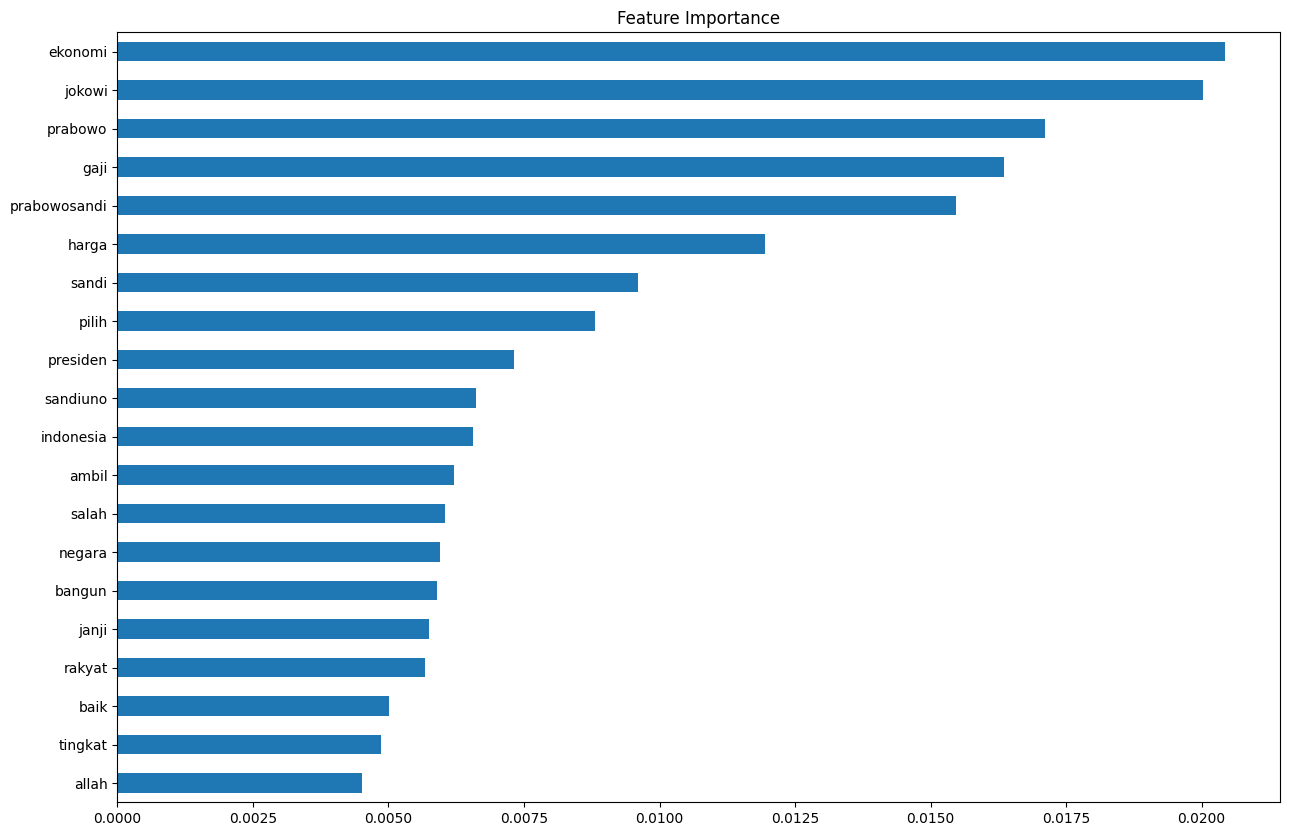

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


X_ = np.array(X)
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

plt.figure(figsize=(15, 10))
feature_importances = pd.Series(rf_clf.feature_importances_, index=X_)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()